# Mount my drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [0]:
!pip install pytorch-ignite

In [0]:
try:
  from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
  from ignite.metrics import Accuracy, Loss, ConfusionMatrix
  from ignite.handlers import ModelCheckpoint
  from utils.training import run, evaluate
except ImportError:
  raise RuntimeError("no module Ignite, to install Ignite: 'pip install pytorch-ignite'.")

from tqdm import tqdm

In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_MNIST, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_mnist_dataloaders
from utils.functions import Hardsigmoid

# Dataset:

In [4]:
batch_size_train = 10000
batch_size_test = 1000
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 6
Number of testing examples: 10


# Training: with bias

## Training parameters:

In [0]:
epochs = 50
lr = 1e-3
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [0]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_MNIST(binary)
print(name_model)

In [0]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/with_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained no binary
binary = False
model_no_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/with_bias'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

In [0]:
evaluate(model_no_binary, test_loader)

## Run Binary Netwwork:

In [0]:
# parameters model to load no Binary model
binary = True

model, name_model = get_my_model_MNIST(binary)
print(name_model)

In [0]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/with_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test Binary network:

In [0]:
# load model pre trained binary
binary = True    
model_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/Binary_models/with_bias'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

In [0]:
evaluate(model_binary, test_loader)

# Training wihtout bias:

## Training parameters:

In [0]:
epochs = 50
lr = 1e-3
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [0]:
# parameters model to load no Binary model
binary = False
bias = False

model, name_model = get_my_model_MNIST(binary, bias=bias)
print(name_model)

In [0]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/without_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained no binary
binary = False
bias=False
model_no_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/No_binary_models/without_bias'
if torch.cuda.is_available():
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

In [0]:
evaluate(model_no_binary_wt_bias, test_loader)

## Run Binary Netwwork:

In [0]:
# parameters model to load no Binary model
binary = True
bias=False

model, name_model = get_my_model_MNIST(binary, bias=bias)
print(name_model)

In [0]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/without_bias'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test Binary network:

In [0]:
# load model pre trained binary
binary = True    
bias=False
model_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/Binary_models/without_bias'
if torch.cuda.is_available():
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

In [0]:
evaluate(model_binary_wt_bias, test_loader)

# Visualization:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap, test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms, GradientAscent, get_filter_layer2
from visualize.viz import get_region_layer1, get_region_layer2, get_regions_interest, get_all_regions_max

# for regions extraction
import collections
from functools import partial
import cv2

## Load model:

In [6]:
# load model pre trained no binary
binary = False
model_no_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/with_bias'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [7]:
# load model pre trained binary
binary = True    
model_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/Binary_models/with_bias'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary


In [8]:
# load model pre trained no binary
binary = False
bias=False
model_no_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/No_binary_models/without_bias'
if torch.cuda.is_available():
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet_without_bias


In [9]:
# load model pre trained binary
binary = True    
bias=False
model_binary_wt_bias, name_model = get_my_model_MNIST(binary, bias=bias)

path_model = 'trained_models/MNIST/Binary_models/without_bias'
if torch.cuda.is_available():
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary_wt_bias.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary_without_bias


In [0]:
print(model_no_binary)

NoBinaryNetMnist(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): ReLU()
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


In [0]:
print(model_binary)

BinaryNetMNIST(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


In [0]:
print(model_no_binary_wt_bias)

NoBinaryNetMnist(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): ReLU()
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


In [0]:
print(model_binary_wt_bias)

BinaryNetMNIST(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


## Visualization few predictions:

In [0]:
print('No binary model')
test_predict_few_examples(model_no_binary, test_loader)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary, test_loader)
plt.show()

## Visualization Activations values for a specific data:

In [0]:
index_data = 10
viz_activations(model_no_binary, test_loader, index_data)

In [0]:
index_data = 10
viz_activations(model_binary, test_loader, index_data)

## Visualization heatmap for a specific data:


In [0]:
index_data = 10
viz_heatmap(model_no_binary, name_model, test_loader, index_data)

In [0]:
index_data = 10
viz_heatmap(model_binary, name_model, test_loader, index_data)

## Visualization filters trained:

Visualization filters learned for layer: layer1


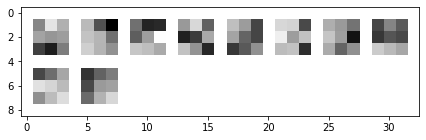

Visualization filters learned for layer: layer2


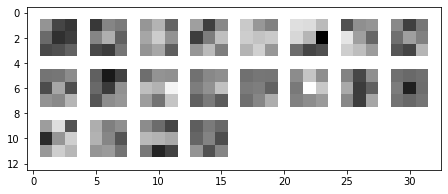

In [0]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


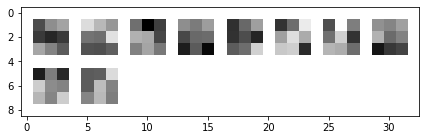

Visualization filters learned for layer: layer2


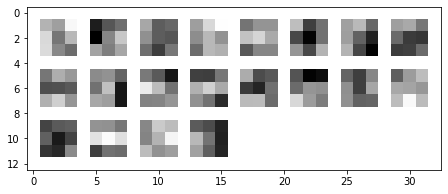

In [0]:
viz_filters(model_binary)

Visualization filters learned for layer: layer1


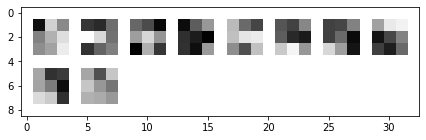

Visualization filters learned for layer: layer2


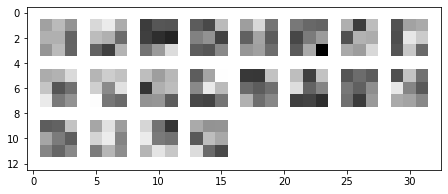

In [0]:
viz_filters(model_no_binary_wt_bias)

Visualization filters learned for layer: layer1


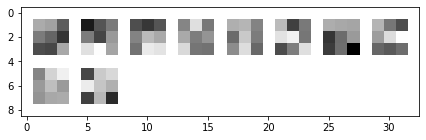

Visualization filters learned for layer: layer2


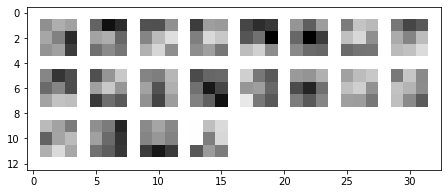

In [0]:
viz_filters(model_binary_wt_bias)

### Filters values:

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m) == nn.Conv2d:
        filters = m.weight.data.clone()
        break

In [0]:
filter_0 = filters[0][0]
print(filter_0)
plt.imshow(filter_0, cmap='gray')
plt.show()

In [0]:
# normalized between 0 et 1:
val_min = filter_0.min()
val_max = filter_0.max()

filter_0_normalized = (filter_0 - val_min)/(val_max - val_min)

print(val_min, val_max)
print(filter_0_normalized)

plt.imshow(filter_0_normalized, cmap='gray')
plt.show()

## Visualization image that maximizes a specific activation in a specific layer for a specifc filter:

### No binary model:

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, nb_channels=1, img_size=28)
g_ascent_no_binary.use_gpu = True

In [0]:
conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

Visualization filters learned for layer: layer1


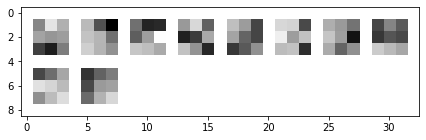

Visualization filters learned for layer: layer2


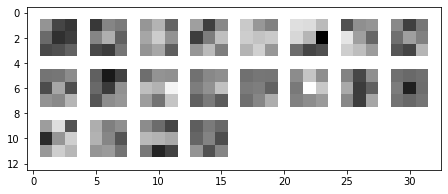

In [0]:
viz_filters(model_no_binary)

KeyboardInterrupt: ignored

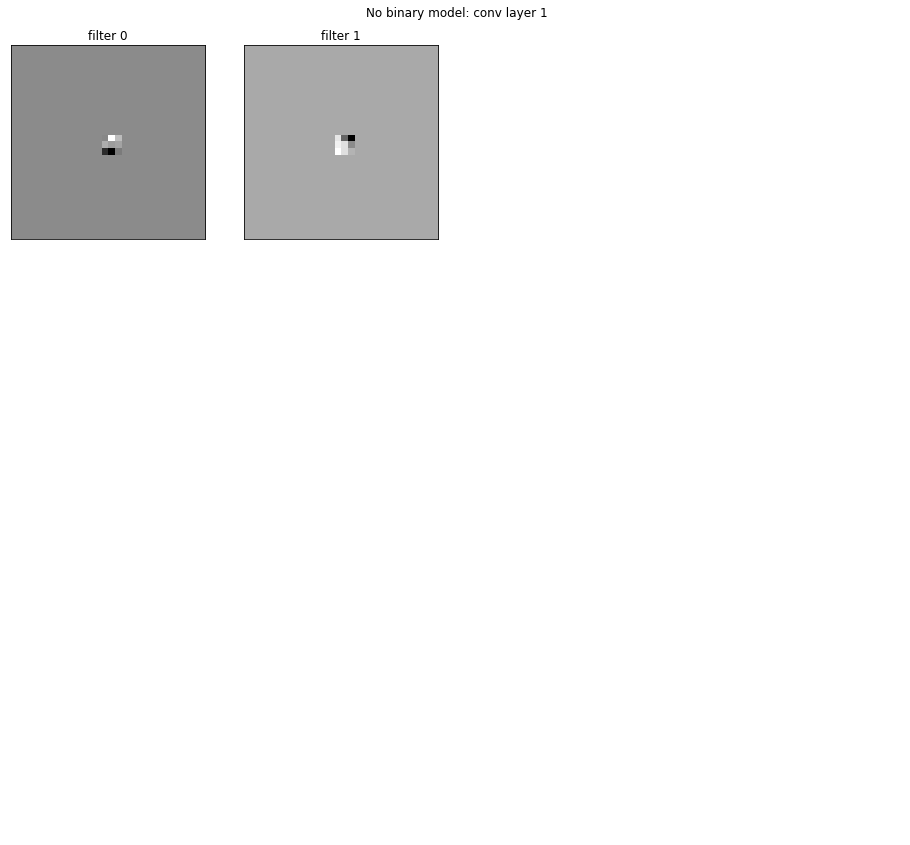

In [0]:
g_ascent_no_binary.visualize(conv1_no_binary, MNIST, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='No binary model: conv layer 1')
g_ascent_no_binary.visualize(conv2_no_binary, MNIST, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='No binary model: conv layer 2')

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, nb_channels=1, img_size=28)
g_ascent_no_binary.use_gpu = True

conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = True
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = True
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

In [0]:
g_ascent_no_binary.visualize(conv1_no_binary, MNIST, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='No binary model: conv layer 1')
g_ascent_no_binary.visualize(conv2_no_binary, MNIST, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='No binary model: conv layer 2')

### Binary model:

In [0]:
g_ascent_binary = GradientAscent(model_binary, nb_channels=1, img_size=28)
g_ascent_binary.use_gpu = True

In [0]:
conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_binary = model_binary.layer2
conv2_filters_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

In [0]:
viz_filters(model_binary)

In [0]:
g_ascent_binary.visualize(conv1_binary, MNIST, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='Binary model: conv layer 1')
g_ascent_binary.visualize(conv2_binary, MNIST, conv2_filters_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='Binary model: conv layer 2')

## Visuazation regions that maximizes a specific layer and filter:

### Run:

#### Extract and save regions and activations:

##### No binary model:

In [0]:
dataiter = iter(train_loader)
images, _ = dataiter.next()

print(images.shape)

torch.Size([10000, 1, 28, 28])


In [0]:
# a dictionary that keeps saving the activations as they come
activations_no_binary = collections.defaultdict(list)

def save_activation_no_binary(name, mod, inp, out):
    activations_no_binary[name].append(out.cpu())

In [0]:
# Registering hooks for all the Conv2d layers
# Note: Hooks are called EVERY TIME the module performs a forward pass. For modules that are
# called repeatedly at different stages of the forward pass (like RELUs), this will save different
# activations. Editing the forward pass code to save activations is the way to go for these cases.
for name, m in model_no_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary, name))

out = model_no_binary(images)

# concatenate all the outputs we saved to get the the activations for each layer for the whole dataset
activations_no_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary.items()}

# just print out the sizes of the saved activations as a sanity check
for k,v in activations_no_binary.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, loader, activations_no_binary, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_no_binary = region_final['layer1']
region_layer2_no_binary = region_final['layer2']
activation_layer1_no_binary = activation_final['layer1']
activation_layer2_no_binary = activation_final['layer2']
activation_layer1_no_binary_normalized = activation_final_normalized['layer1']
activation_layer2_no_binary_normalized = activation_final_normalized['layer2']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer1_no_binary_normalized.shape)
print(activation_layer2_no_binary_normalized.shape)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1_normalized.npy', activation_layer1_no_binary_normalized)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2_normalized.npy', activation_layer2_no_binary_normalized)

##### Binary model:

In [0]:
activations_binary = collections.defaultdict(list)

In [0]:
def save_activation_binary(name, mod, inp, out):
    activations_binary[name].append(out.cpu())

In [0]:
for name, m in model_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_binary, name))

out = model_binary(images)

activations_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_binary.items()}

for k,v in activations_binary.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, loader, activations_binary, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_binary = region_final['layer1']
region_layer2_binary = region_final['layer2']
activation_layer1_binary = activation_final['layer1']
activation_layer2_binary = activation_final['layer2']
activation_layer1_binary_normalized = activation_final_normalized['layer1']
activation_layer2_binary_normalized = activation_final_normalized['layer2']

print(region_layer1_binary.shape)
print(region_layer2_binary.shape)
print(activation_layer1_binary.shape)
print(activation_layer2_binary.shape)
print(activation_layer1_binary_normalized.shape)
print(activation_layer2_binary_normalized.shape)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer1.npy', region_layer1_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer2.npy', region_layer2_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1.npy', activation_layer1_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2.npy', activation_layer2_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1_normalized.npy', activation_layer1_binary_normalized)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2_normalized.npy', activation_layer2_binary_normalized)

##### No binary model without bias:

In [0]:
activations_no_binary_without_bias = collections.defaultdict(list)

In [0]:
def save_activation_no_binary_without_bias(name, mod, inp, out):
    activations_no_binary_without_bias[name].append(out.cpu())

In [0]:
for name, m in model_no_binary_wt_bias.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary_without_bias, name))

out = model_no_binary_wt_bias(images)

activations_no_binary_without_bias = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary_without_bias.items()}

for k,v in activations_no_binary_without_bias.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, loader, activations_no_binary_without_bias, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_no_binary_without_bias = region_final['layer1']
region_layer2_no_binary_without_bias = region_final['layer2']
activation_layer1_no_binary_without_bias = activation_final['layer1']
activation_layer2_no_binary_without_bias = activation_final['layer2']
activation_layer1_no_binary_normalized_without_bias = activation_final_normalized['layer1']
activation_layer2_no_binary_normalized_without_bias = activation_final_normalized['layer2']

print(region_layer1_no_binary_without_bias.shape)
print(region_layer2_no_binary_without_bias.shape)
print(activation_layer1_no_binary_without_bias.shape)
print(activation_layer2_no_binary_without_bias.shape)
print(activation_layer1_no_binary_normalized_without_bias.shape)
print(activation_layer2_no_binary_normalized_without_bias.shape)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_regions_max_layer1.npy', region_layer1_no_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_regions_max_layer2.npy', region_layer2_no_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer1.npy', activation_layer1_no_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer2.npy', activation_layer2_no_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer1_normalized.npy', activation_layer1_no_binary_normalized_without_bias)
np.save('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer2_normalized.npy', activation_layer2_no_binary_normalized_without_bias)

##### Binary model without bias:

In [0]:
activations_binary_without_bias = collections.defaultdict(list)

In [0]:
def save_activation_binary_without_bias(name, mod, inp, out):
    activations_binary_without_bias[name].append(out.cpu())

In [0]:
for name, m in model_binary_wt_bias.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_binary_without_bias, name))

out = model_binary_wt_bias(images)

activations_binary_without_bias = {name: torch.cat(outputs, 0) for name, outputs in activations_binary_without_bias.items()}

for k,v in activations_binary_without_bias.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(images, loader, activations_binary_without_bias, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_binary_without_bias = region_final['layer1']
region_layer2_binary_without_bias = region_final['layer2']
activation_layer1_binary_without_bias = activation_final['layer1']
activation_layer2_binary_without_bias = activation_final['layer2']
activation_layer1_binary_normalized_without_bias = activation_final_normalized['layer1']
activation_layer2_binary_normalized_without_bias = activation_final_normalized['layer2']

print(region_layer1_binary_without_bias.shape)
print(region_layer2_binary_without_bias.shape)
print(activation_layer1_binary_without_bias.shape)
print(activation_layer2_binary_without_bias.shape)
print(activation_layer1_binary_normalized_without_bias.shape)
print(activation_layer2_binary_normalized_without_bias.shape)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_regions_max_layer1.npy', region_layer1_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_regions_max_layer2.npy', region_layer2_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer1.npy', activation_layer1_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer2.npy', activation_layer2_binary_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer1_normalized.npy', activation_layer1_binary_normalized_without_bias)
np.save('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer2_normalized.npy', activation_layer2_binary_normalized_without_bias)

### Visualize max regions:

#### Load regions and activations:

In [0]:
region_layer1_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_normalized = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_no_binary_normalized = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

In [0]:
region_layer1_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_normalized = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_binary_normalized = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

In [0]:
region_layer1_no_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_normalized_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_no_binary_normalized_without_bias = np.load('results/MNIST_results/MNIST_regions/No_binary_without_bias_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

In [0]:
region_layer1_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_normalized_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_binary_normalized_without_bias = np.load('results/MNIST_results/MNIST_regions/Binary_without_bias_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

#### Viz:

Visualization filters learned for layer: layer1


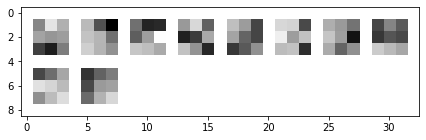

Visualization filters learned for layer: layer2


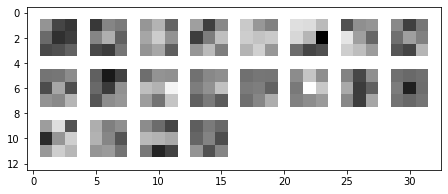

In [0]:
viz_filters(model_no_binary)

##### No binary model layer1:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 20% image regions = 2000 images
mean image:
mean regions of 2000 regions more=True or worst=False active for filter number: 0 :


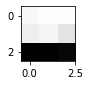

normalized region:


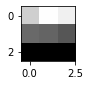

mean regions of 2000 regions more=True or worst=False active for filter number: 1 :


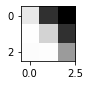

normalized region:


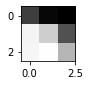

mean regions of 2000 regions more=True or worst=False active for filter number: 2 :


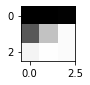

normalized region:


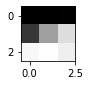

mean regions of 2000 regions more=True or worst=False active for filter number: 3 :


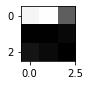

normalized region:


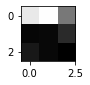

mean regions of 2000 regions more=True or worst=False active for filter number: 4 :


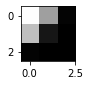

normalized region:


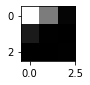

mean regions of 2000 regions more=True or worst=False active for filter number: 5 :


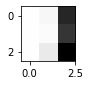

normalized region:


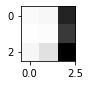

mean regions of 2000 regions more=True or worst=False active for filter number: 6 :


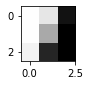

normalized region:


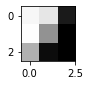

mean regions of 2000 regions more=True or worst=False active for filter number: 7 :


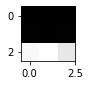

normalized region:


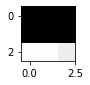

mean regions of 2000 regions more=True or worst=False active for filter number: 8 :


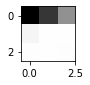

normalized region:


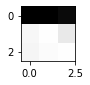

mean regions of 2000 regions more=True or worst=False active for filter number: 9 :


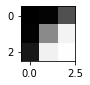

normalized region:


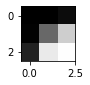

grid image
grid regions of 2000 regions more=True or worst=False active for filter number: 0 :


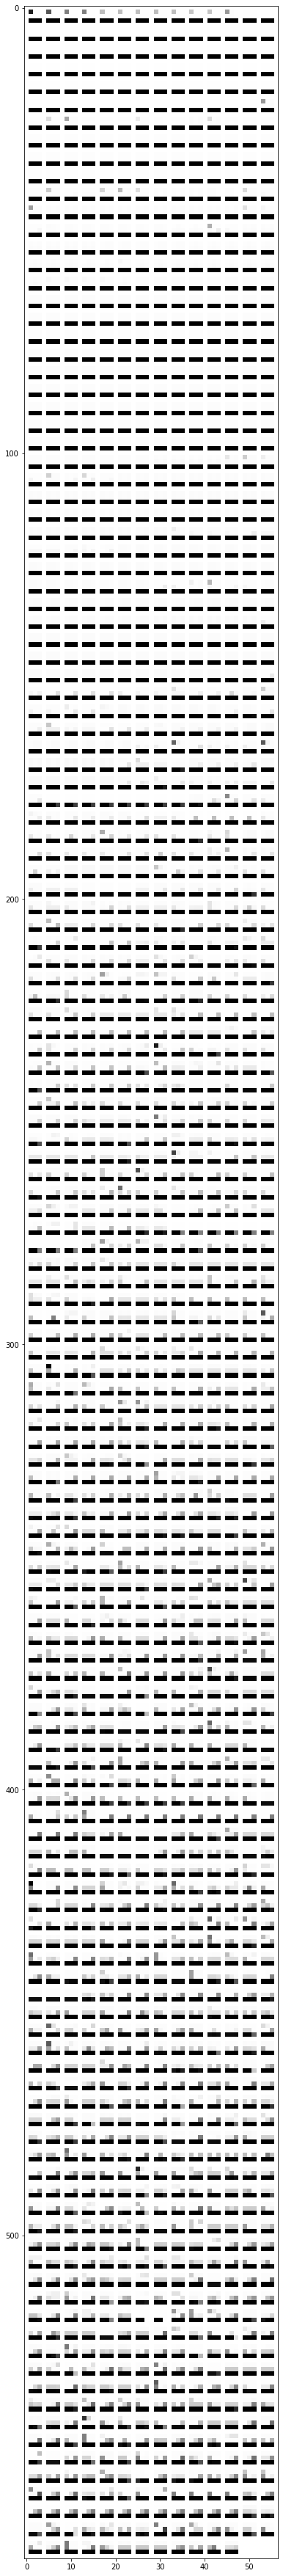

normalized regions:


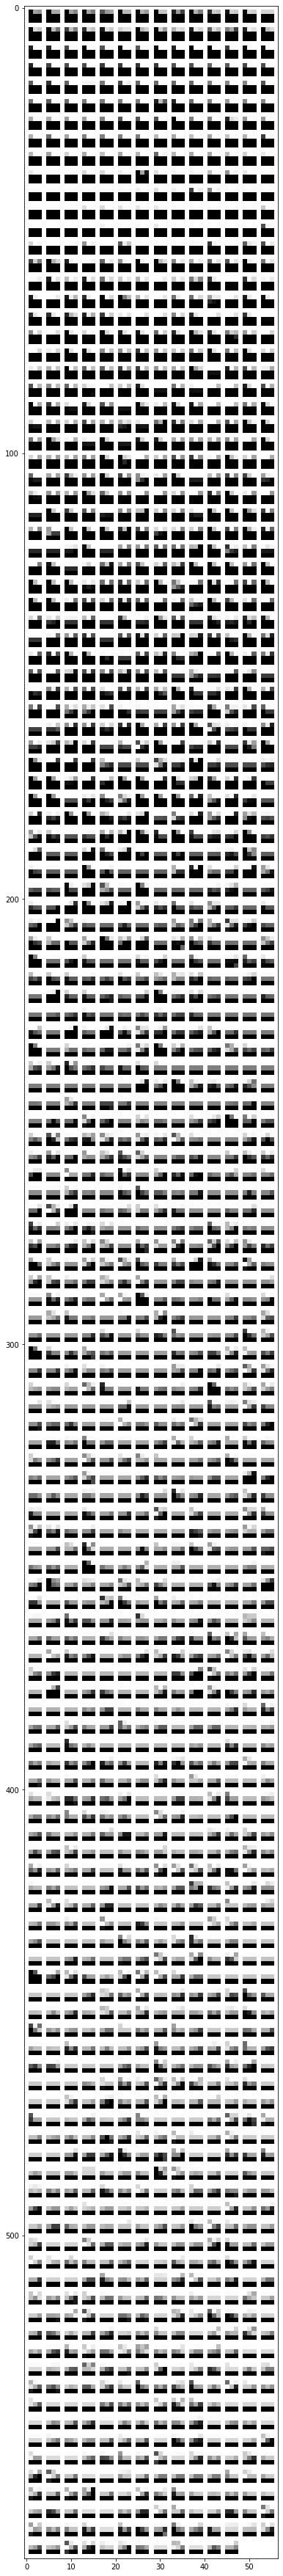

grid regions of 2000 regions more=True or worst=False active for filter number: 1 :


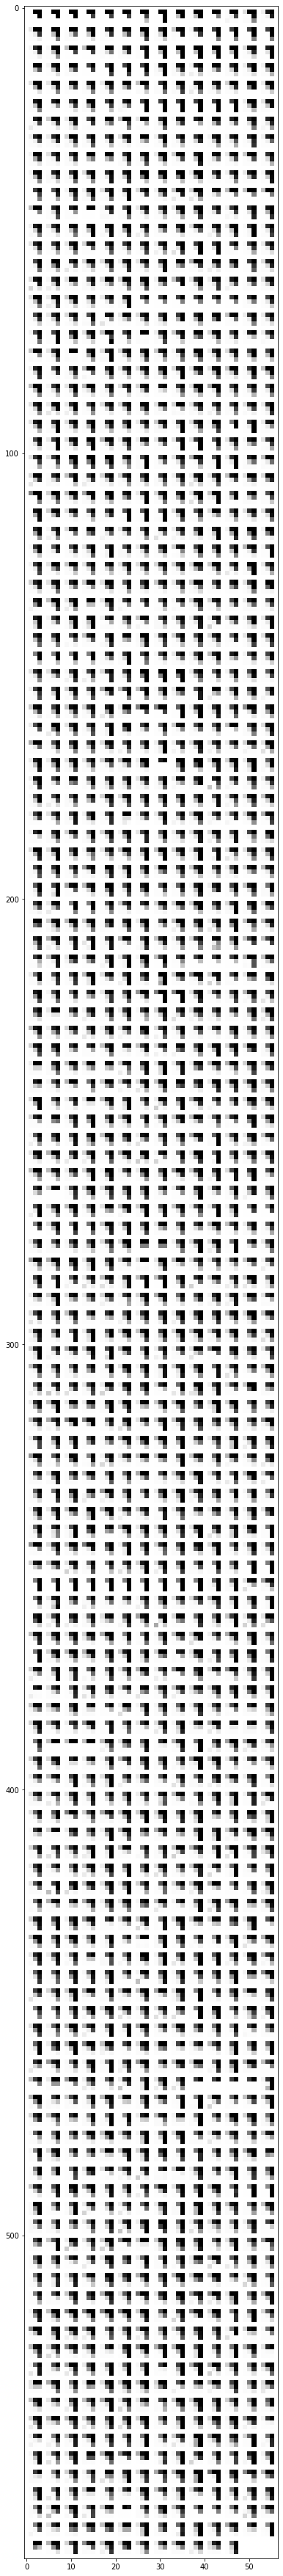

normalized regions:


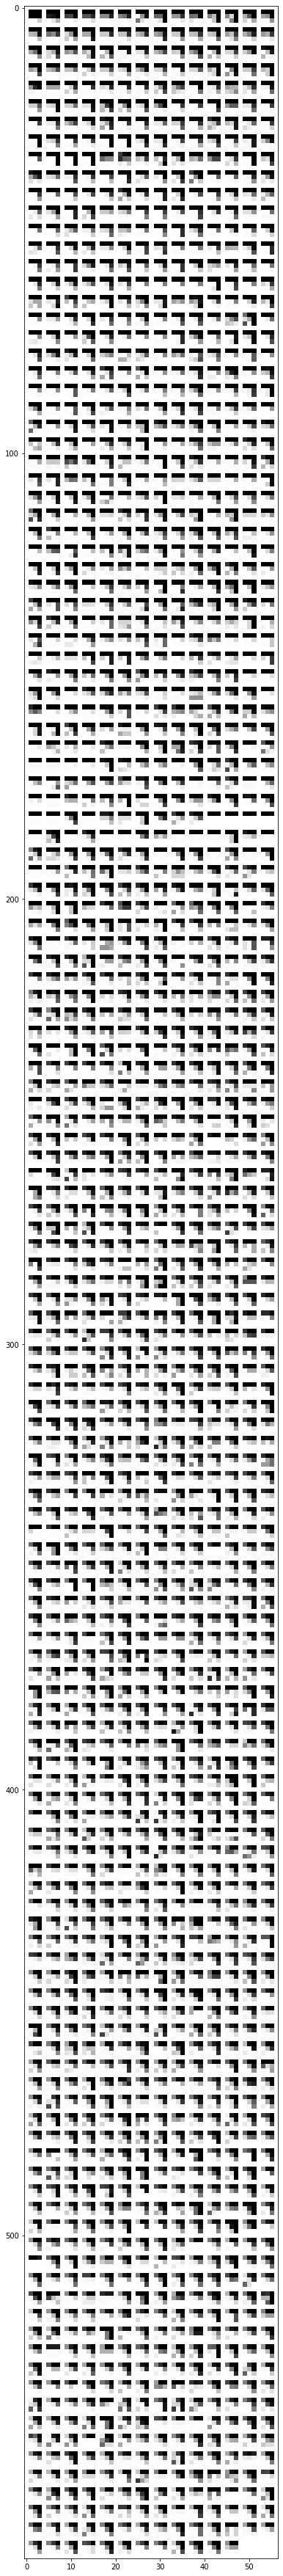

grid regions of 2000 regions more=True or worst=False active for filter number: 2 :


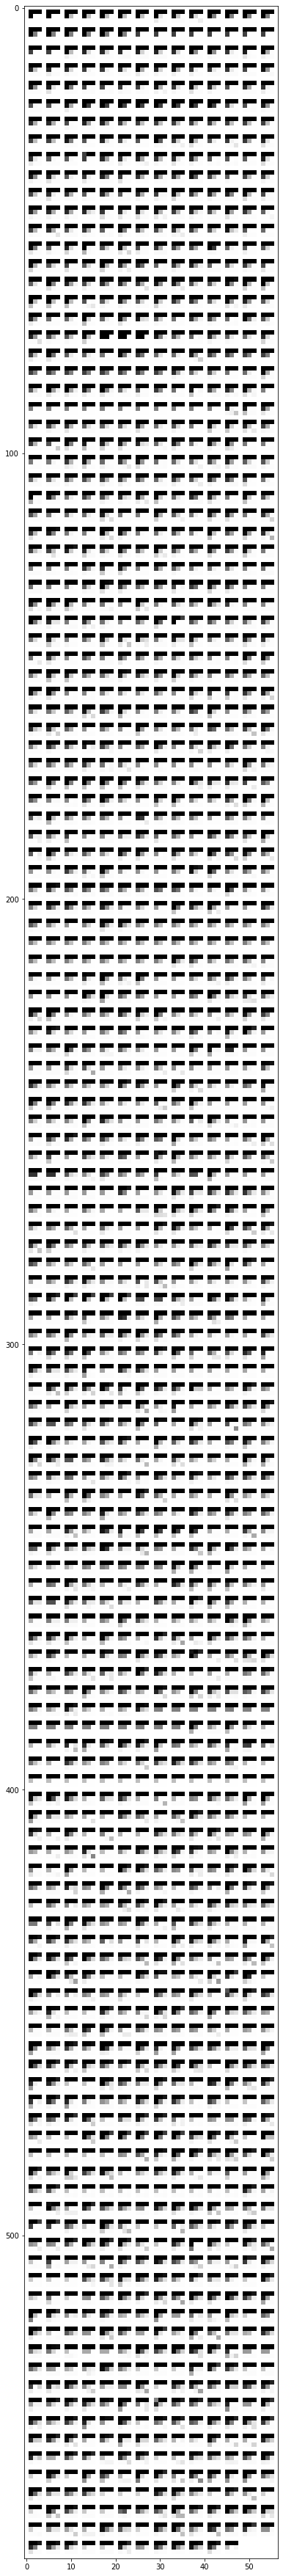

normalized regions:


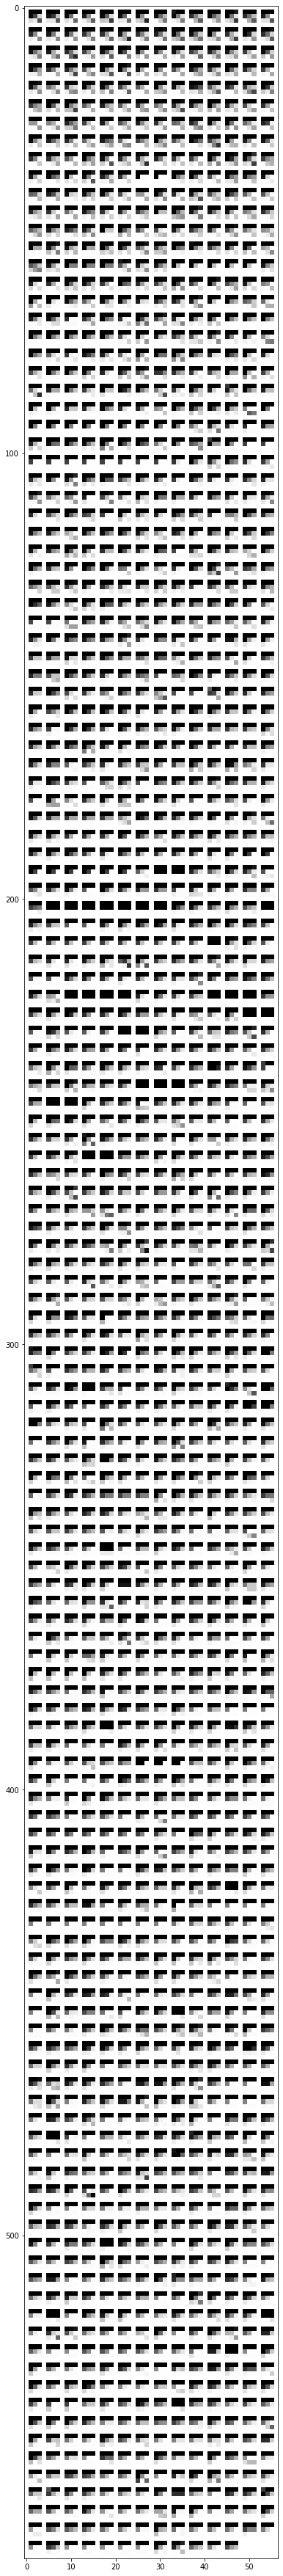

grid regions of 2000 regions more=True or worst=False active for filter number: 3 :


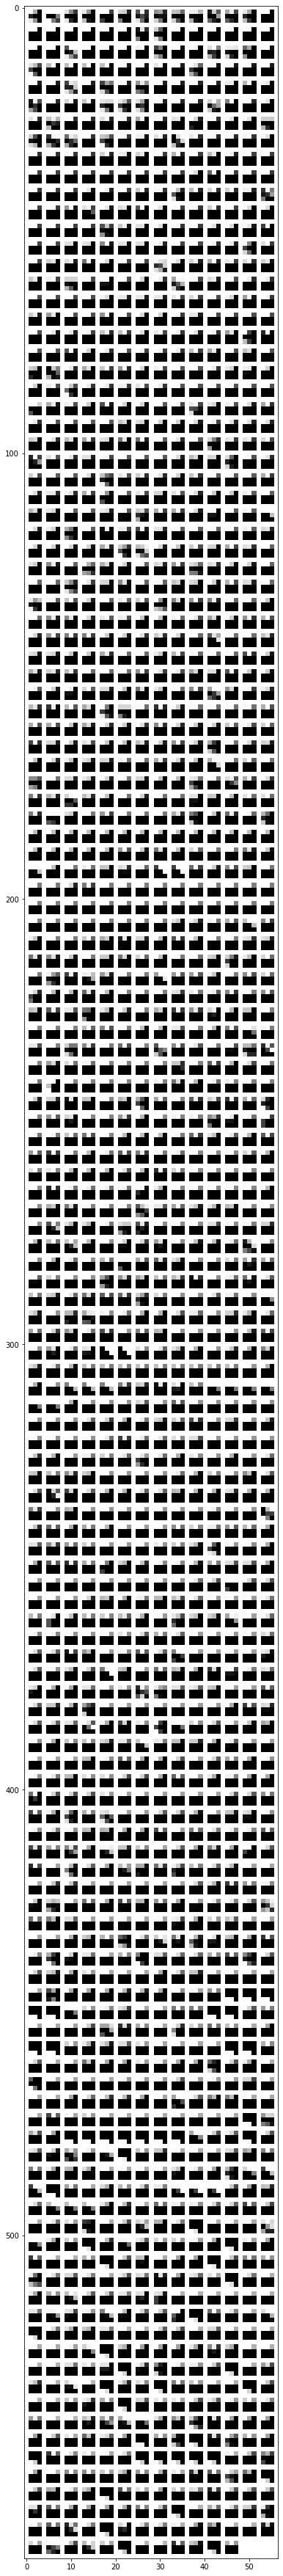

normalized regions:


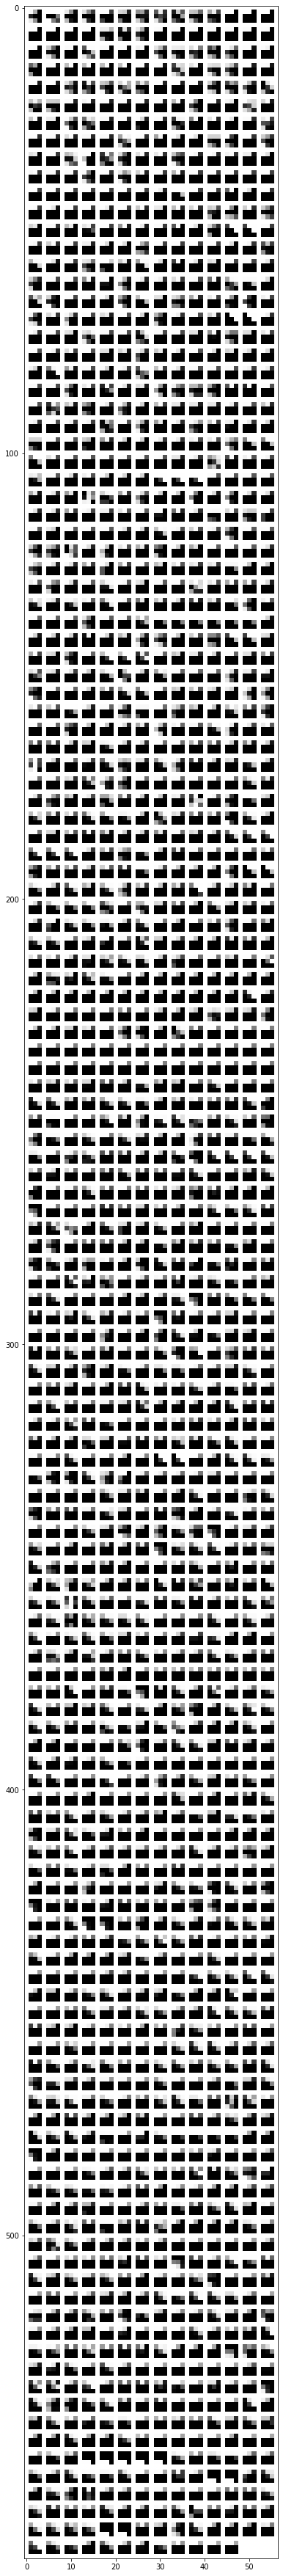

grid regions of 2000 regions more=True or worst=False active for filter number: 4 :


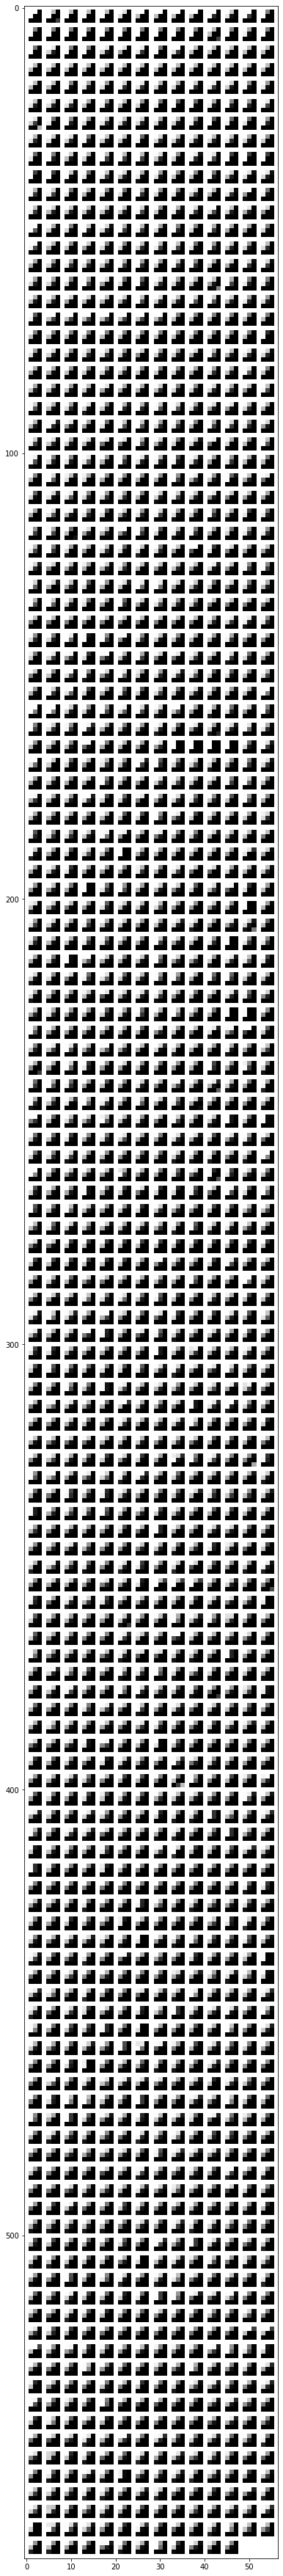

normalized regions:


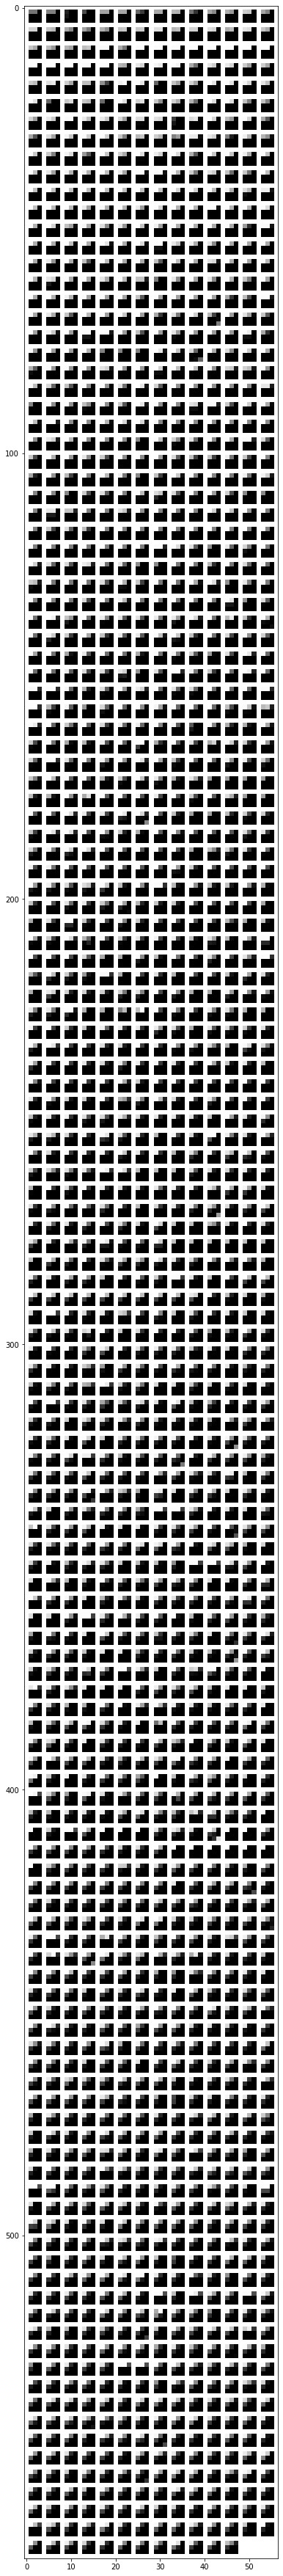

grid regions of 2000 regions more=True or worst=False active for filter number: 5 :


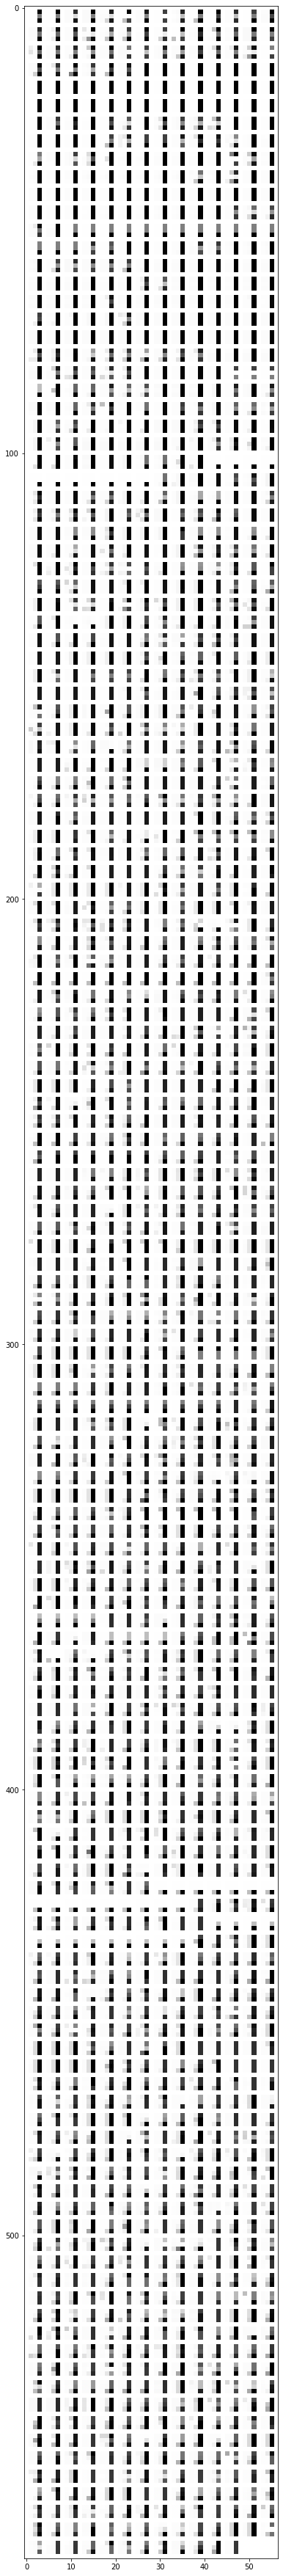

normalized regions:


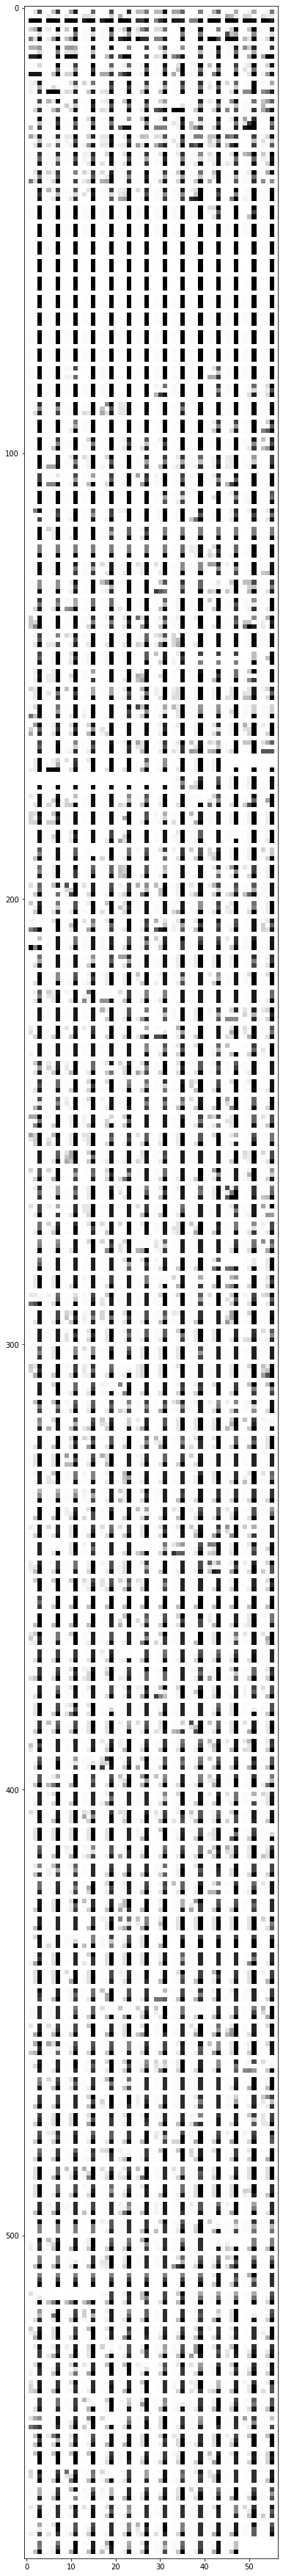

grid regions of 2000 regions more=True or worst=False active for filter number: 6 :


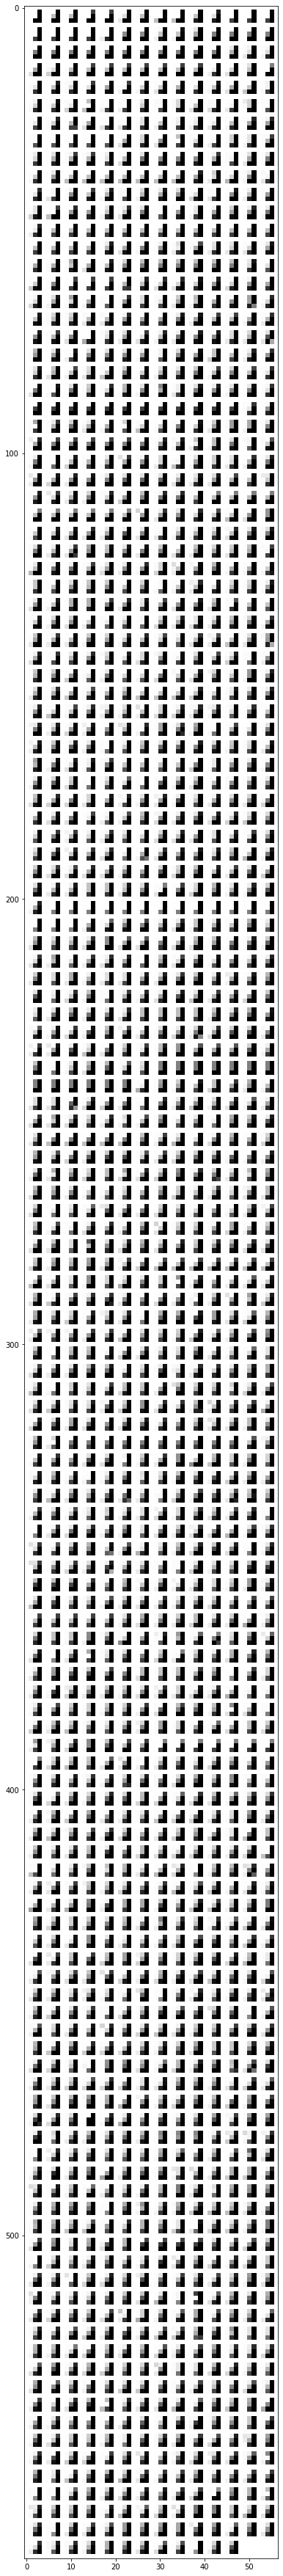

normalized regions:


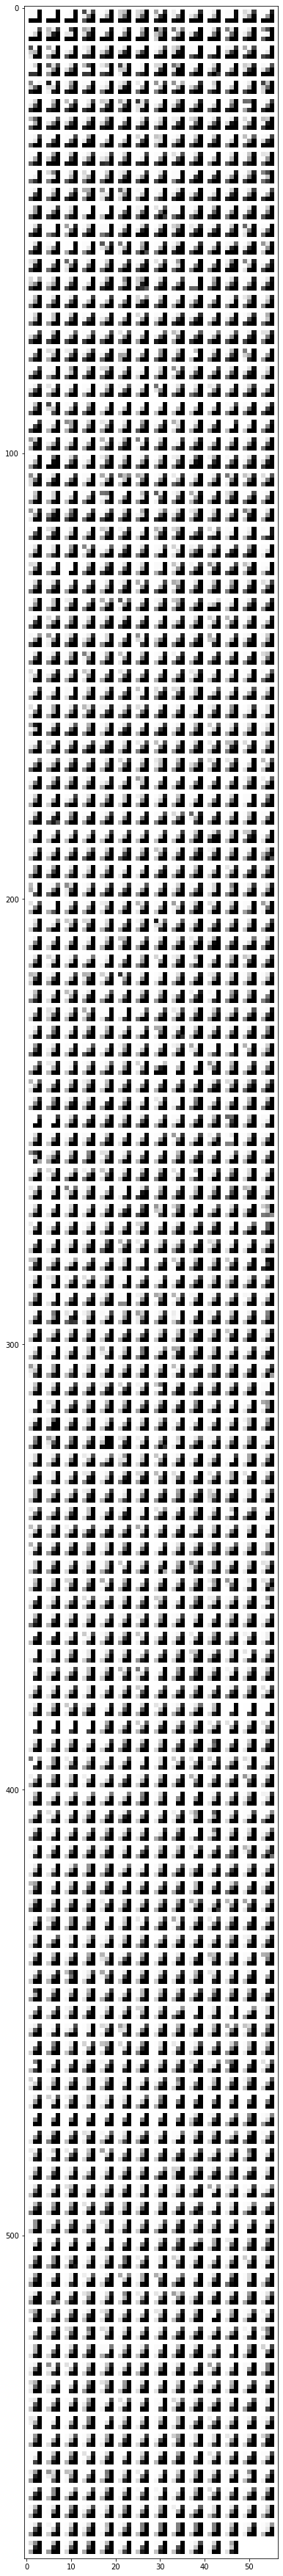

grid regions of 2000 regions more=True or worst=False active for filter number: 7 :


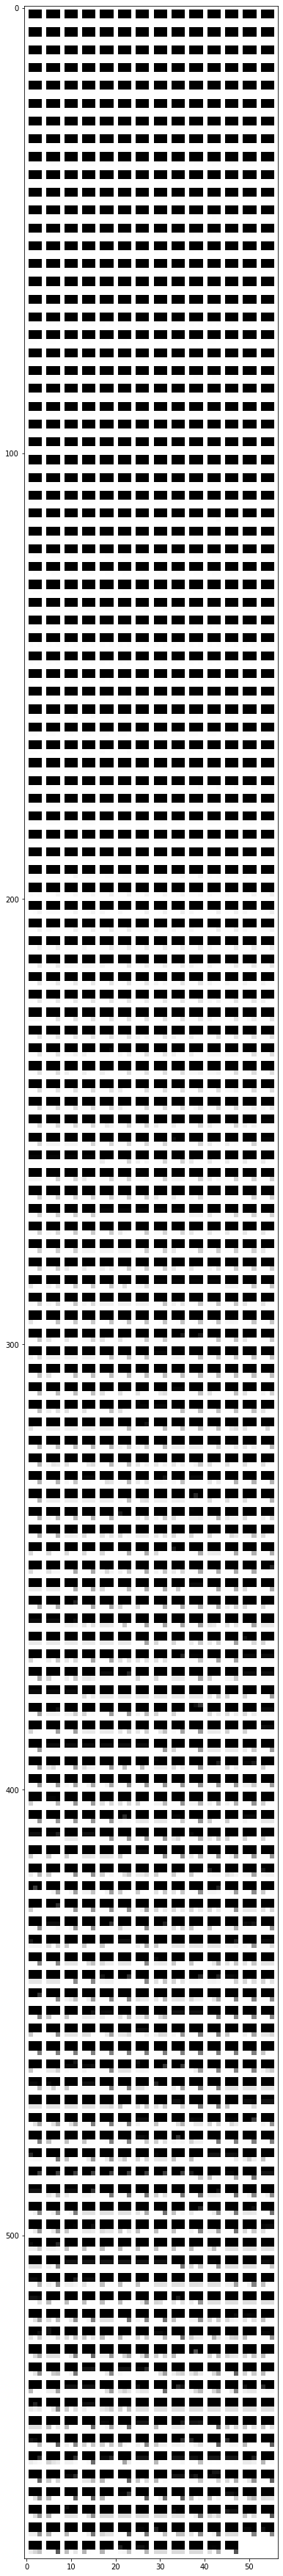

normalized regions:


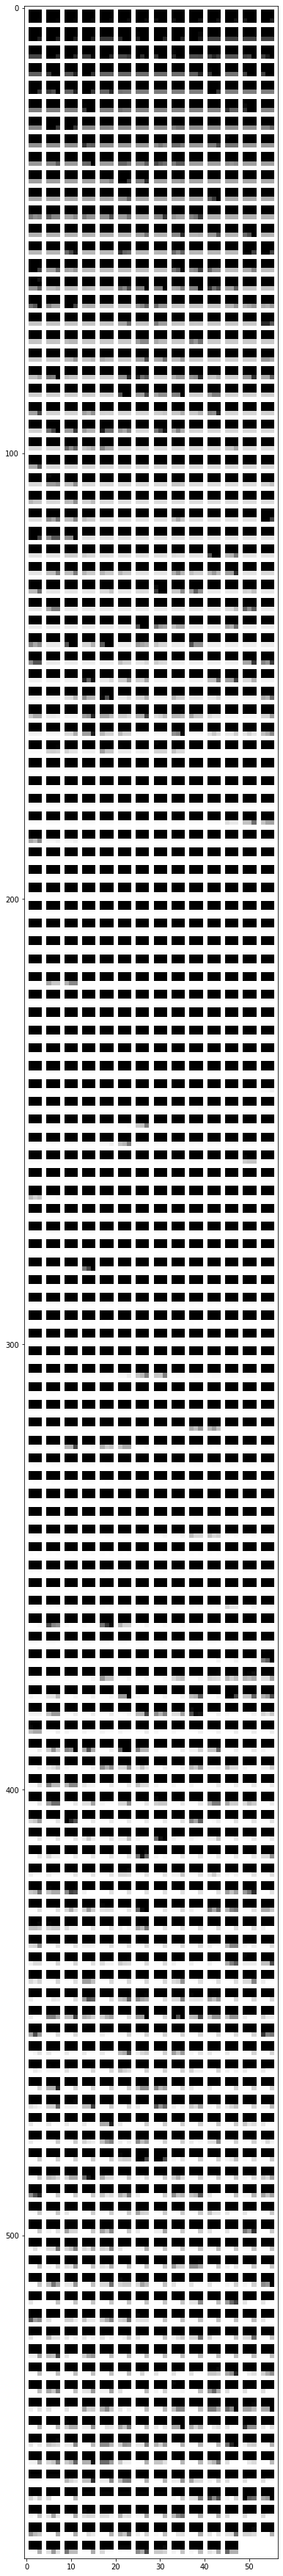

grid regions of 2000 regions more=True or worst=False active for filter number: 8 :


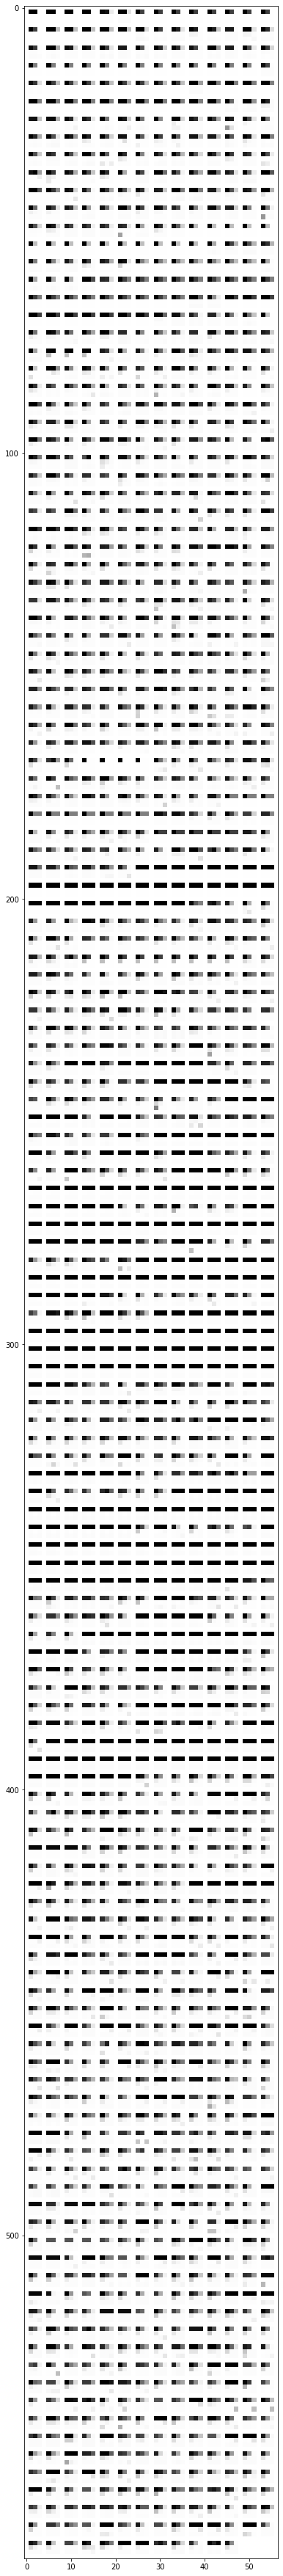

normalized regions:


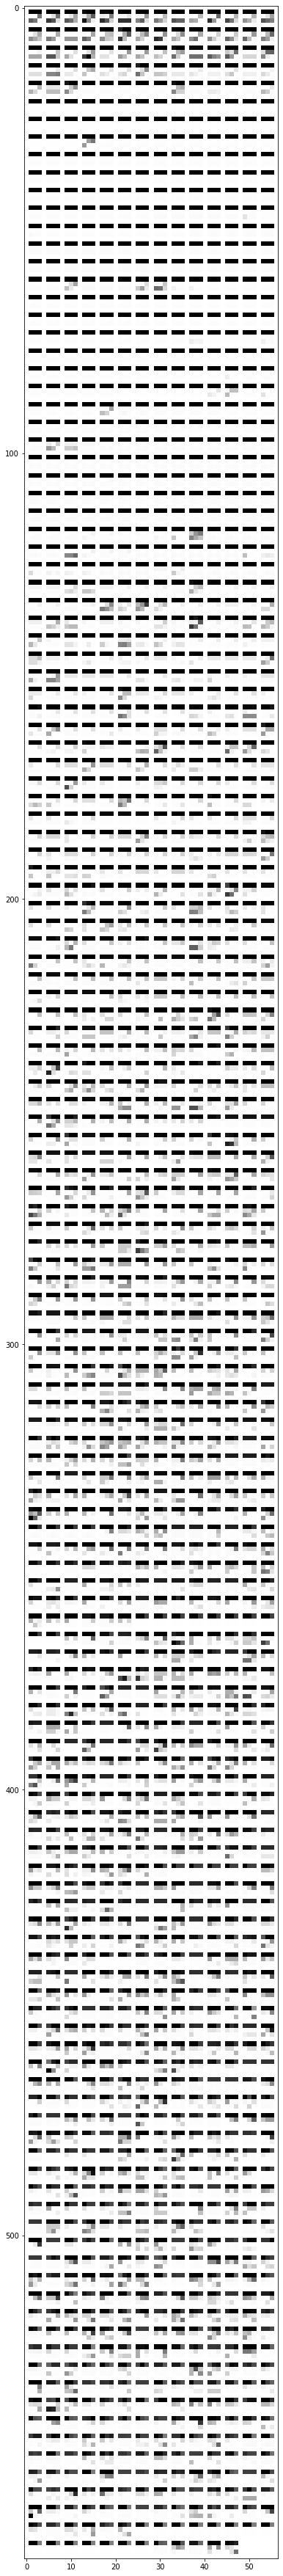

grid regions of 2000 regions more=True or worst=False active for filter number: 9 :


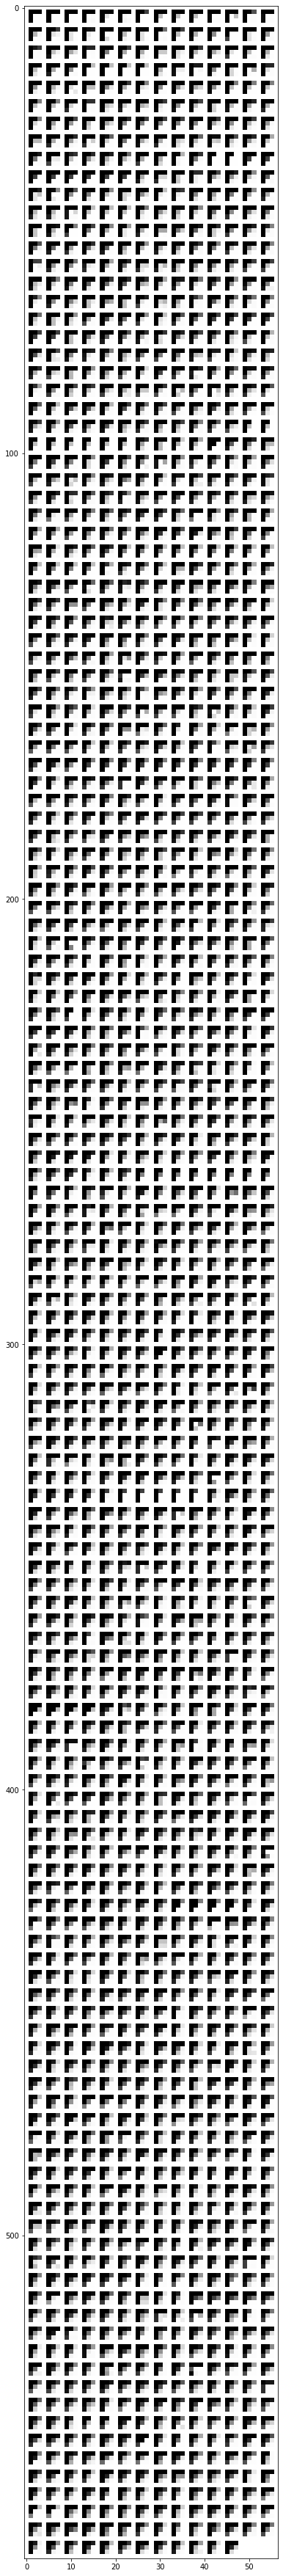

normalized regions:


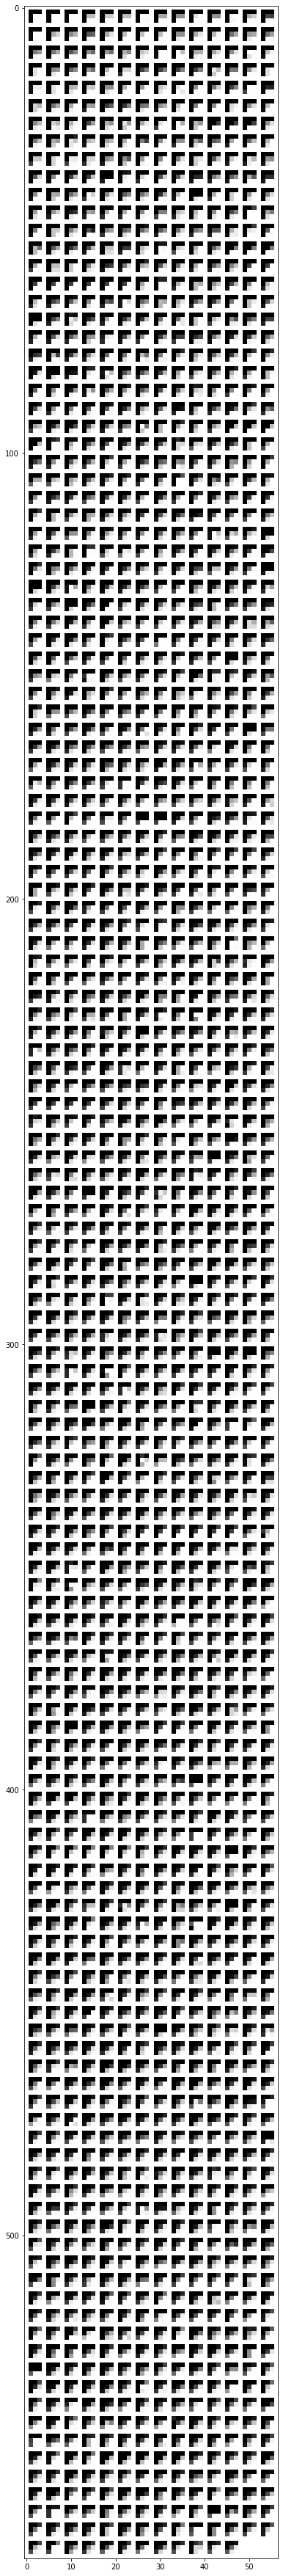

In [19]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 20
nrow=14

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary
activations_normalized = activation_layer1_no_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1, nrow=nrow)

In [0]:
activation_values

[array([0.80191827, 0.79968965, 0.79804754, 0.79804754, 0.79558432,
        0.79558432, 0.79558432, 0.79558432, 0.79558432, 0.79531062,
        0.79531062, 0.79378408, 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.79

In [0]:
activation_values_normalized

[array([0.71686208, 0.70842665, 0.70021206, 0.69271755, 0.69162488,
        0.68351567, 0.67591339, 0.66935802, 0.66185093, 0.66153431,
        0.65073127, 0.64808118, 0.64148933, 0.6405409 , 0.63545352,
        0.63423949, 0.63390046, 0.6292153 , 0.62779164, 0.62700677,
        0.62215459, 0.62128192, 0.62087053, 0.62081528, 0.61890072,
        0.61868834, 0.6150884 , 0.61500263, 0.61485928, 0.61458123,
        0.61389482, 0.61356729, 0.61353588, 0.61334991, 0.61333644,
        0.61323214, 0.61317915, 0.61301112, 0.61301112, 0.61288828,
        0.61285293, 0.61285293, 0.61194658, 0.61187869, 0.61152399,
        0.61144519, 0.61142659, 0.61142659, 0.61139482, 0.61136037,
        0.61128753, 0.61128753, 0.61126614, 0.61097229, 0.61095554,
        0.61094958, 0.61085409, 0.61070907, 0.61069643, 0.61055893,
        0.61055404, 0.6105454 , 0.61045998, 0.61042058, 0.61038119,
        0.61034173, 0.61023748, 0.61003965, 0.61003965, 0.60999084,
        0.60990822, 0.60986292, 0.60980678, 0.60

##### No binary model layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10
nrow=14

# regions and activation of interest
regions = region_layer2_no_binary
activations = activation_layer2_no_binary
activations_normalized = activation_layer2_no_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2, nrow=nrow)

Output hidden; open in https://colab.research.google.com to view.

##### Binary model layer1:

Visualization filters learned for layer: layer1


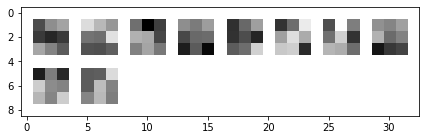

Visualization filters learned for layer: layer2


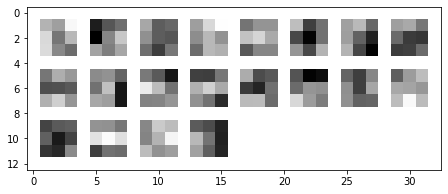

In [0]:
viz_filters(model_binary)

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 1000 images
mean image:
mean regions of 1000 regions more=True or worst=False active for filter number: 0 :


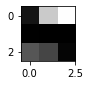

normalized region:


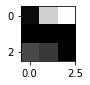

mean regions of 1000 regions more=True or worst=False active for filter number: 1 :


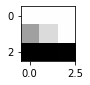

normalized region:


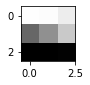

mean regions of 1000 regions more=True or worst=False active for filter number: 2 :


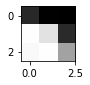

normalized region:


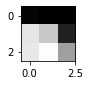

mean regions of 1000 regions more=True or worst=False active for filter number: 3 :


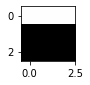

normalized region:


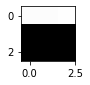

mean regions of 1000 regions more=True or worst=False active for filter number: 4 :


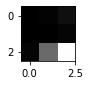

normalized region:


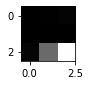

mean regions of 1000 regions more=True or worst=False active for filter number: 5 :


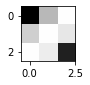

normalized region:


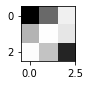

mean regions of 1000 regions more=True or worst=False active for filter number: 6 :


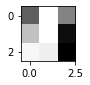

normalized region:


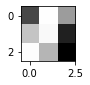

mean regions of 1000 regions more=True or worst=False active for filter number: 7 :


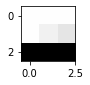

normalized region:


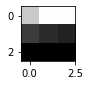

mean regions of 1000 regions more=True or worst=False active for filter number: 8 :


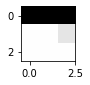

normalized region:


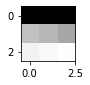

mean regions of 1000 regions more=True or worst=False active for filter number: 9 :


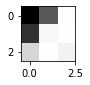

normalized region:


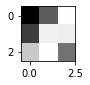

grid image
grid regions of 1000 regions more=True or worst=False active for filter number: 0 :


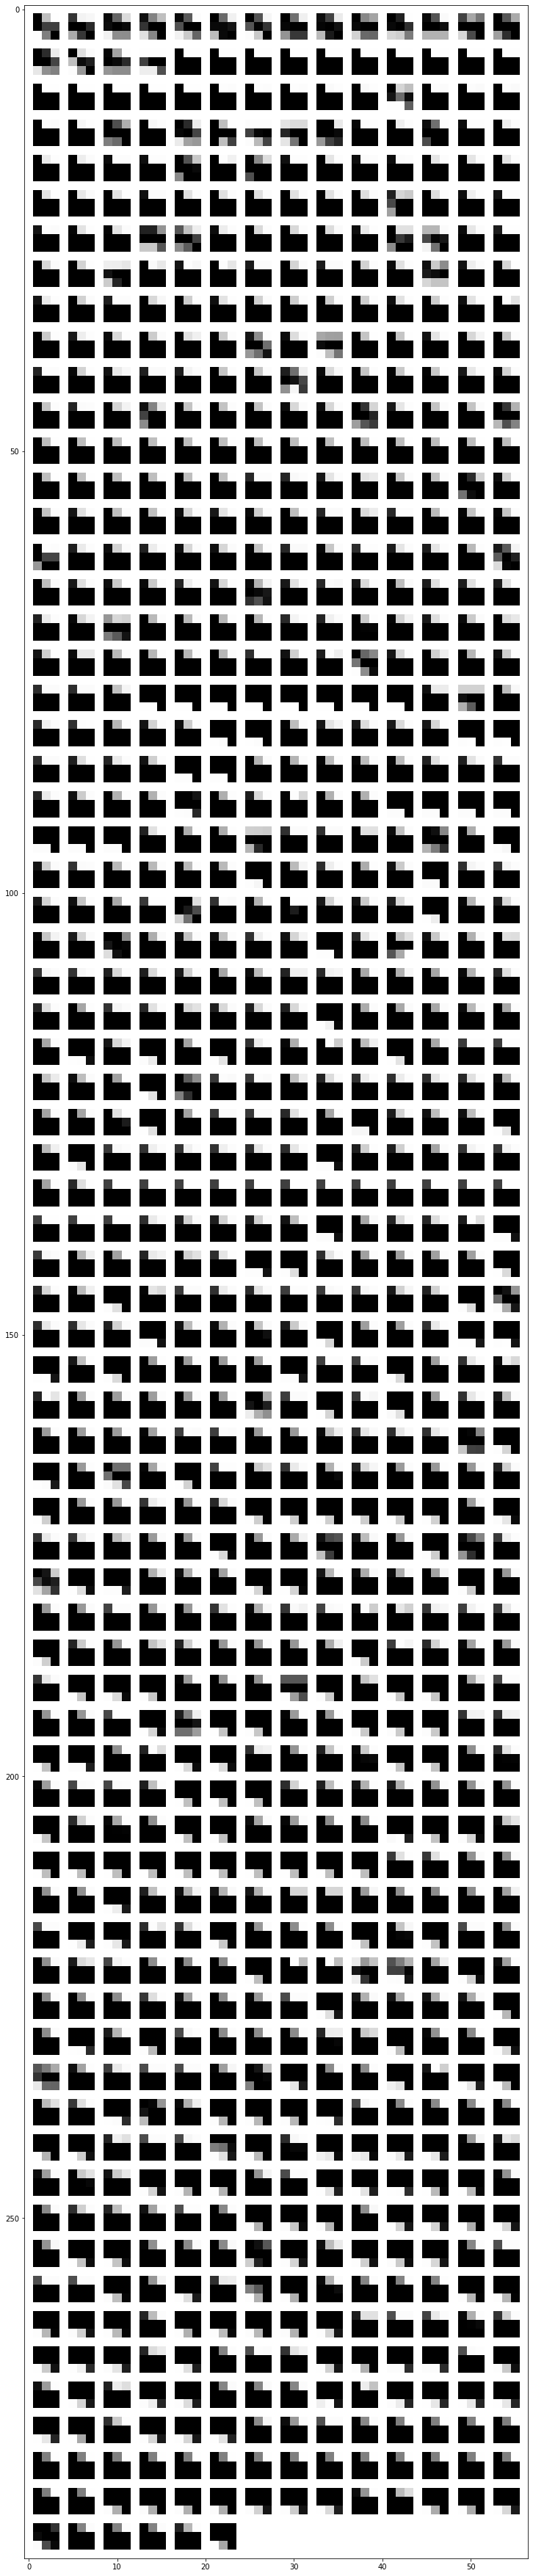

normalized regions:


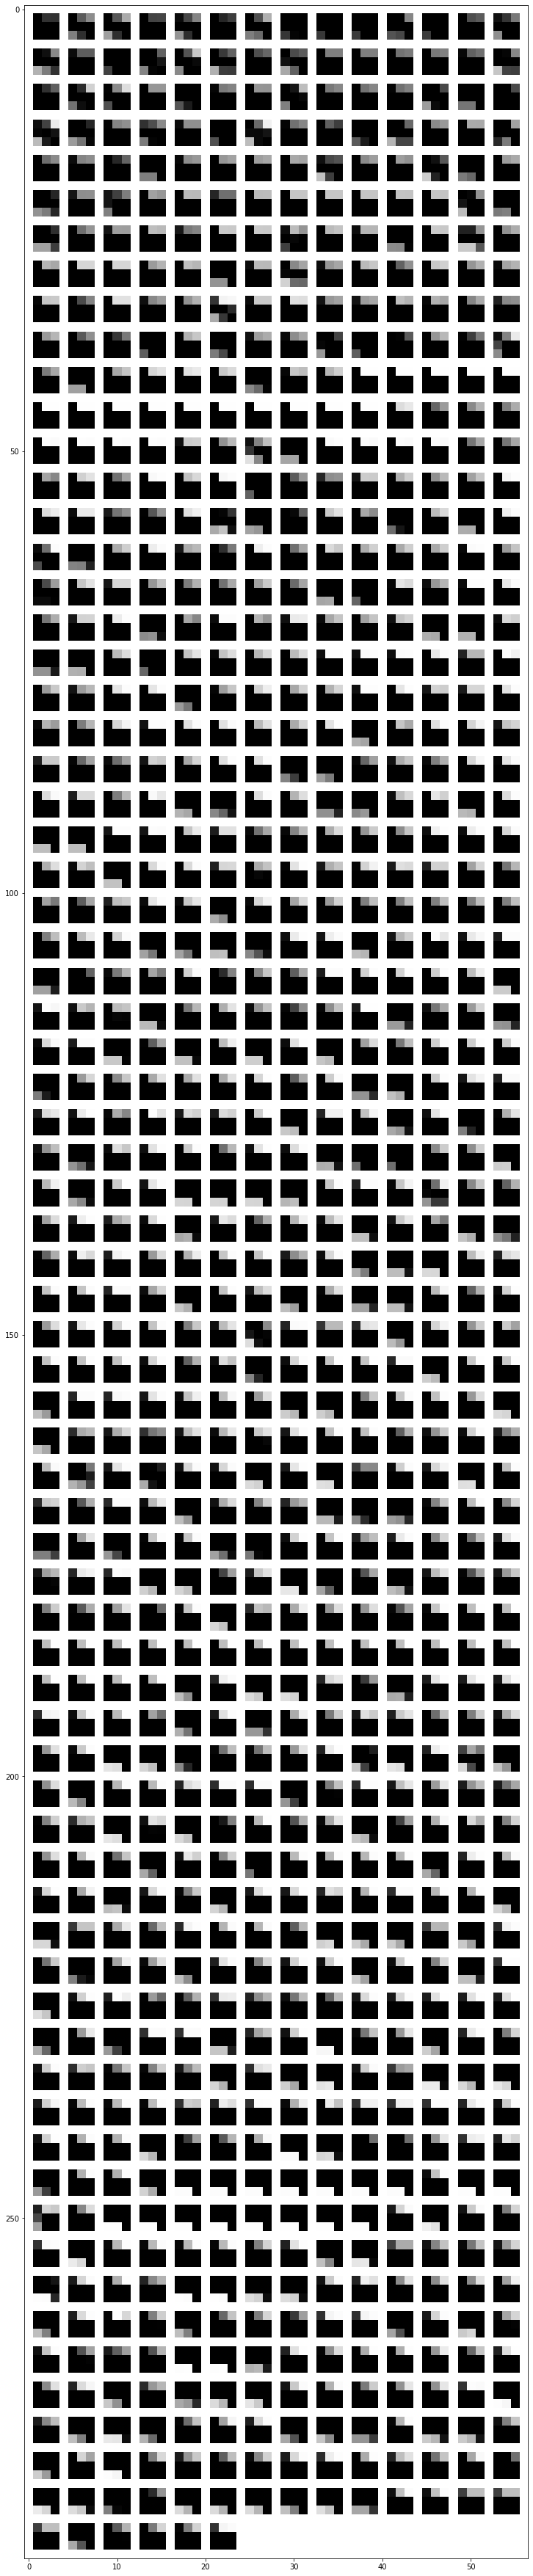

grid regions of 1000 regions more=True or worst=False active for filter number: 1 :


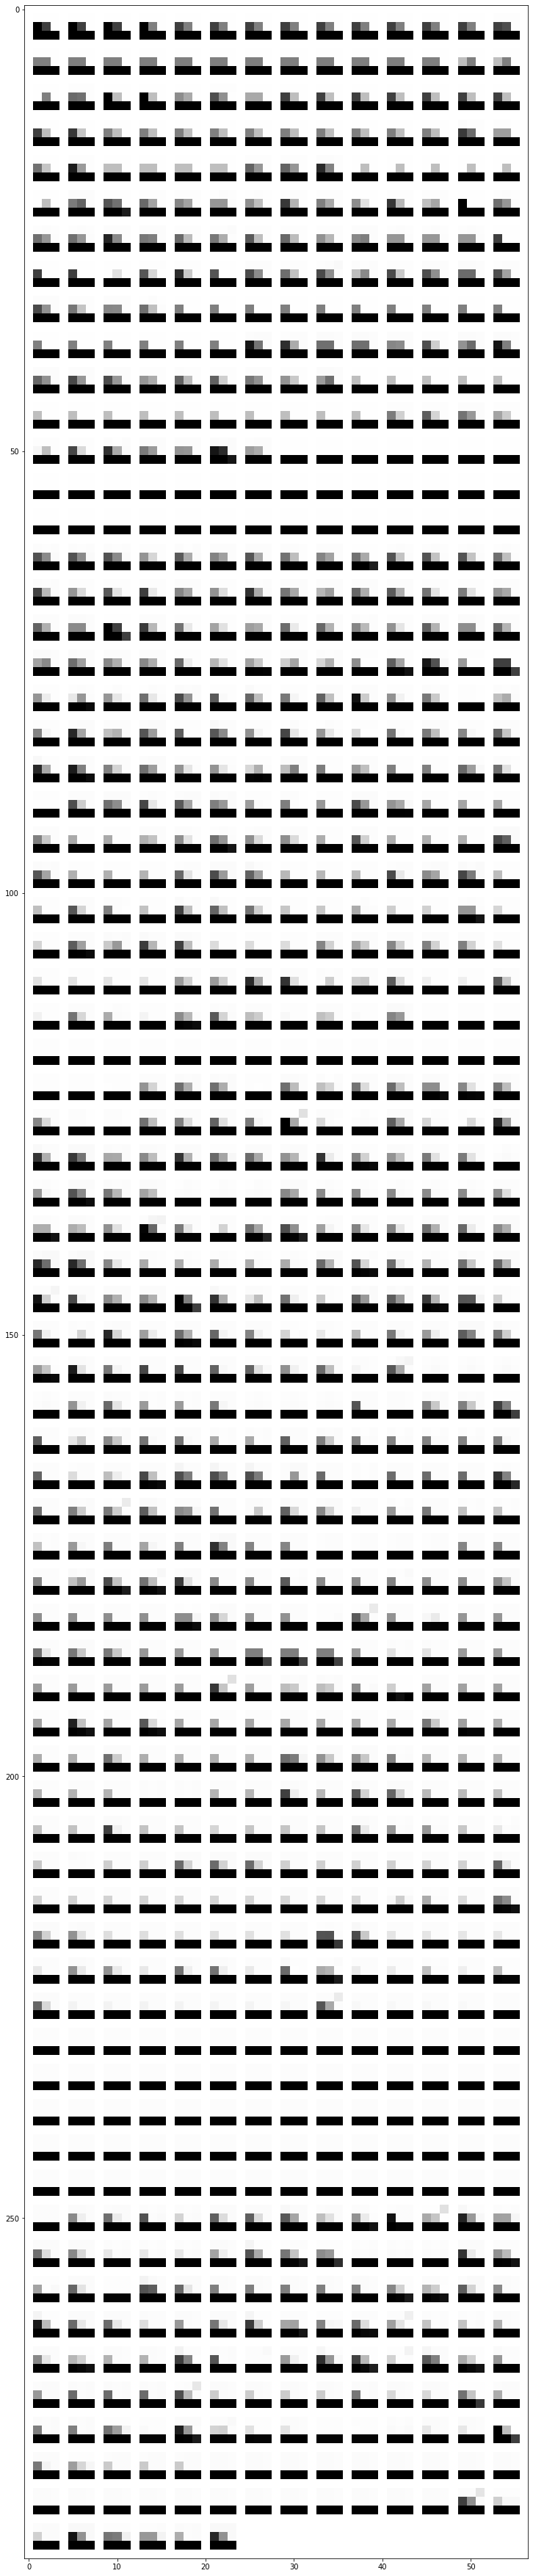

normalized regions:


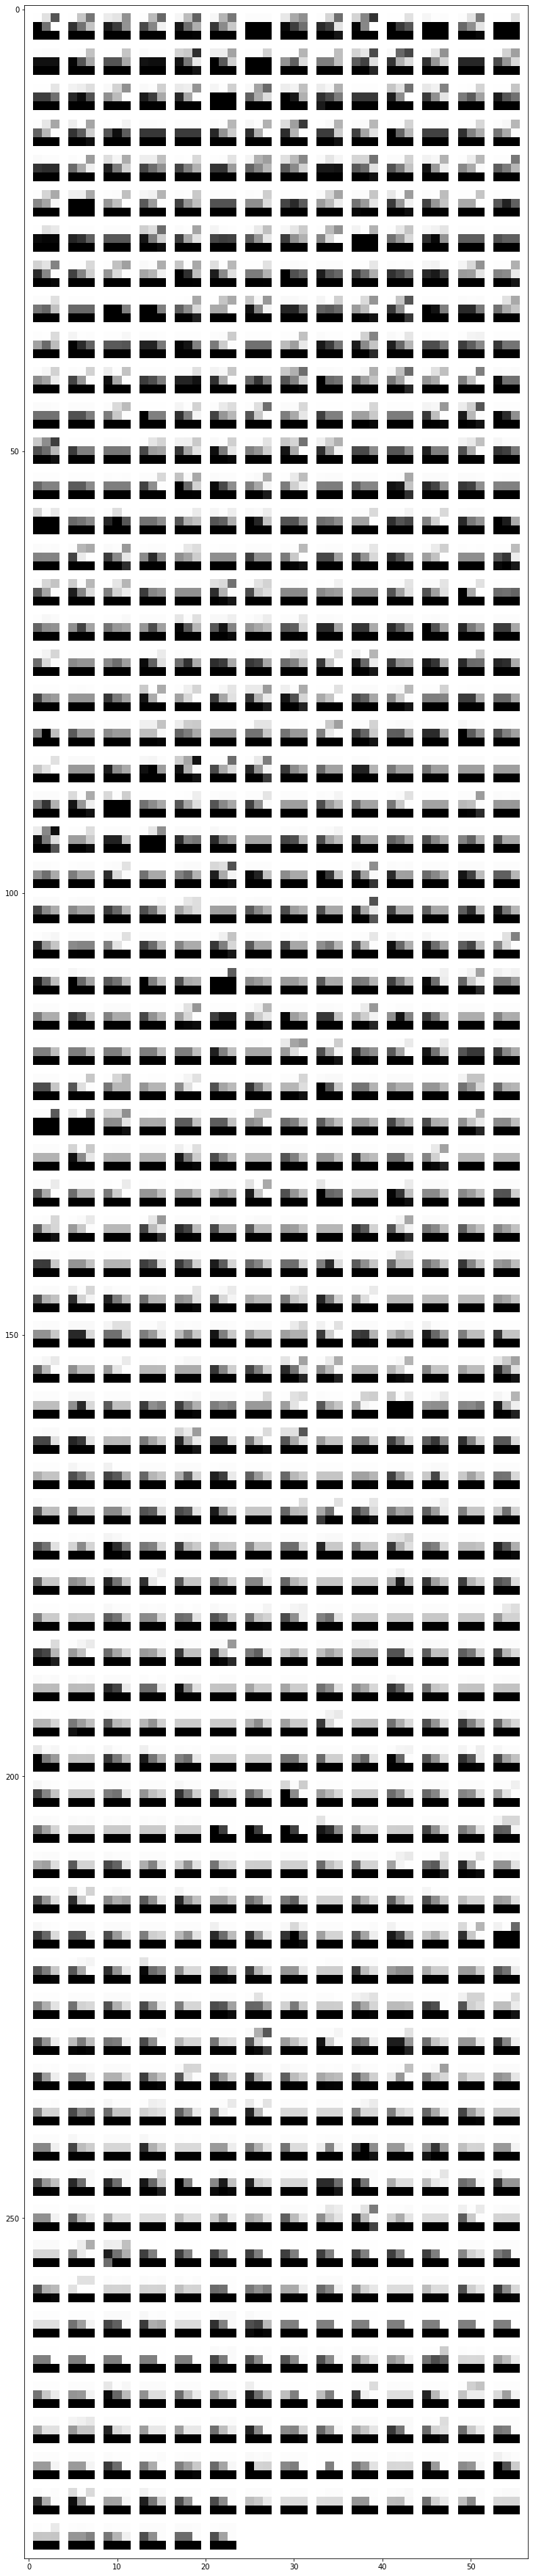

grid regions of 1000 regions more=True or worst=False active for filter number: 2 :


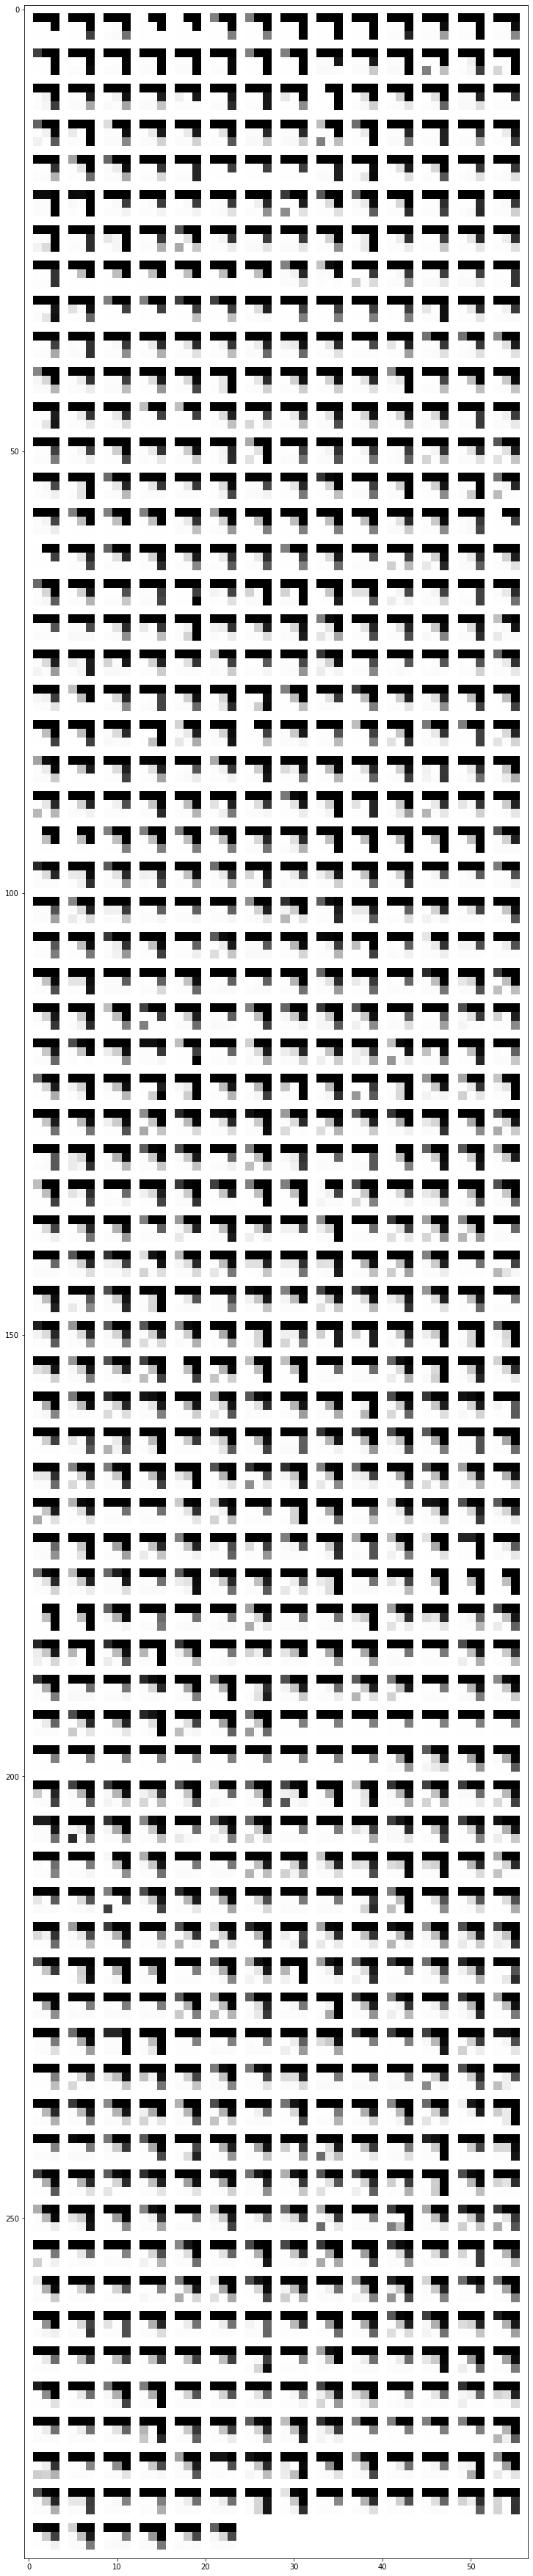

normalized regions:


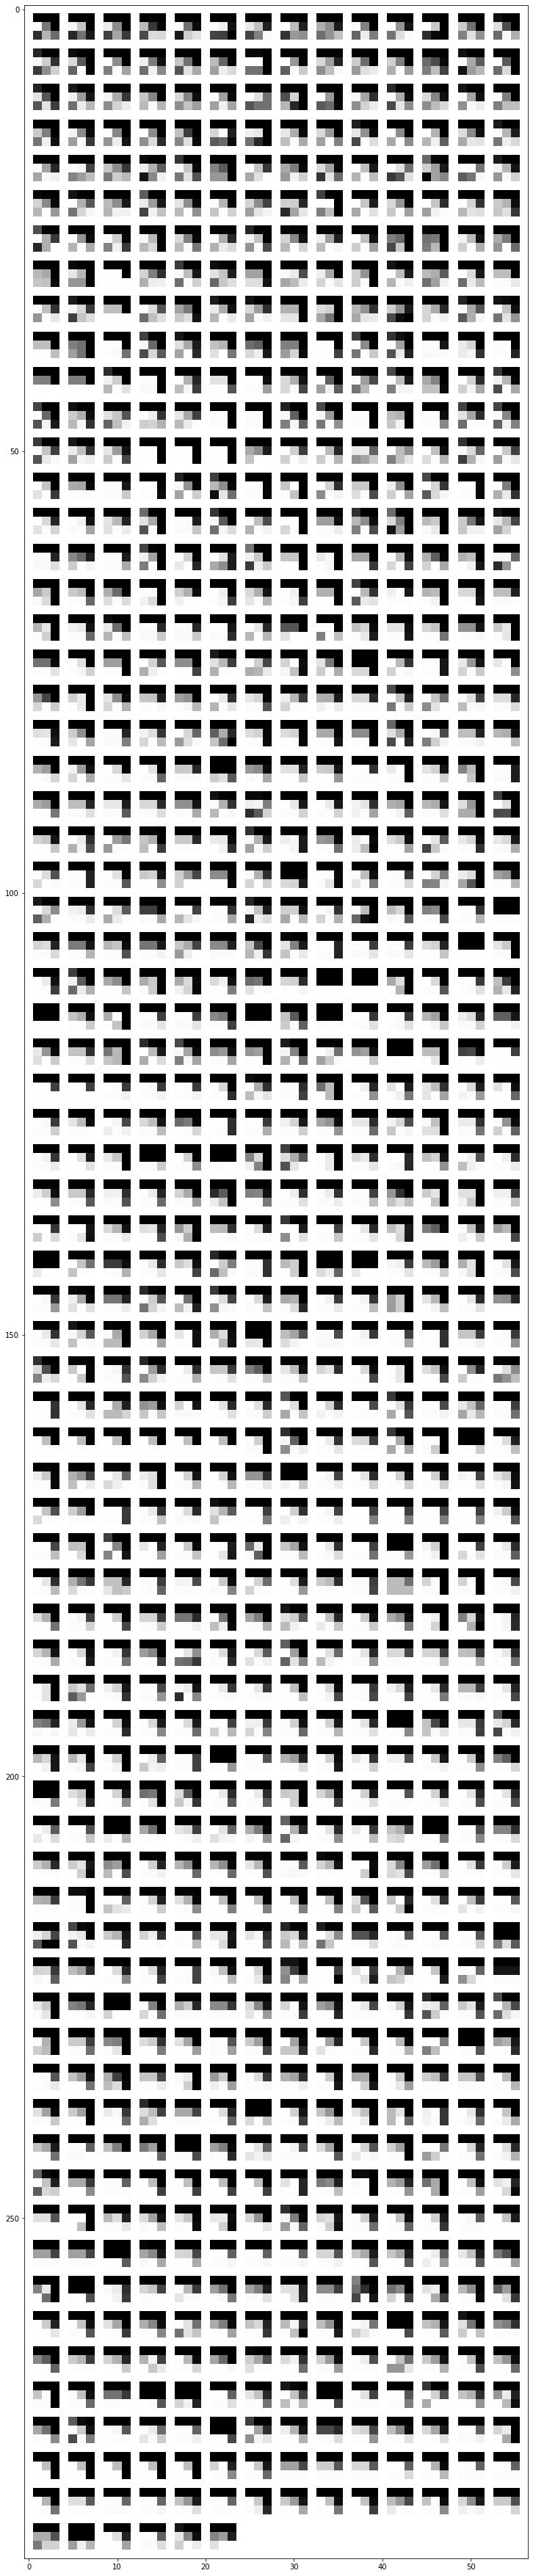

grid regions of 1000 regions more=True or worst=False active for filter number: 3 :


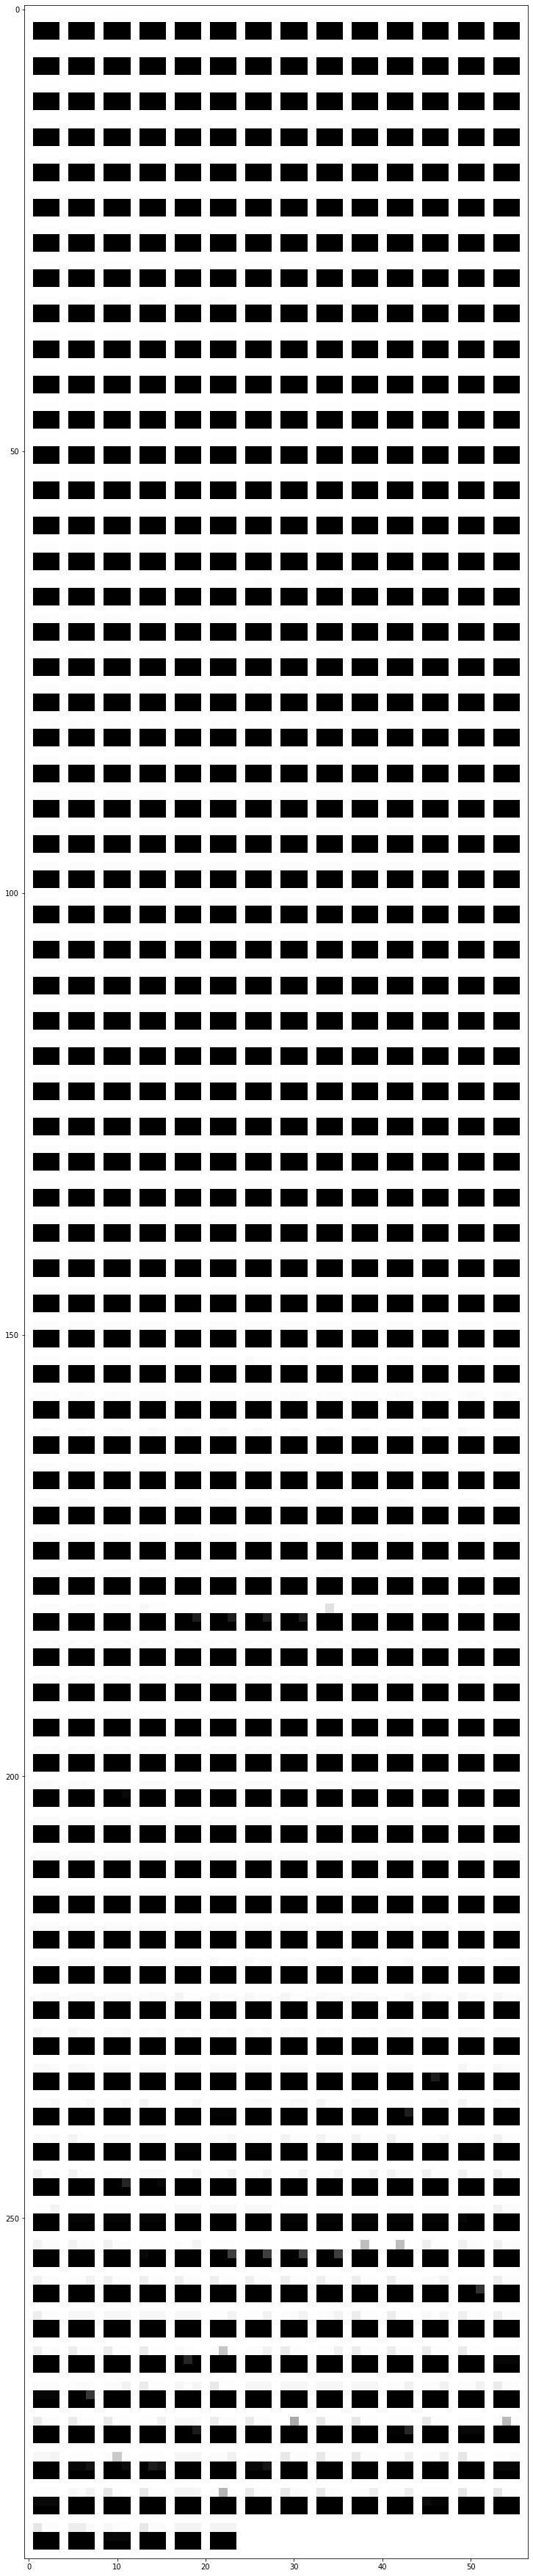

normalized regions:


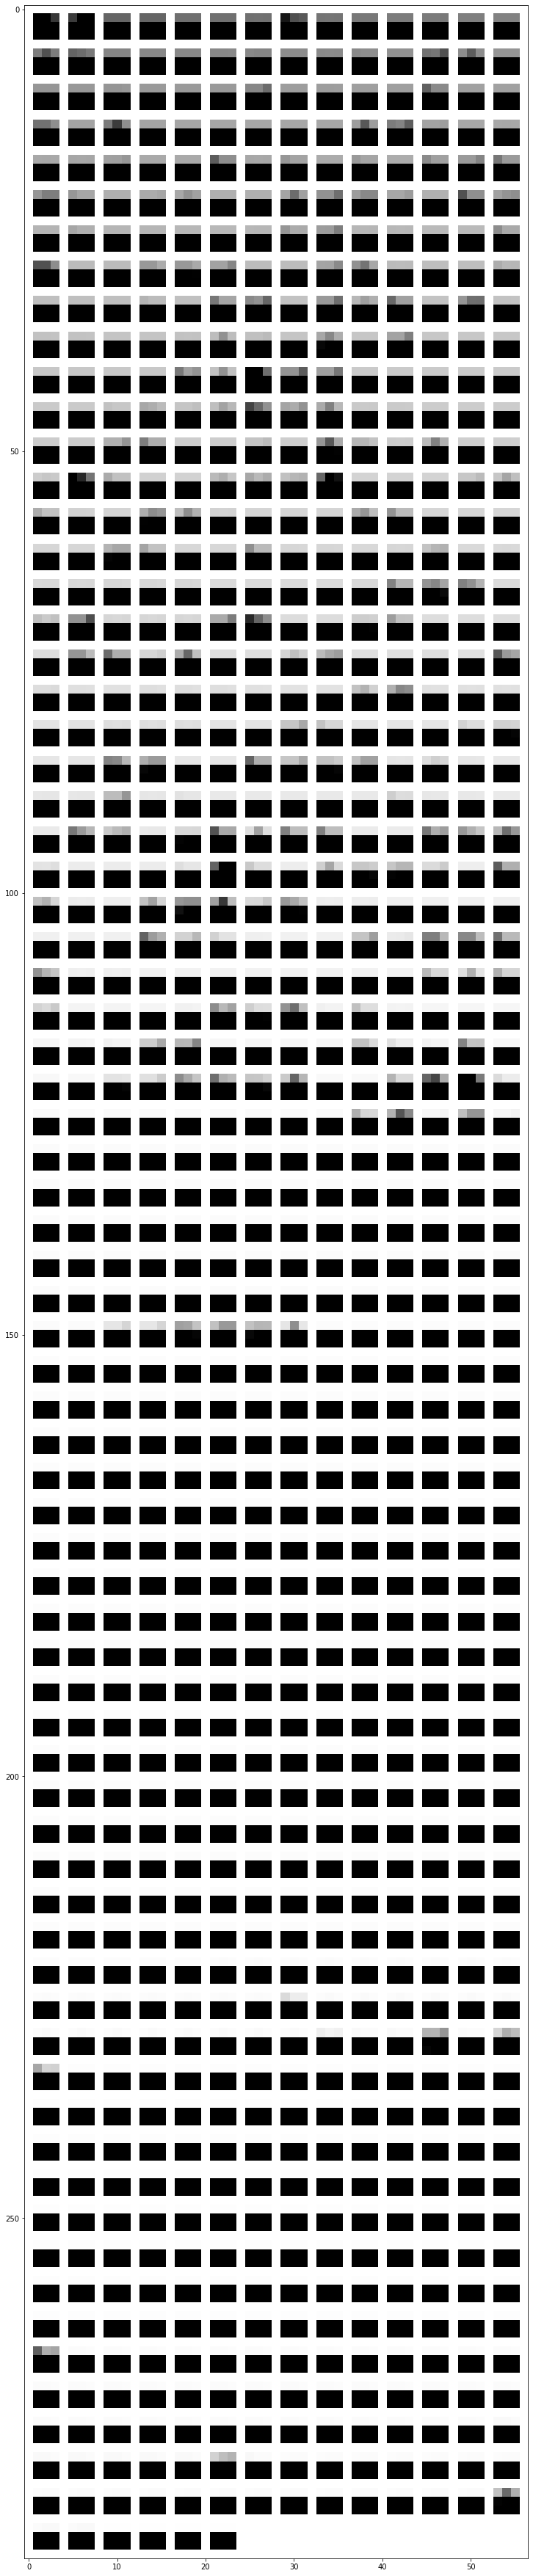

grid regions of 1000 regions more=True or worst=False active for filter number: 4 :


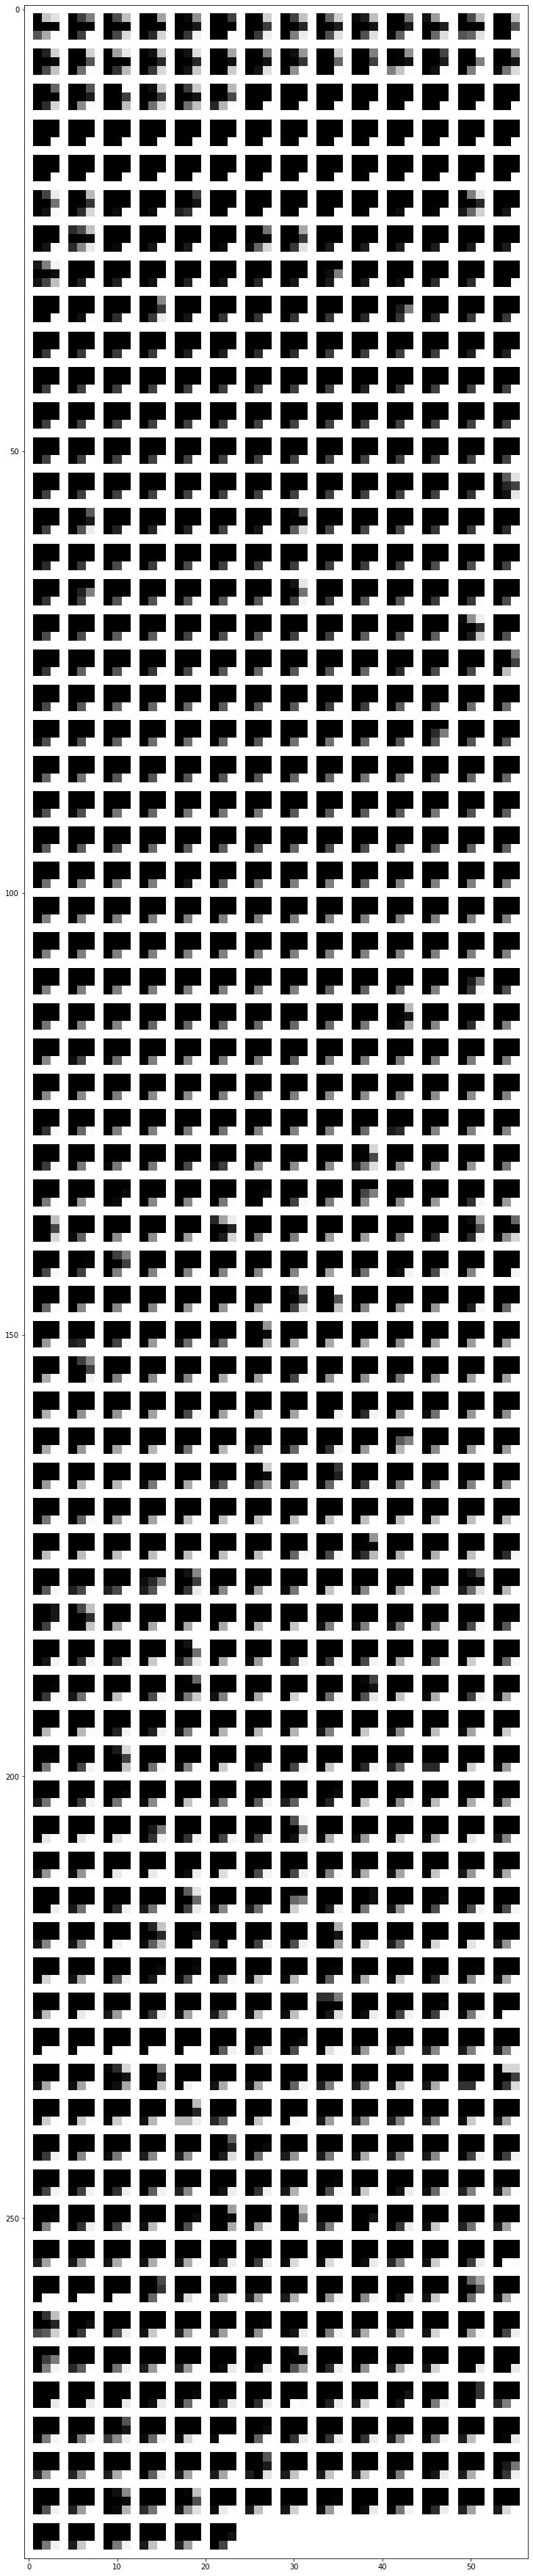

normalized regions:


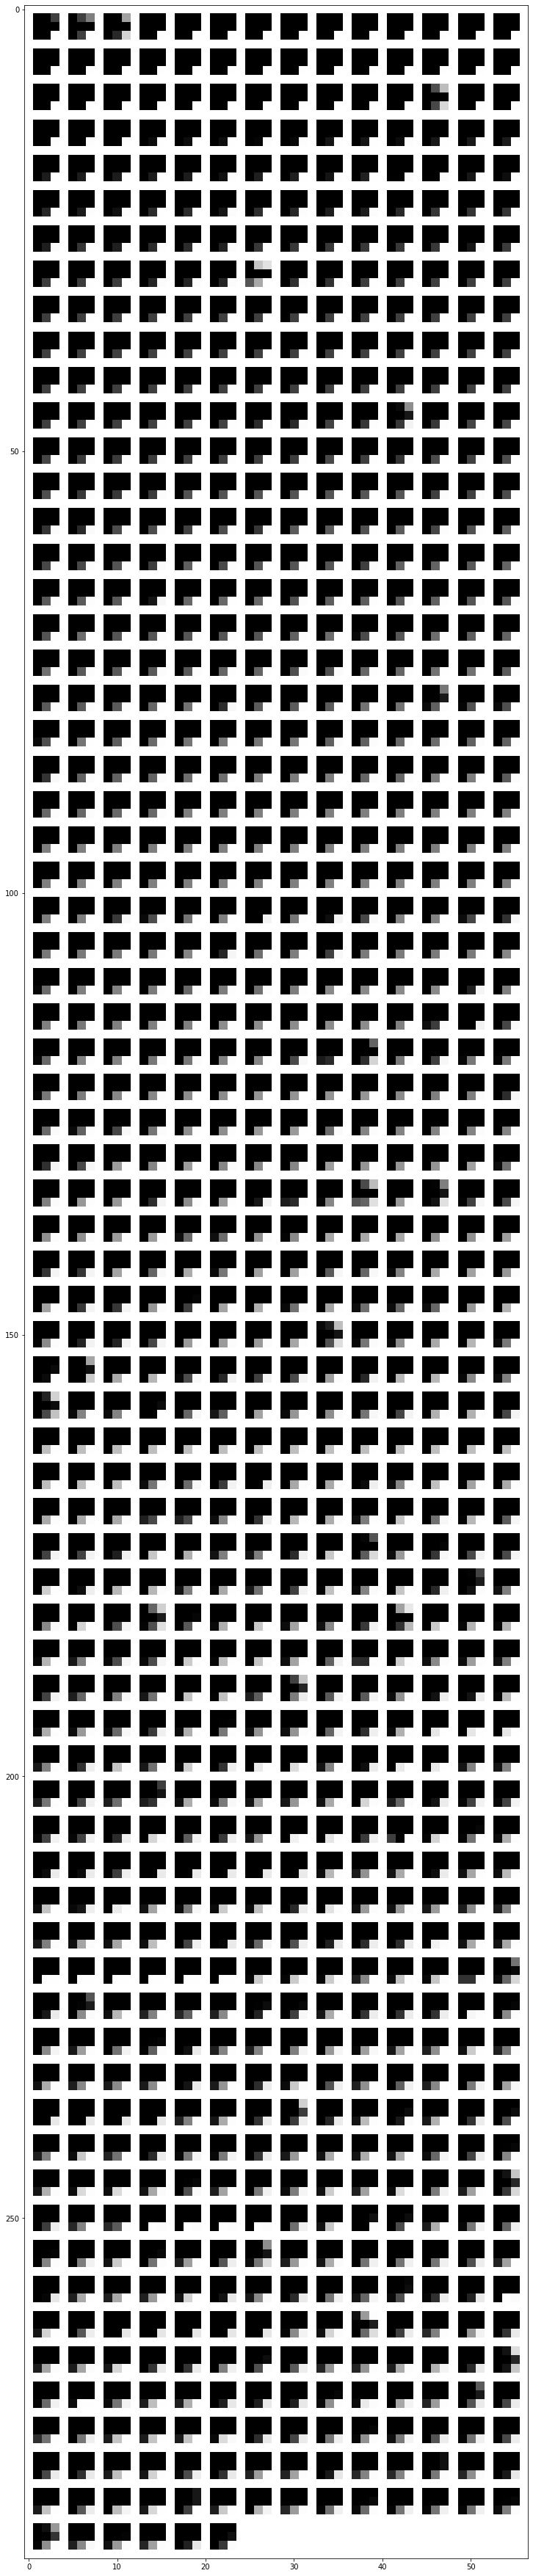

grid regions of 1000 regions more=True or worst=False active for filter number: 5 :


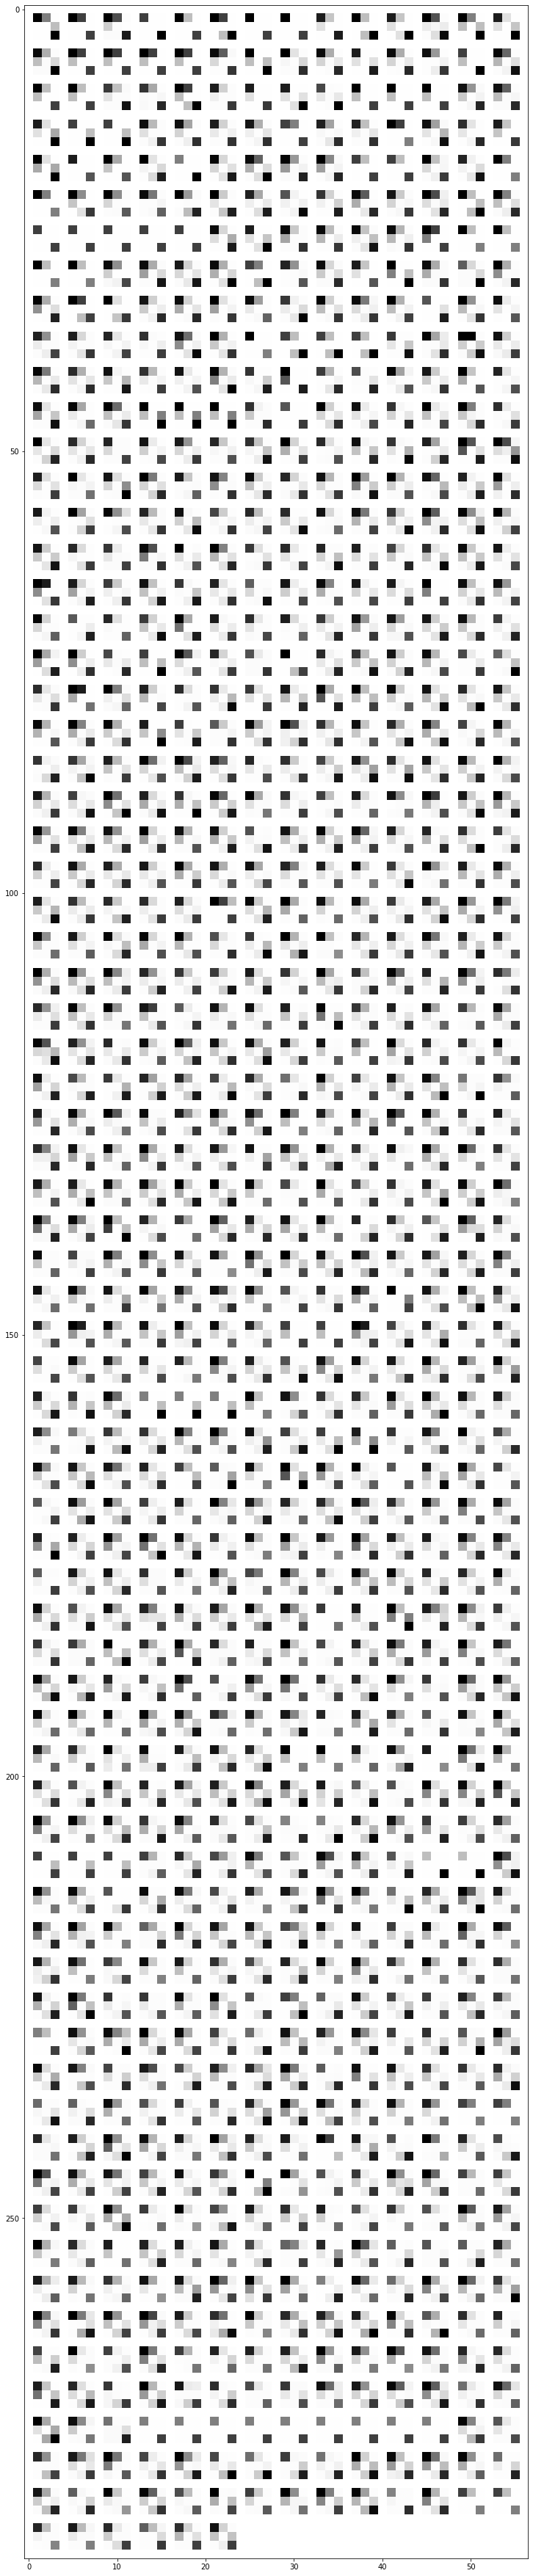

normalized regions:


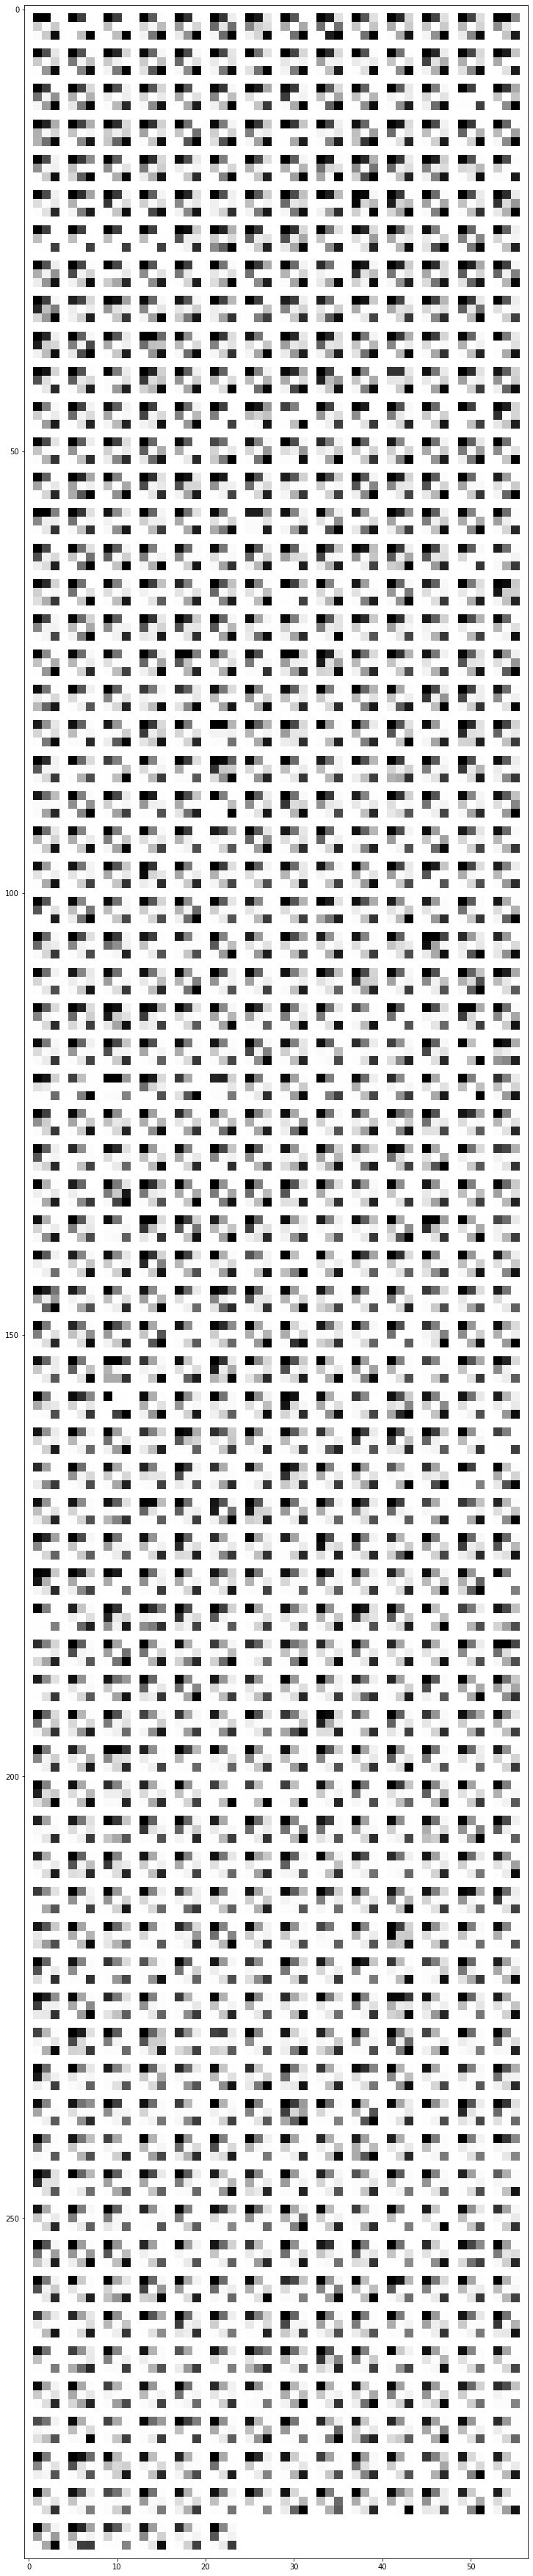

grid regions of 1000 regions more=True or worst=False active for filter number: 6 :


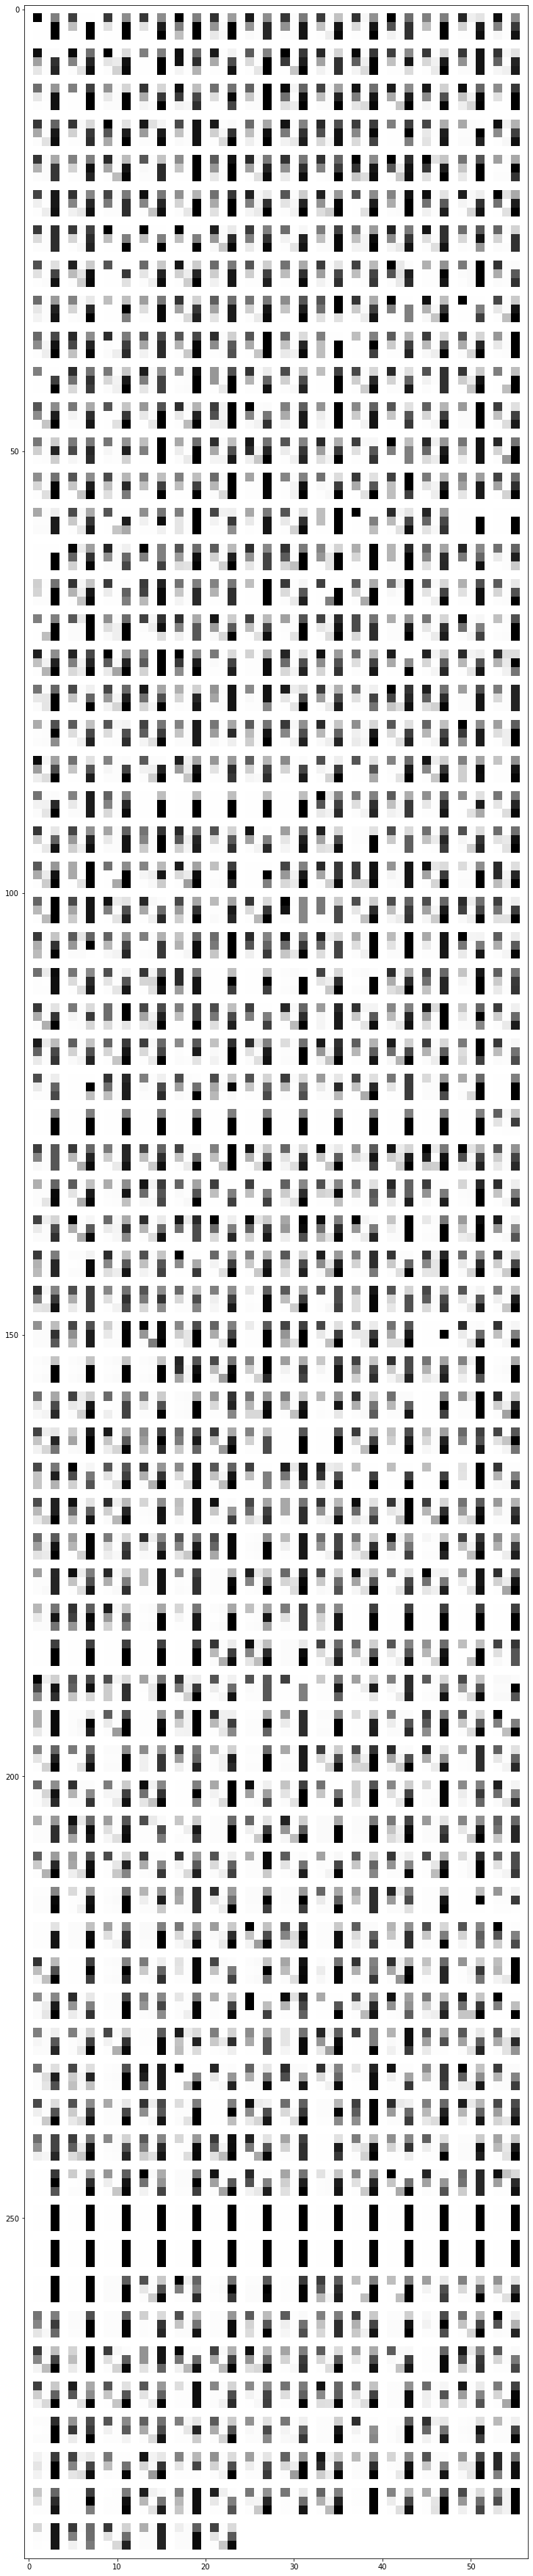

normalized regions:


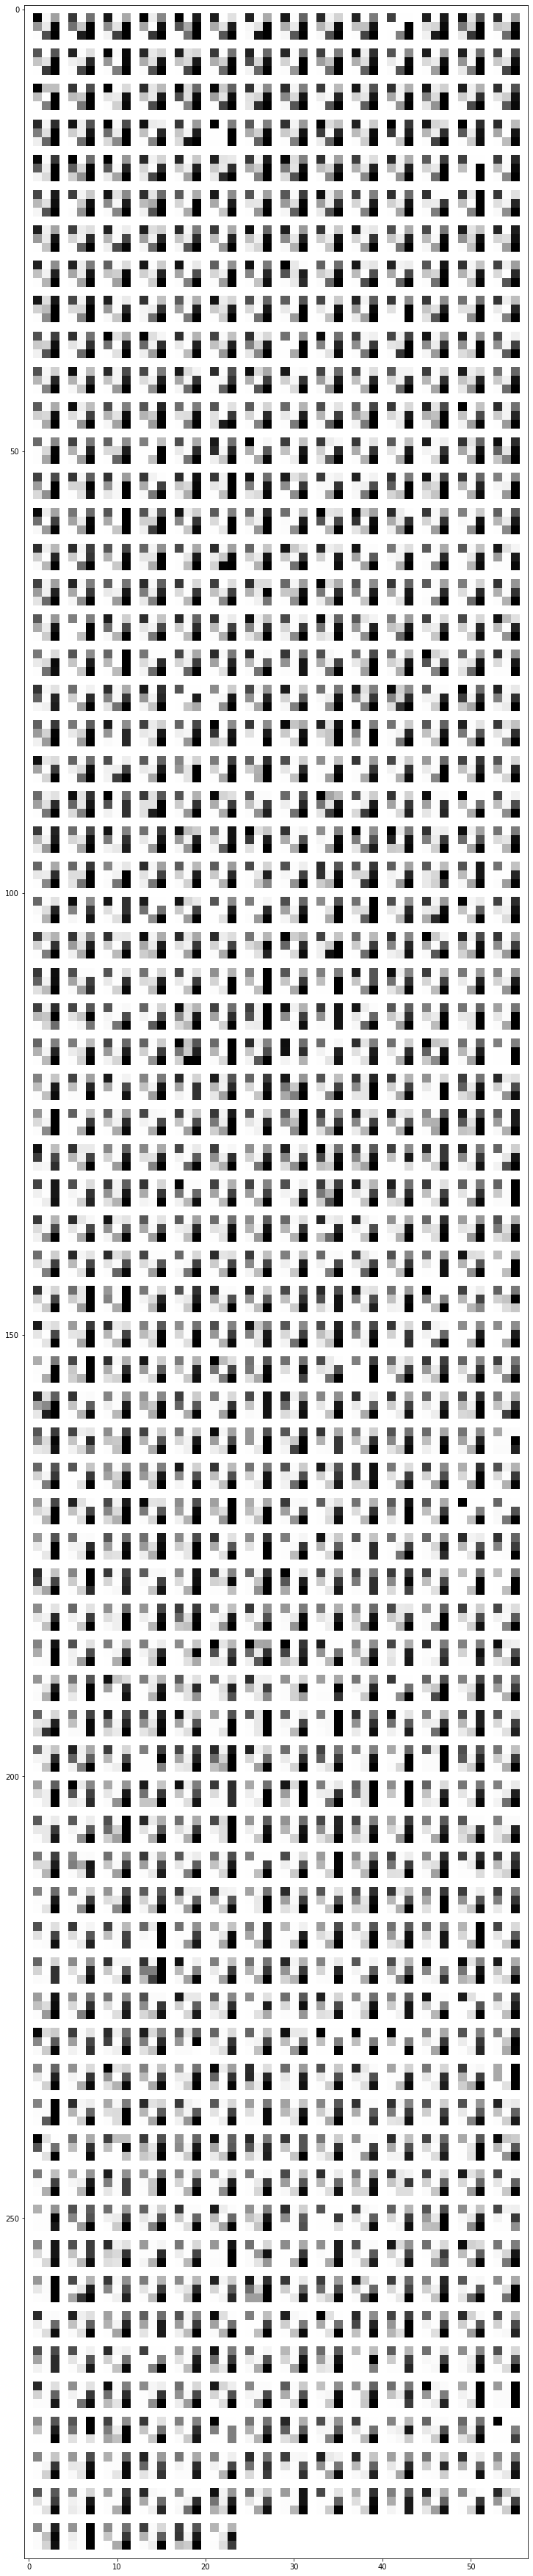

grid regions of 1000 regions more=True or worst=False active for filter number: 7 :


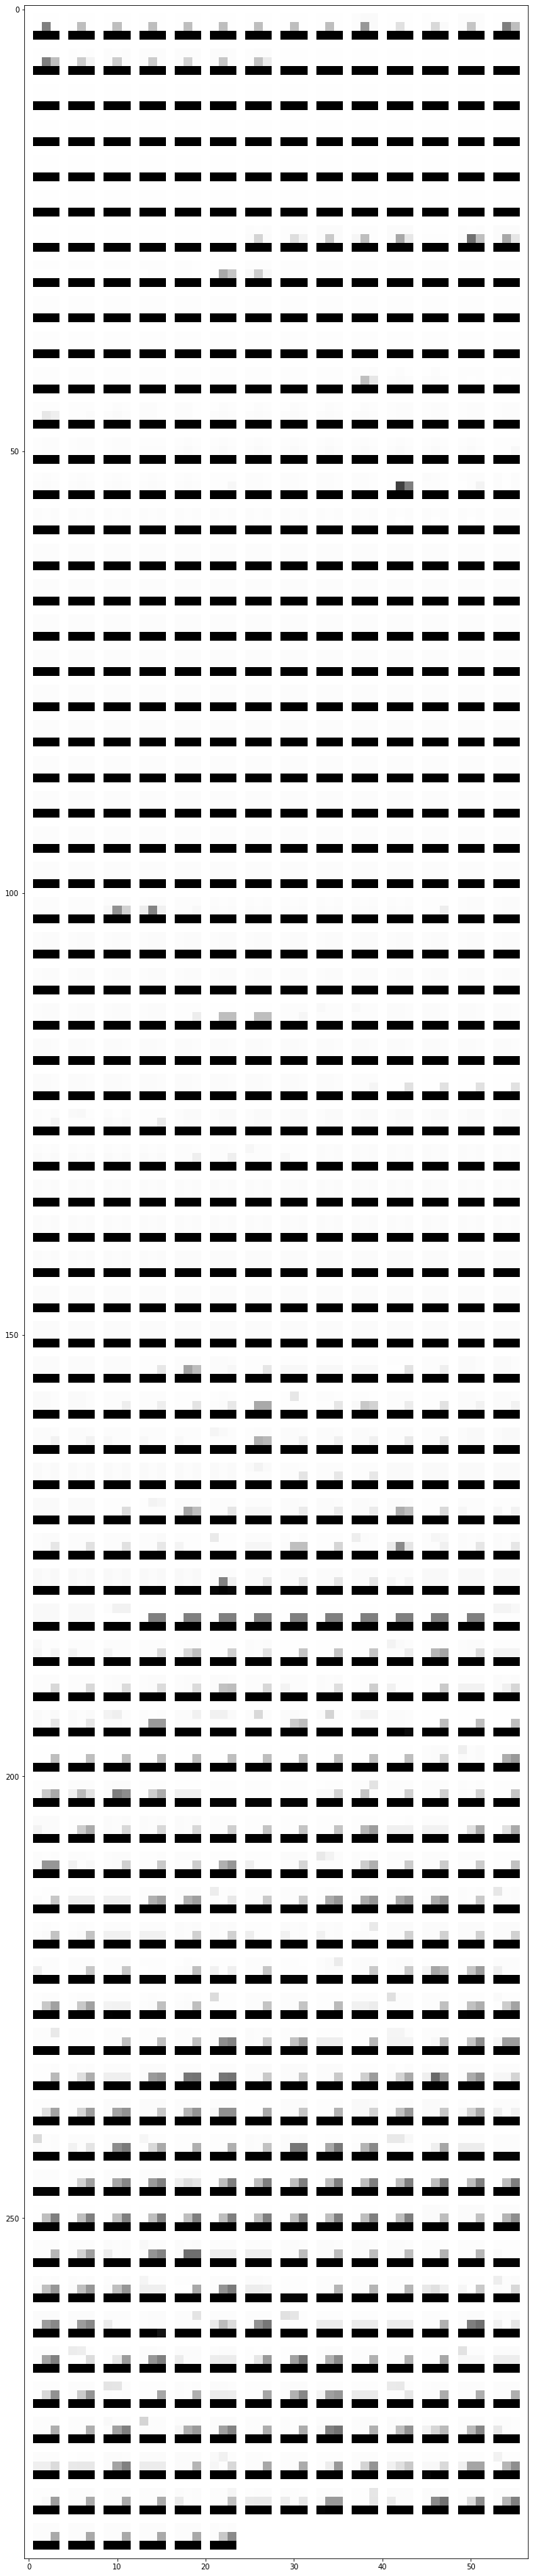

normalized regions:


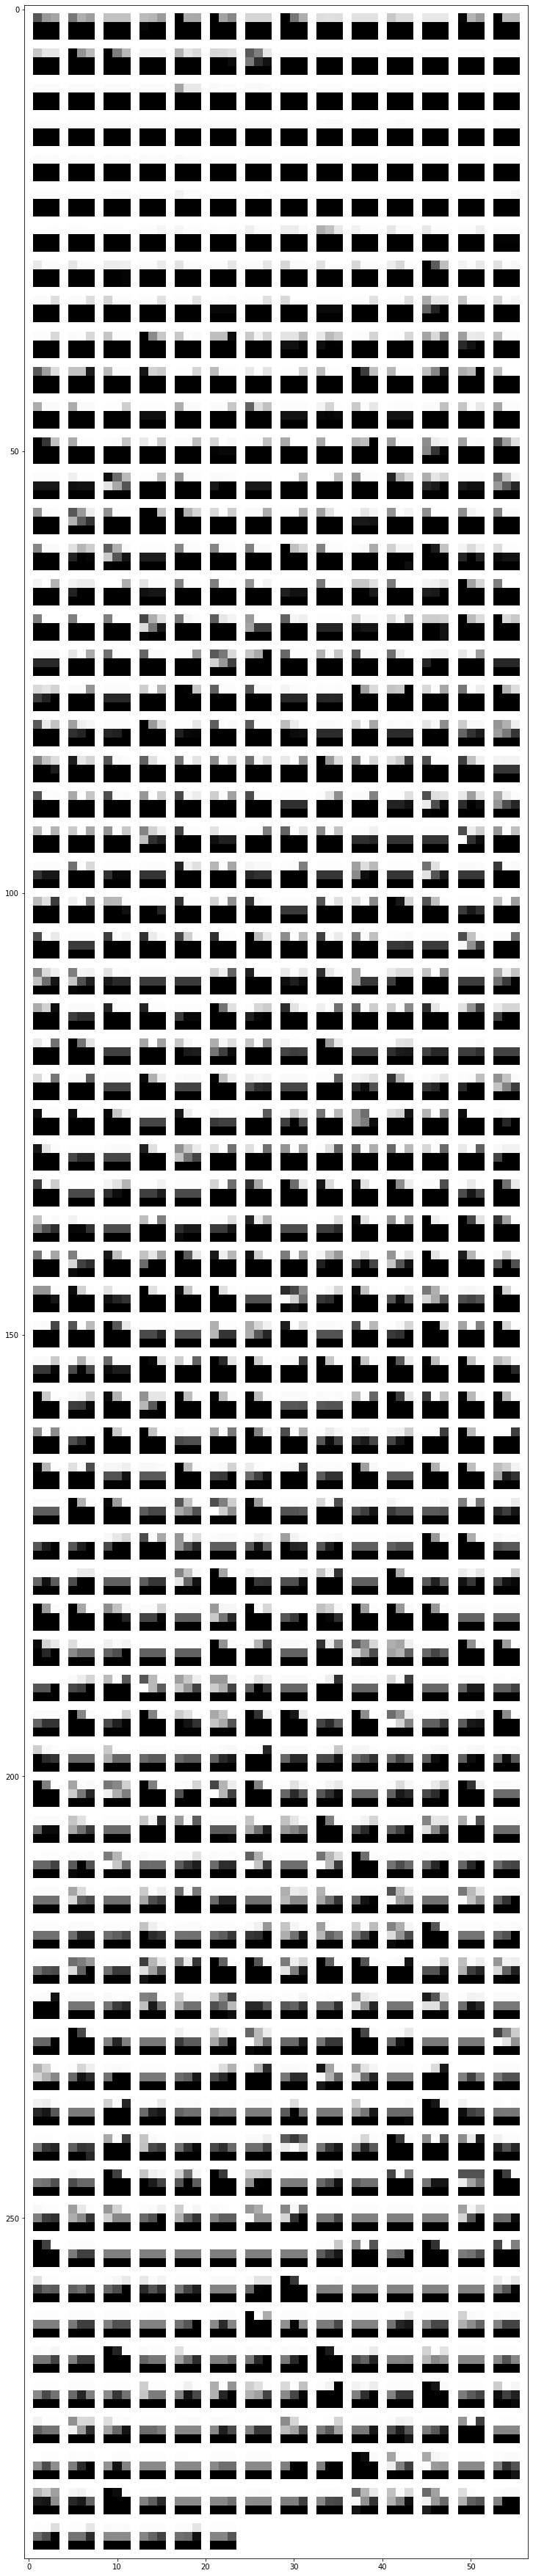

grid regions of 1000 regions more=True or worst=False active for filter number: 8 :


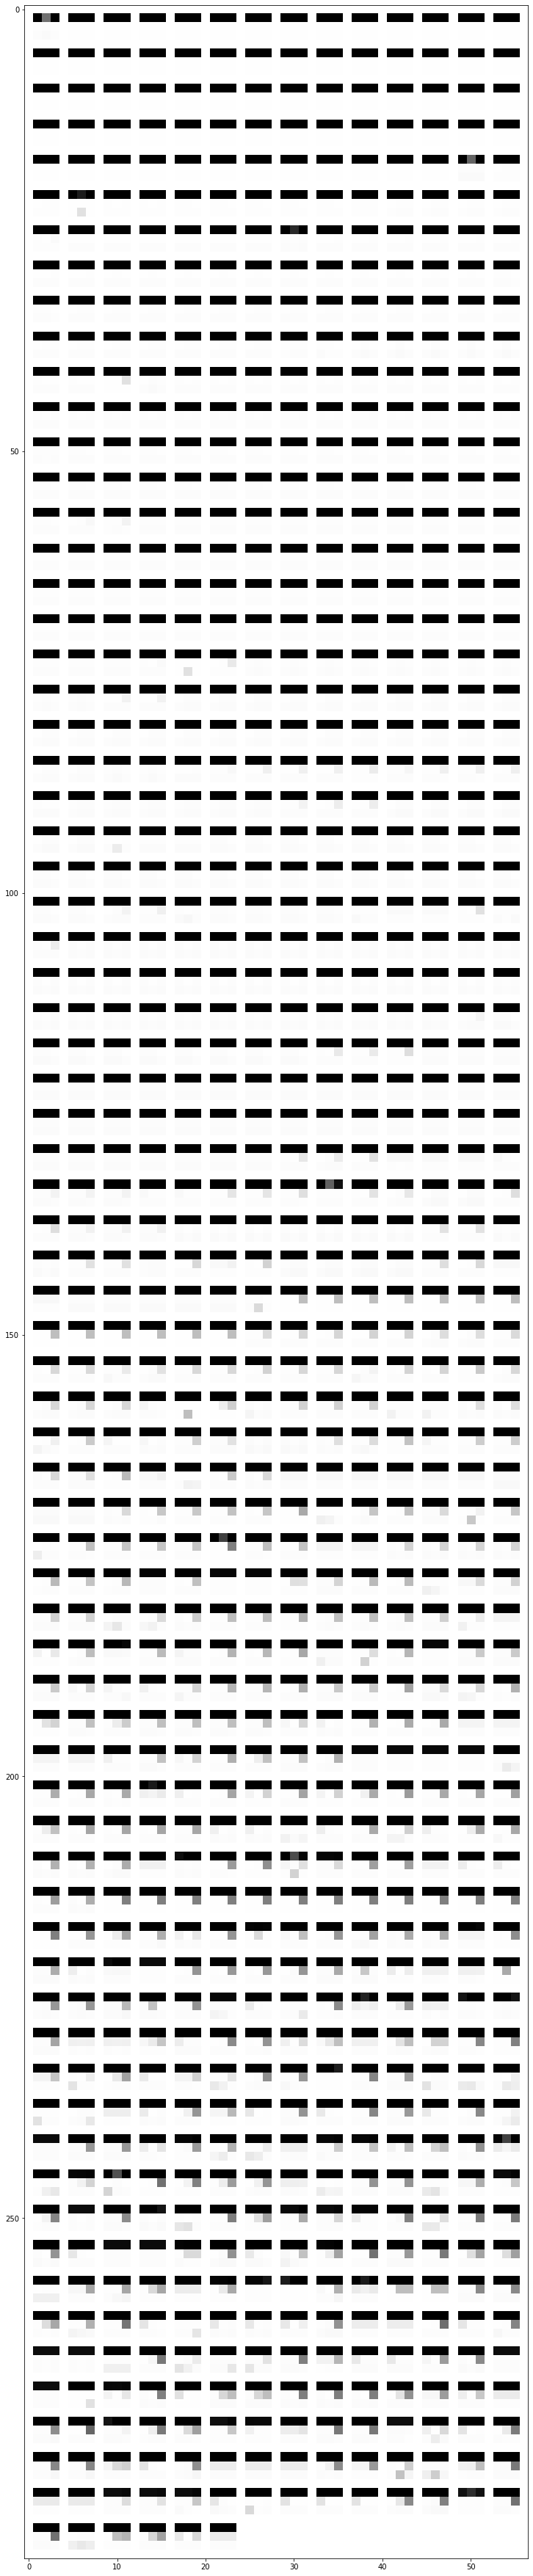

normalized regions:


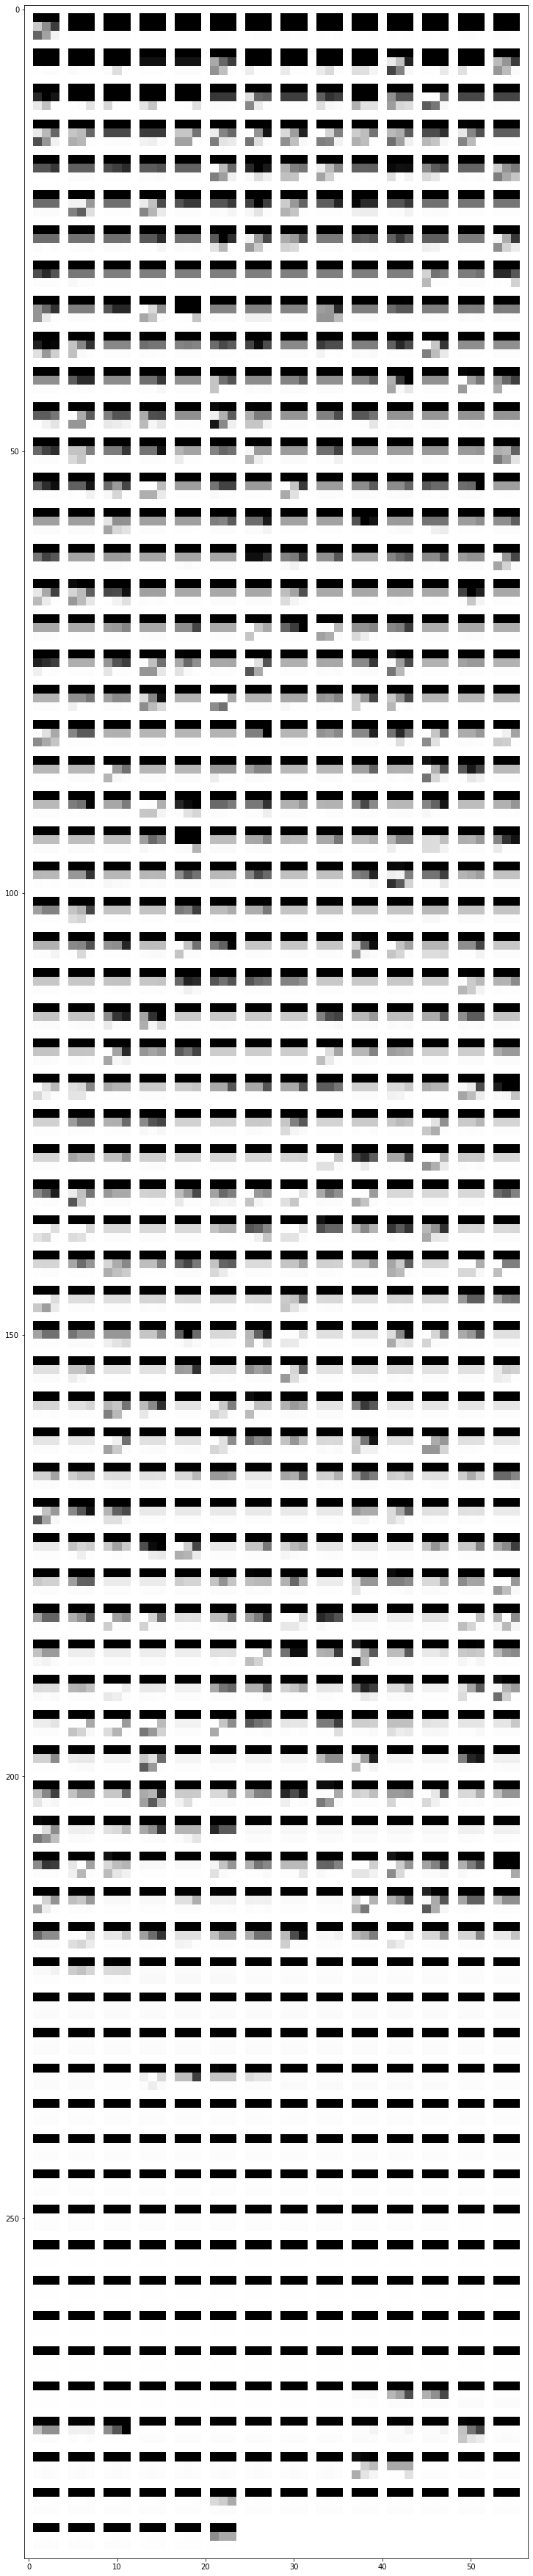

grid regions of 1000 regions more=True or worst=False active for filter number: 9 :


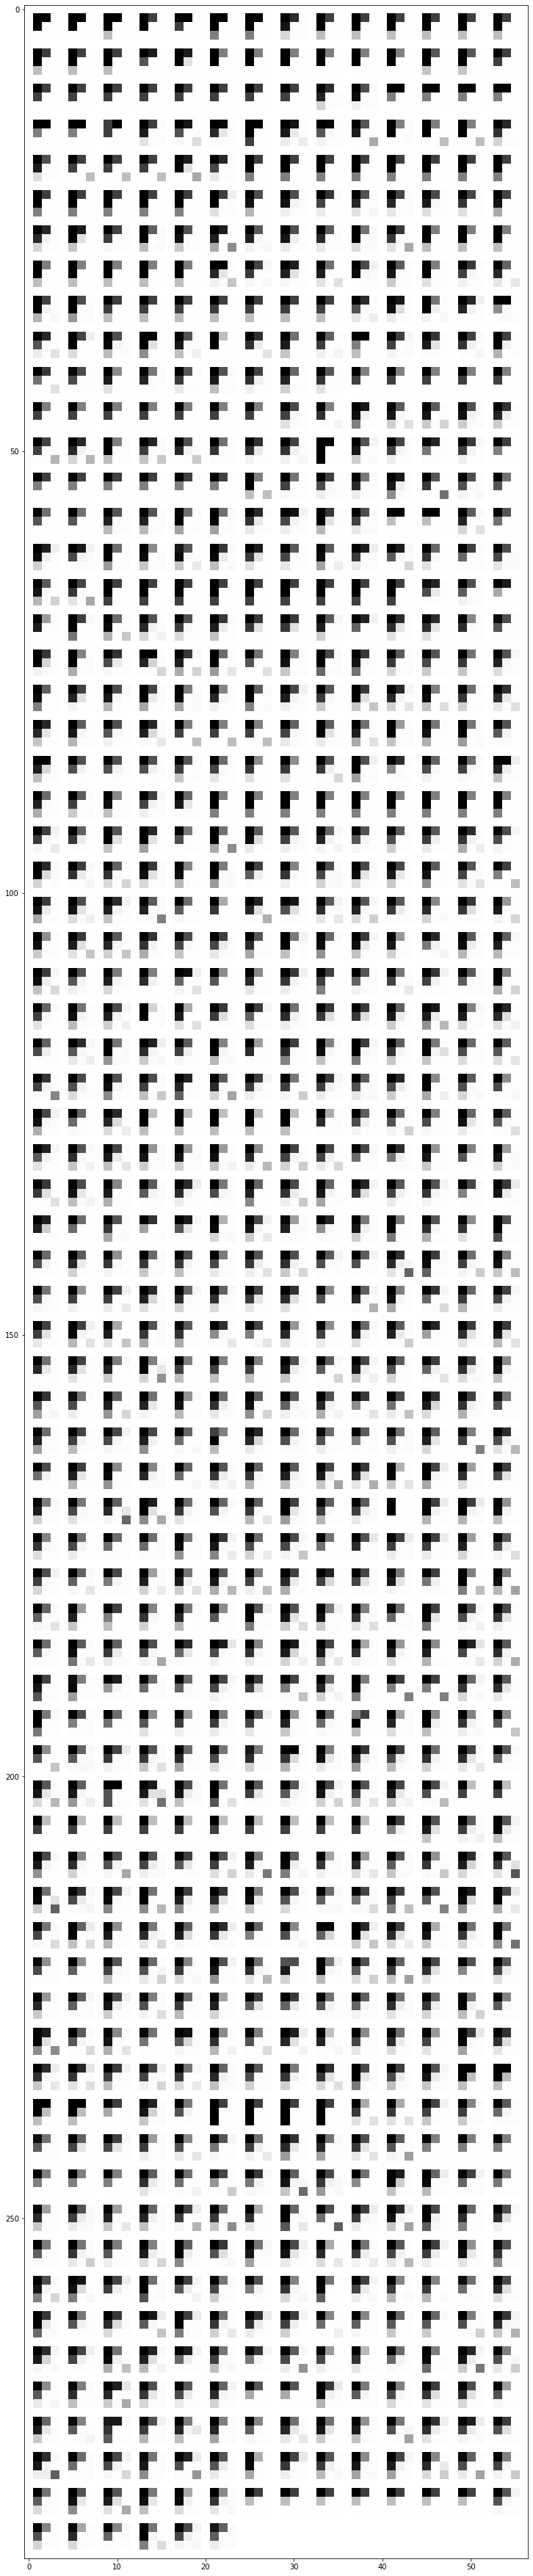

normalized regions:


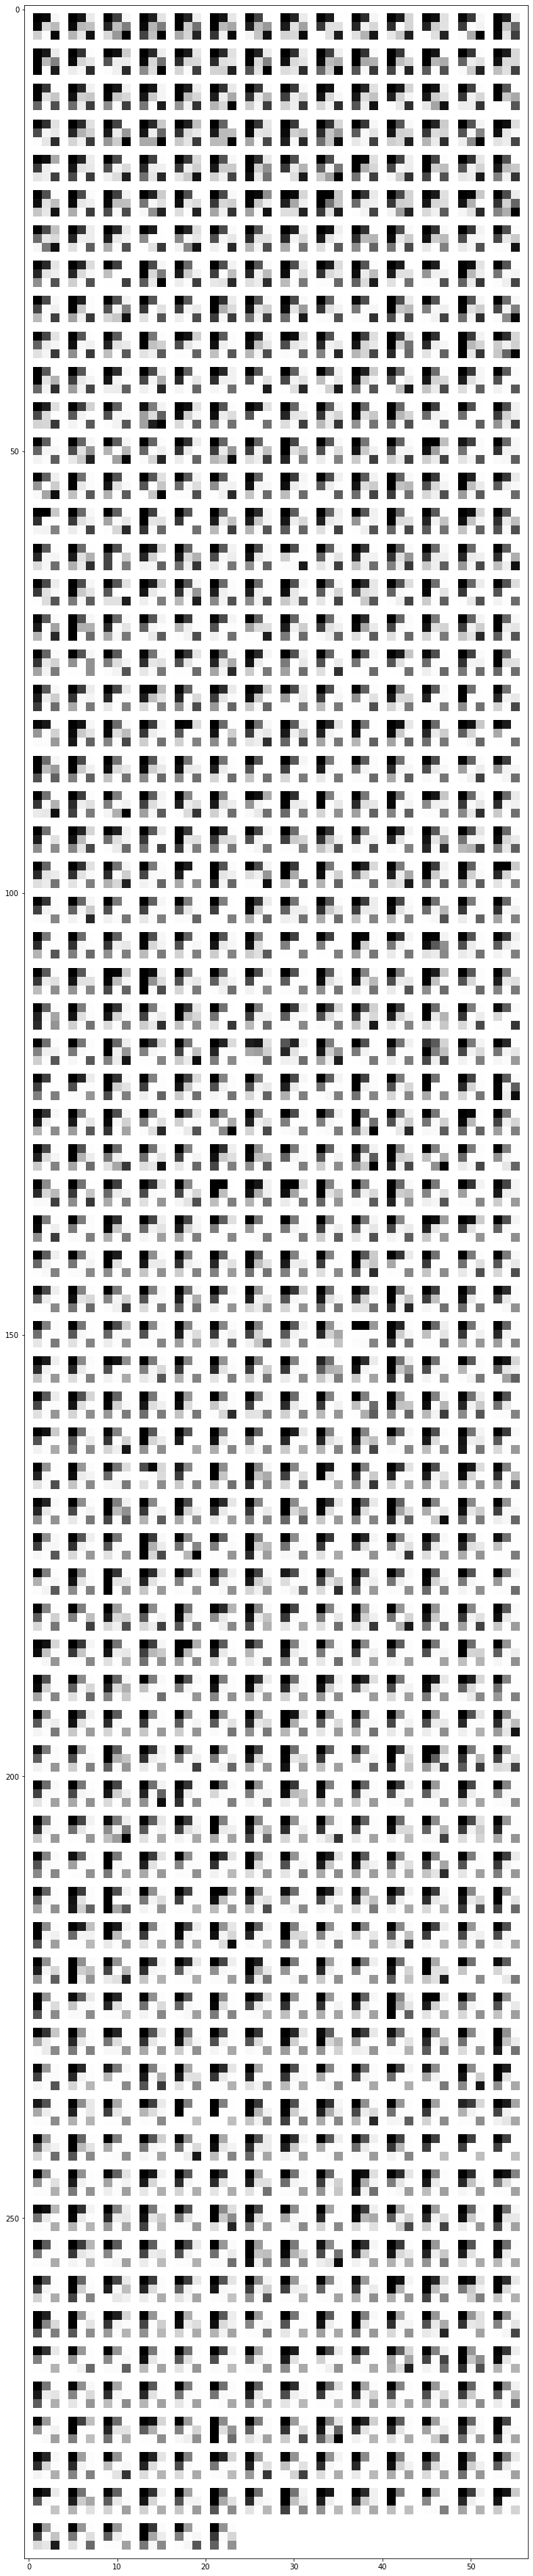

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10
nrow=14

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary
activations_normalized = activation_layer1_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1, nrow=nrow)

##### Binary model layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10
nrow=14

# regions and activation of interest
regions = region_layer2_binary
activations = activation_layer2_binary
activations_normalized = activation_layer2_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2, nrow=nrow)

Output hidden; open in https://colab.research.google.com to view.

##### No binary model without bias layer1:

Visualization filters learned for layer: layer1


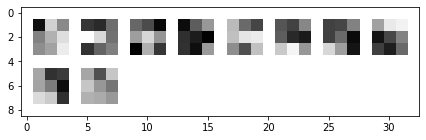

Visualization filters learned for layer: layer2


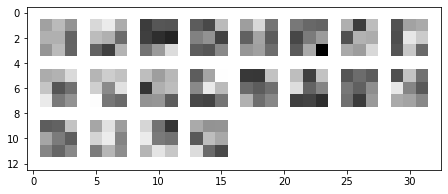

In [0]:
viz_filters(model_no_binary_wt_bias)

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 1000 images
mean image:
mean regions of 1000 regions more=True or worst=False active for filter number: 0 :


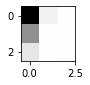

normalized region:


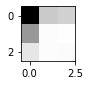

mean regions of 1000 regions more=True or worst=False active for filter number: 1 :


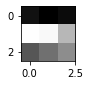

normalized region:


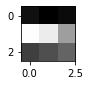

mean regions of 1000 regions more=True or worst=False active for filter number: 2 :


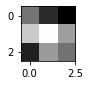

normalized region:


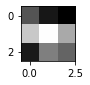

mean regions of 1000 regions more=True or worst=False active for filter number: 3 :


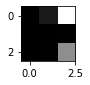

normalized region:


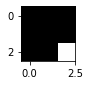

mean regions of 1000 regions more=True or worst=False active for filter number: 4 :


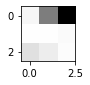

normalized region:


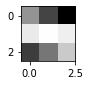

mean regions of 1000 regions more=True or worst=False active for filter number: 5 :


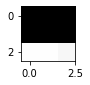

normalized region:


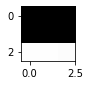

mean regions of 1000 regions more=True or worst=False active for filter number: 6 :


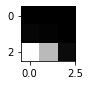

normalized region:


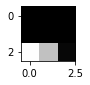

mean regions of 1000 regions more=True or worst=False active for filter number: 7 :


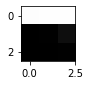

normalized region:


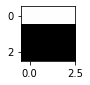

mean regions of 1000 regions more=True or worst=False active for filter number: 8 :


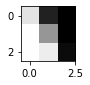

normalized region:


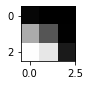

mean regions of 1000 regions more=True or worst=False active for filter number: 9 :


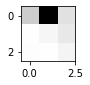

normalized region:


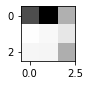

grid image
grid regions of 1000 regions more=True or worst=False active for filter number: 0 :


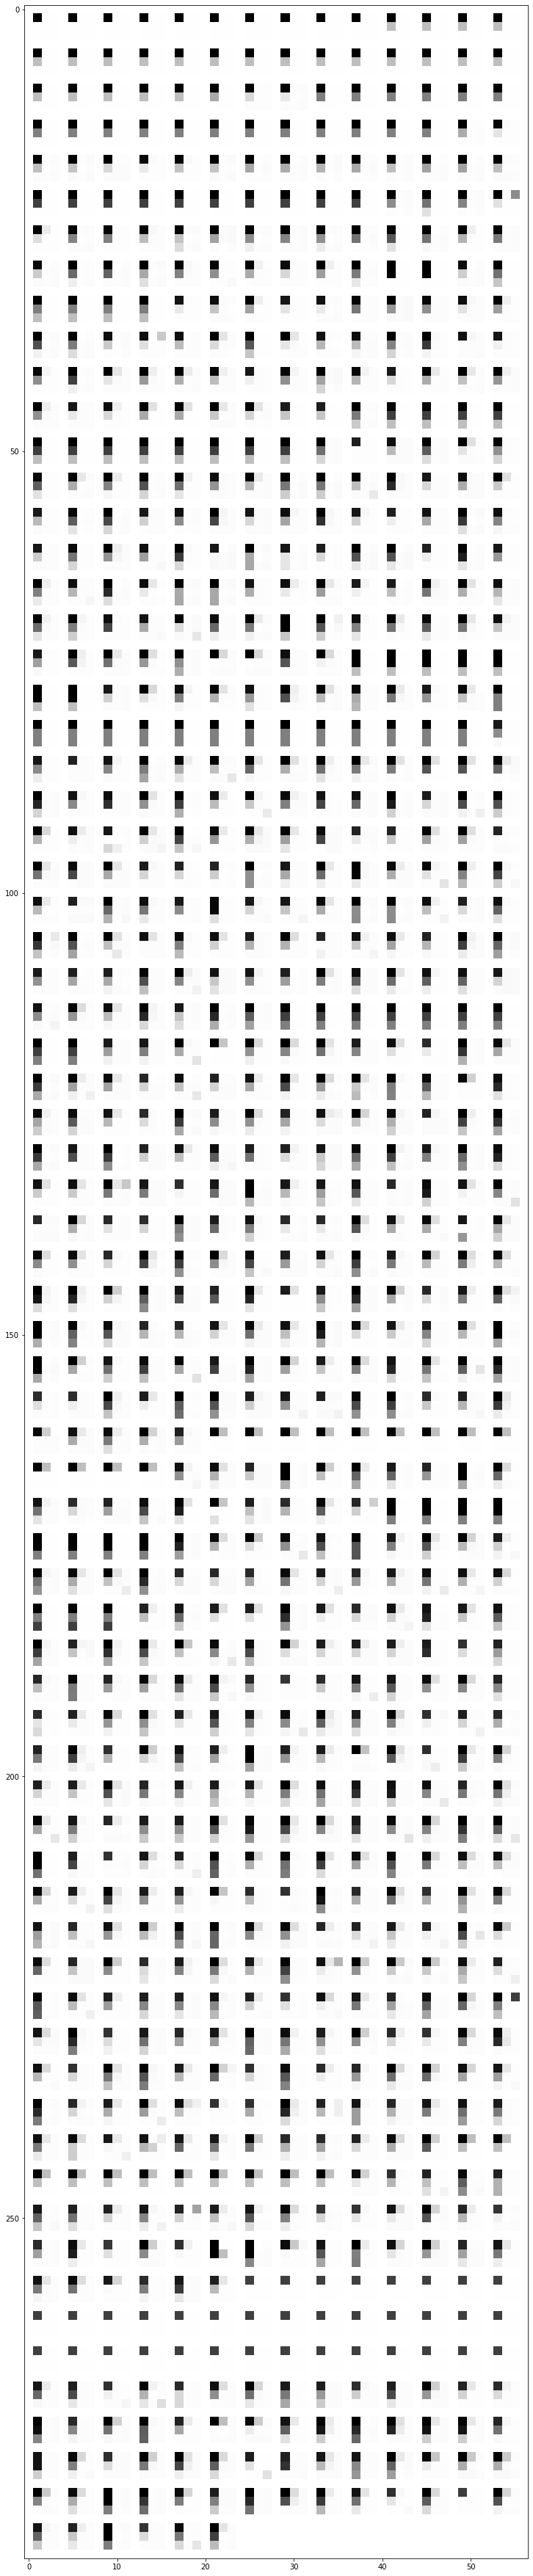

normalized regions:


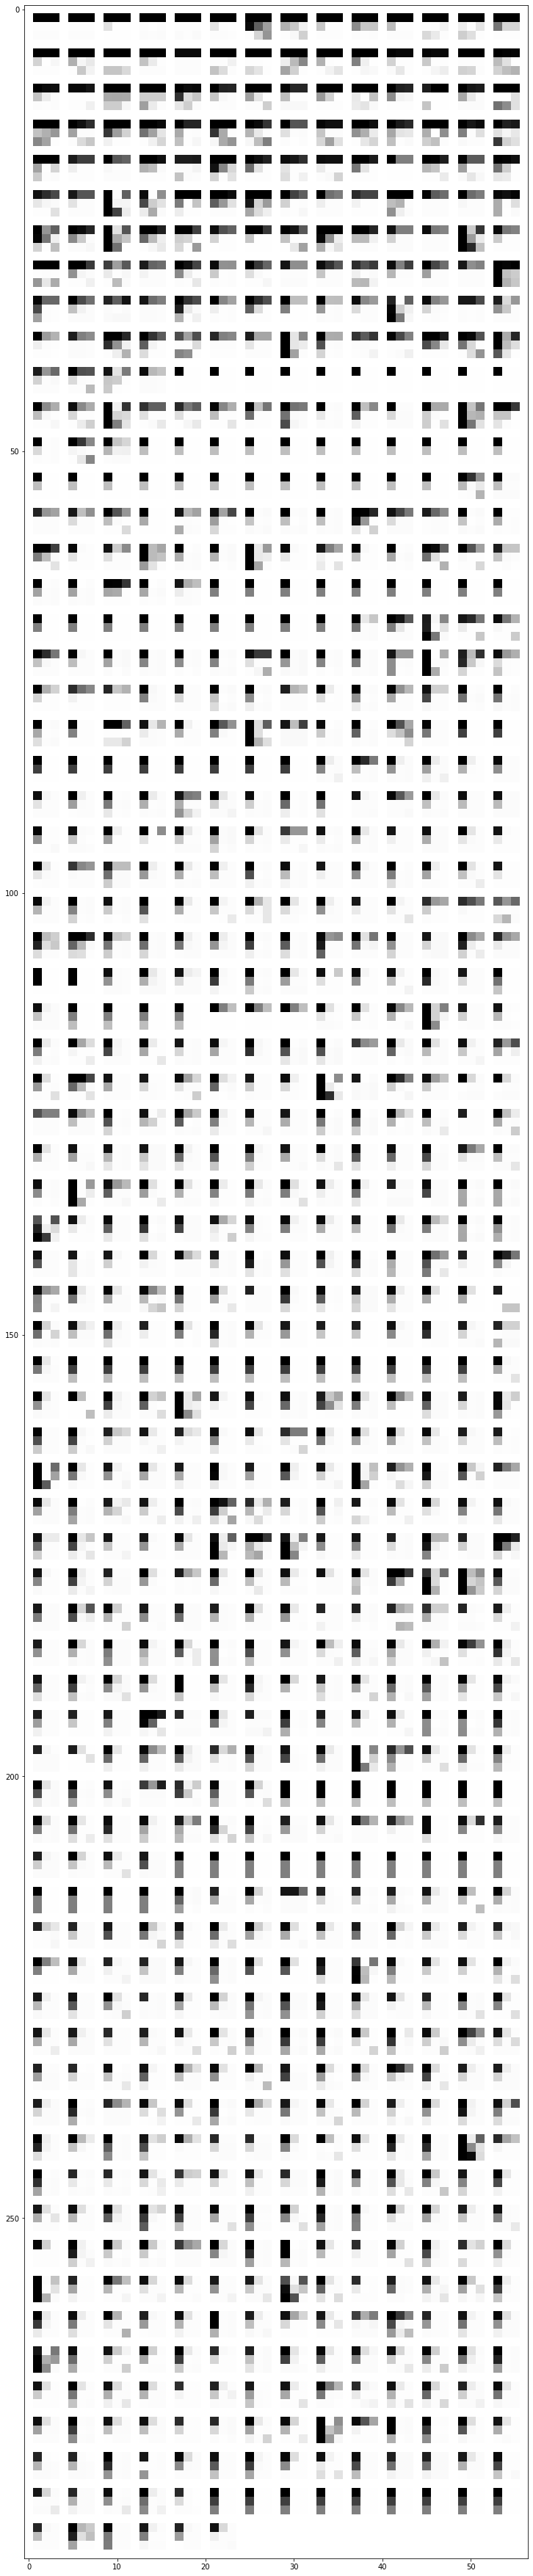

grid regions of 1000 regions more=True or worst=False active for filter number: 1 :


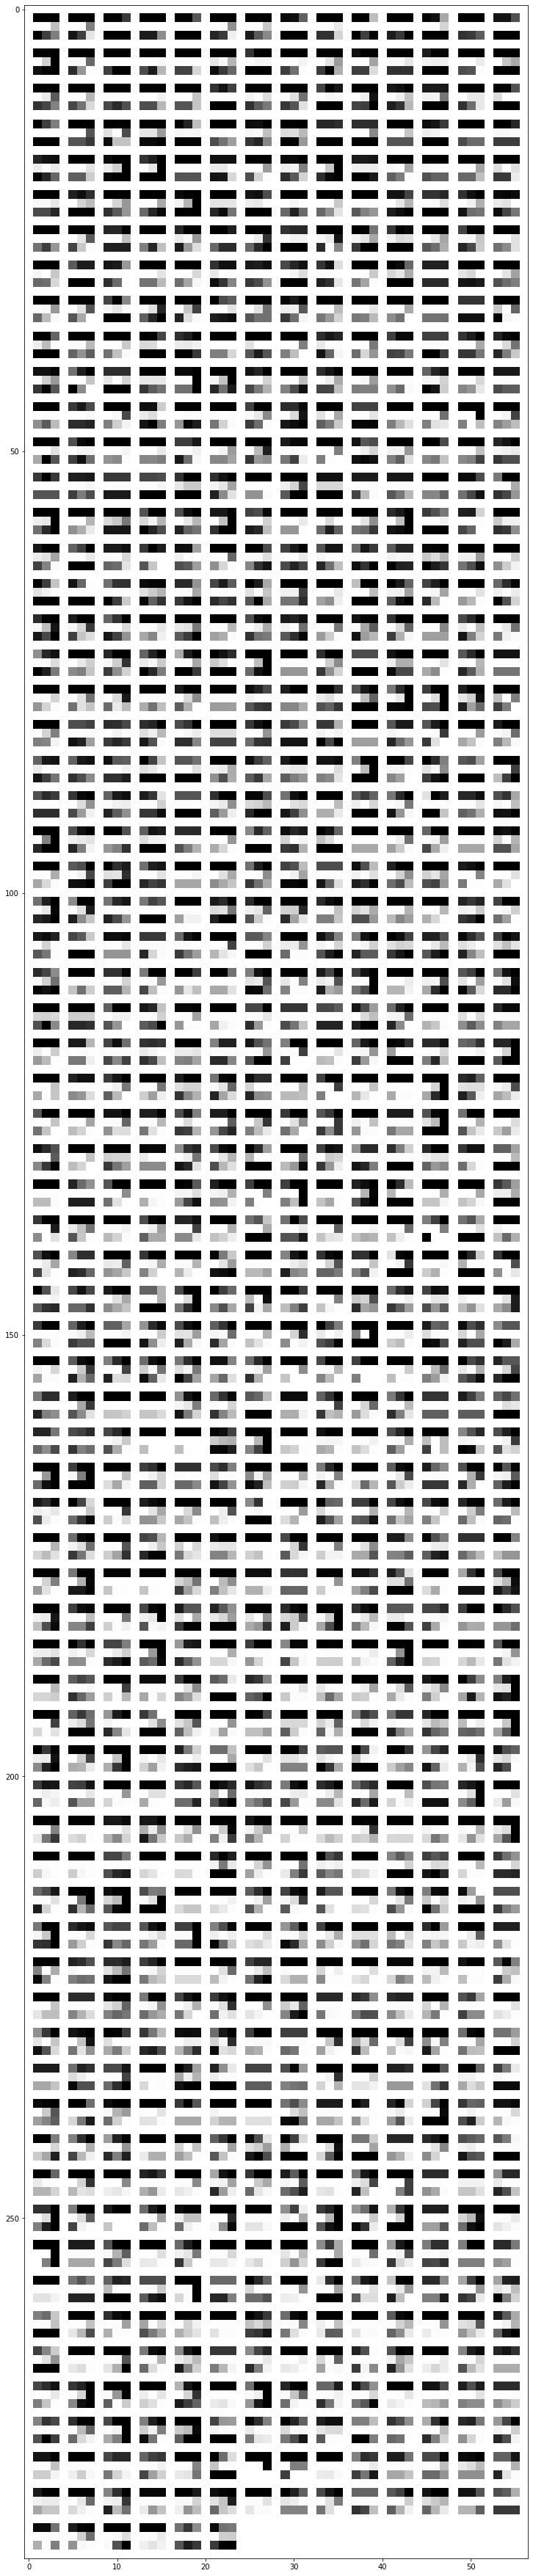

normalized regions:


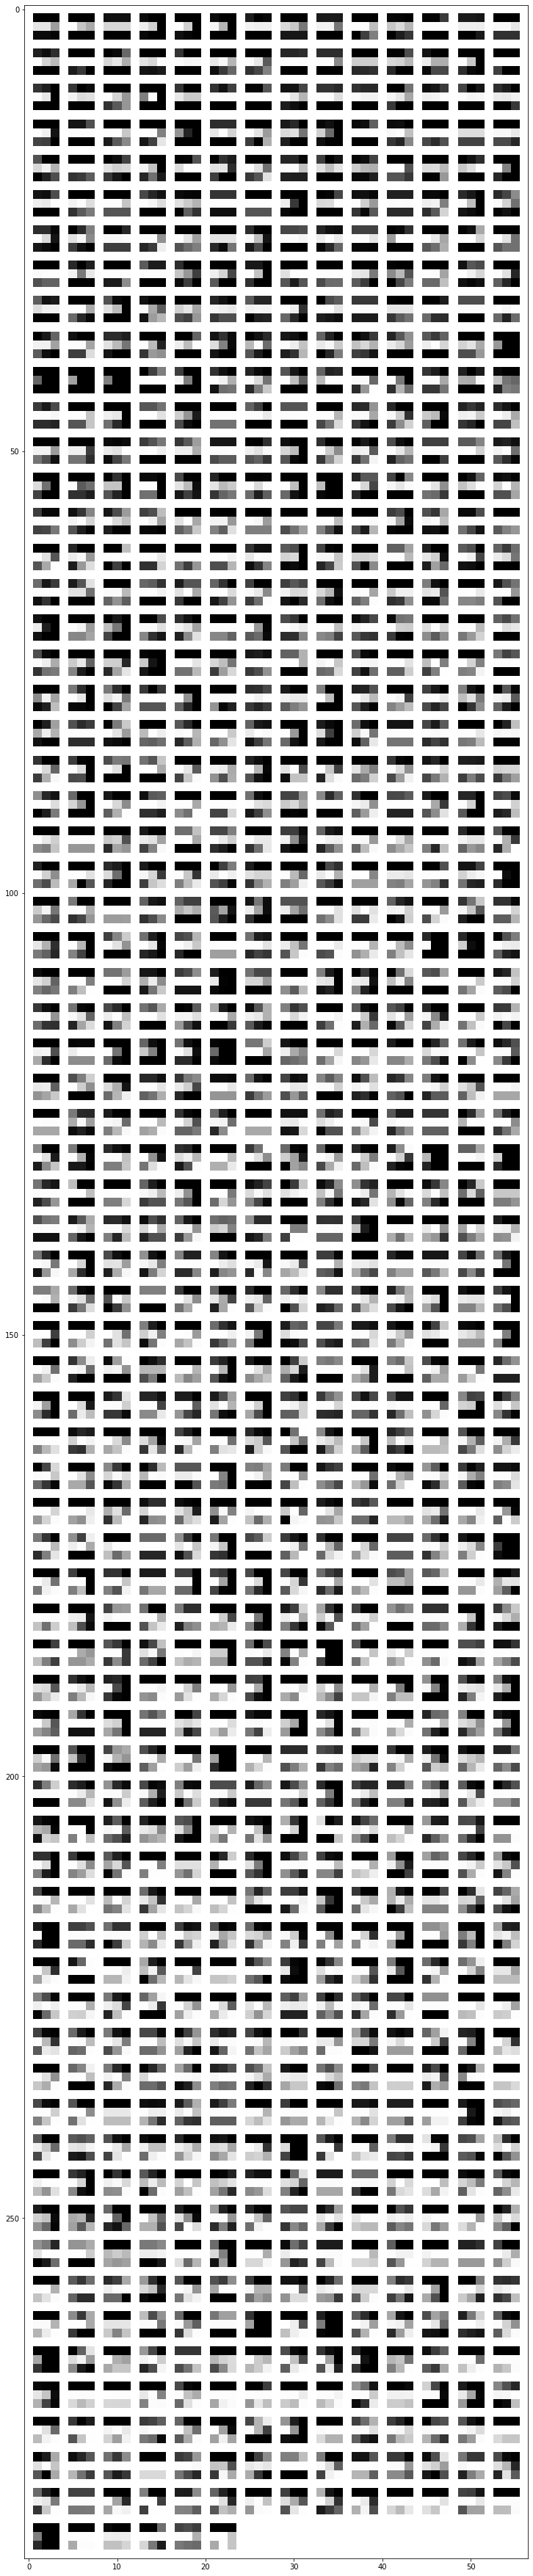

grid regions of 1000 regions more=True or worst=False active for filter number: 2 :


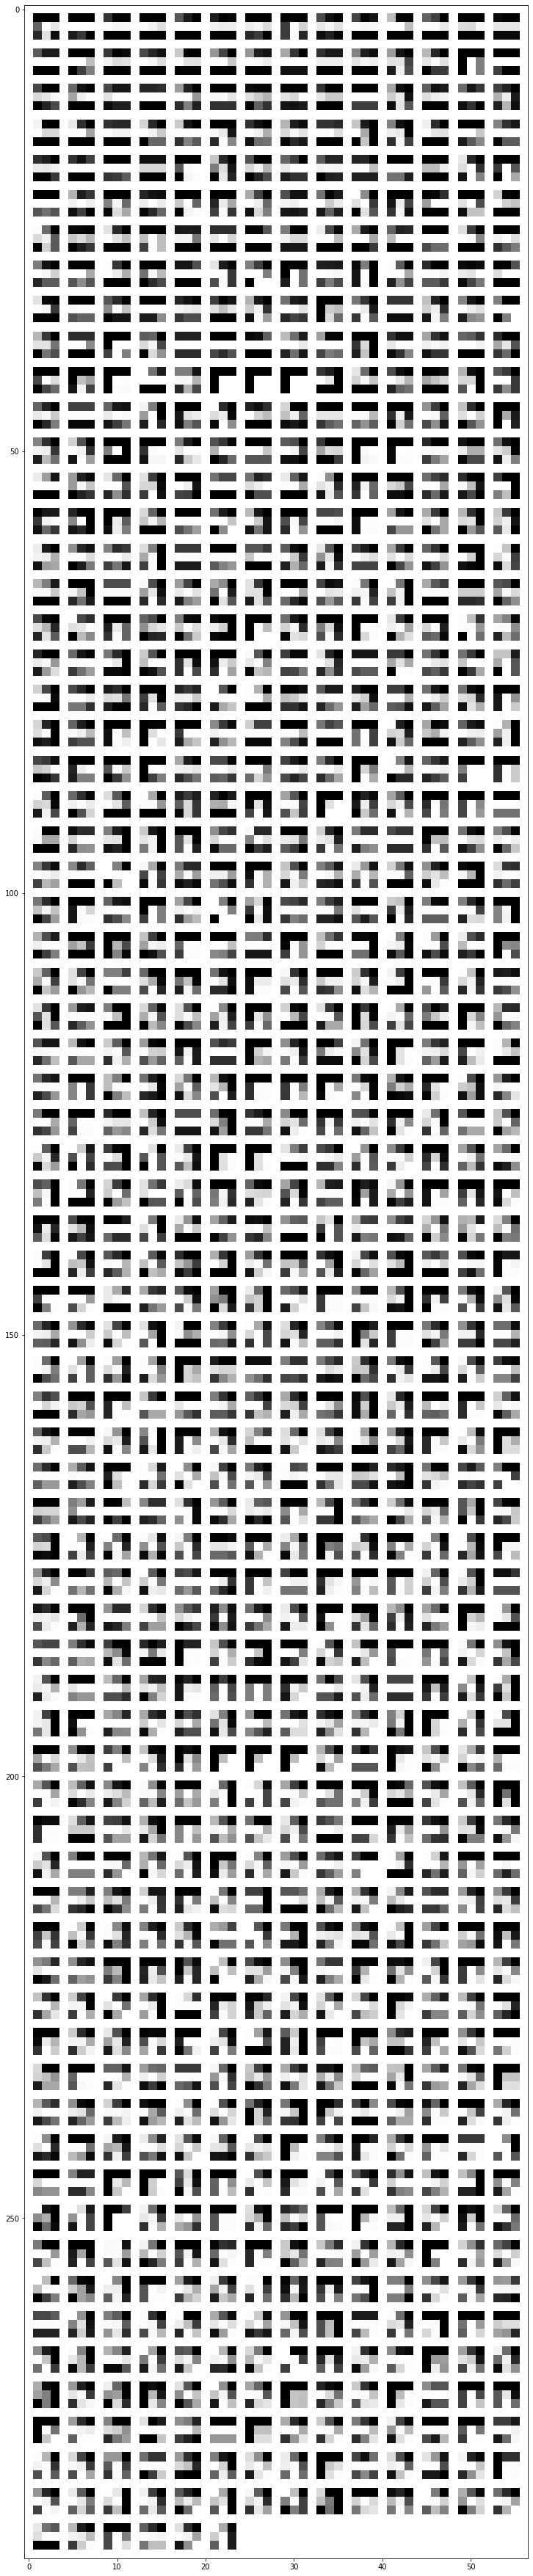

normalized regions:


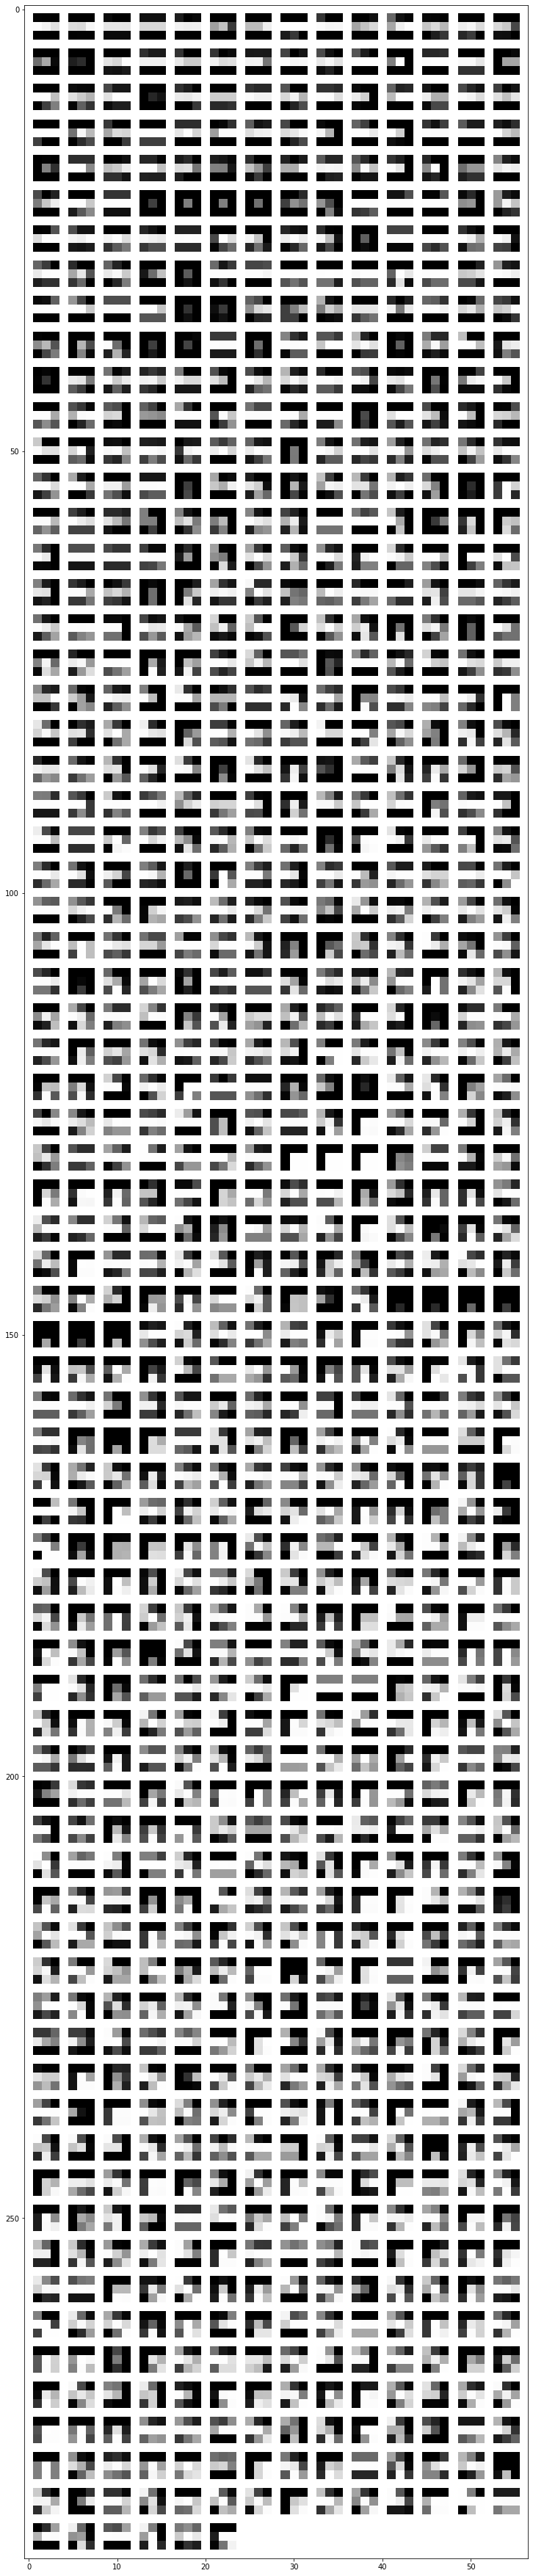

grid regions of 1000 regions more=True or worst=False active for filter number: 3 :


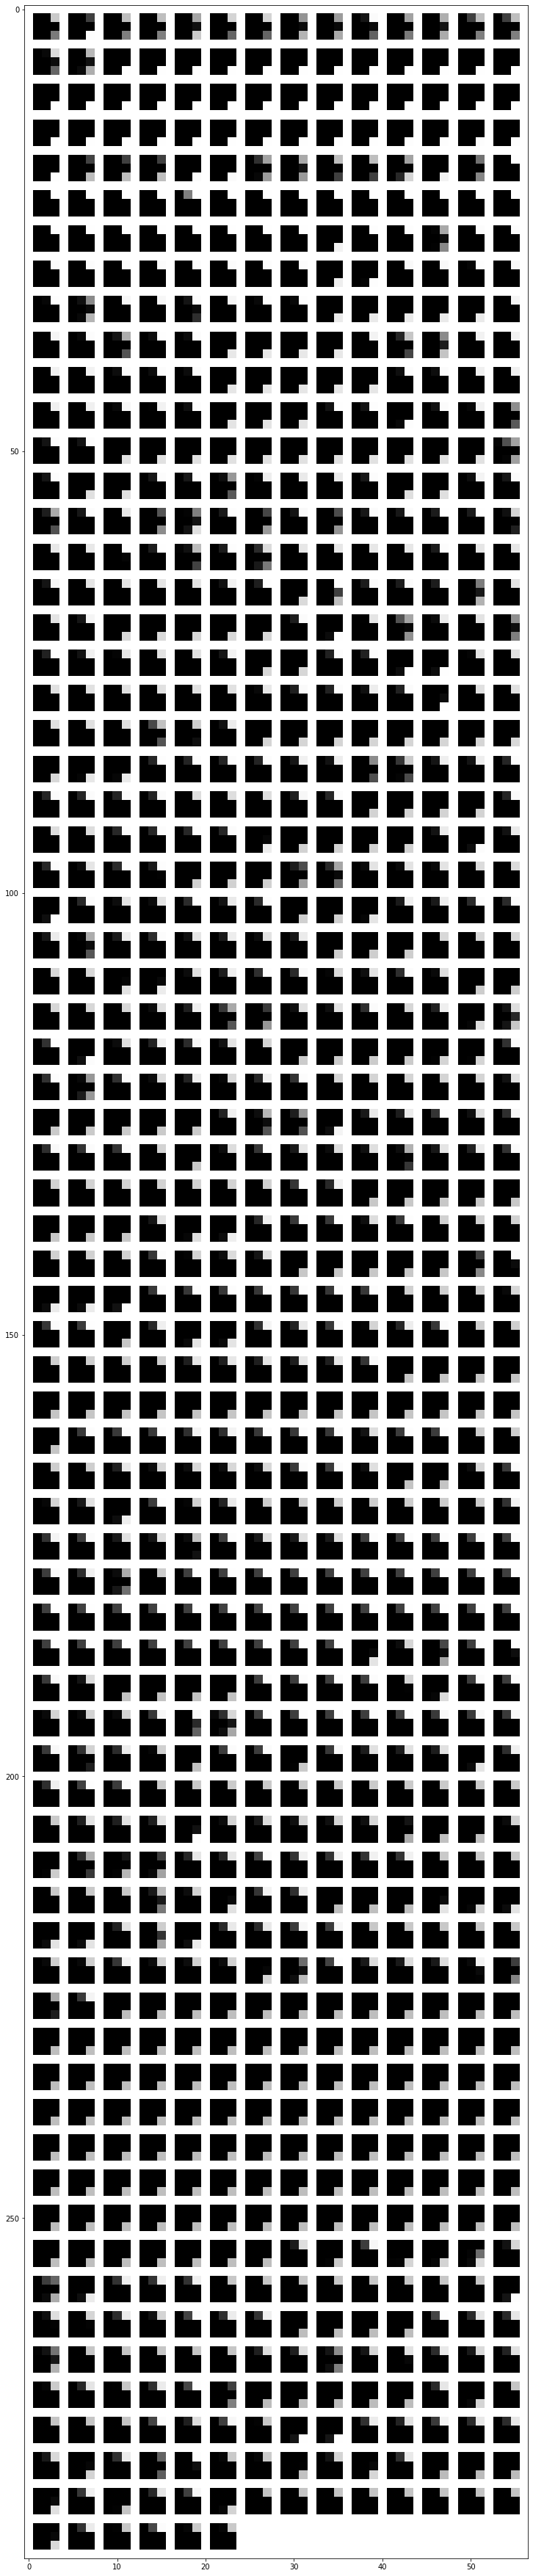

normalized regions:


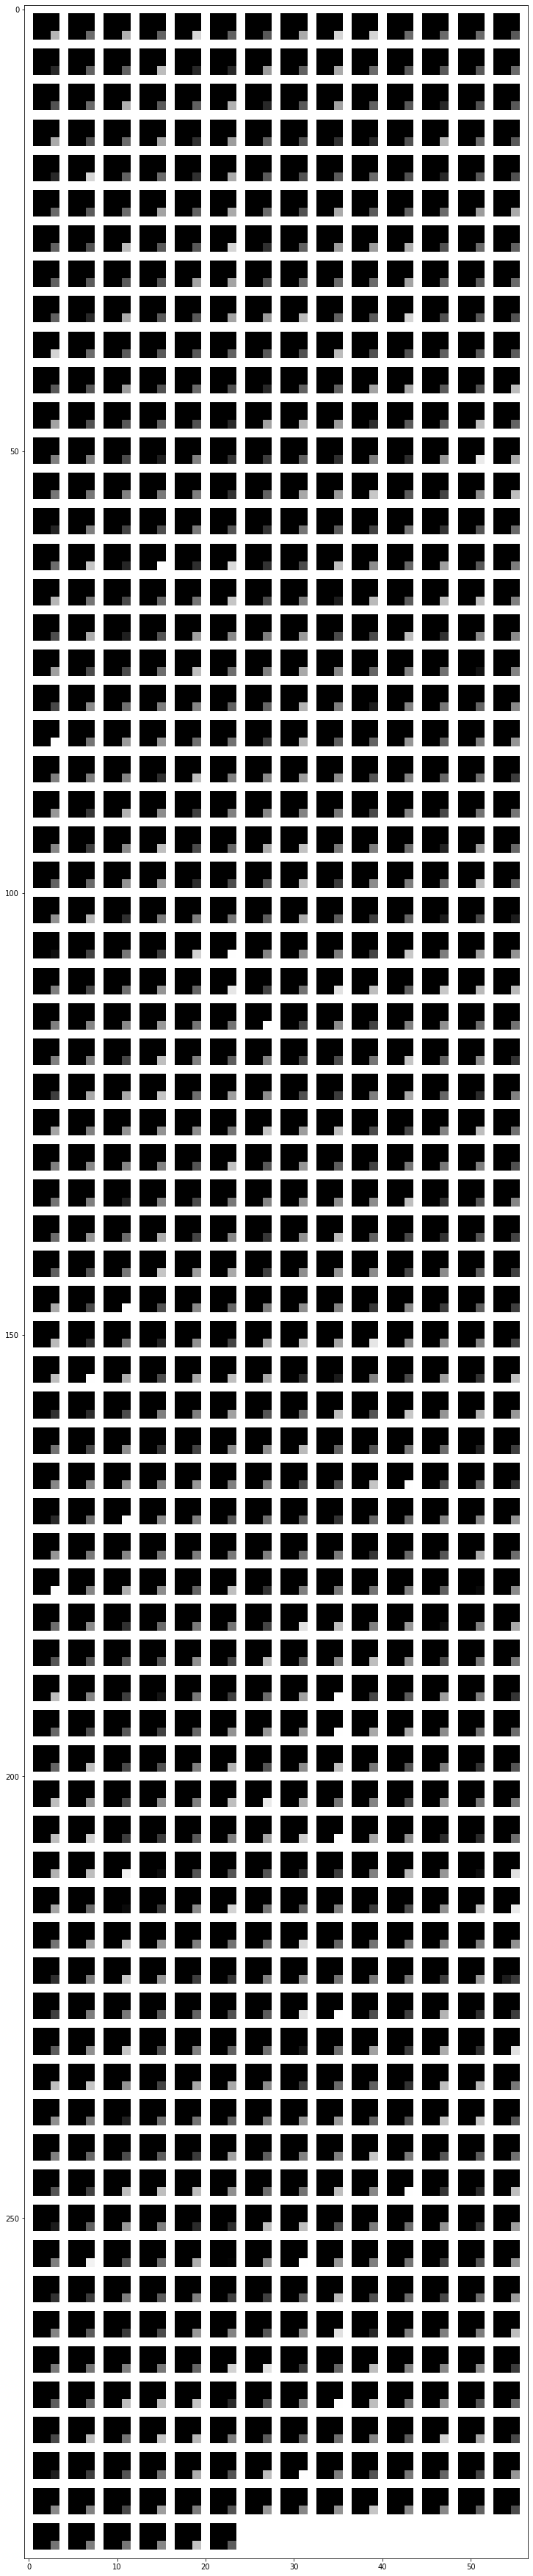

grid regions of 1000 regions more=True or worst=False active for filter number: 4 :


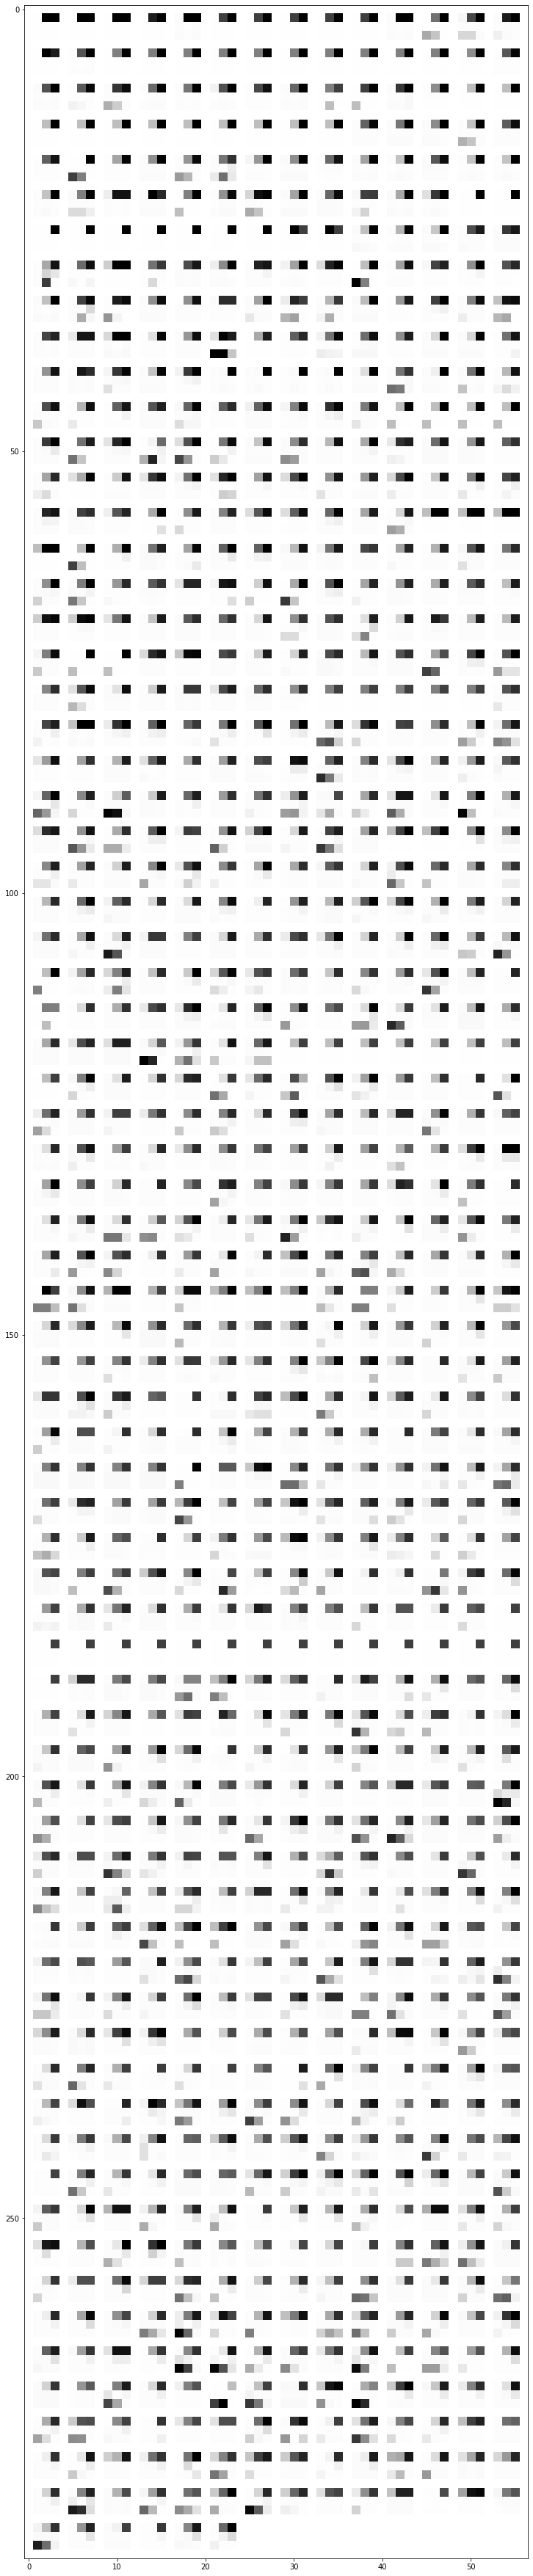

normalized regions:


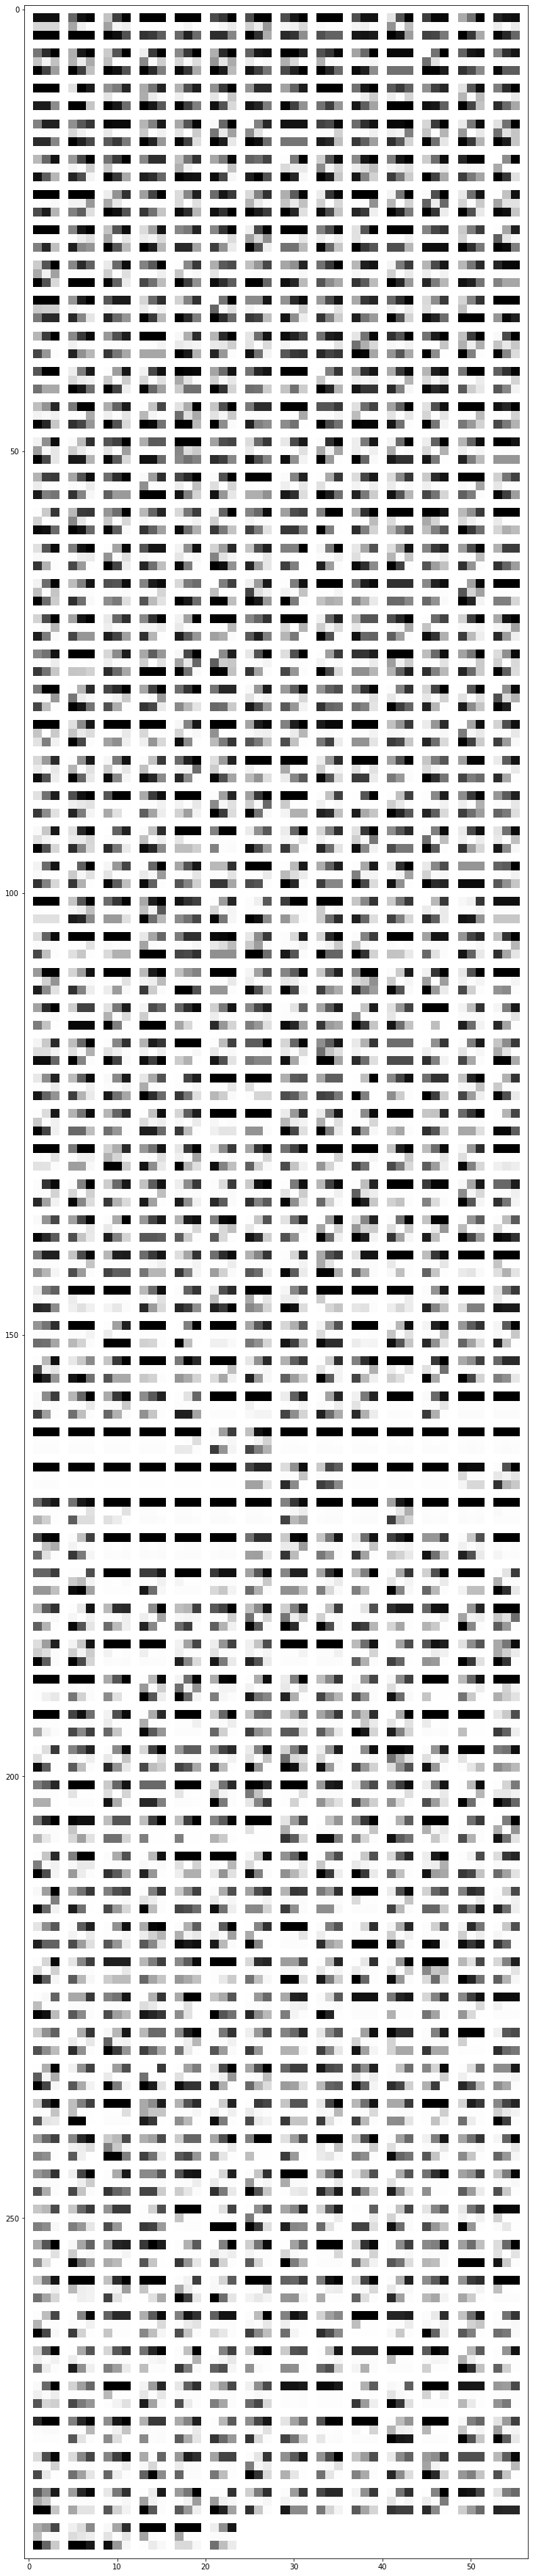

grid regions of 1000 regions more=True or worst=False active for filter number: 5 :


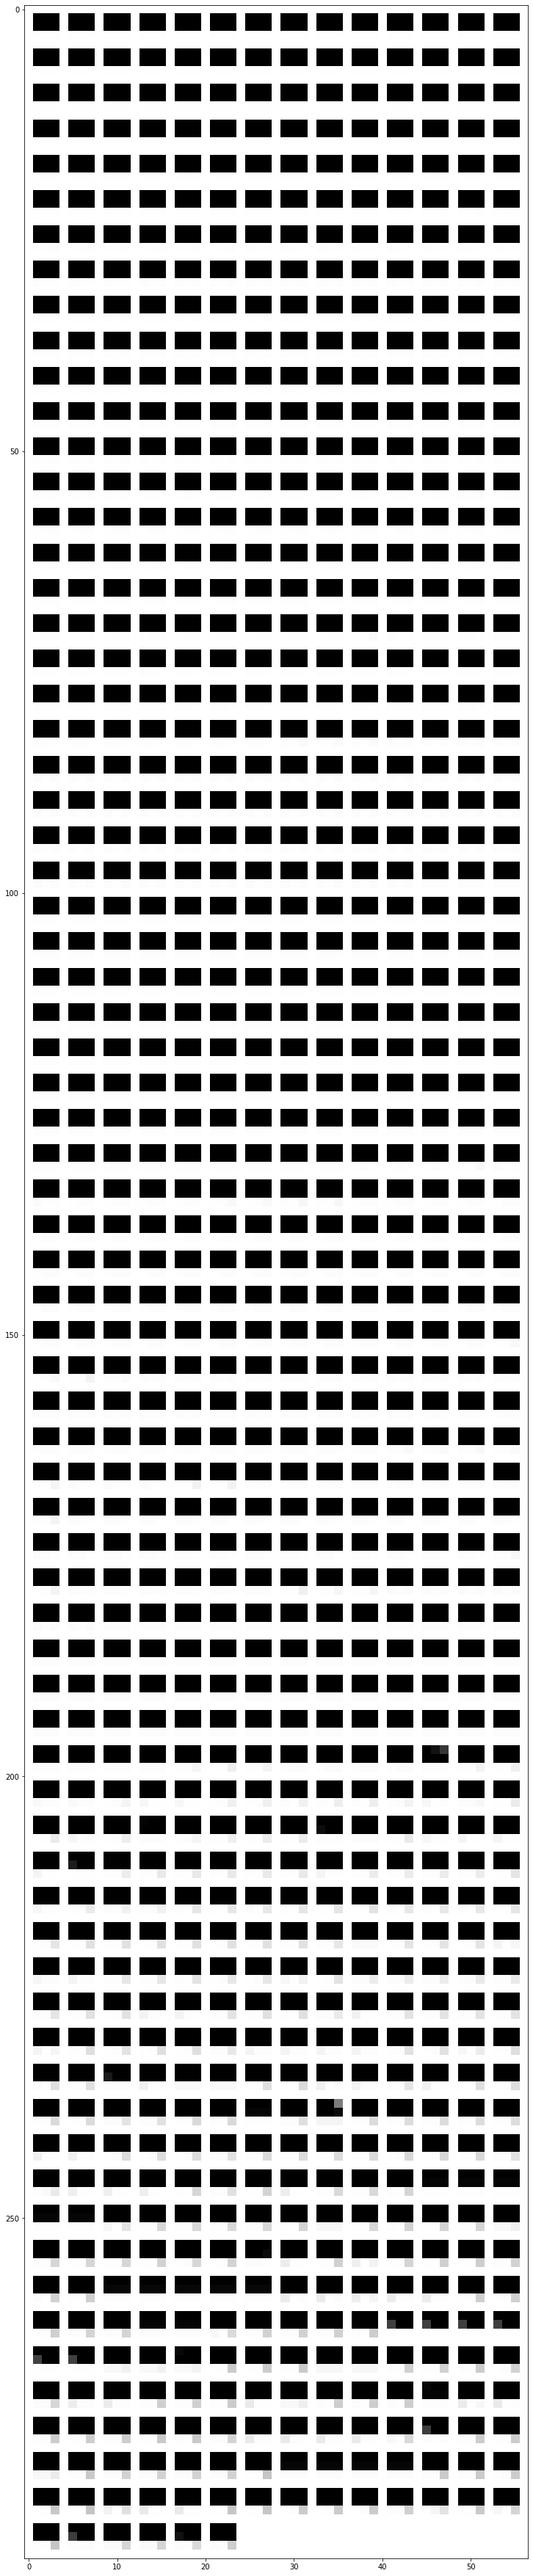

normalized regions:


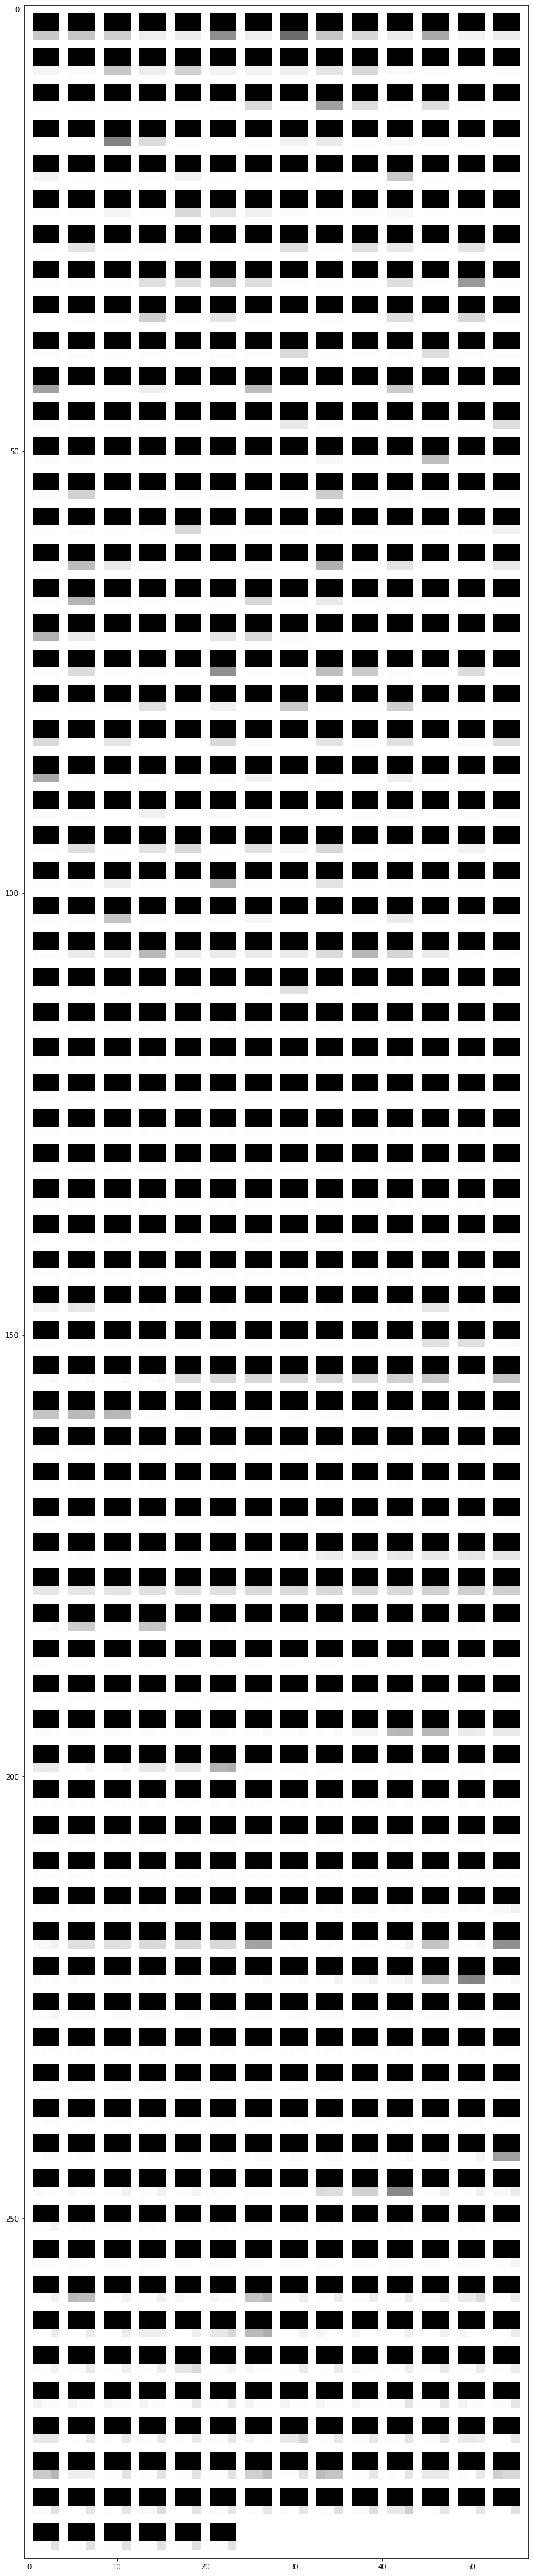

grid regions of 1000 regions more=True or worst=False active for filter number: 6 :


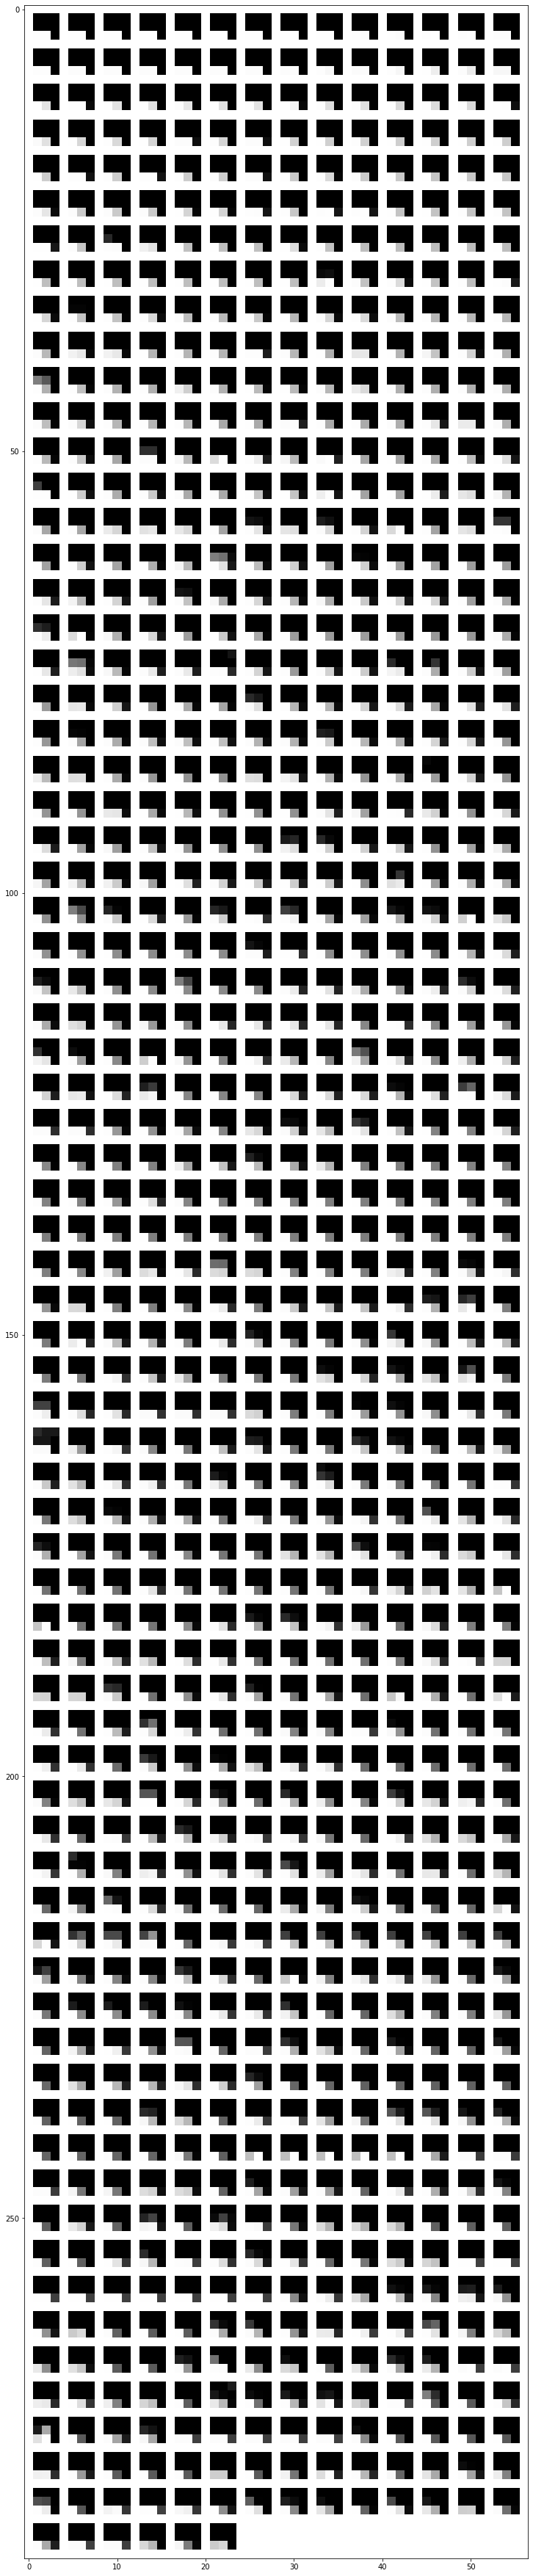

normalized regions:


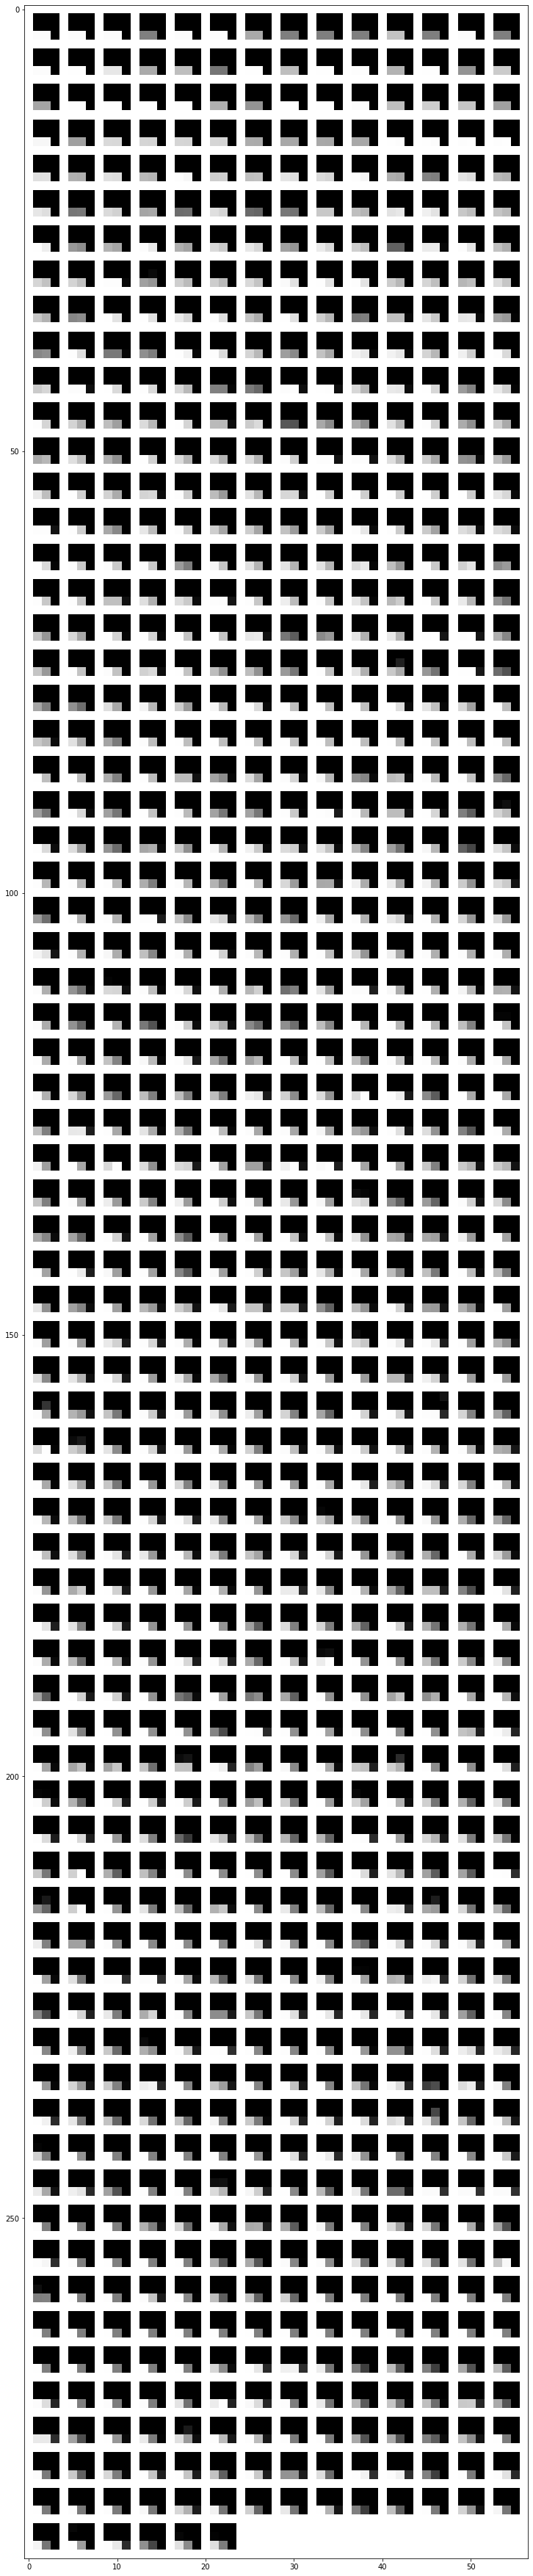

grid regions of 1000 regions more=True or worst=False active for filter number: 7 :


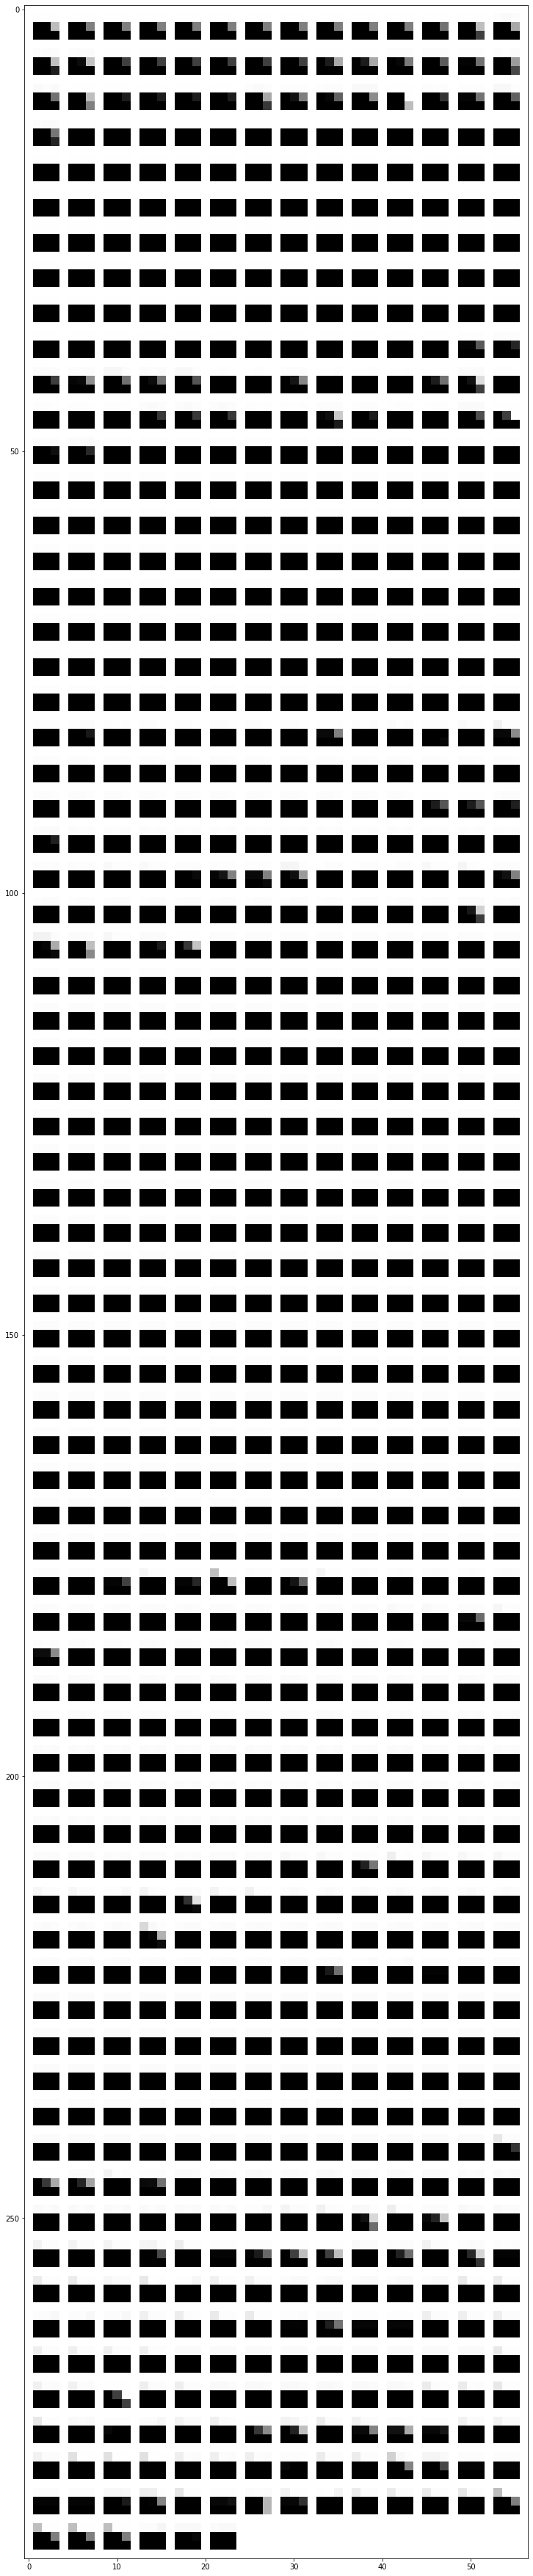

normalized regions:


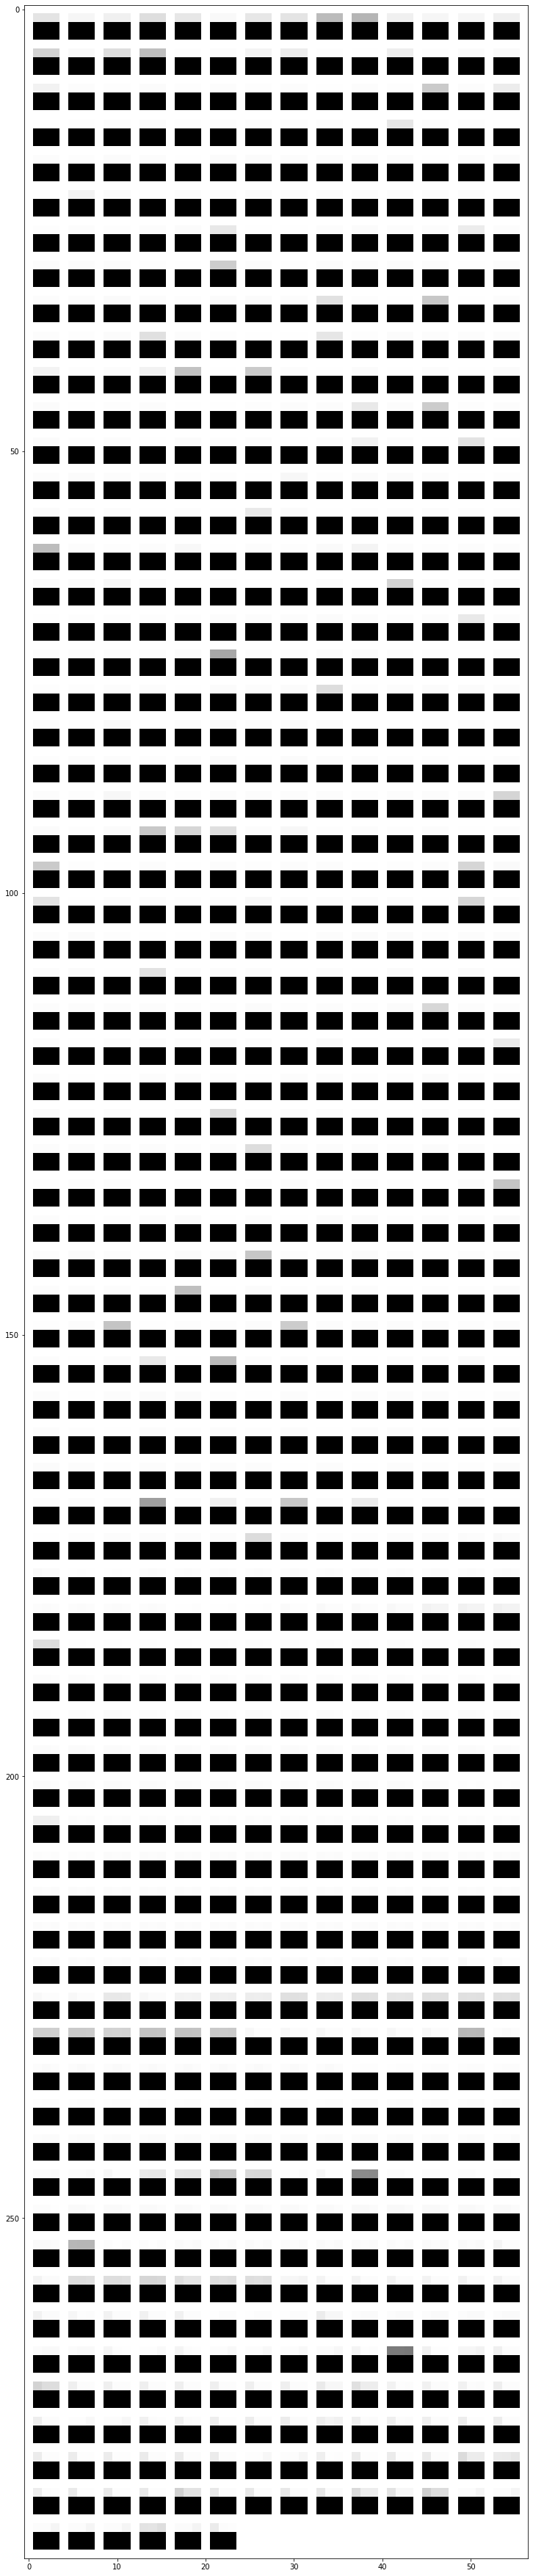

grid regions of 1000 regions more=True or worst=False active for filter number: 8 :


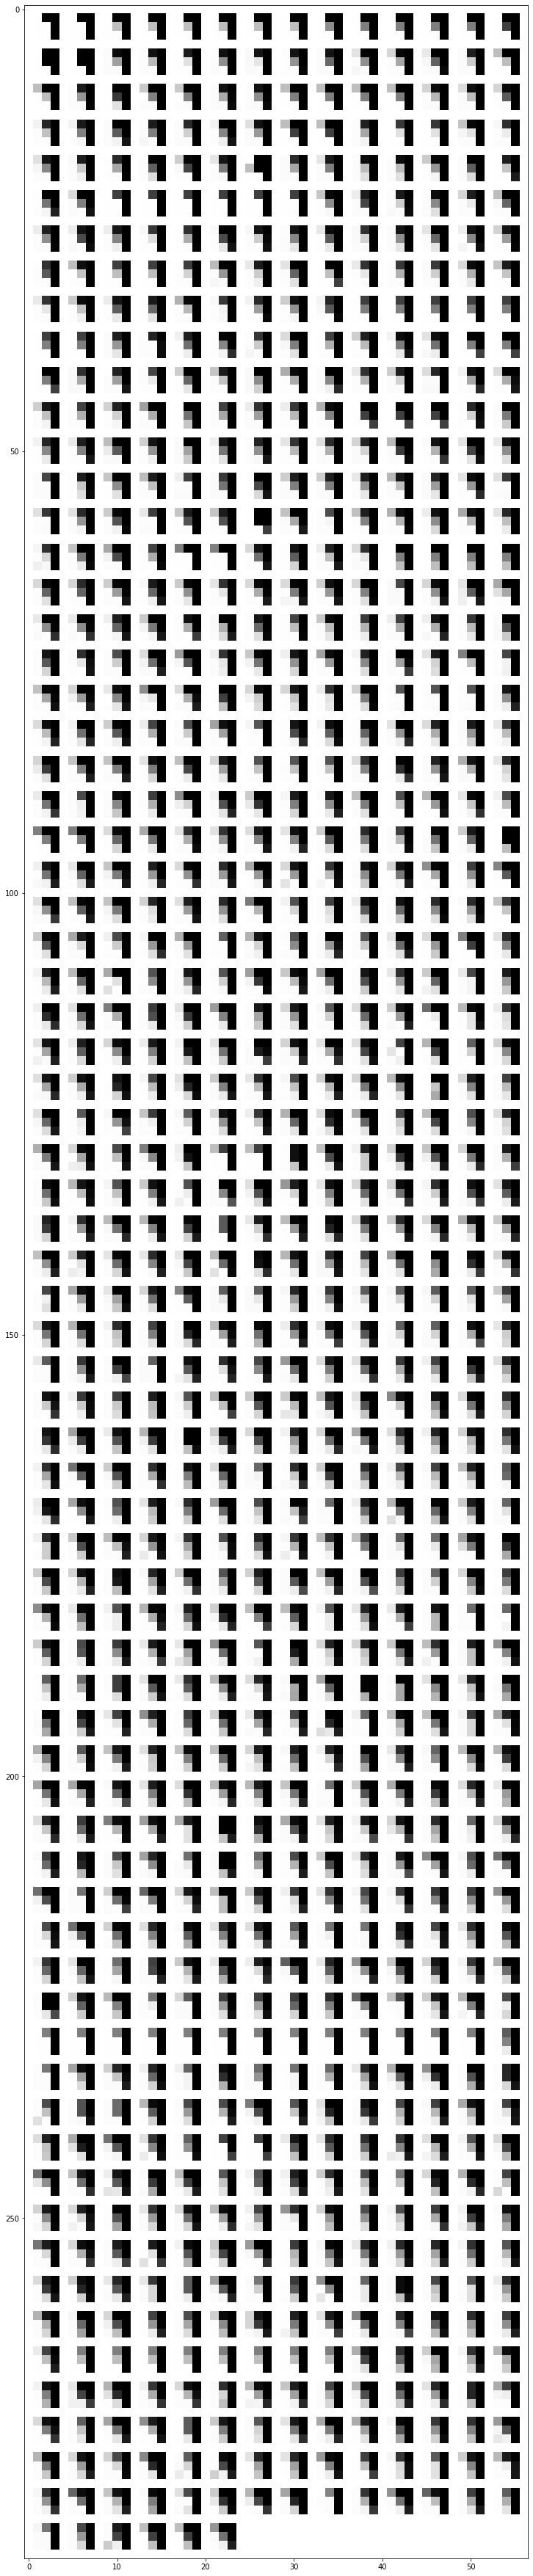

normalized regions:


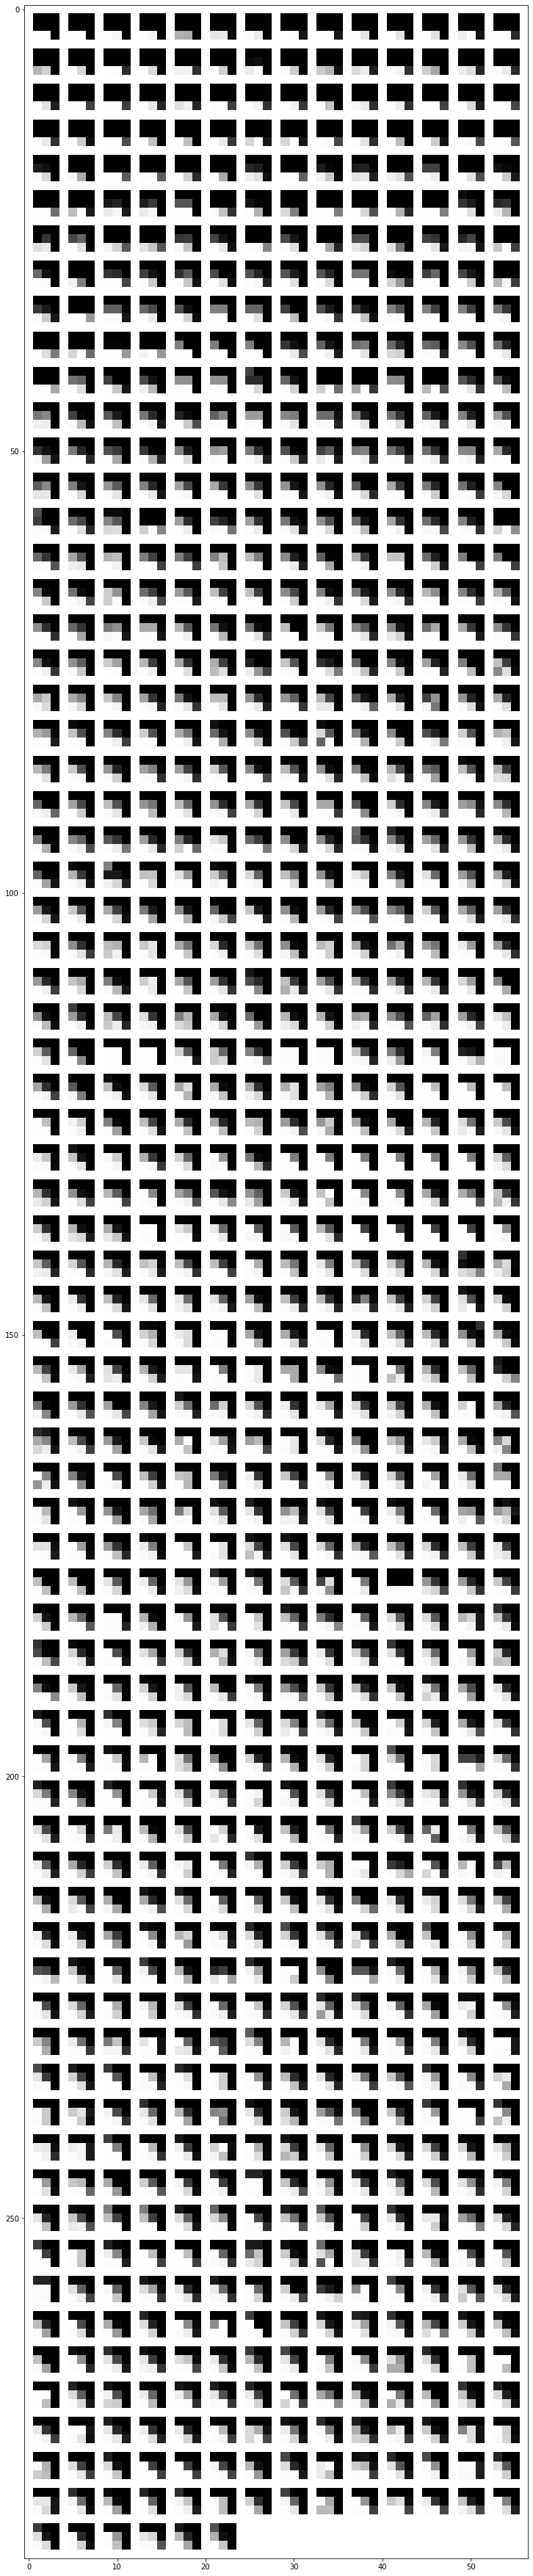

grid regions of 1000 regions more=True or worst=False active for filter number: 9 :


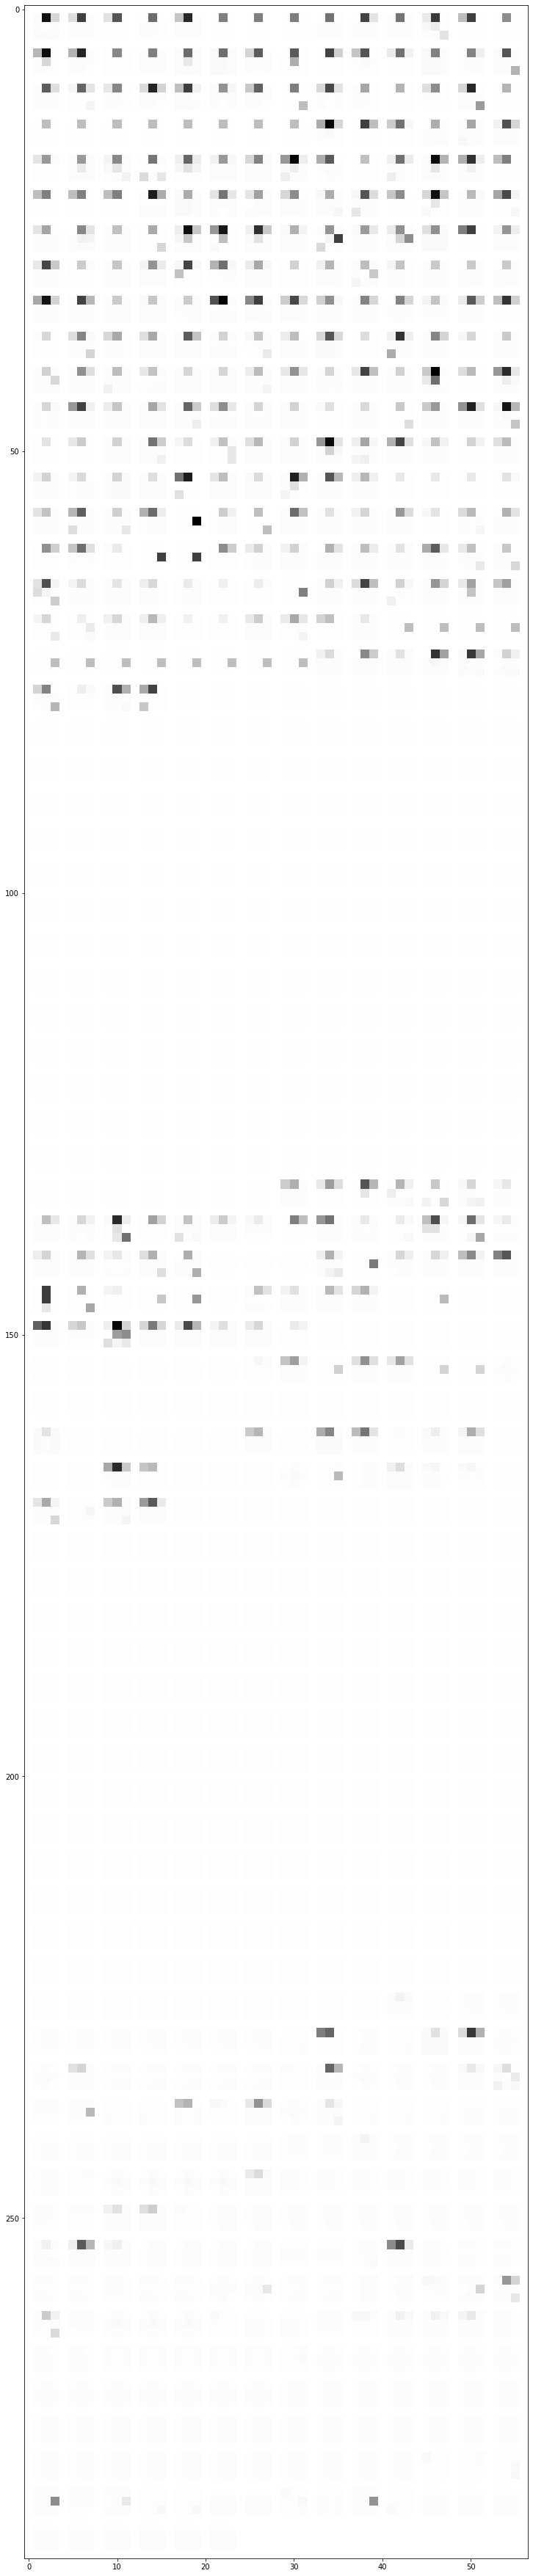

normalized regions:


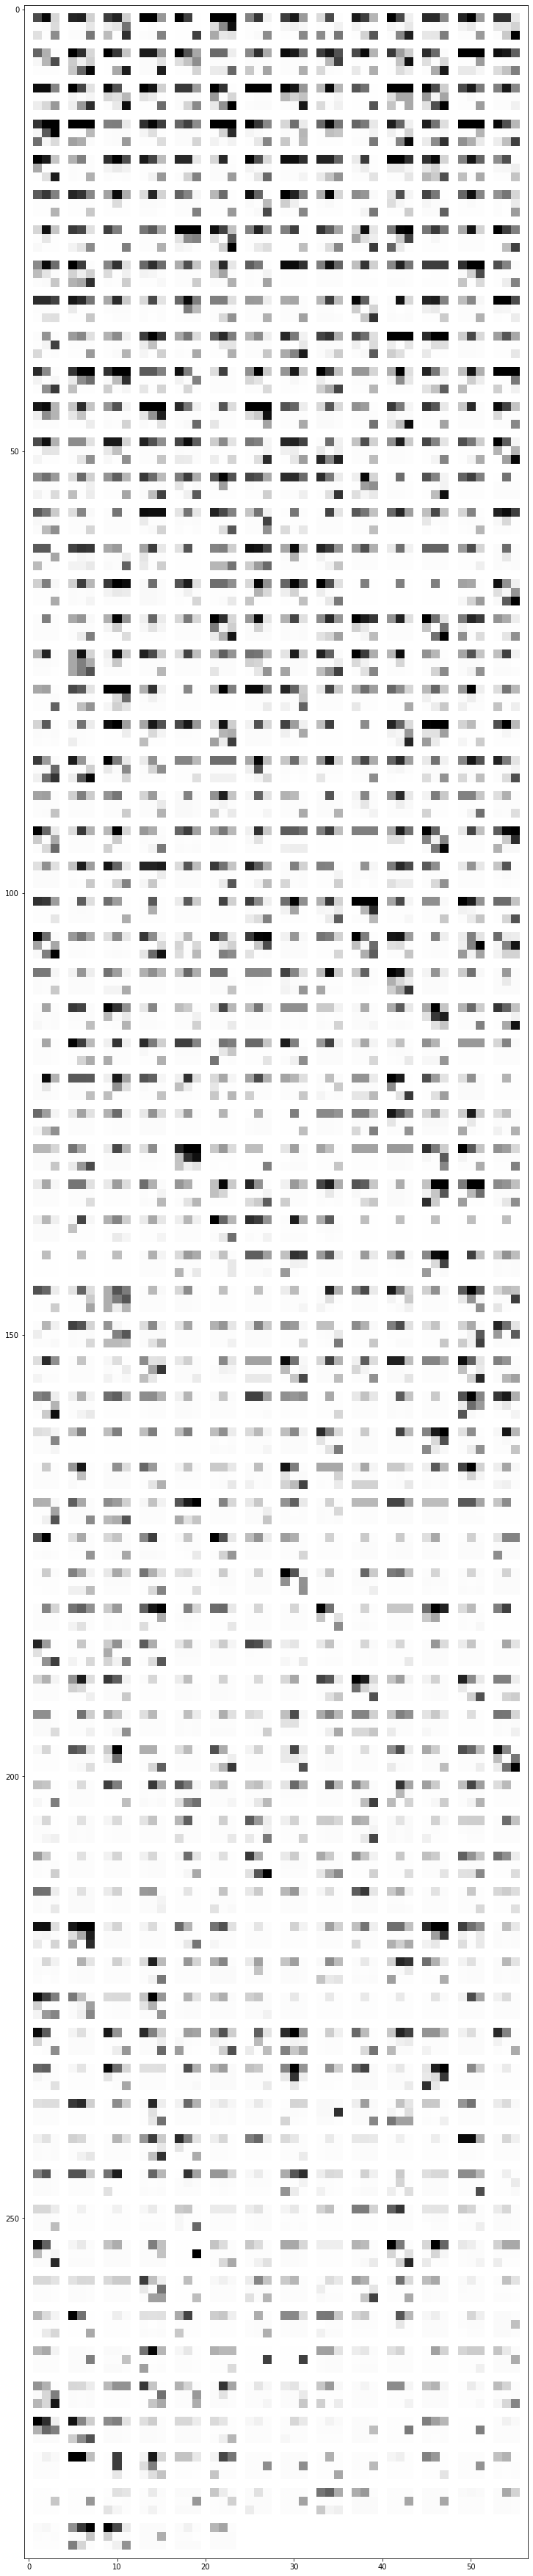

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10
nrow=14

# regions and activation of interest
regions = region_layer1_no_binary_without_bias
activations = activation_layer1_no_binary_without_bias
activations_normalized = activation_layer1_no_binary_normalized_without_bias

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1, nrow=nrow)

##### No binary model without bias layer2:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Consider 1% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


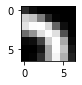

normalized region:


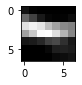

mean regions of 100 regions more=True or worst=False active for filter number: 1 :


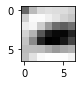

normalized region:


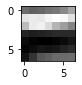

mean regions of 100 regions more=True or worst=False active for filter number: 2 :


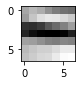

normalized region:


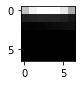

mean regions of 100 regions more=True or worst=False active for filter number: 3 :


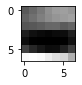

normalized region:


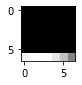

mean regions of 100 regions more=True or worst=False active for filter number: 4 :


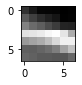

normalized region:


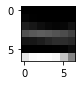

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


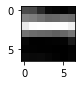

normalized region:


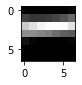

mean regions of 100 regions more=True or worst=False active for filter number: 6 :


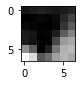

normalized region:


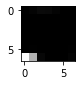

mean regions of 100 regions more=True or worst=False active for filter number: 7 :


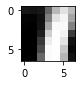

normalized region:


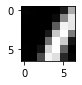

mean regions of 100 regions more=True or worst=False active for filter number: 8 :


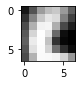

normalized region:


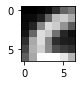

mean regions of 100 regions more=True or worst=False active for filter number: 9 :


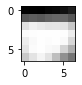

normalized region:


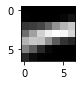

mean regions of 100 regions more=True or worst=False active for filter number: 10 :


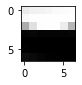

normalized region:


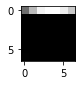

mean regions of 100 regions more=True or worst=False active for filter number: 11 :


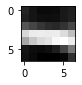

normalized region:


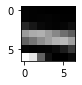

mean regions of 100 regions more=True or worst=False active for filter number: 12 :


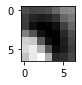

normalized region:


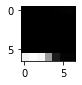

mean regions of 100 regions more=True or worst=False active for filter number: 13 :


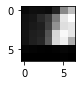

normalized region:


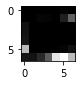

mean regions of 100 regions more=True or worst=False active for filter number: 14 :


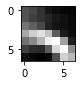

normalized region:


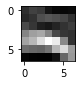

mean regions of 100 regions more=True or worst=False active for filter number: 15 :


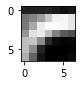

normalized region:


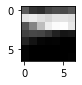

mean regions of 100 regions more=True or worst=False active for filter number: 16 :


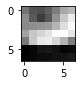

normalized region:


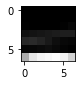

mean regions of 100 regions more=True or worst=False active for filter number: 17 :


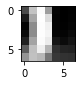

normalized region:


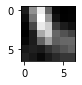

mean regions of 100 regions more=True or worst=False active for filter number: 18 :


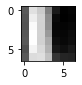

normalized region:


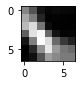

mean regions of 100 regions more=True or worst=False active for filter number: 19 :


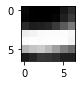

normalized region:


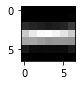

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


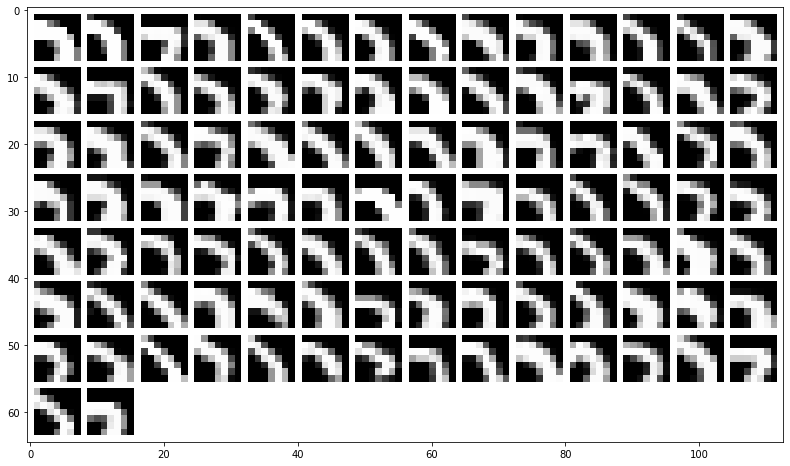

normalized regions:


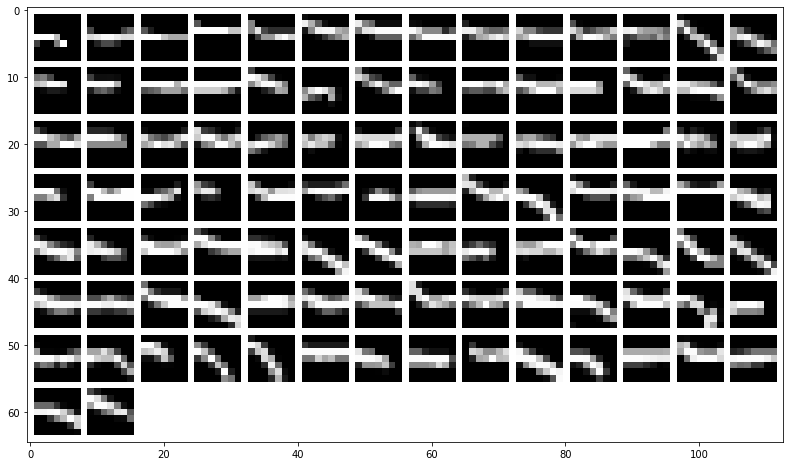

grid regions of 100 regions more=True or worst=False active for filter number: 1 :


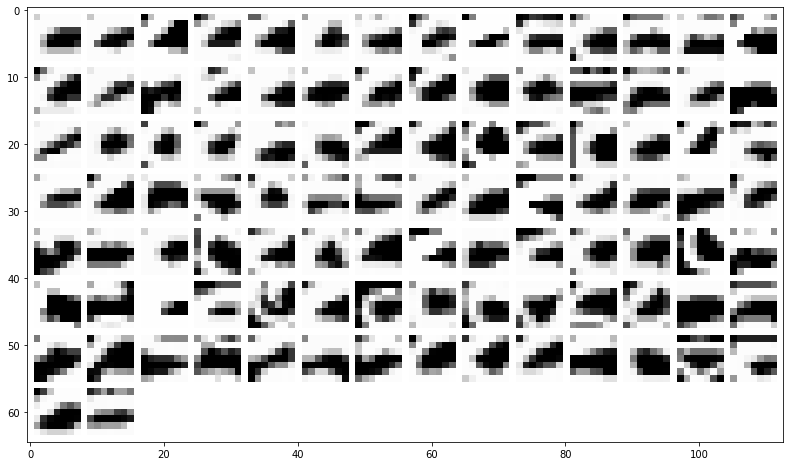

normalized regions:


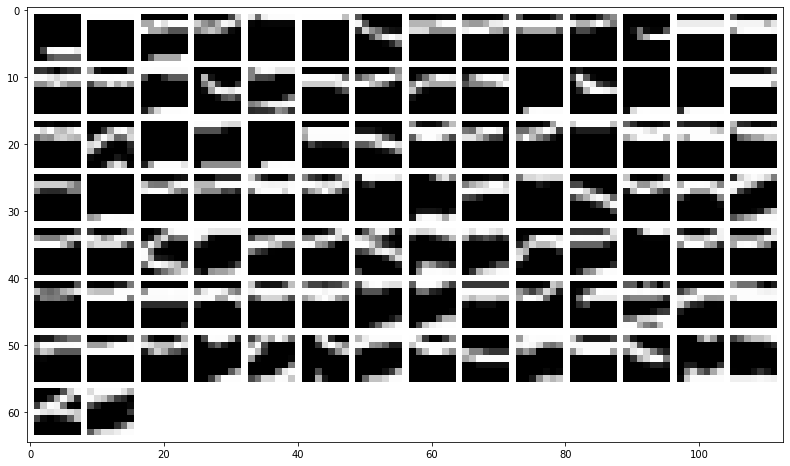

grid regions of 100 regions more=True or worst=False active for filter number: 2 :


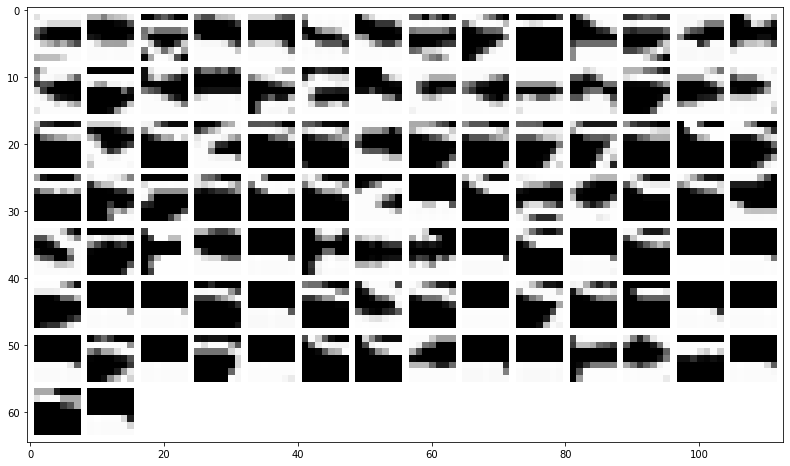

normalized regions:


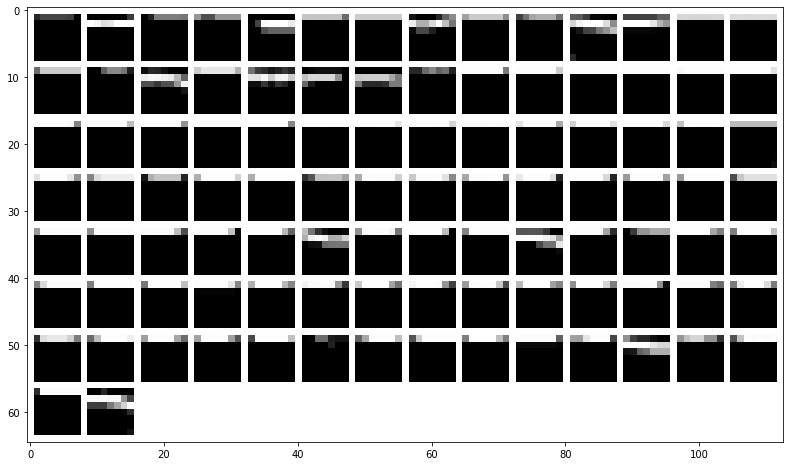

grid regions of 100 regions more=True or worst=False active for filter number: 3 :


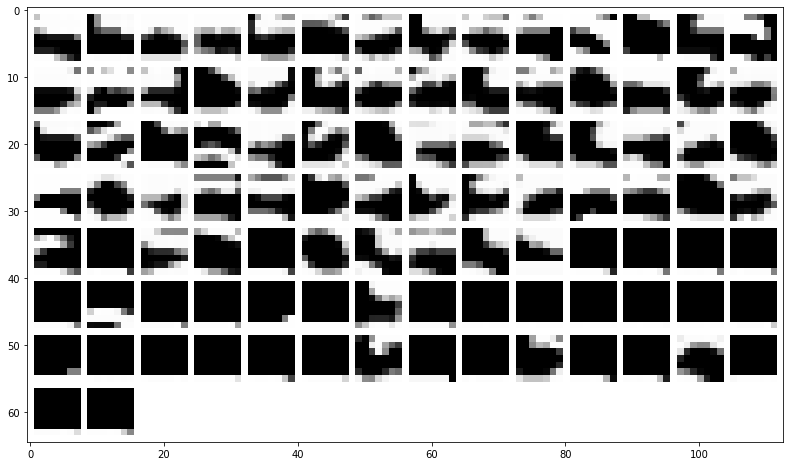

normalized regions:


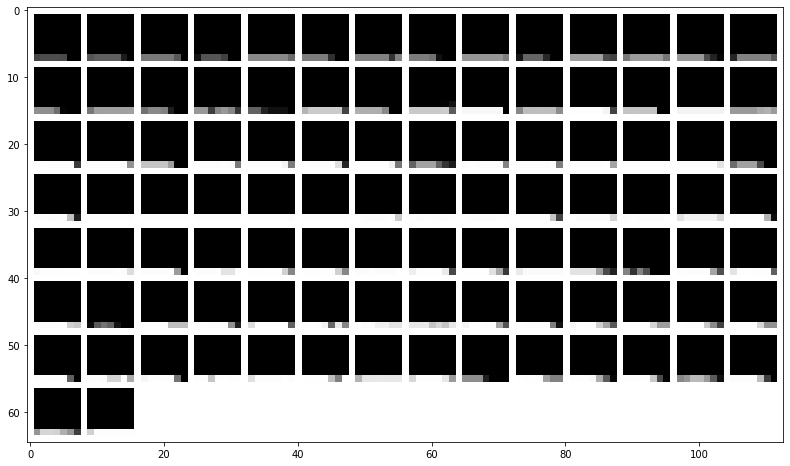

grid regions of 100 regions more=True or worst=False active for filter number: 4 :


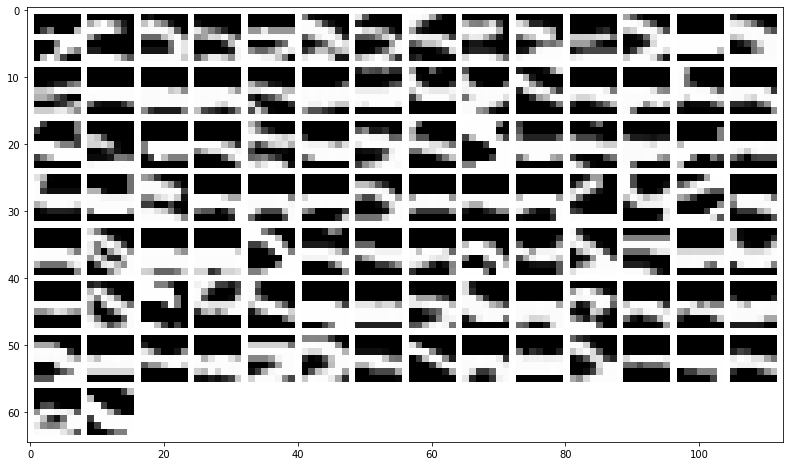

normalized regions:


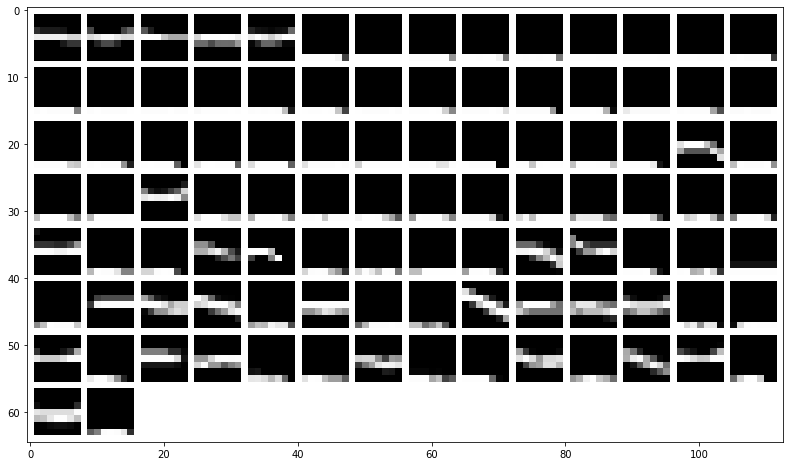

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


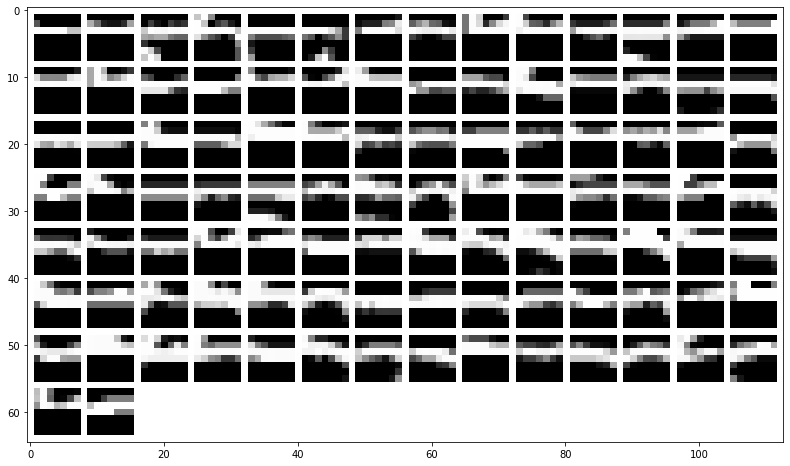

normalized regions:


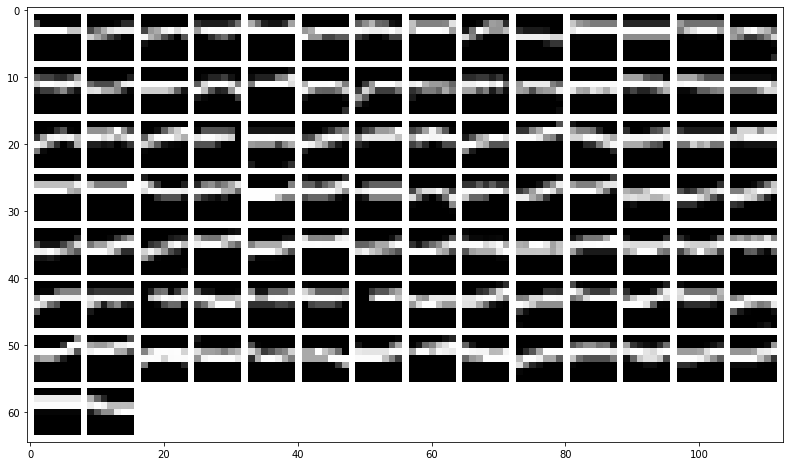

grid regions of 100 regions more=True or worst=False active for filter number: 6 :


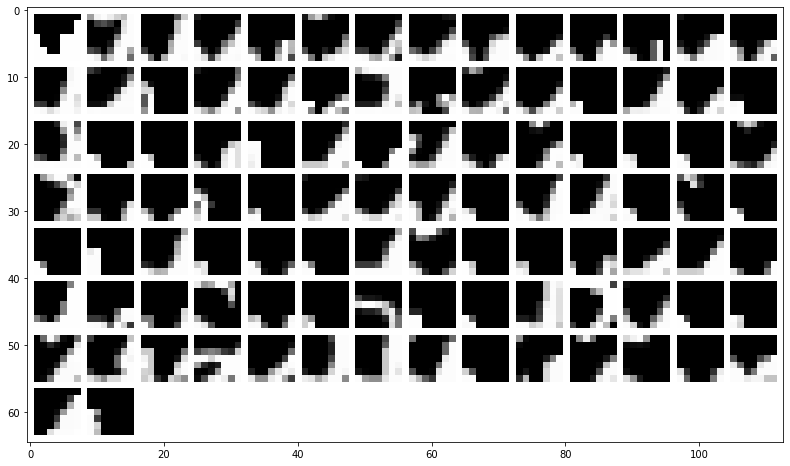

normalized regions:


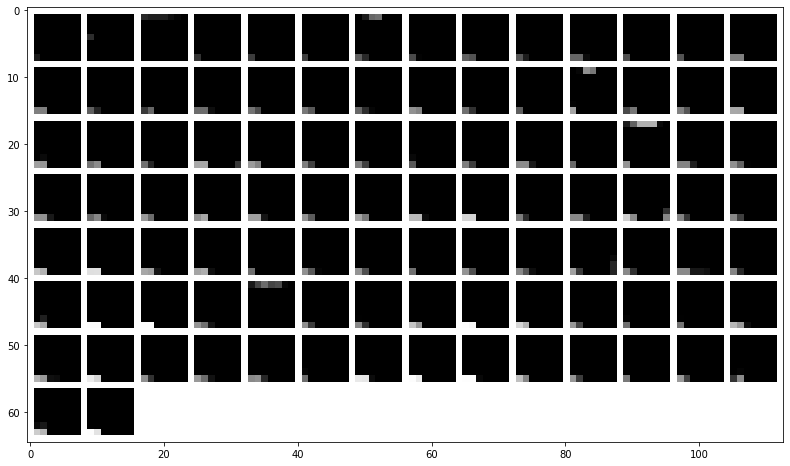

grid regions of 100 regions more=True or worst=False active for filter number: 7 :


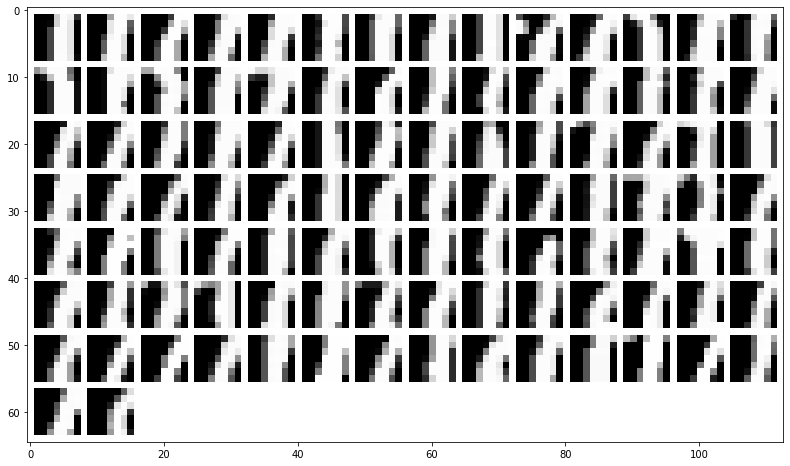

normalized regions:


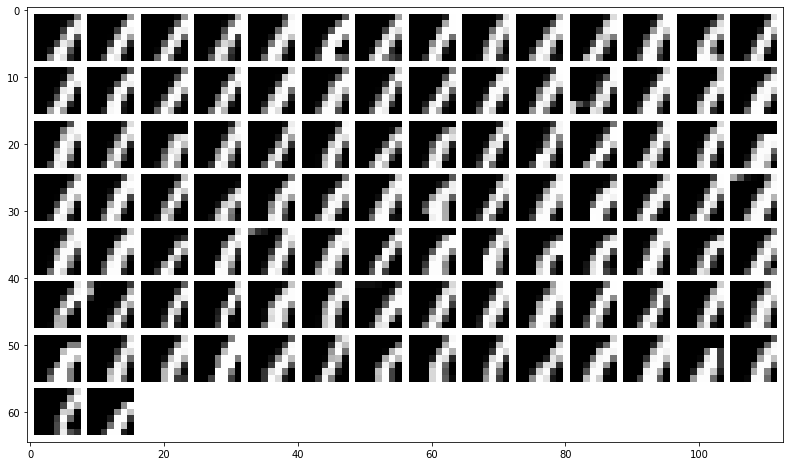

grid regions of 100 regions more=True or worst=False active for filter number: 8 :


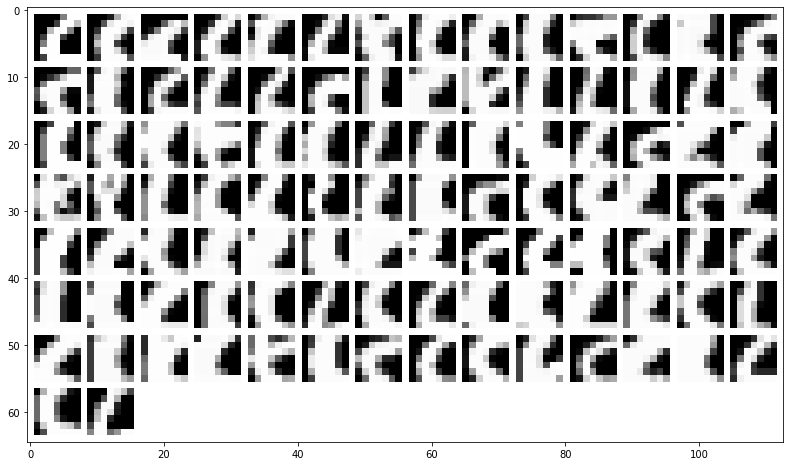

normalized regions:


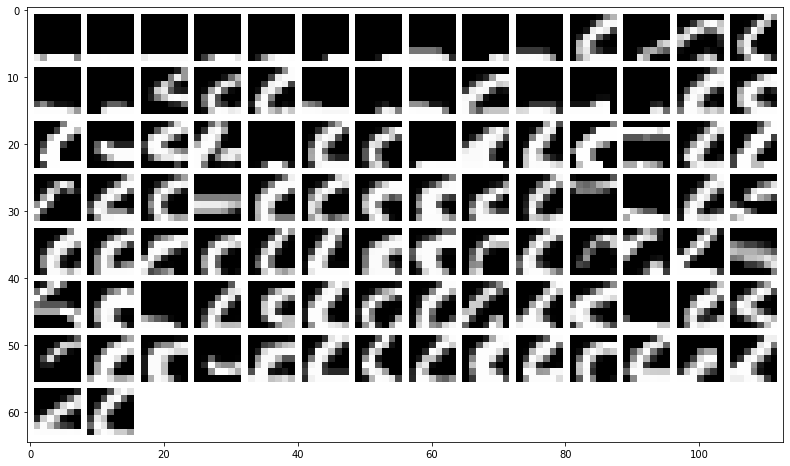

grid regions of 100 regions more=True or worst=False active for filter number: 9 :


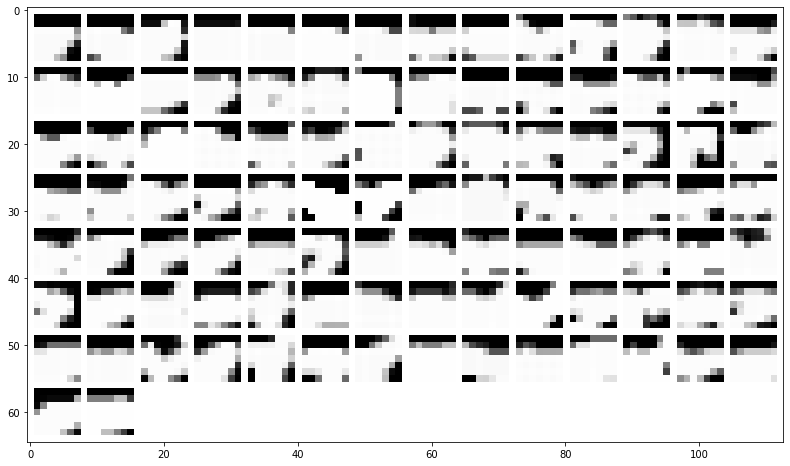

normalized regions:


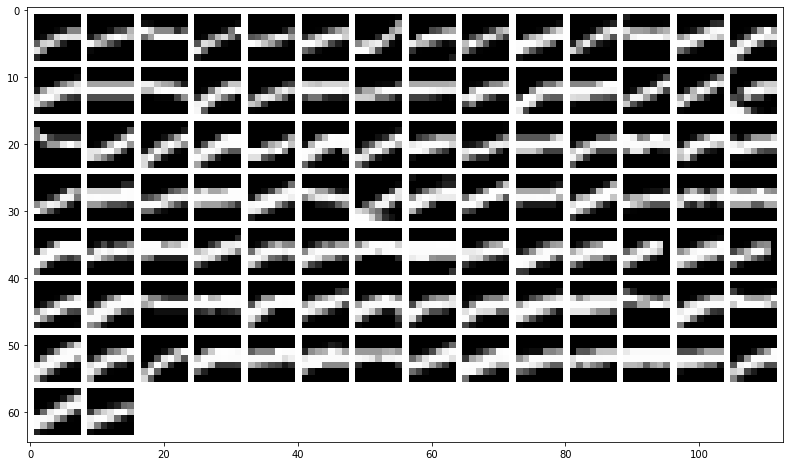

grid regions of 100 regions more=True or worst=False active for filter number: 10 :


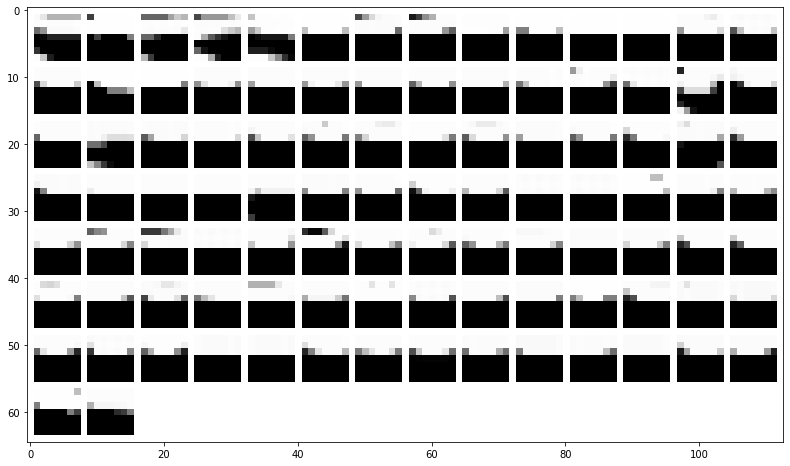

normalized regions:


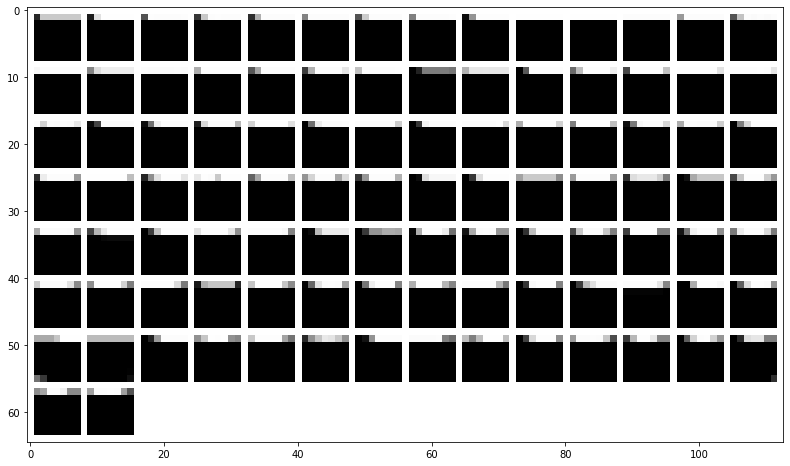

grid regions of 100 regions more=True or worst=False active for filter number: 11 :


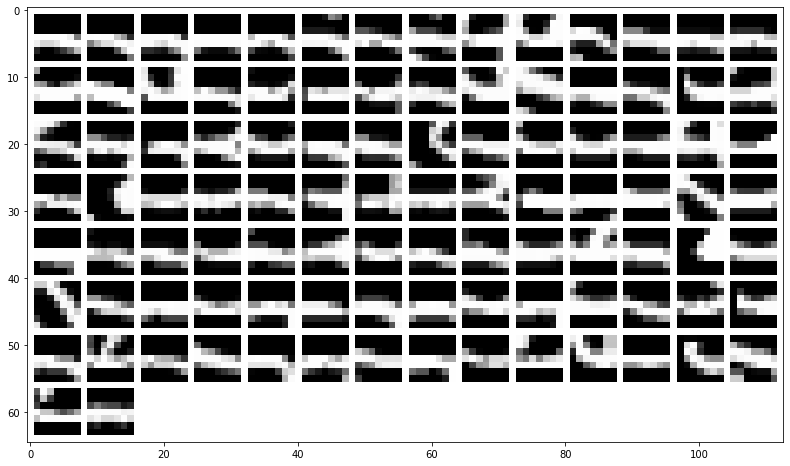

normalized regions:


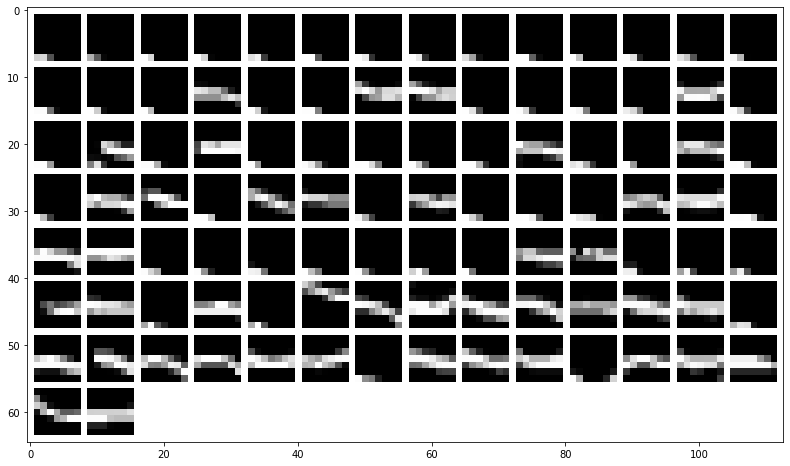

grid regions of 100 regions more=True or worst=False active for filter number: 12 :


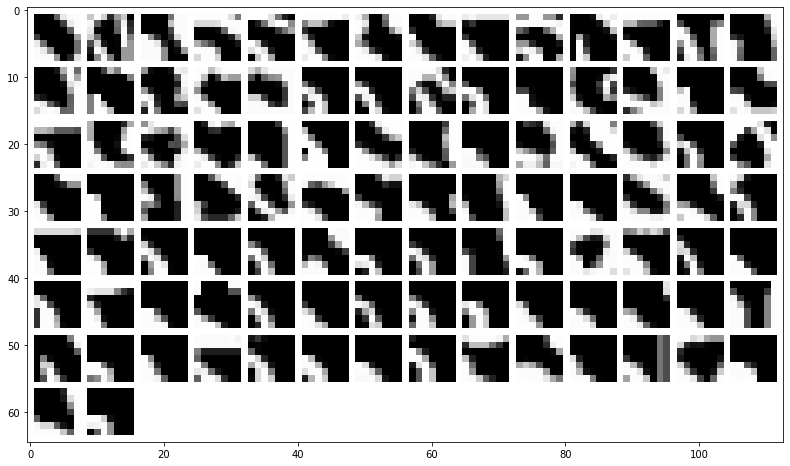

normalized regions:


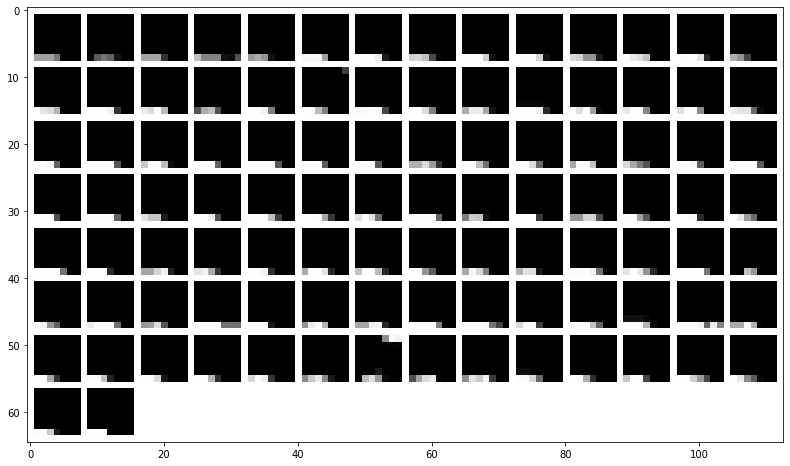

grid regions of 100 regions more=True or worst=False active for filter number: 13 :


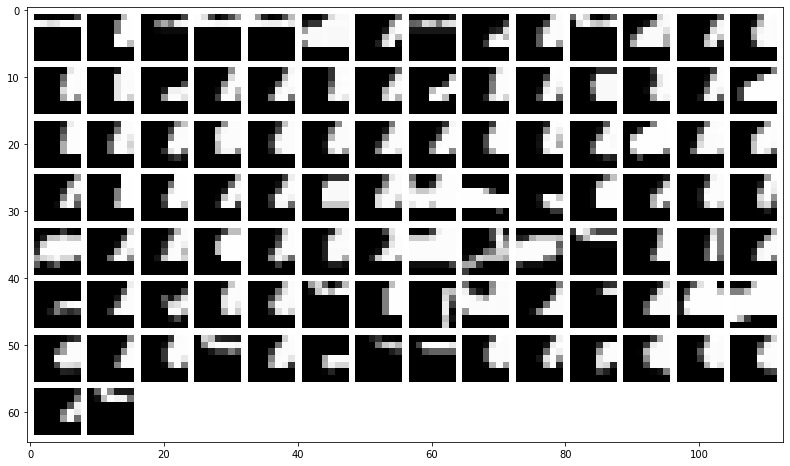

normalized regions:


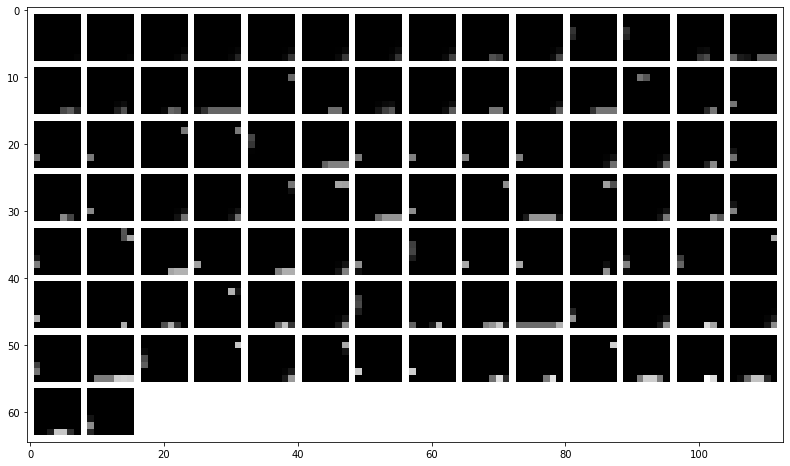

grid regions of 100 regions more=True or worst=False active for filter number: 14 :


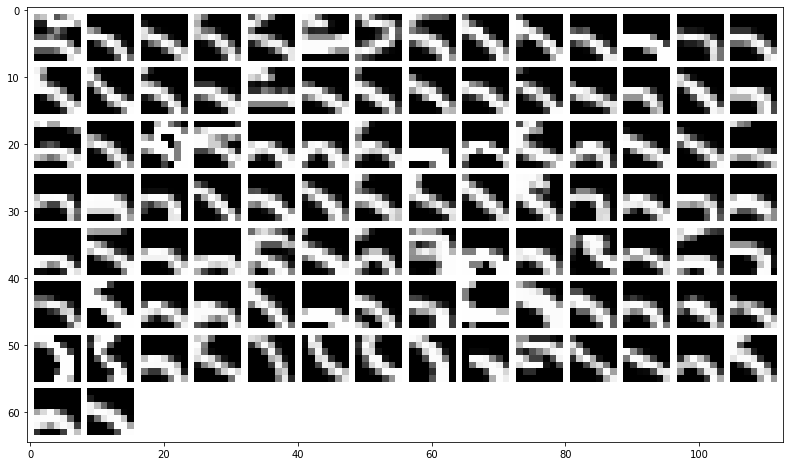

normalized regions:


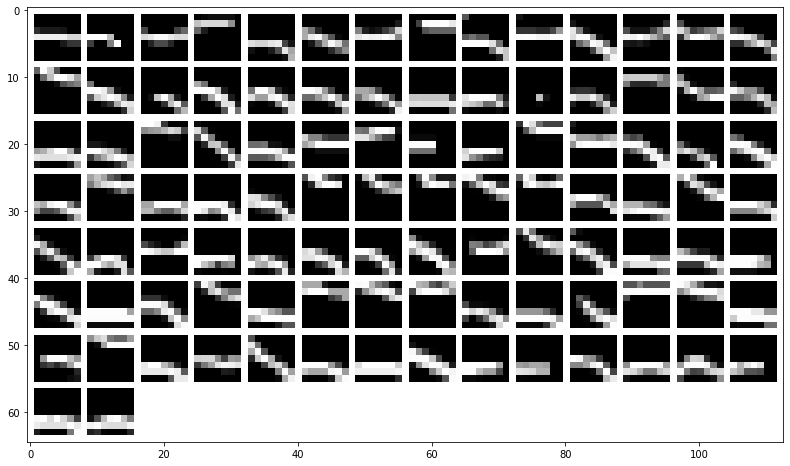

grid regions of 100 regions more=True or worst=False active for filter number: 15 :


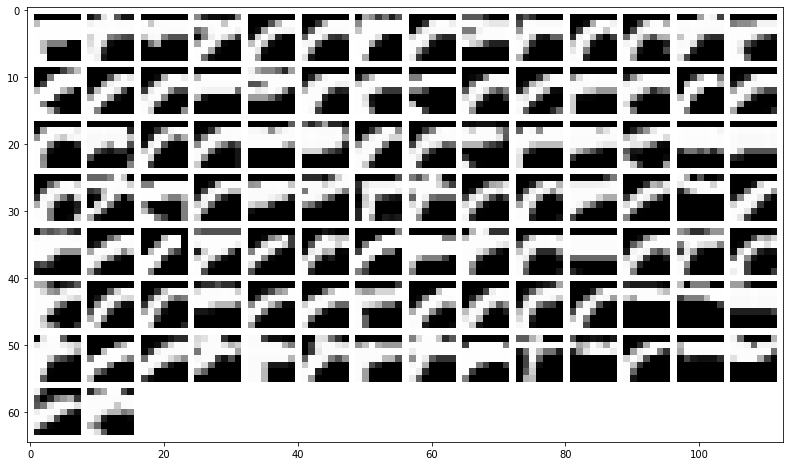

normalized regions:


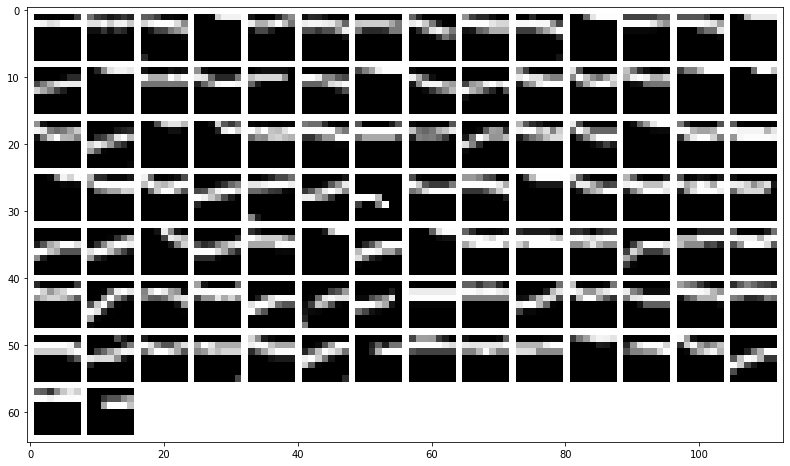

grid regions of 100 regions more=True or worst=False active for filter number: 16 :


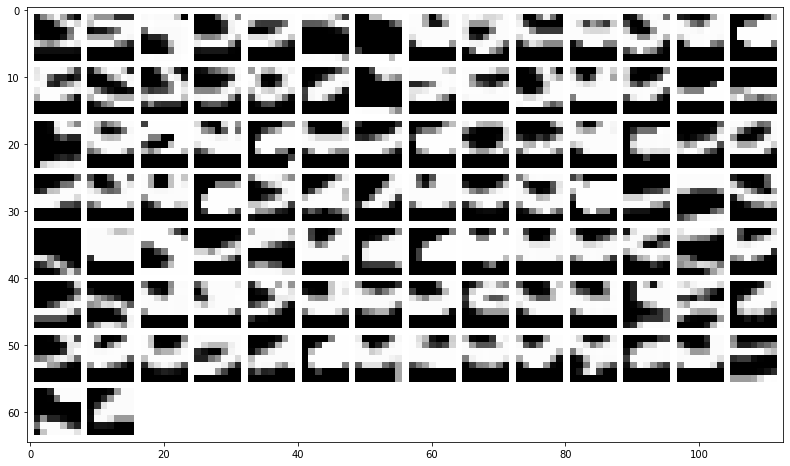

normalized regions:


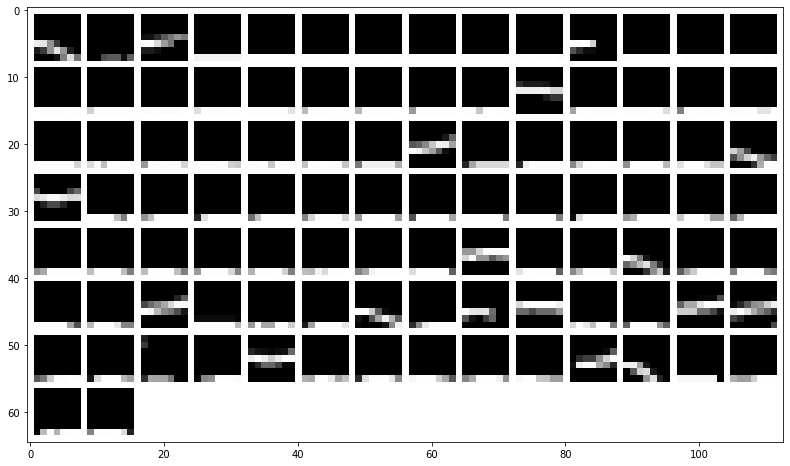

grid regions of 100 regions more=True or worst=False active for filter number: 17 :


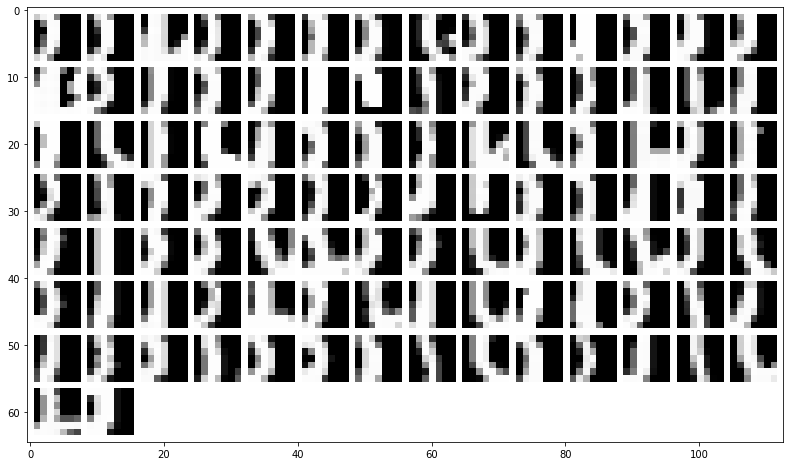

normalized regions:


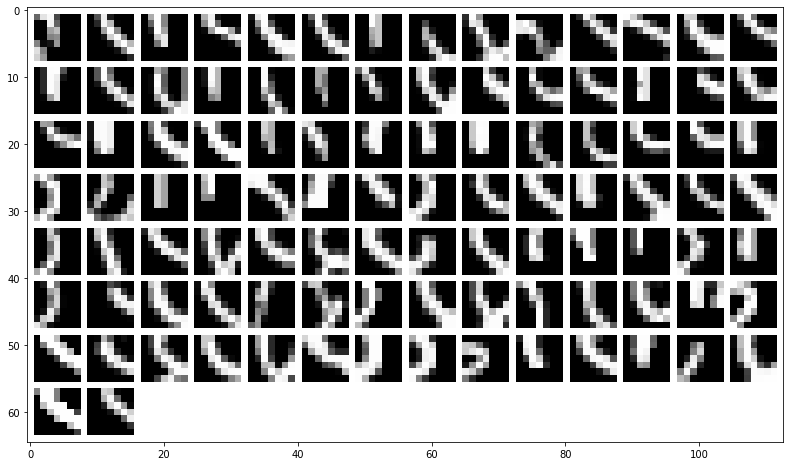

grid regions of 100 regions more=True or worst=False active for filter number: 18 :


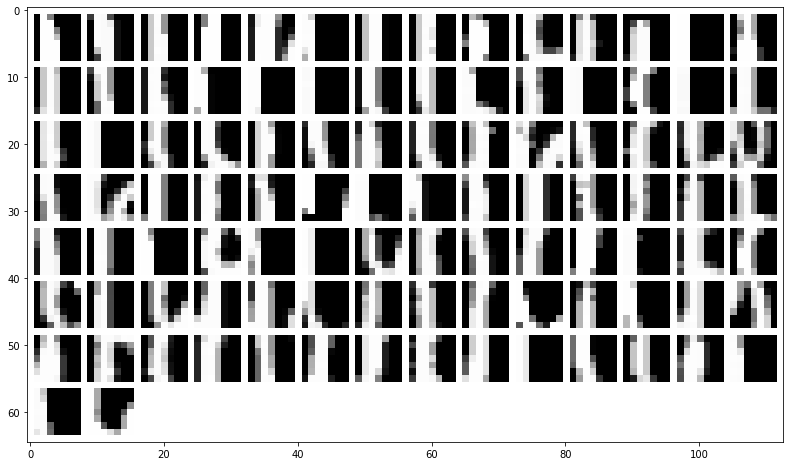

normalized regions:


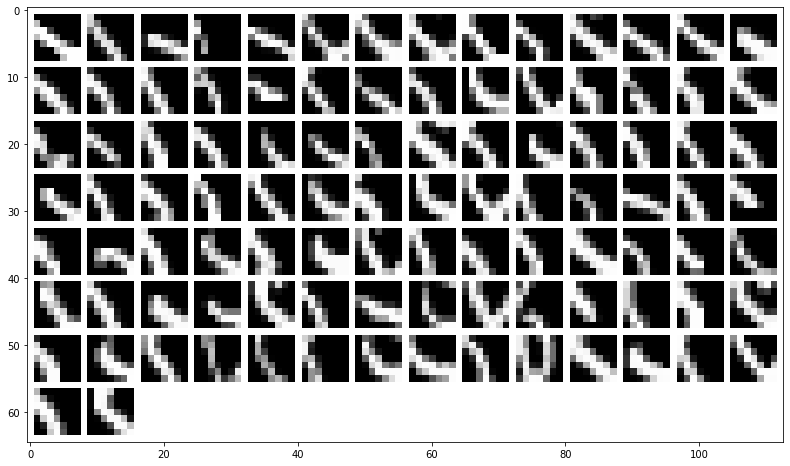

grid regions of 100 regions more=True or worst=False active for filter number: 19 :


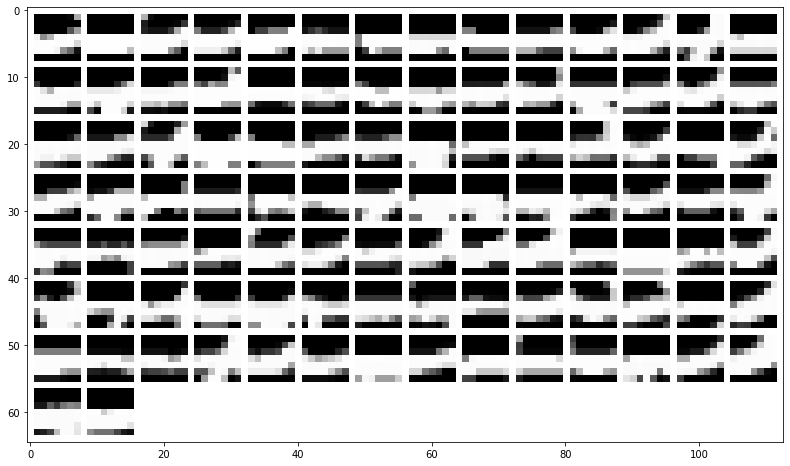

normalized regions:


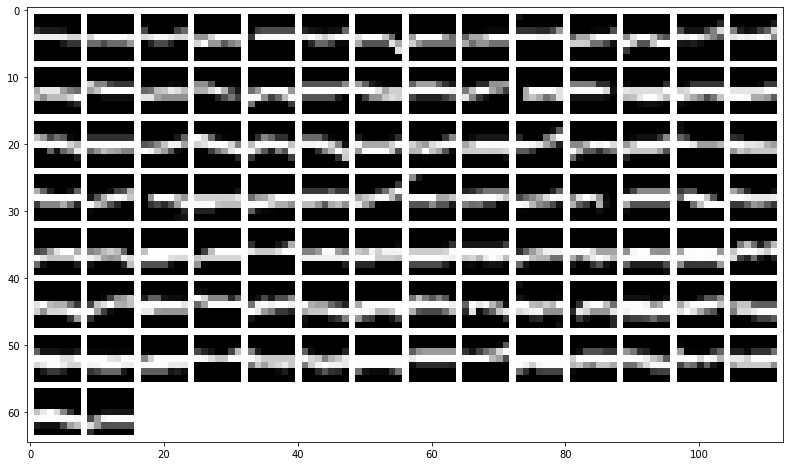

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 1
nrow=14

# regions and activation of interest
regions = region_layer2_no_binary_without_bias
activations = activation_layer2_no_binary_without_bias
activations_normalized = activation_layer2_no_binary_normalized_without_bias

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2, nrow=nrow)

##### Binary model without bias layer1:

Visualization filters learned for layer: layer1


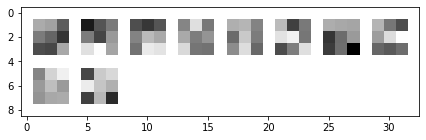

Visualization filters learned for layer: layer2


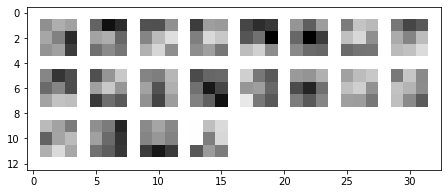

In [0]:
viz_filters(model_binary_wt_bias)

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 1000 images
mean image:
mean regions of 1000 regions more=True or worst=False active for filter number: 0 :


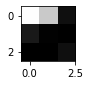

normalized region:


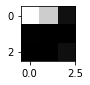

mean regions of 1000 regions more=True or worst=False active for filter number: 1 :


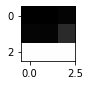

normalized region:


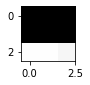

mean regions of 1000 regions more=True or worst=False active for filter number: 2 :


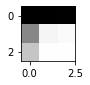

normalized region:


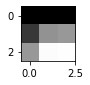

mean regions of 1000 regions more=True or worst=False active for filter number: 3 :


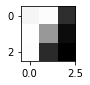

normalized region:


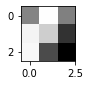

mean regions of 1000 regions more=True or worst=False active for filter number: 4 :


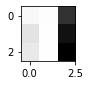

normalized region:


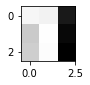

mean regions of 1000 regions more=True or worst=False active for filter number: 5 :


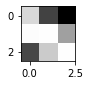

normalized region:


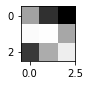

mean regions of 1000 regions more=True or worst=False active for filter number: 6 :


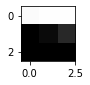

normalized region:


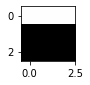

mean regions of 1000 regions more=True or worst=False active for filter number: 7 :


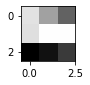

normalized region:


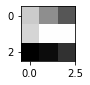

mean regions of 1000 regions more=True or worst=False active for filter number: 8 :


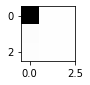

normalized region:


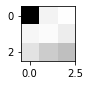

mean regions of 1000 regions more=True or worst=False active for filter number: 9 :


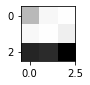

normalized region:


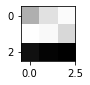

grid image
grid regions of 1000 regions more=True or worst=False active for filter number: 0 :


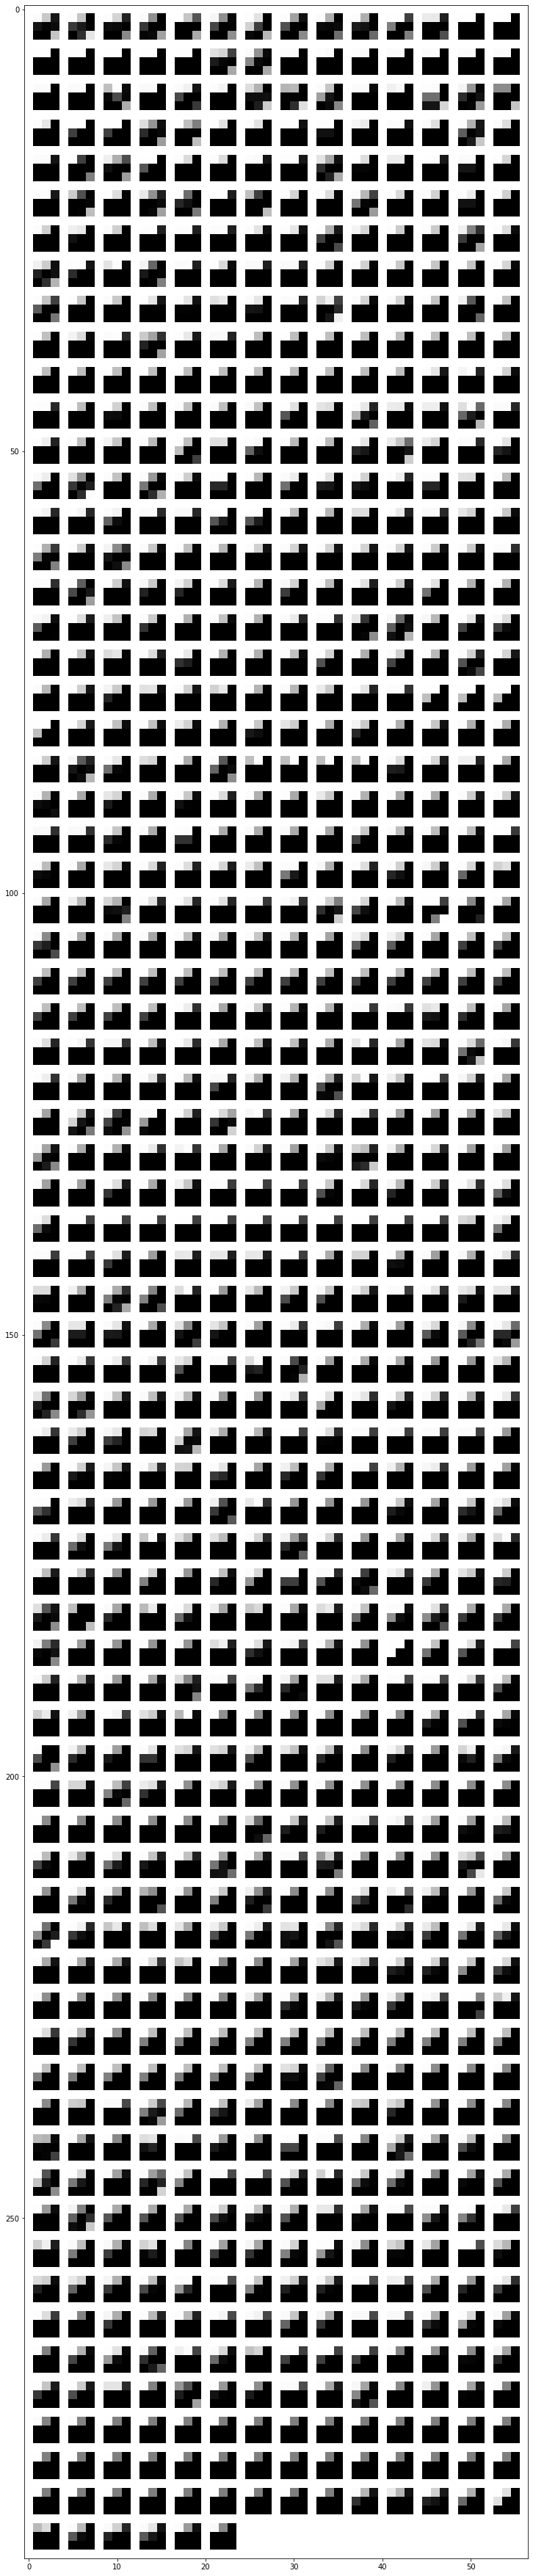

normalized regions:


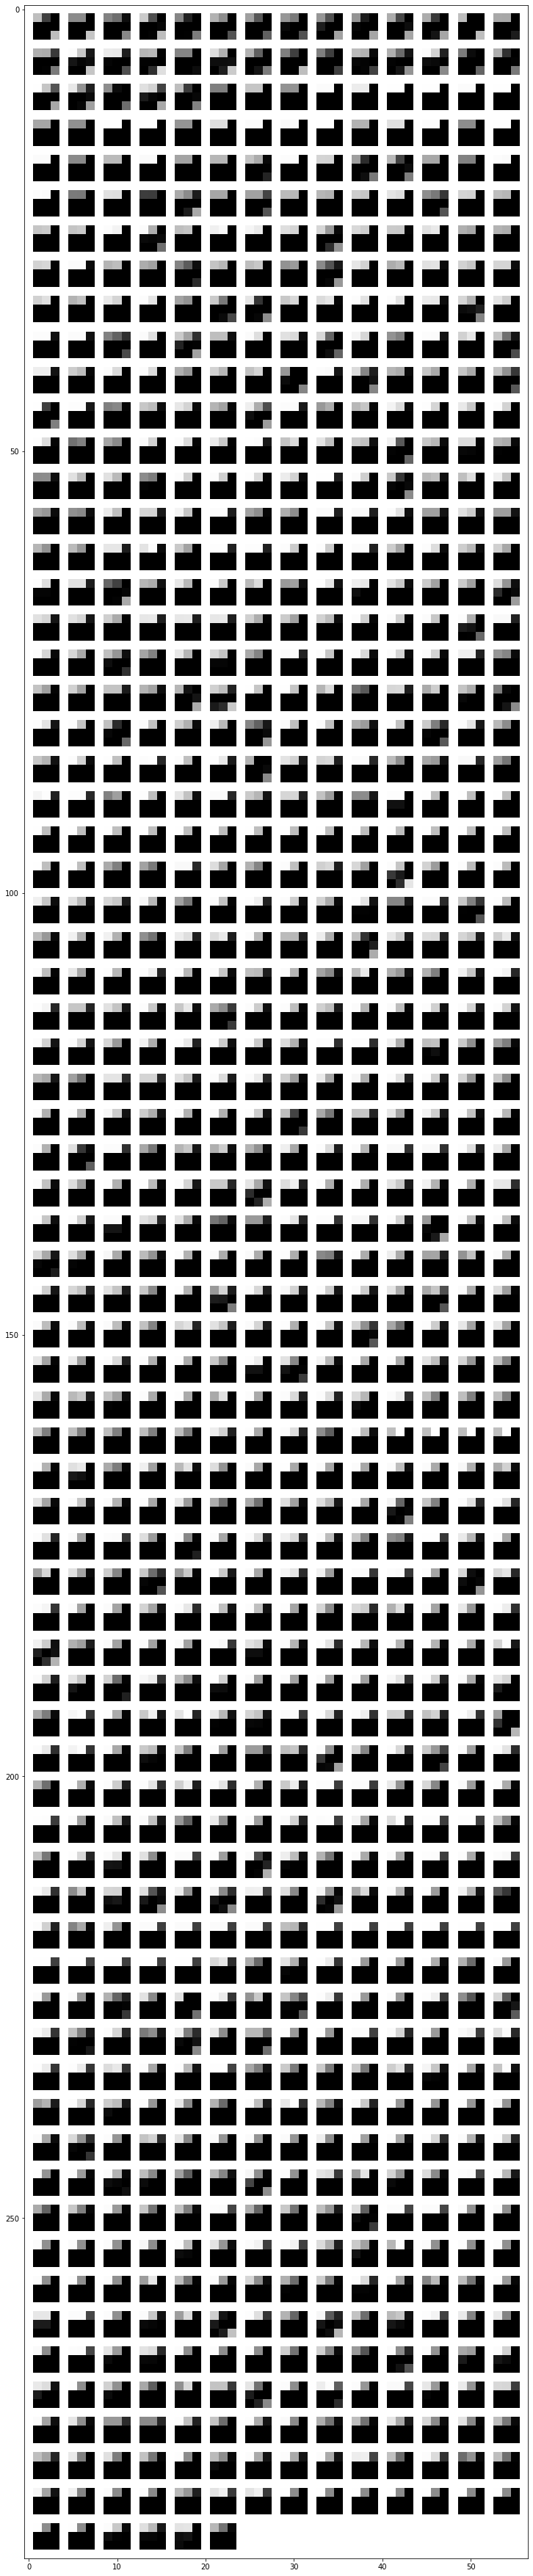

grid regions of 1000 regions more=True or worst=False active for filter number: 1 :


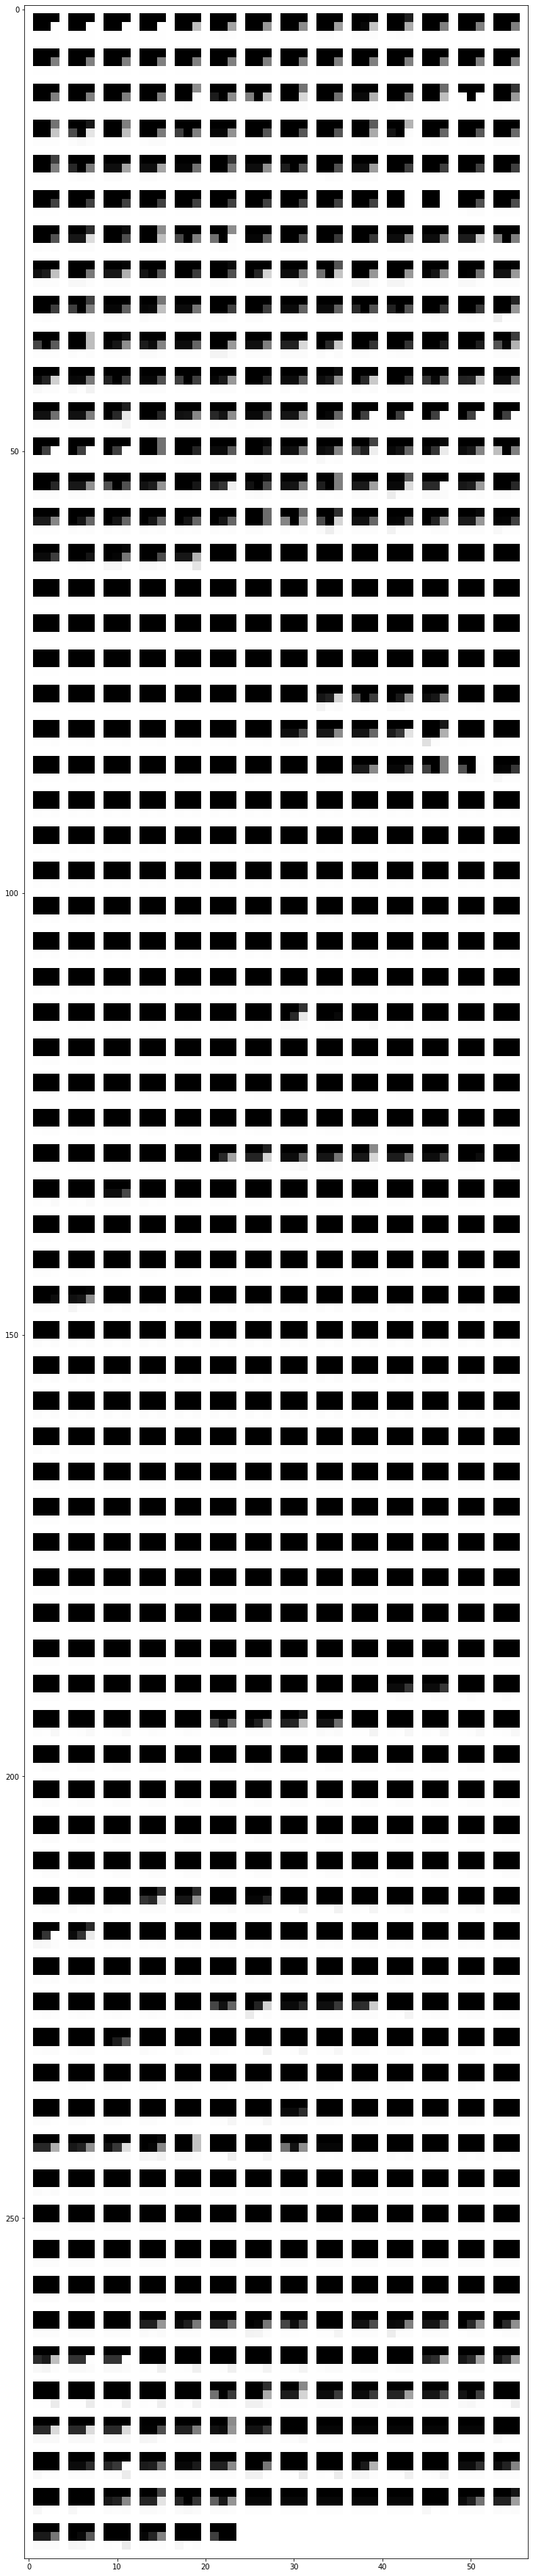

normalized regions:


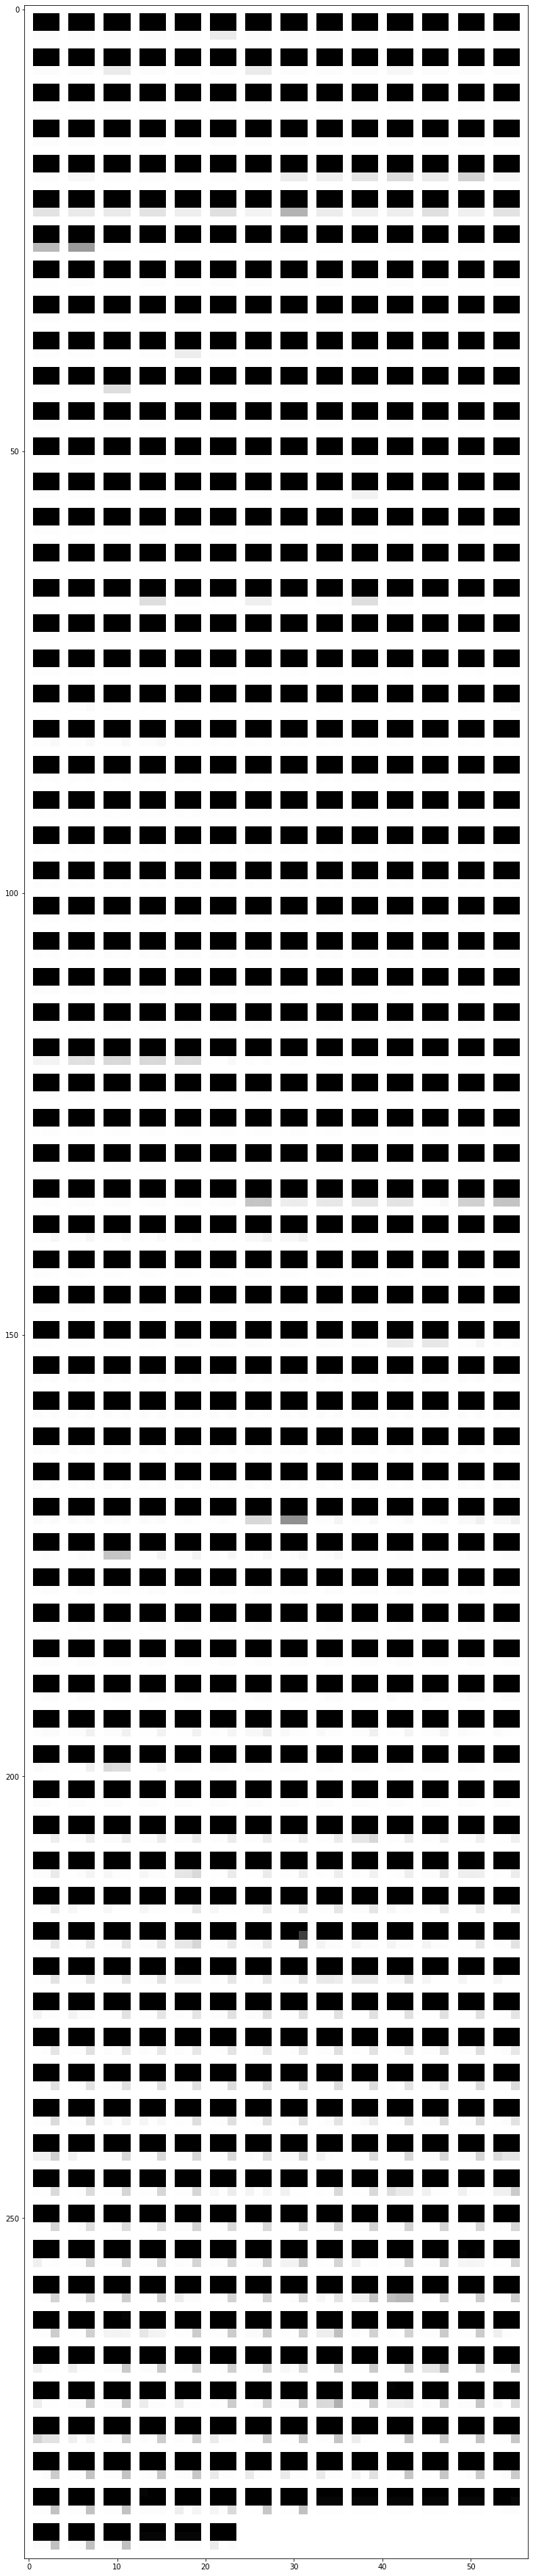

grid regions of 1000 regions more=True or worst=False active for filter number: 2 :


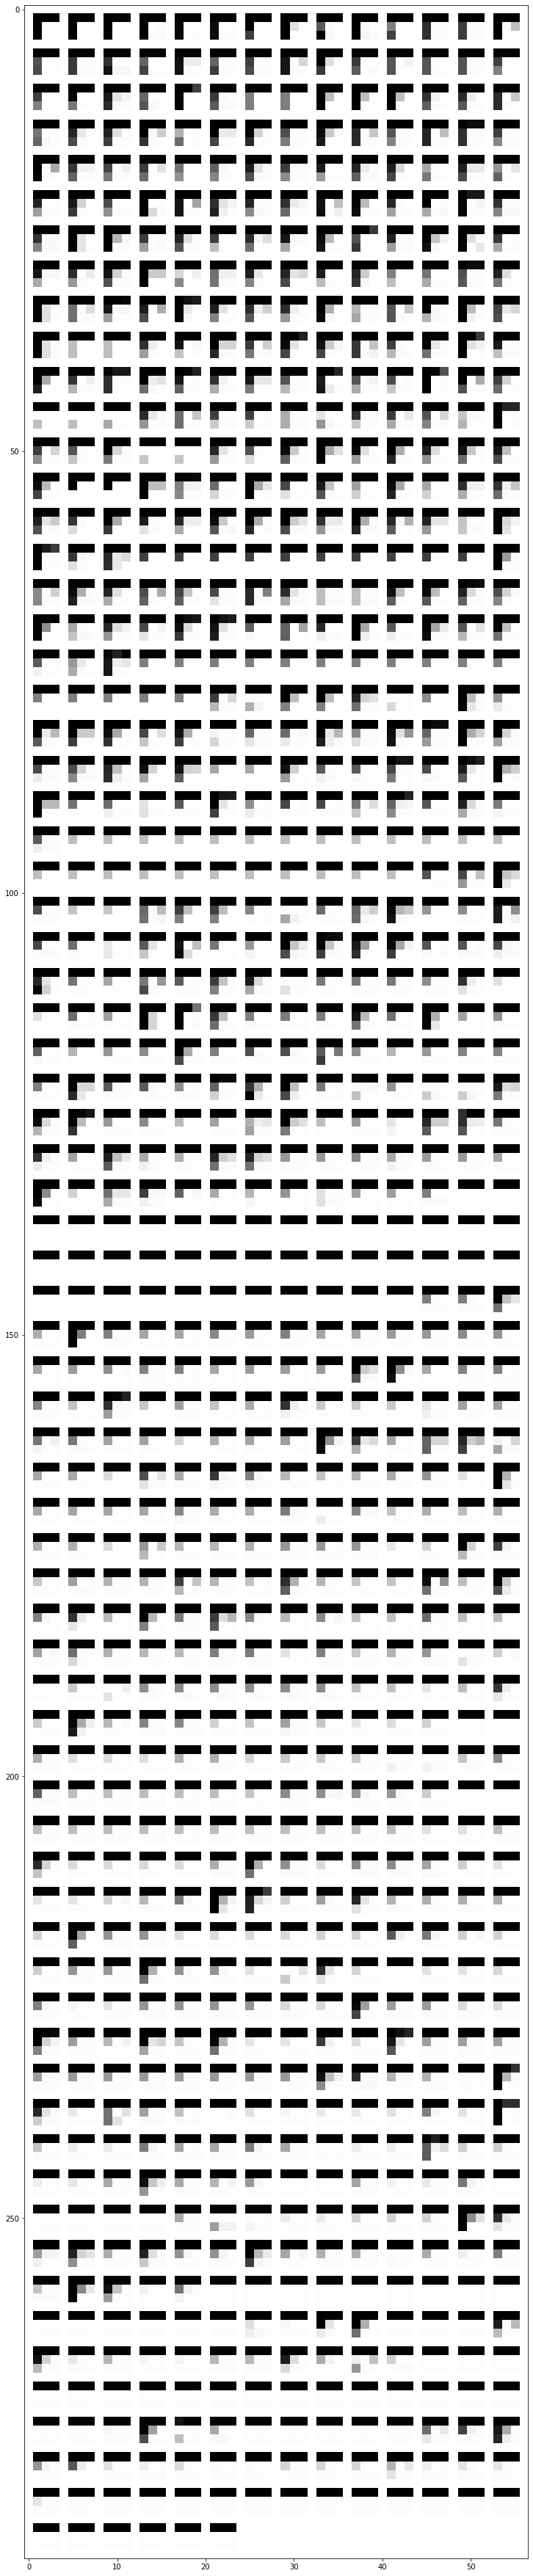

normalized regions:


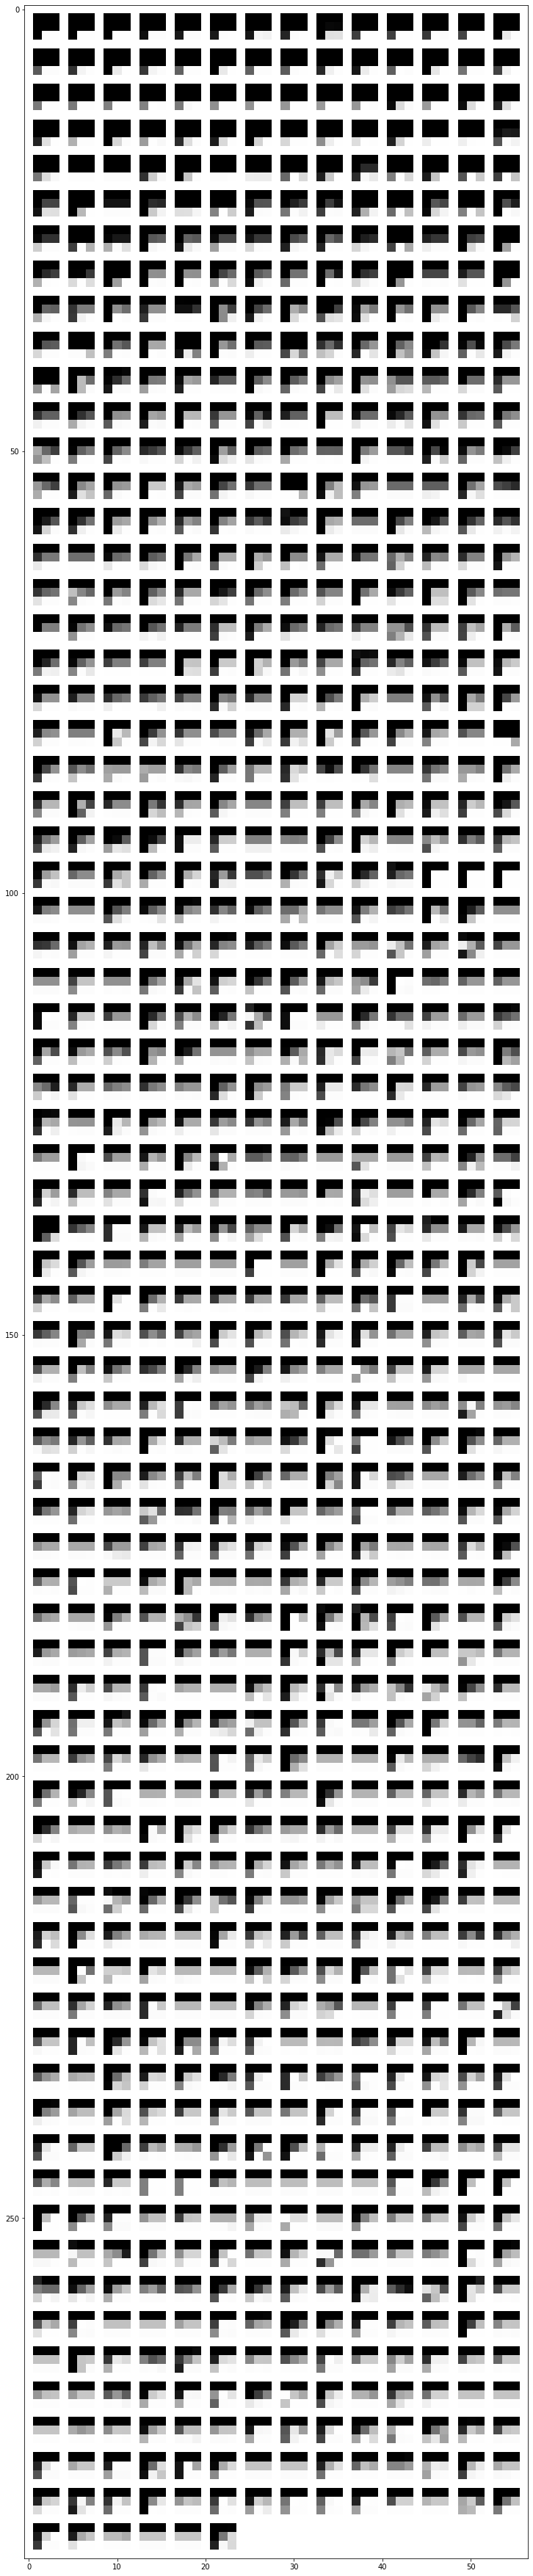

grid regions of 1000 regions more=True or worst=False active for filter number: 3 :


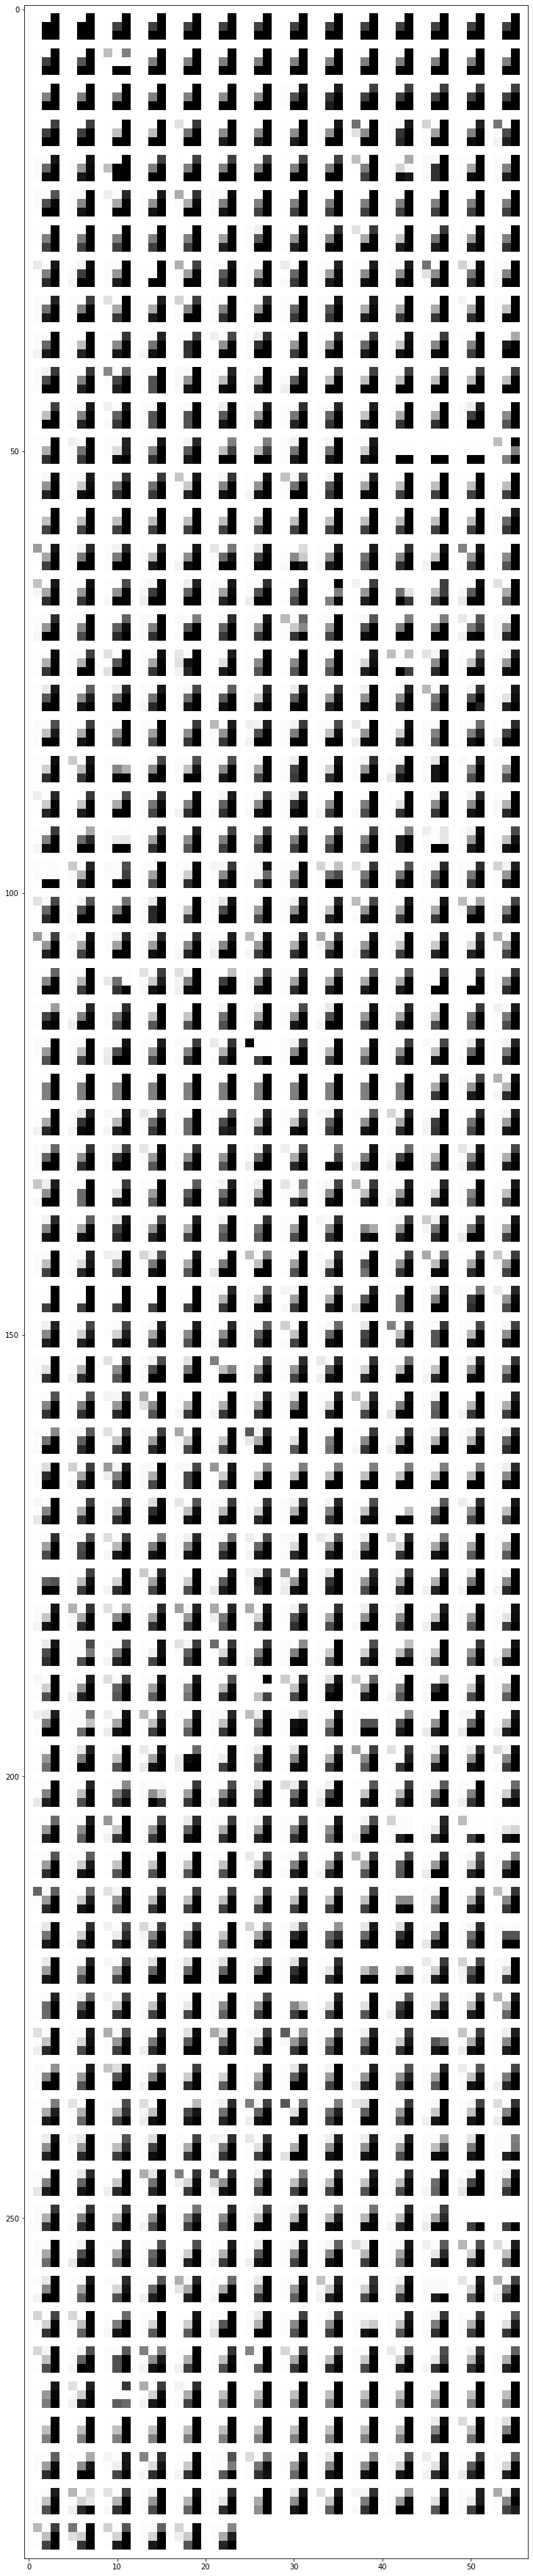

normalized regions:


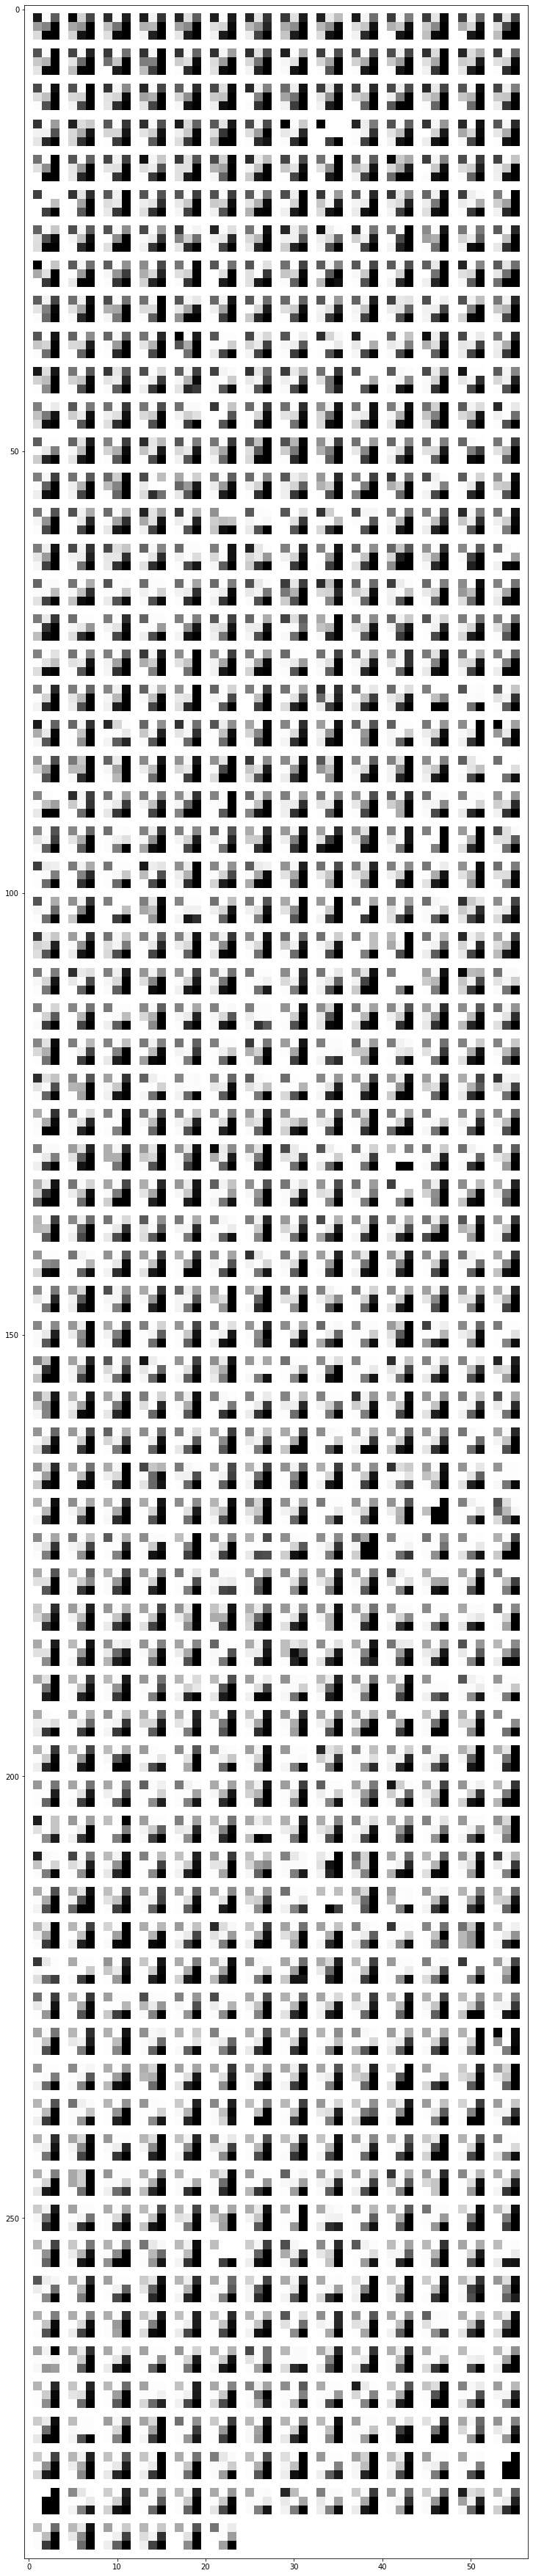

grid regions of 1000 regions more=True or worst=False active for filter number: 4 :


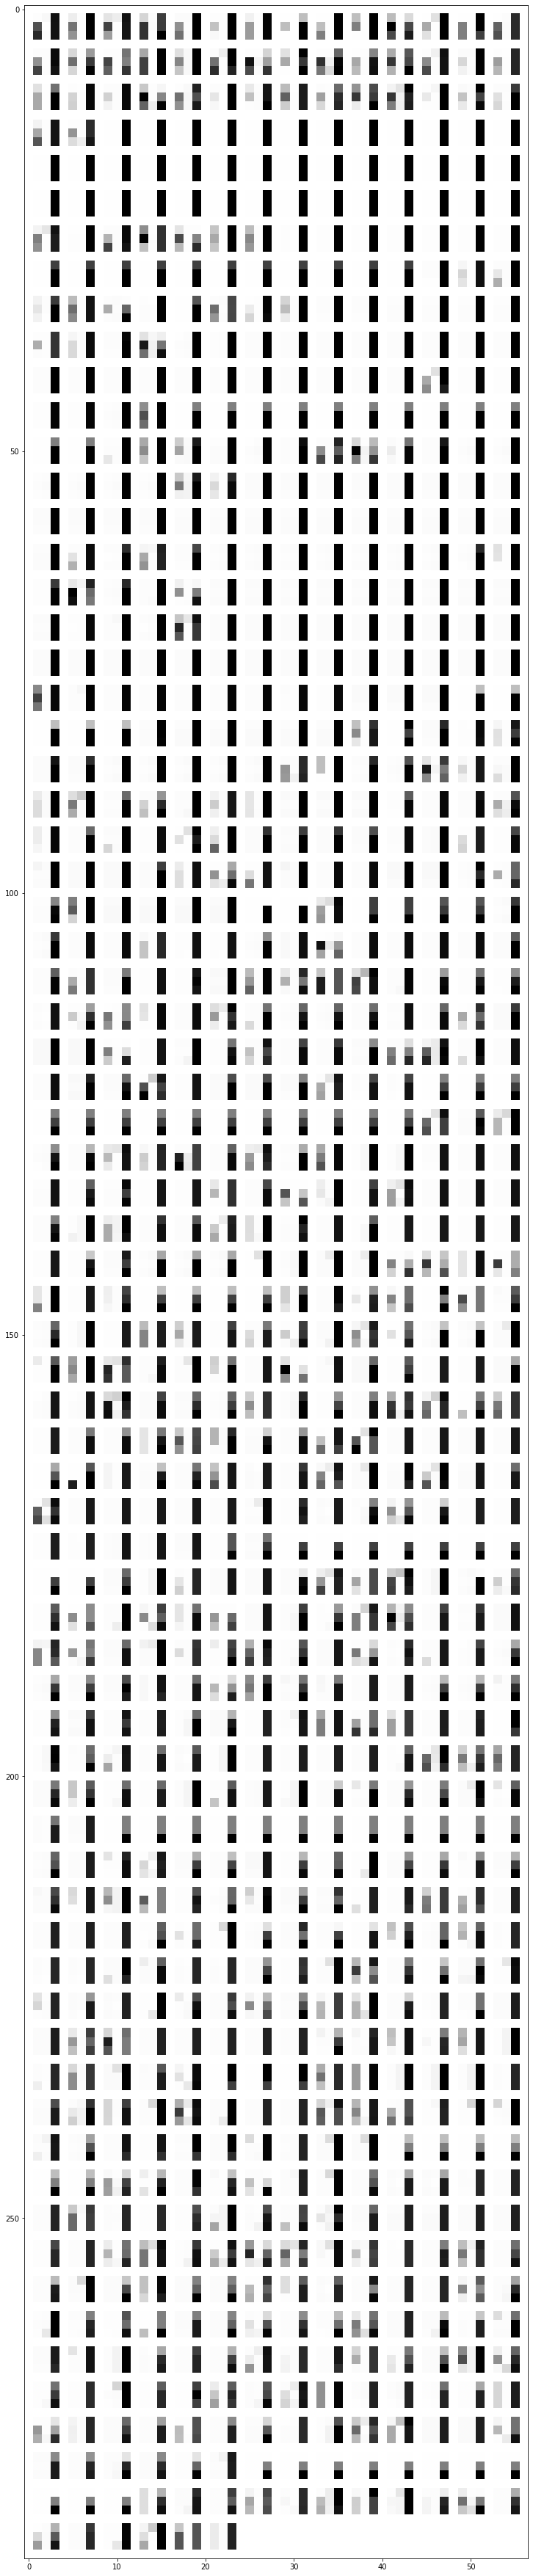

normalized regions:


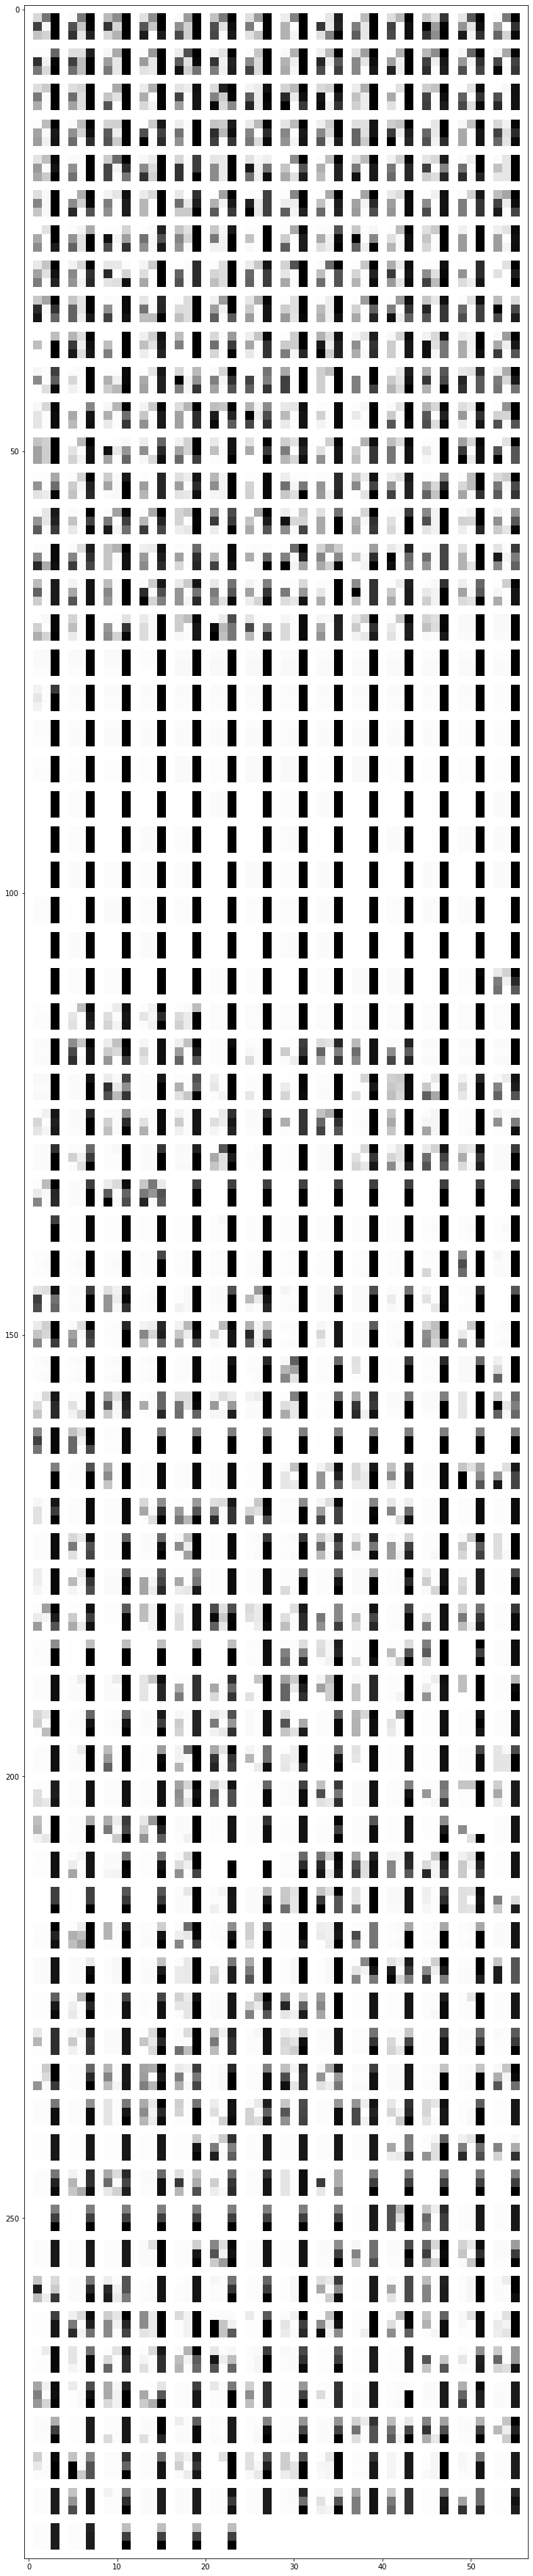

grid regions of 1000 regions more=True or worst=False active for filter number: 5 :


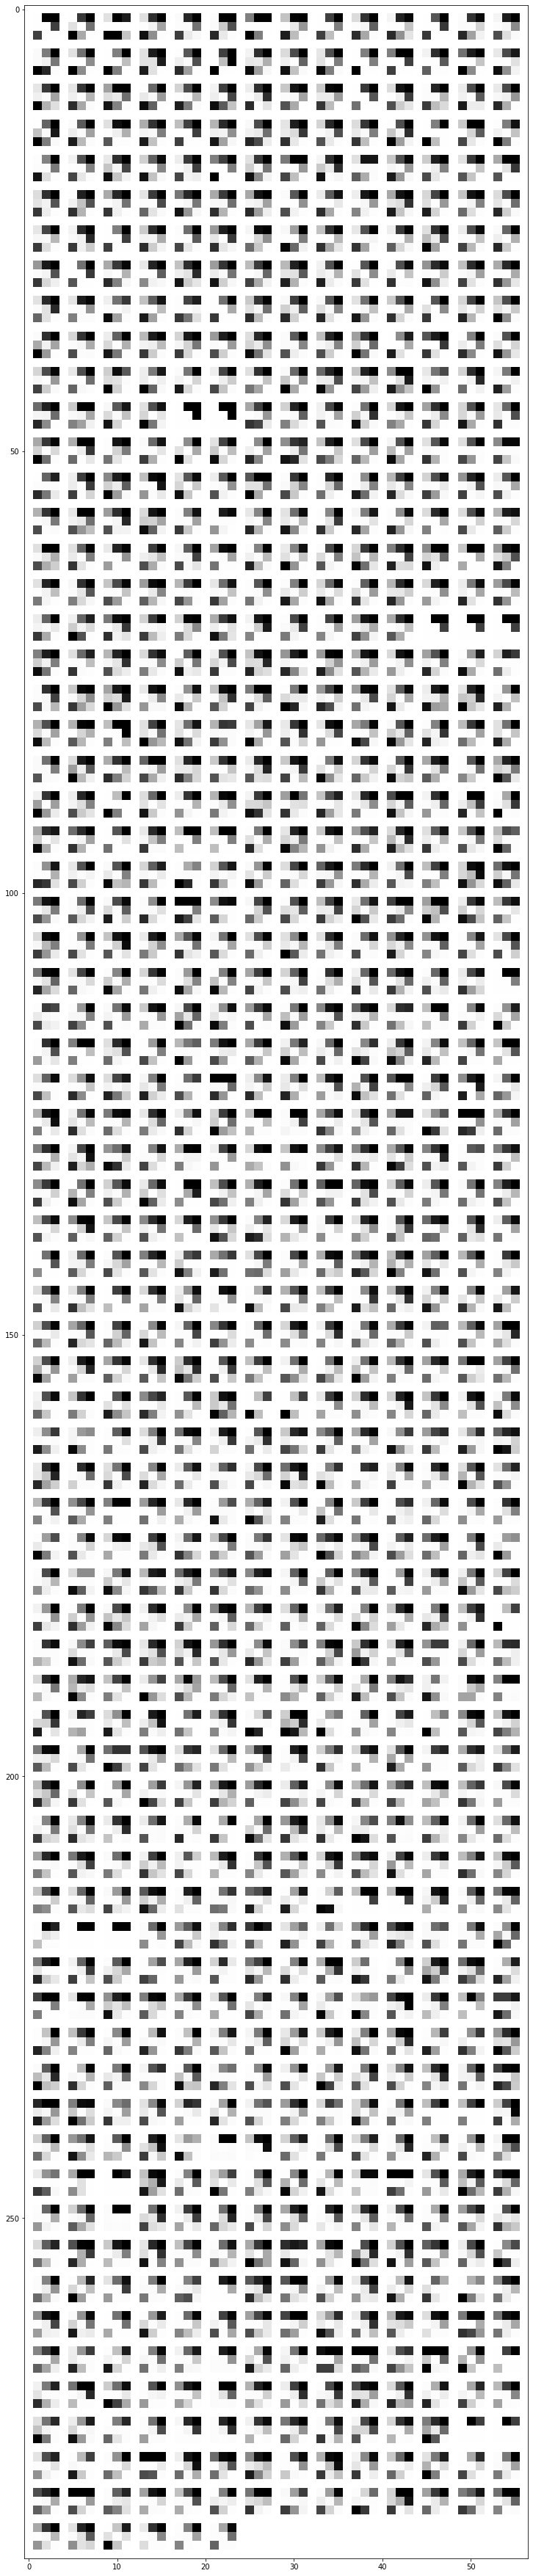

normalized regions:


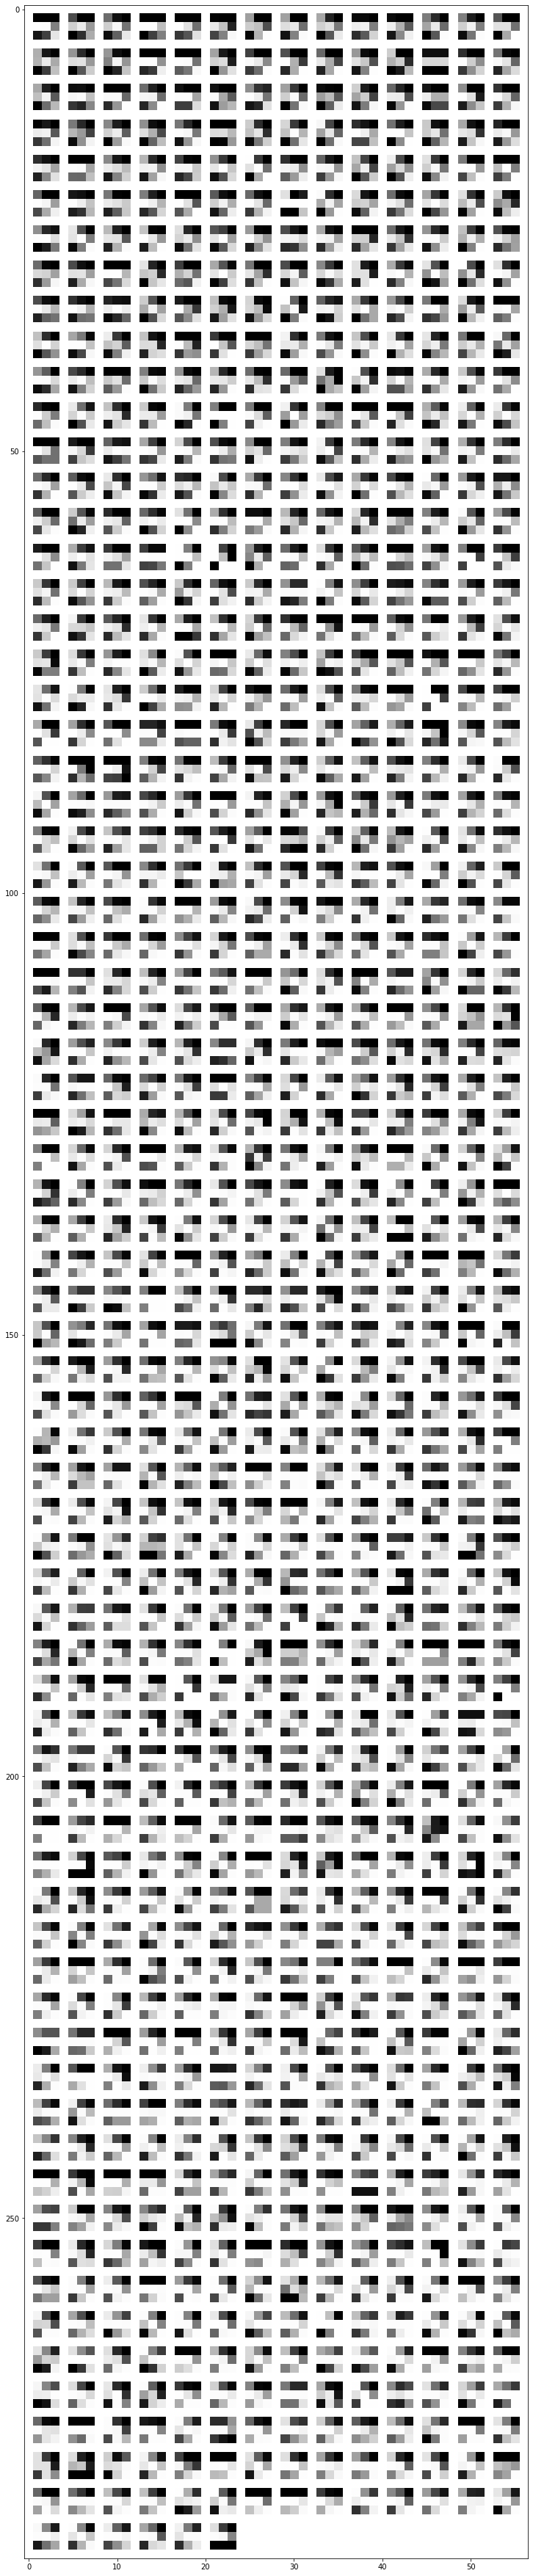

grid regions of 1000 regions more=True or worst=False active for filter number: 6 :


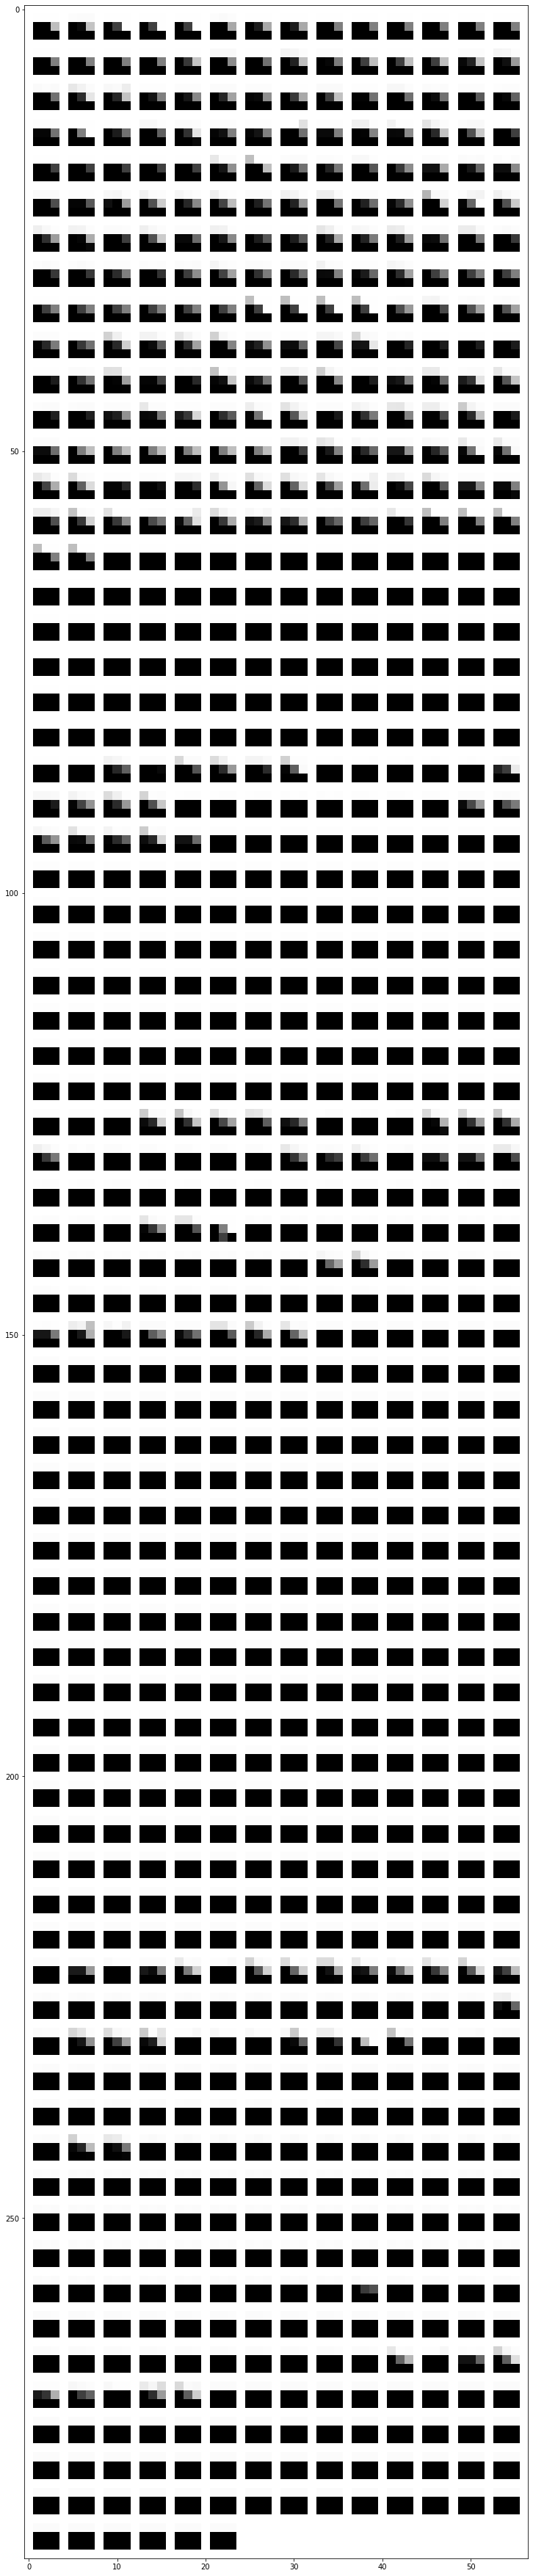

normalized regions:


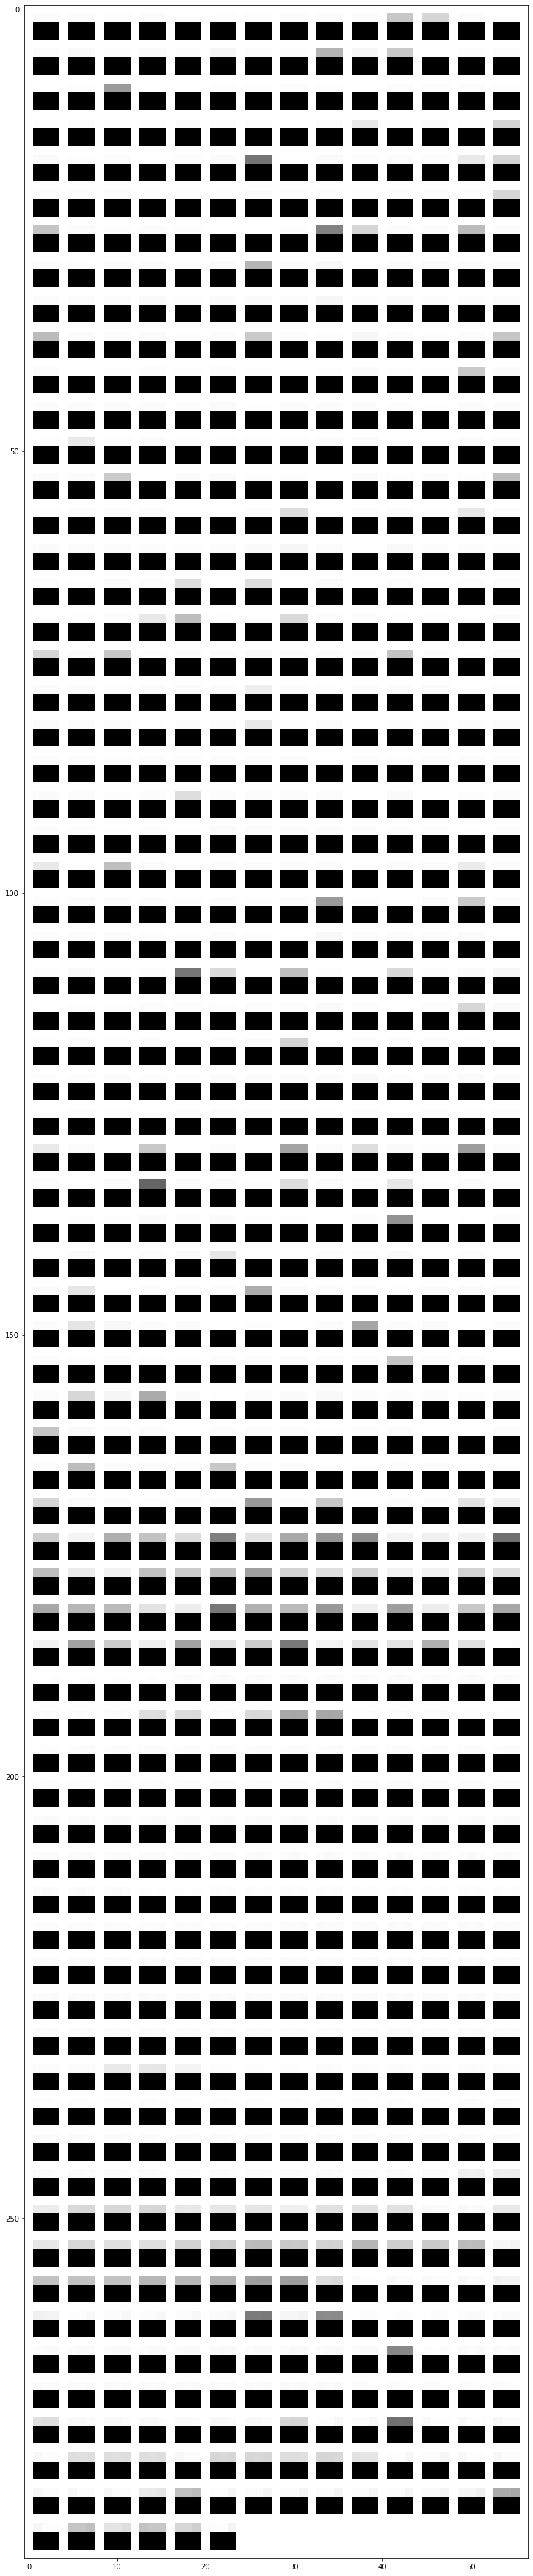

grid regions of 1000 regions more=True or worst=False active for filter number: 7 :


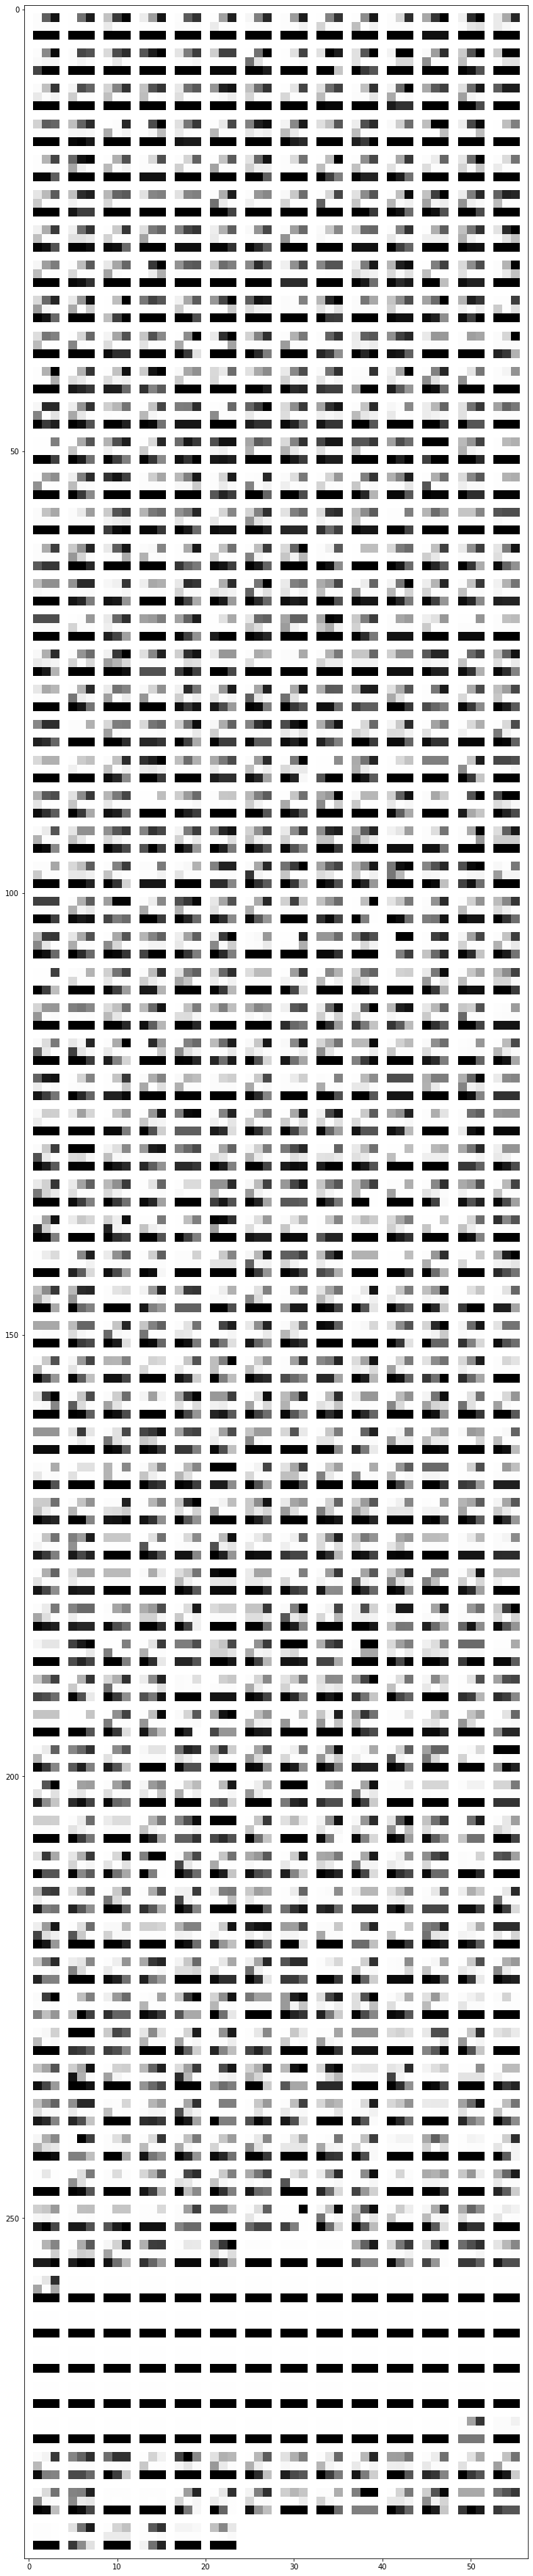

normalized regions:


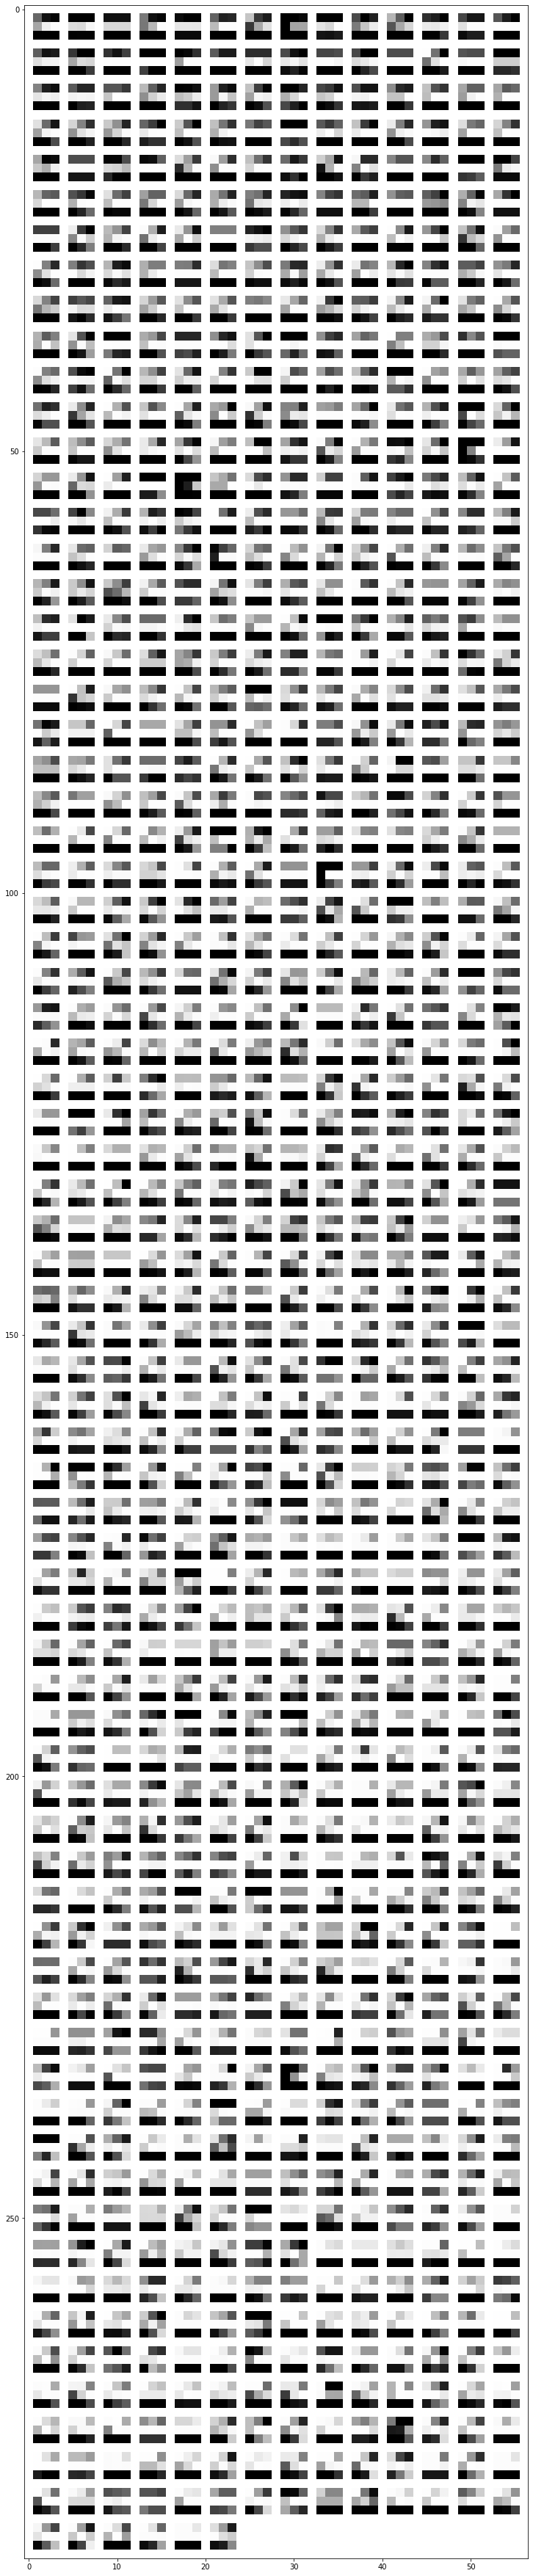

grid regions of 1000 regions more=True or worst=False active for filter number: 8 :


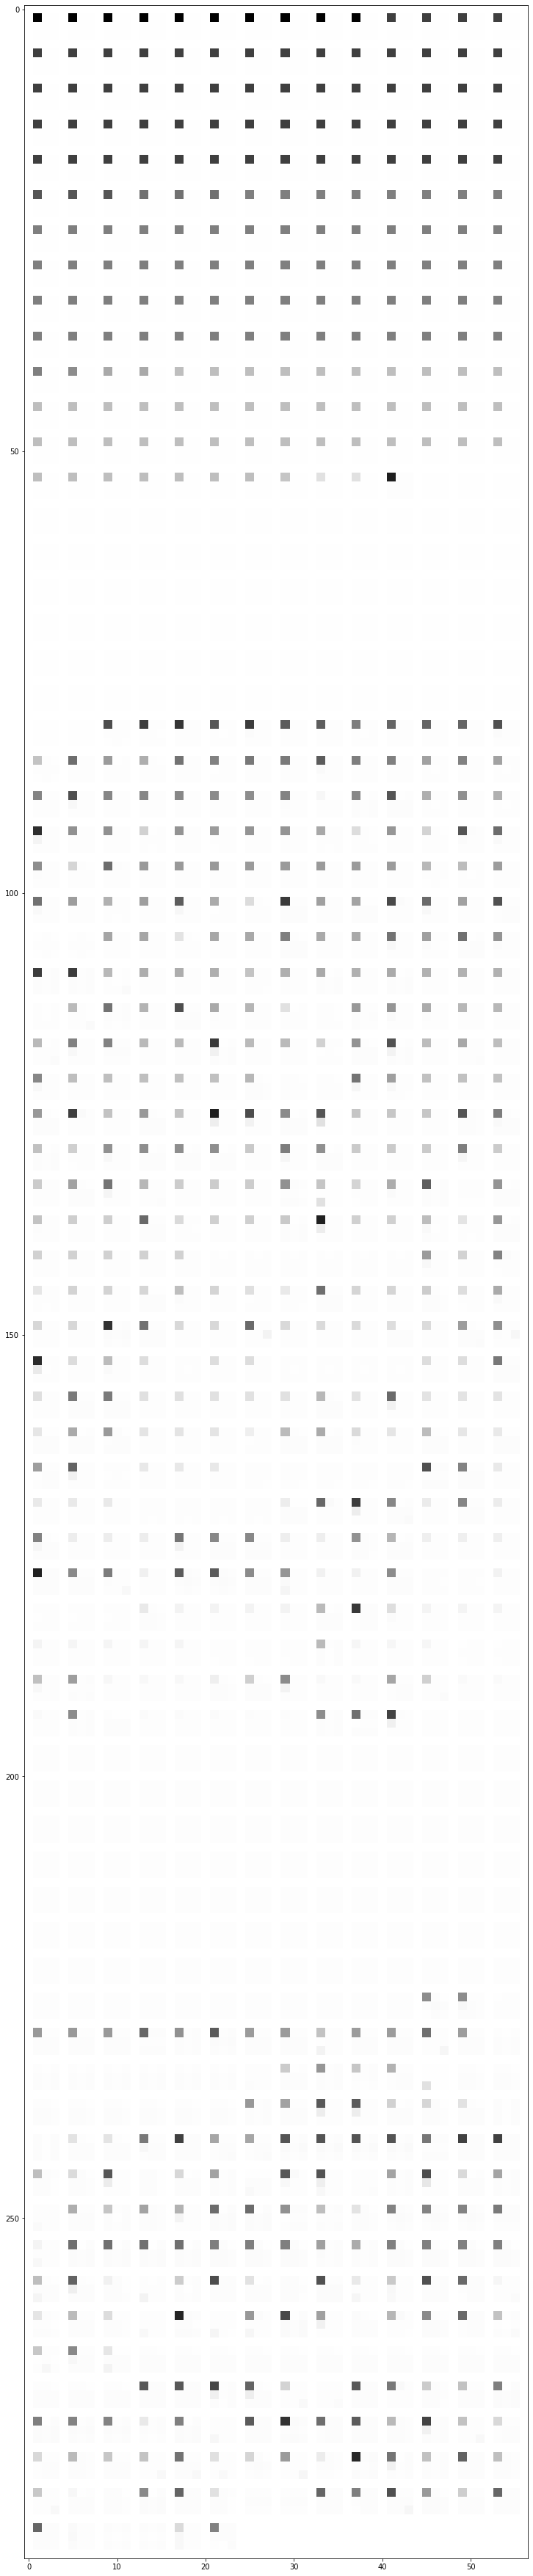

normalized regions:


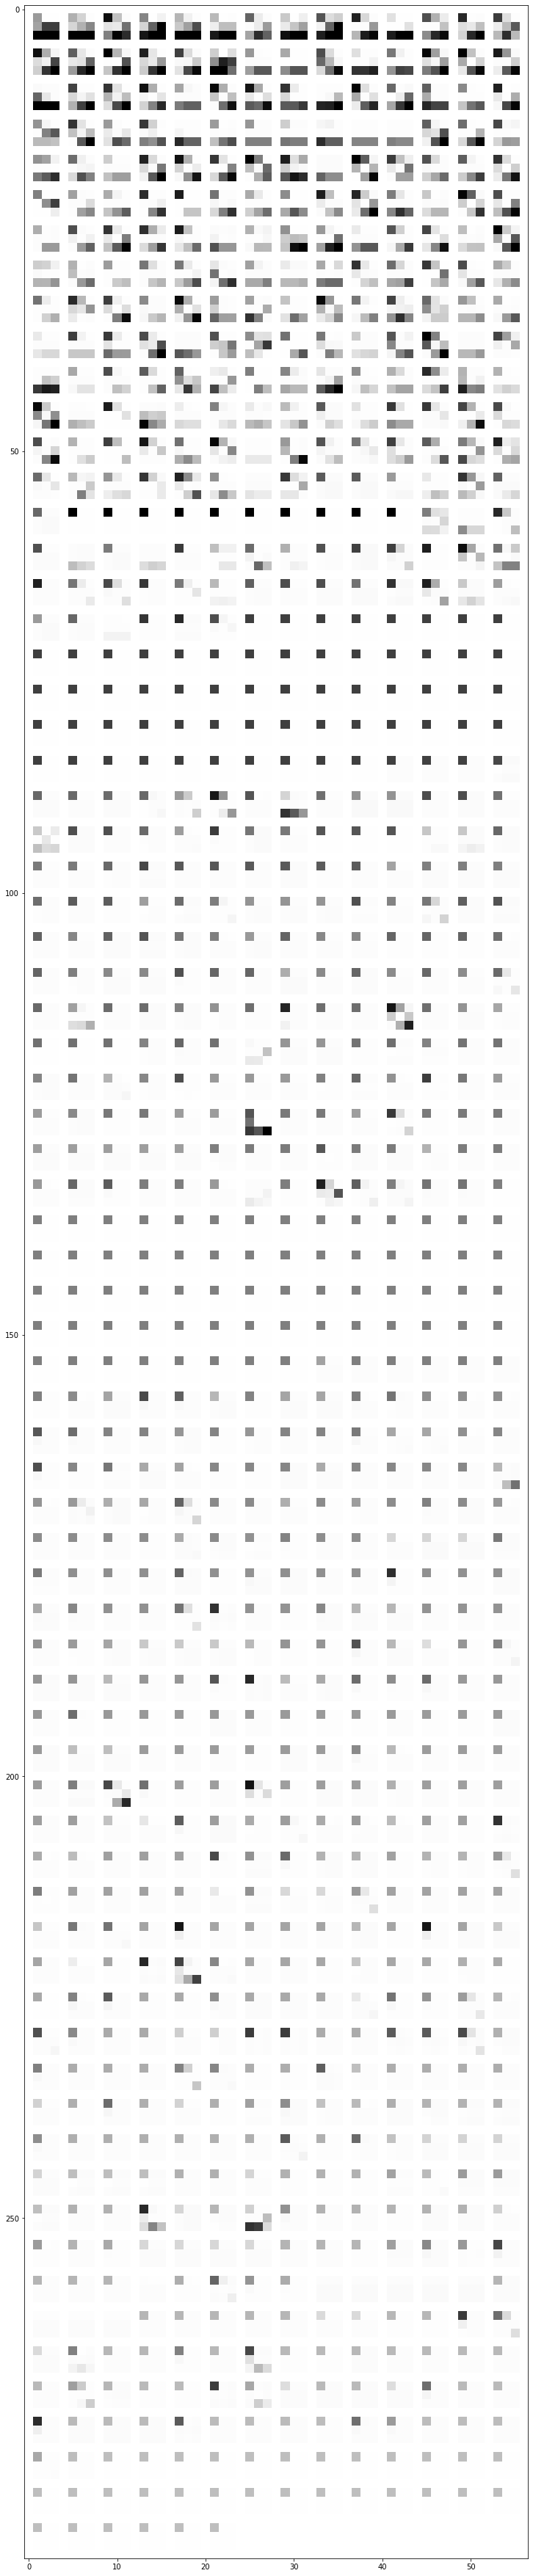

grid regions of 1000 regions more=True or worst=False active for filter number: 9 :


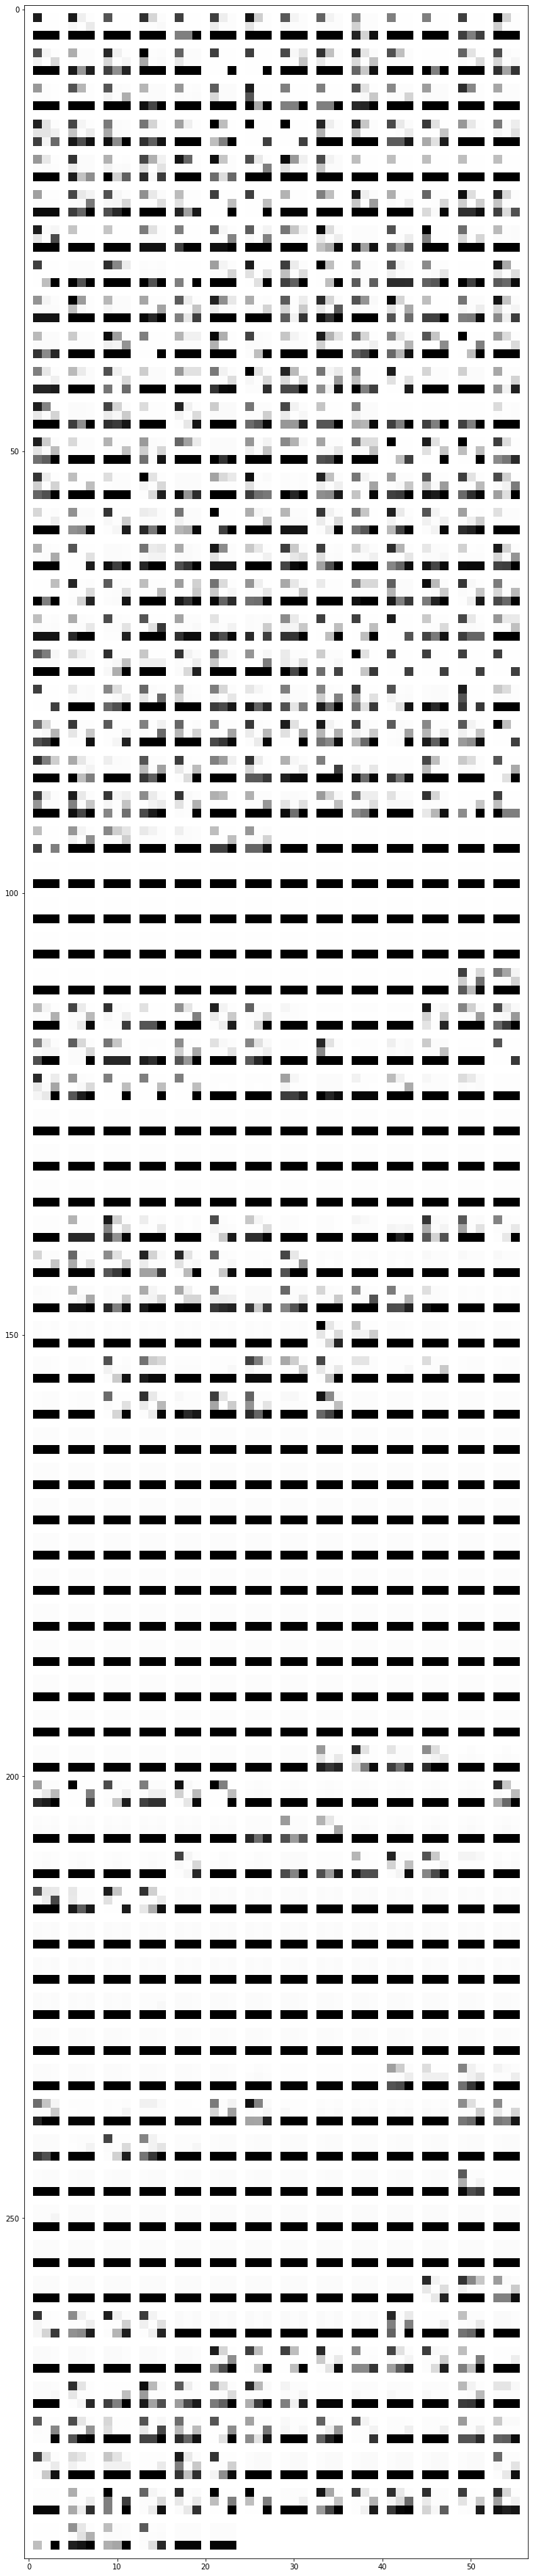

normalized regions:


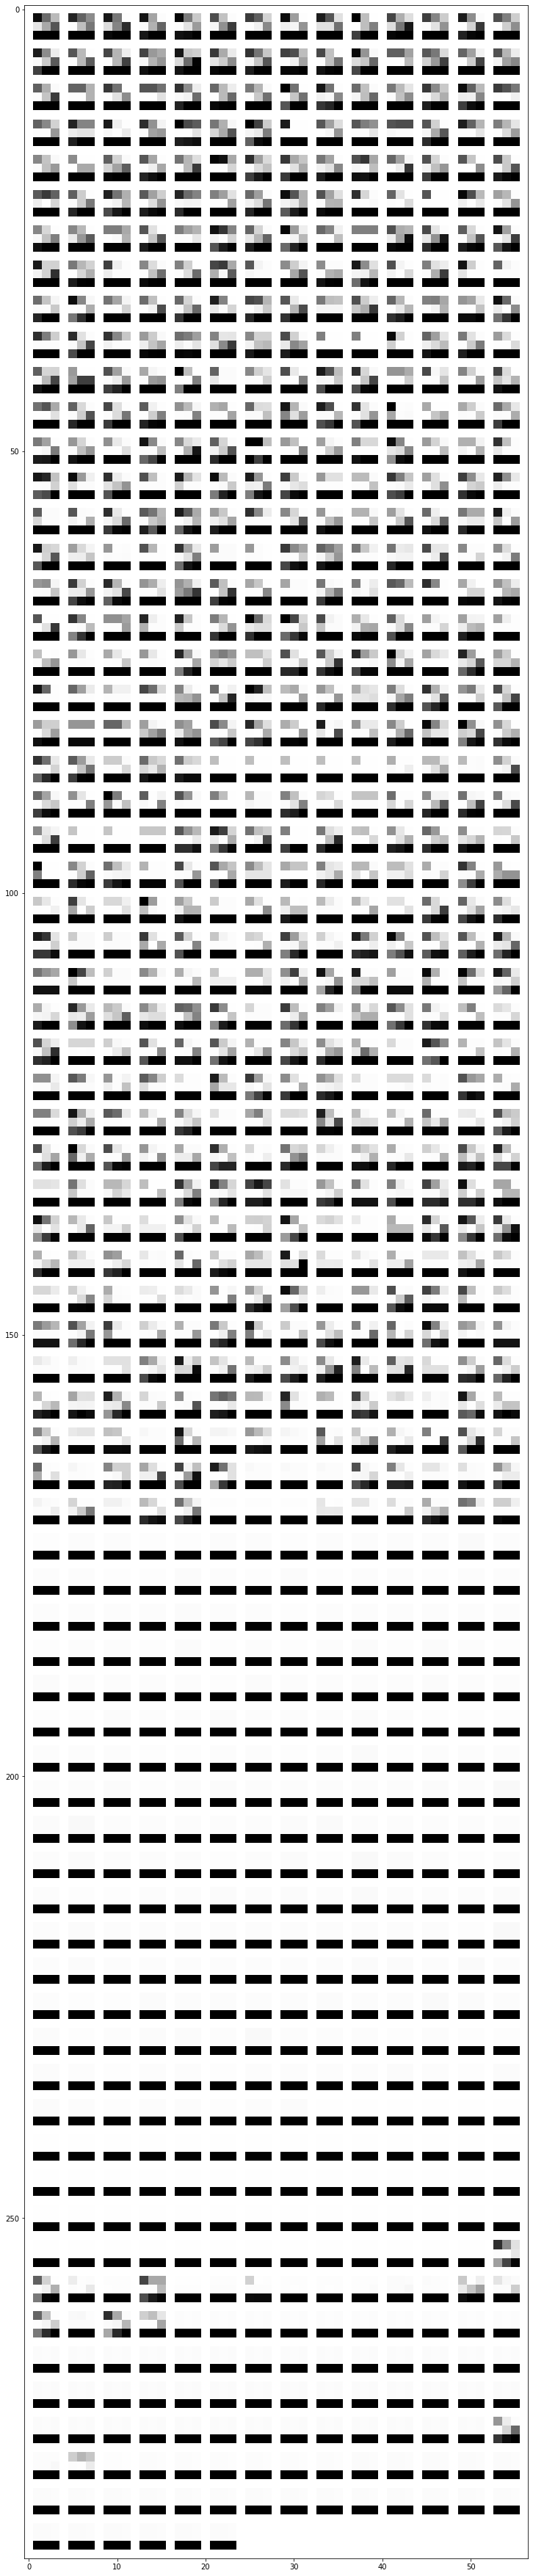

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10
nrow=14

# regions and activation of interest
regions = region_layer1_binary_without_bias
activations = activation_layer1_binary_without_bias
activations_normalized = activation_layer1_binary_normalized_without_bias

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1, nrow=nrow)

##### Binary model without bias layer2:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Consider 1% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


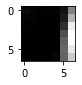

normalized region:


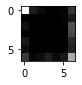

mean regions of 100 regions more=True or worst=False active for filter number: 1 :


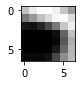

normalized region:


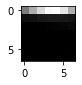

mean regions of 100 regions more=True or worst=False active for filter number: 2 :


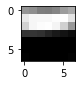

normalized region:


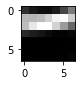

mean regions of 100 regions more=True or worst=False active for filter number: 3 :


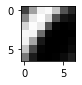

normalized region:


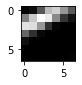

mean regions of 100 regions more=True or worst=False active for filter number: 4 :


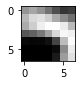

normalized region:


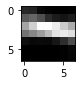

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


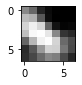

normalized region:


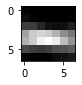

mean regions of 100 regions more=True or worst=False active for filter number: 6 :


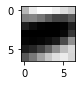

normalized region:


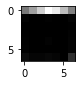

mean regions of 100 regions more=True or worst=False active for filter number: 7 :


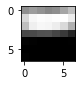

normalized region:


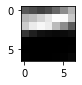

mean regions of 100 regions more=True or worst=False active for filter number: 8 :


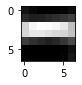

normalized region:


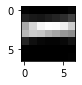

mean regions of 100 regions more=True or worst=False active for filter number: 9 :


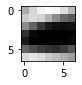

normalized region:


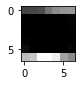

mean regions of 100 regions more=True or worst=False active for filter number: 10 :


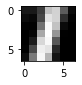

normalized region:


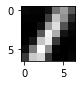

mean regions of 100 regions more=True or worst=False active for filter number: 11 :


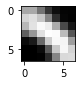

normalized region:


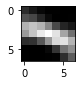

mean regions of 100 regions more=True or worst=False active for filter number: 12 :


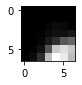

normalized region:


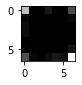

mean regions of 100 regions more=True or worst=False active for filter number: 13 :


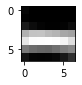

normalized region:


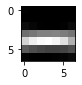

mean regions of 100 regions more=True or worst=False active for filter number: 14 :


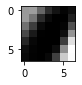

normalized region:


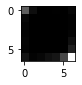

mean regions of 100 regions more=True or worst=False active for filter number: 15 :


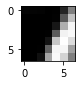

normalized region:


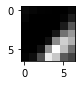

mean regions of 100 regions more=True or worst=False active for filter number: 16 :


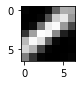

normalized region:


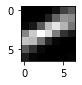

mean regions of 100 regions more=True or worst=False active for filter number: 17 :


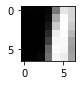

normalized region:


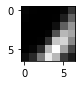

mean regions of 100 regions more=True or worst=False active for filter number: 18 :


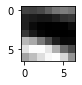

normalized region:


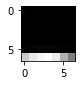

mean regions of 100 regions more=True or worst=False active for filter number: 19 :


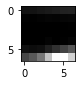

normalized region:


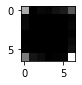

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


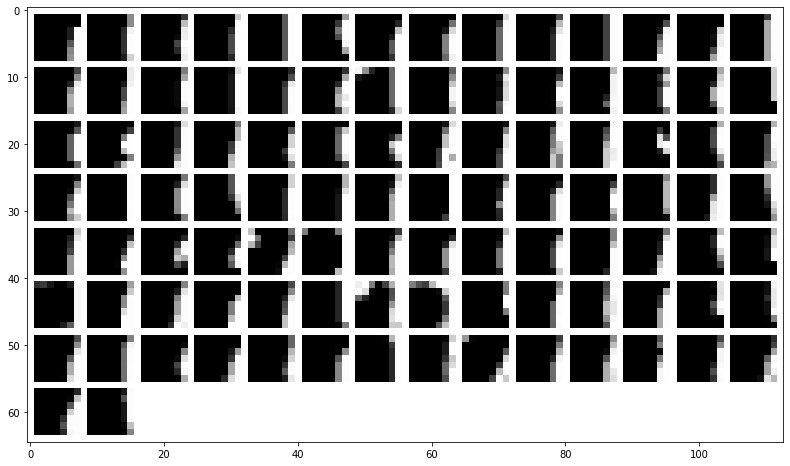

normalized regions:


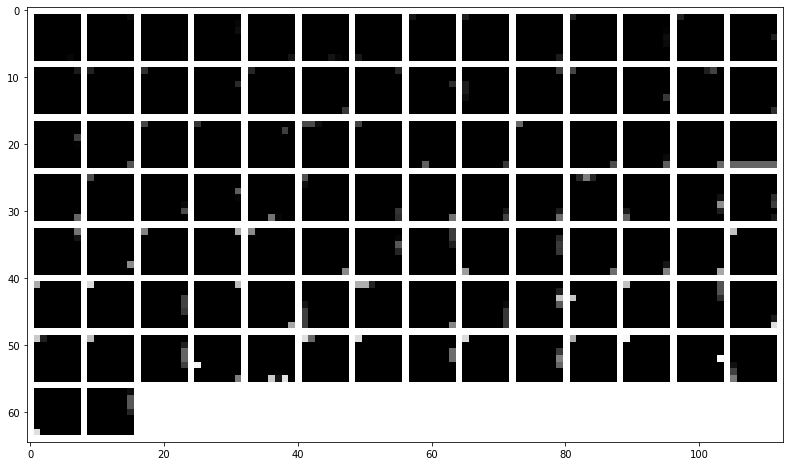

grid regions of 100 regions more=True or worst=False active for filter number: 1 :


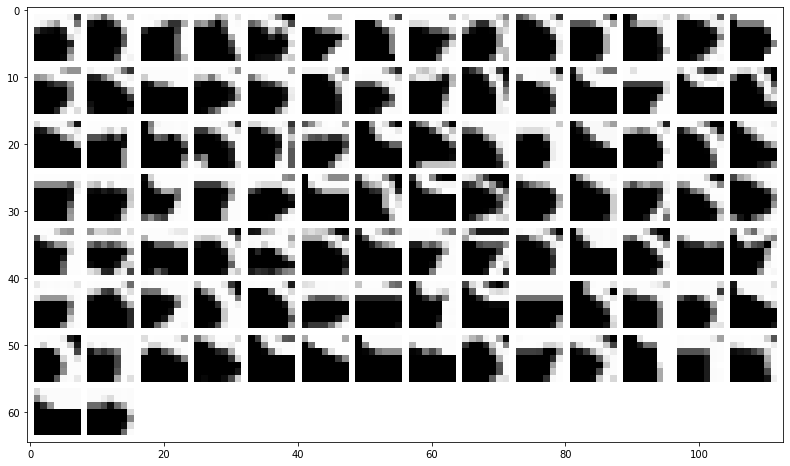

normalized regions:


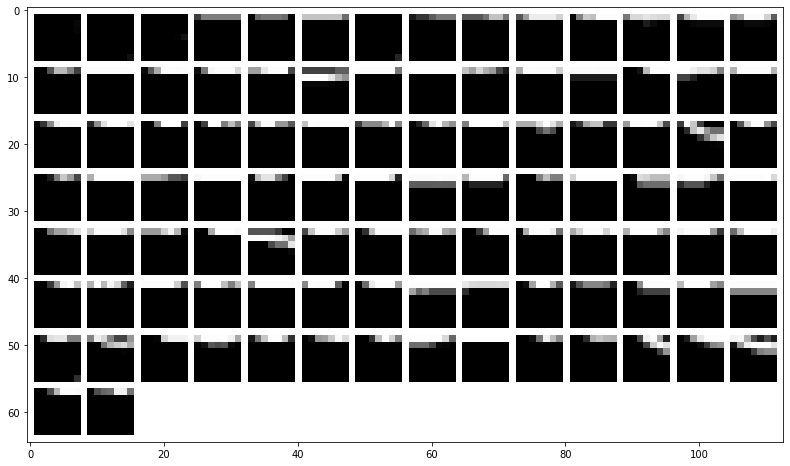

grid regions of 100 regions more=True or worst=False active for filter number: 2 :


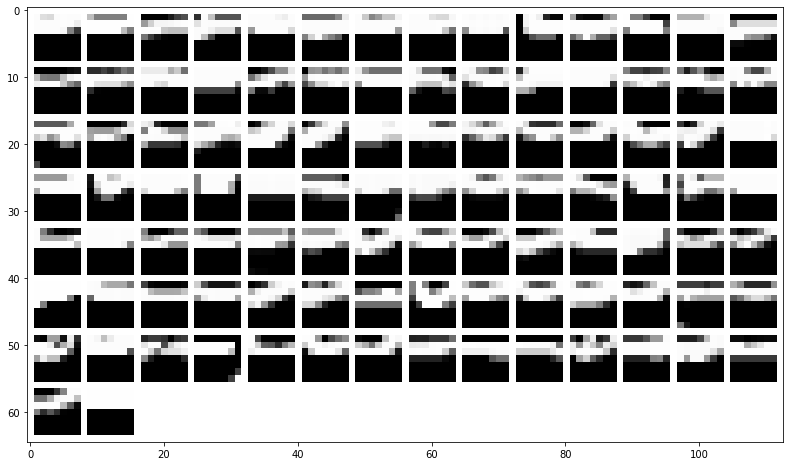

normalized regions:


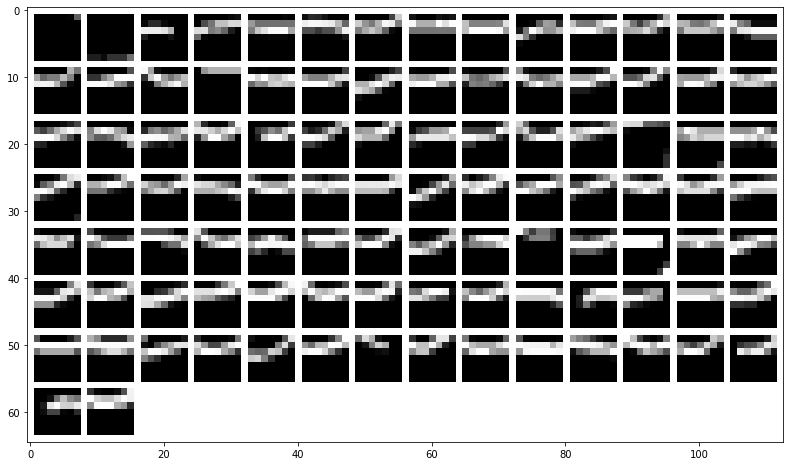

grid regions of 100 regions more=True or worst=False active for filter number: 3 :


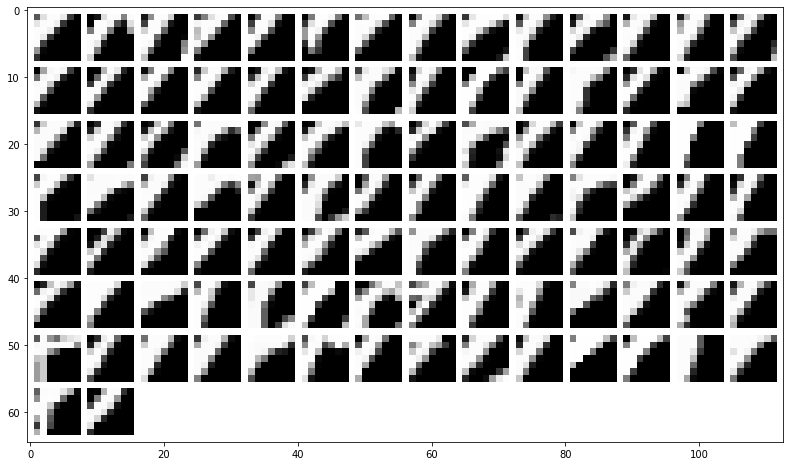

normalized regions:


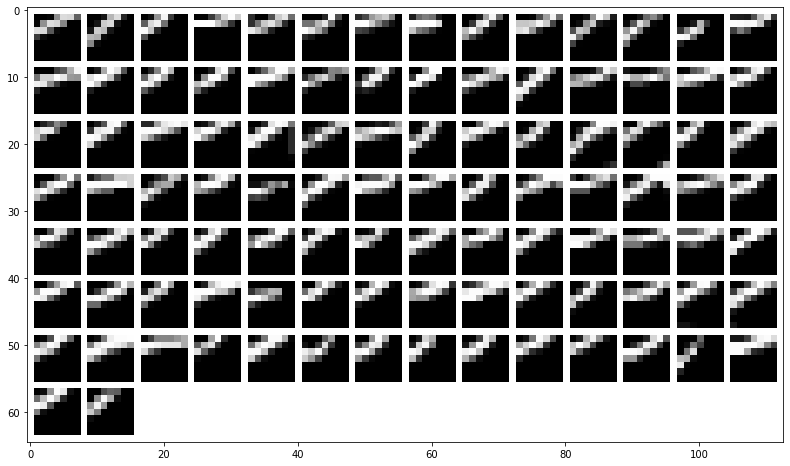

grid regions of 100 regions more=True or worst=False active for filter number: 4 :


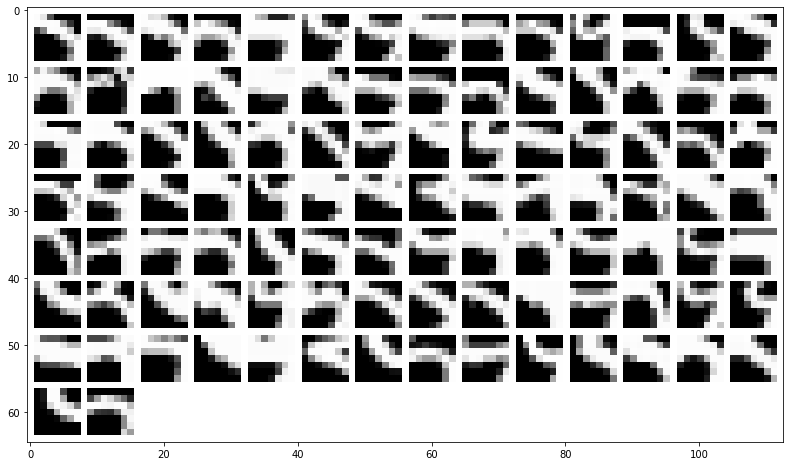

normalized regions:


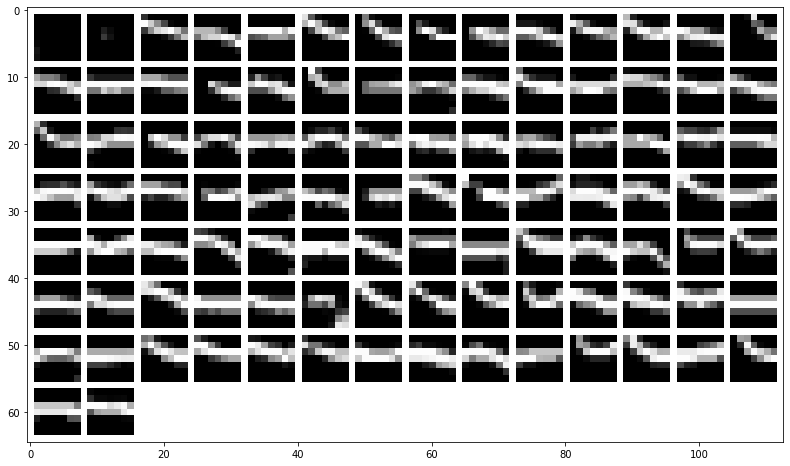

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


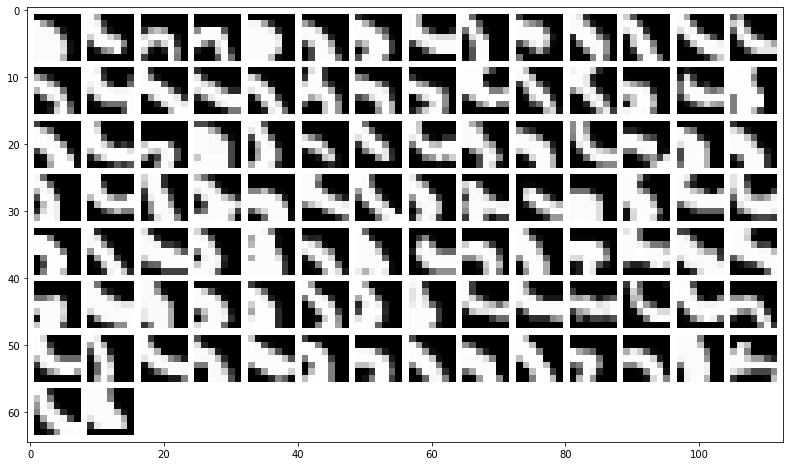

normalized regions:


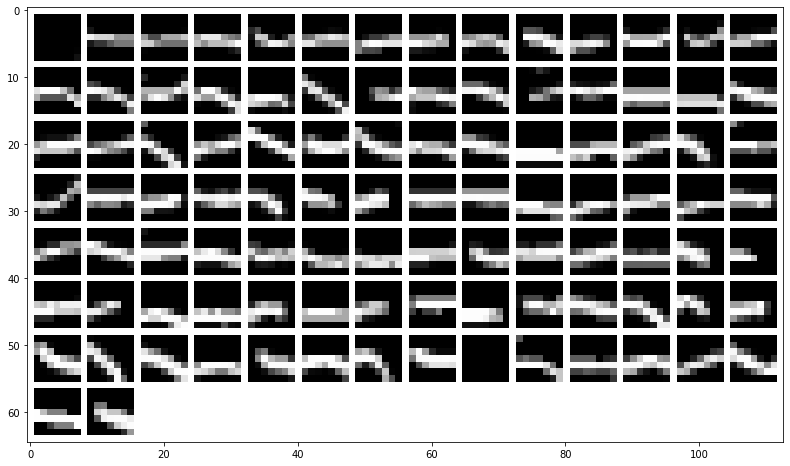

grid regions of 100 regions more=True or worst=False active for filter number: 6 :


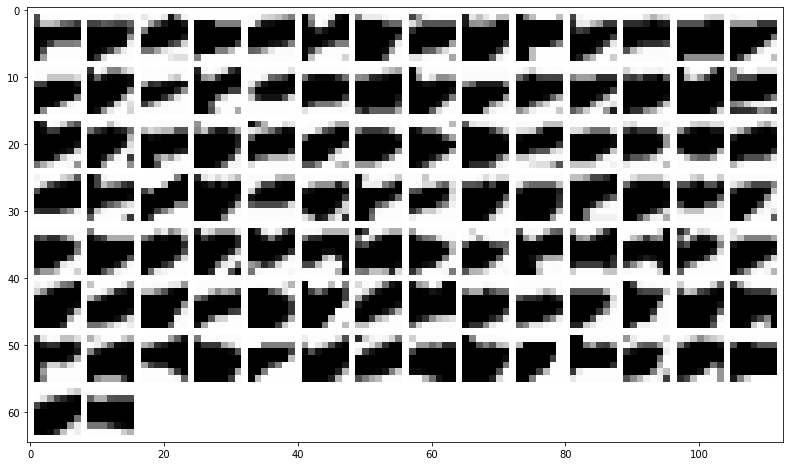

normalized regions:


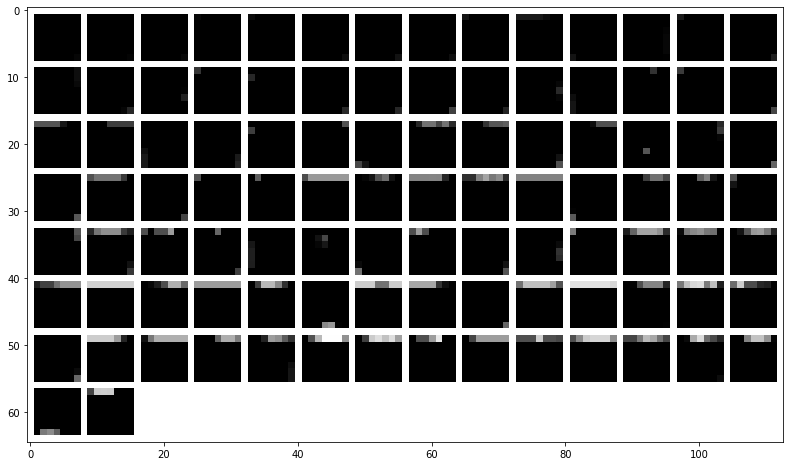

grid regions of 100 regions more=True or worst=False active for filter number: 7 :


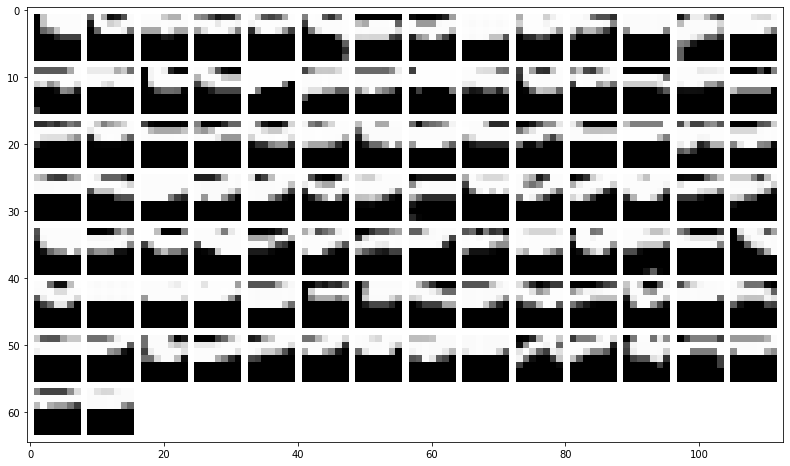

normalized regions:


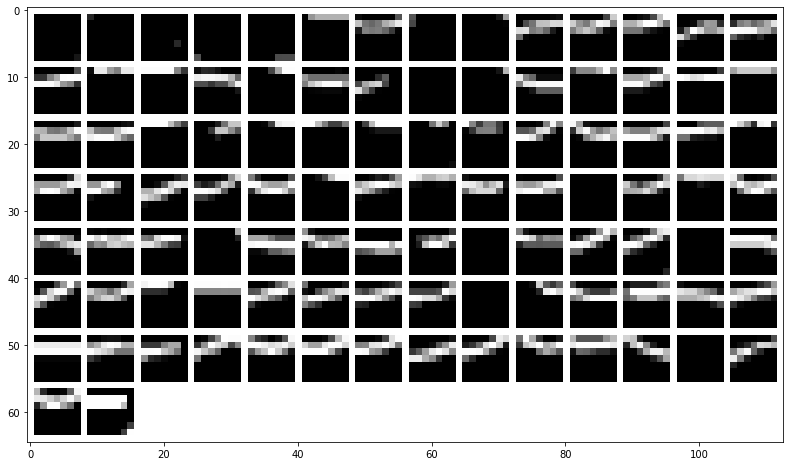

grid regions of 100 regions more=True or worst=False active for filter number: 8 :


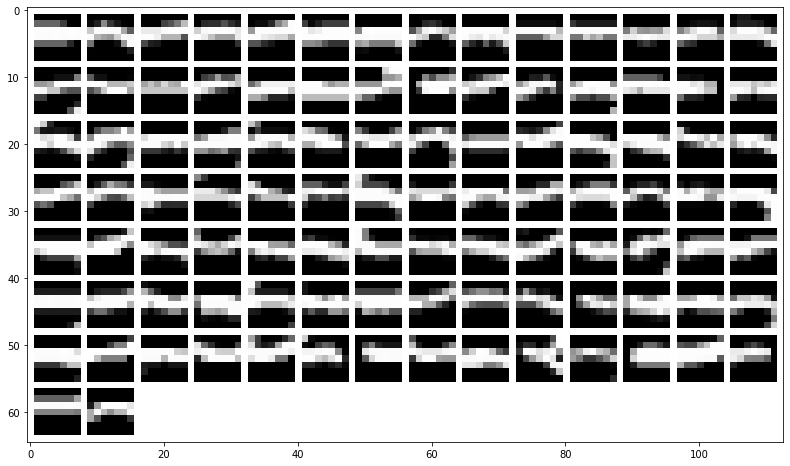

normalized regions:


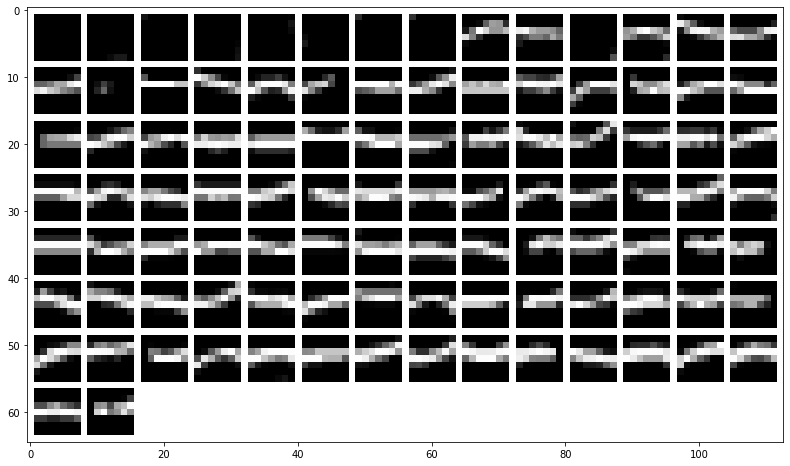

grid regions of 100 regions more=True or worst=False active for filter number: 9 :


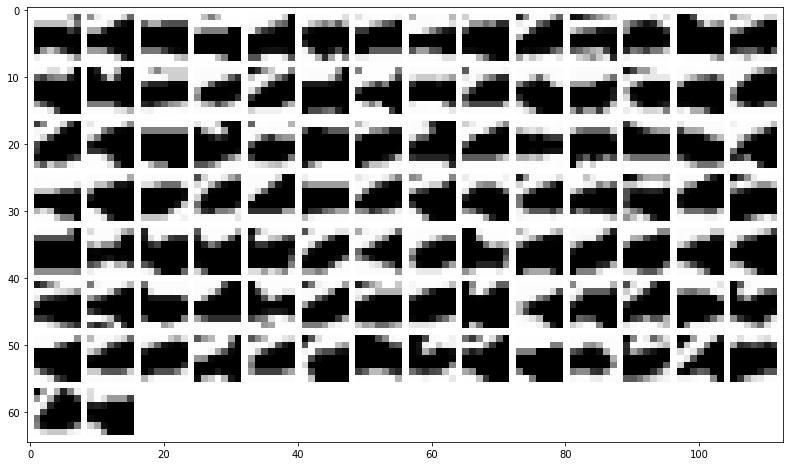

normalized regions:


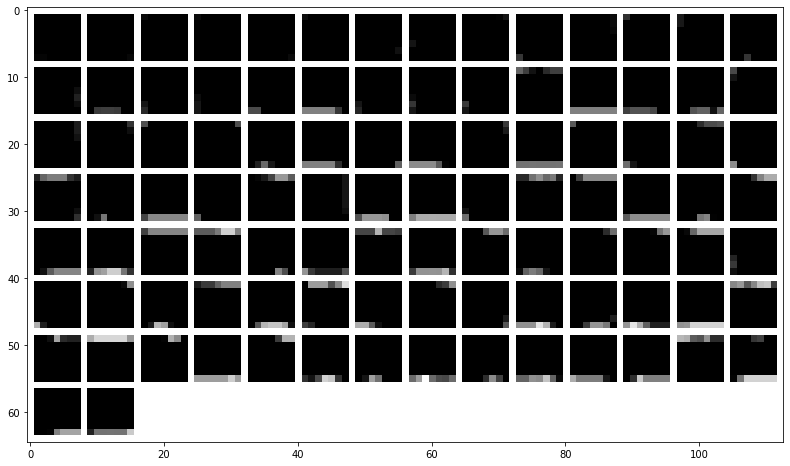

grid regions of 100 regions more=True or worst=False active for filter number: 10 :


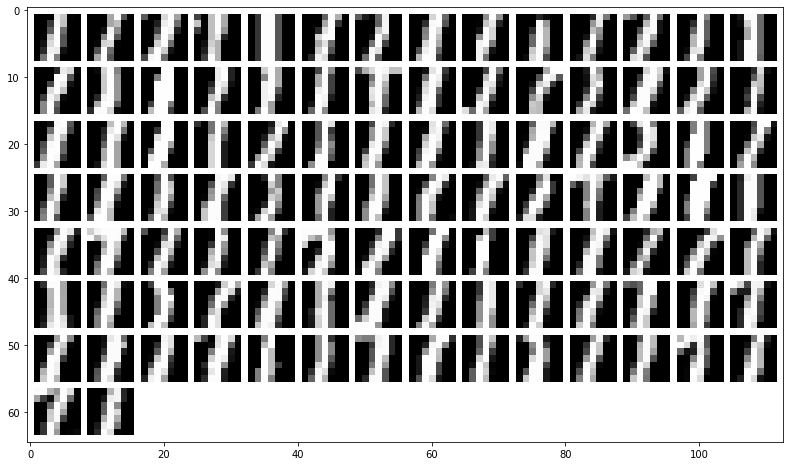

normalized regions:


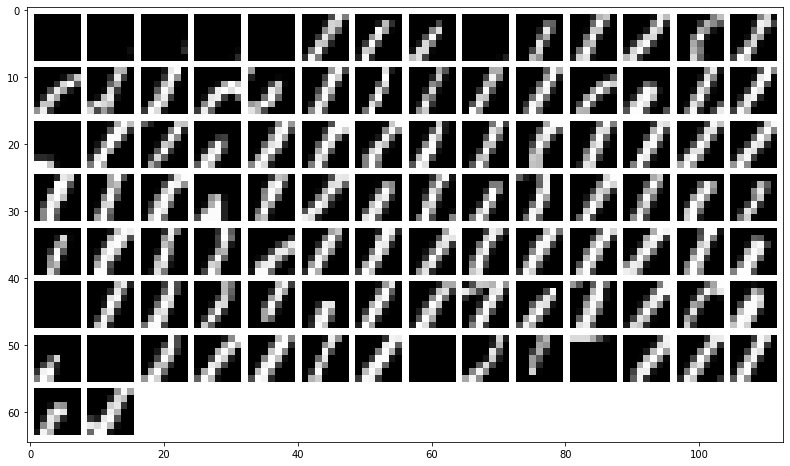

grid regions of 100 regions more=True or worst=False active for filter number: 11 :


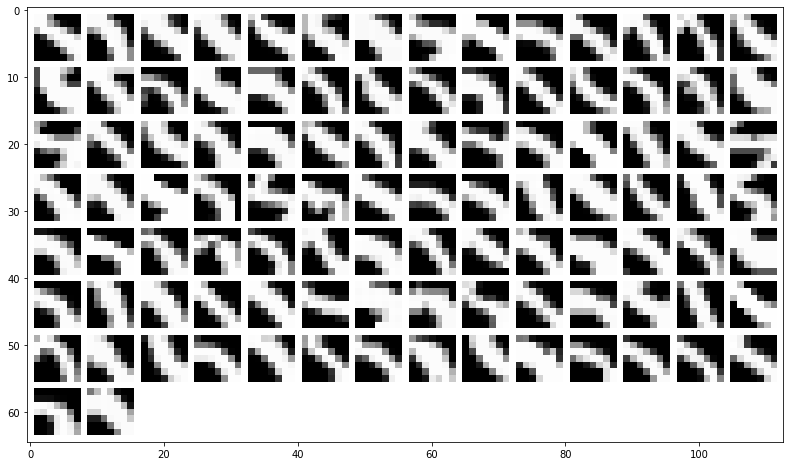

normalized regions:


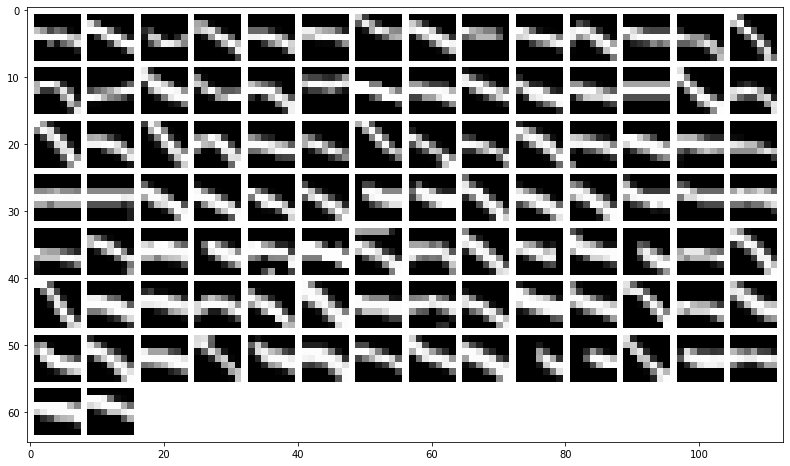

grid regions of 100 regions more=True or worst=False active for filter number: 12 :


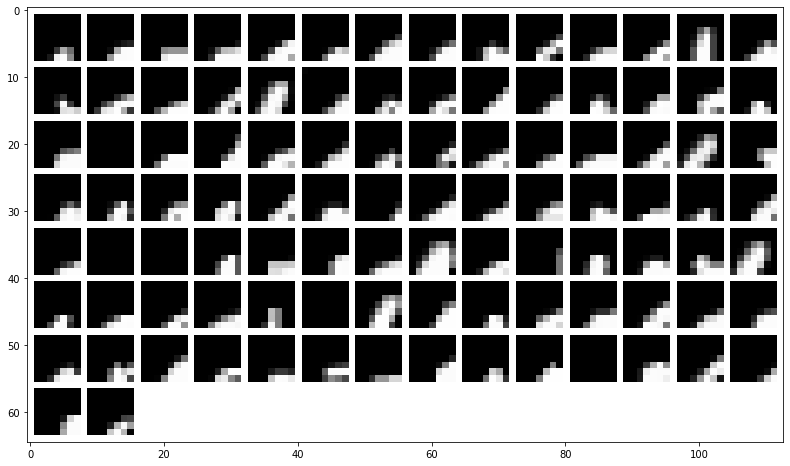

normalized regions:


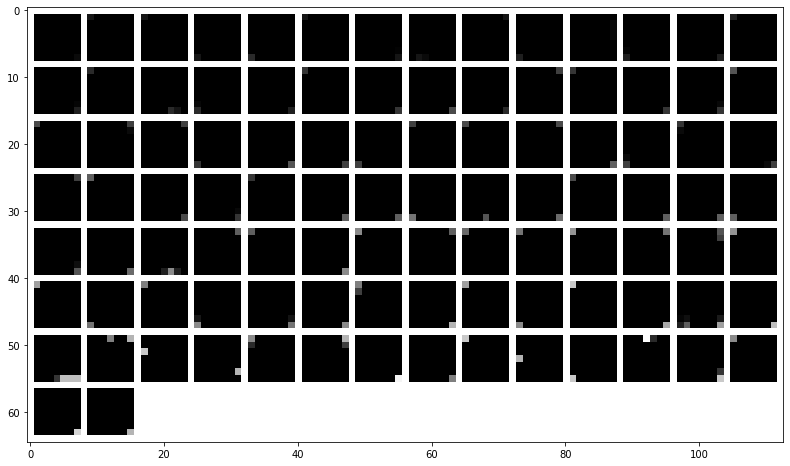

grid regions of 100 regions more=True or worst=False active for filter number: 13 :


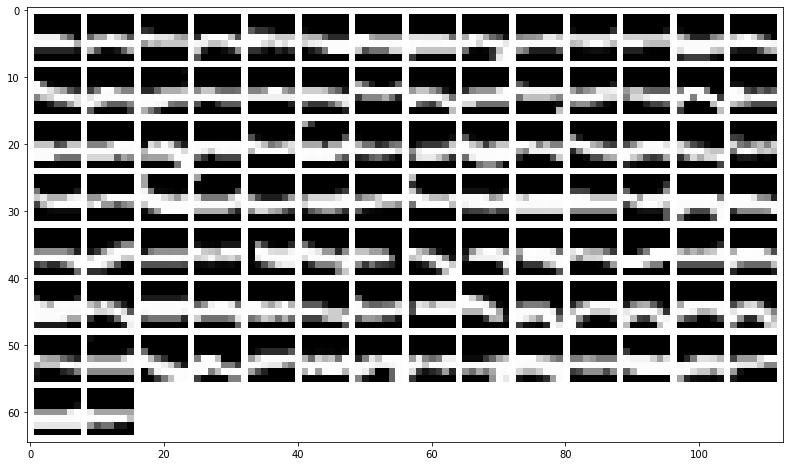

normalized regions:


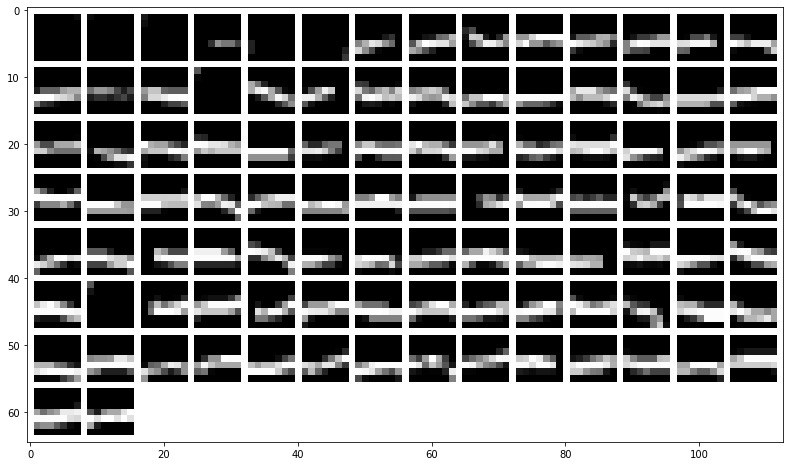

grid regions of 100 regions more=True or worst=False active for filter number: 14 :


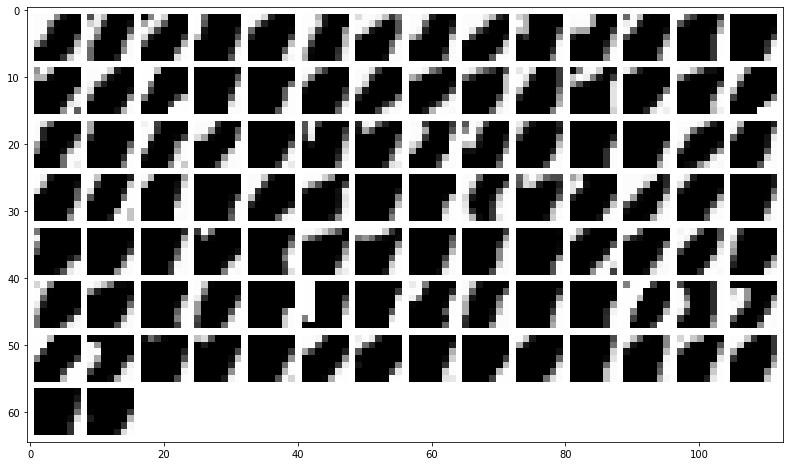

normalized regions:


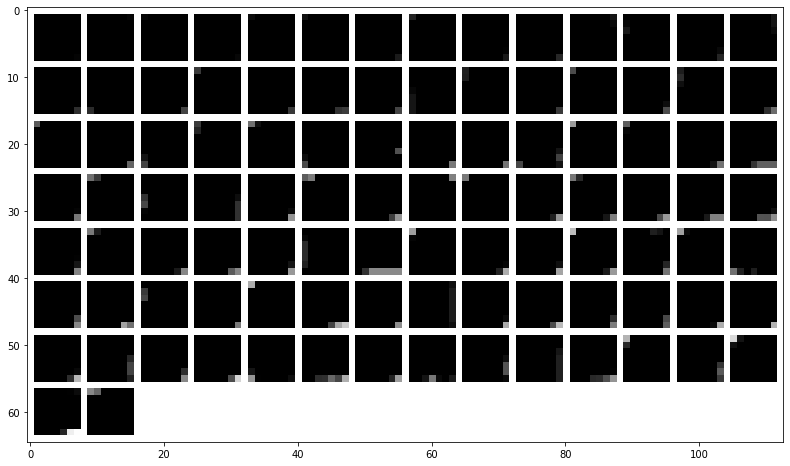

grid regions of 100 regions more=True or worst=False active for filter number: 15 :


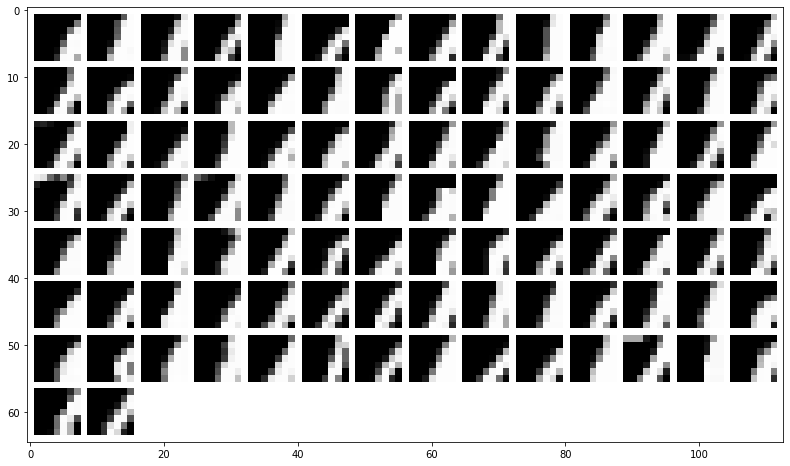

normalized regions:


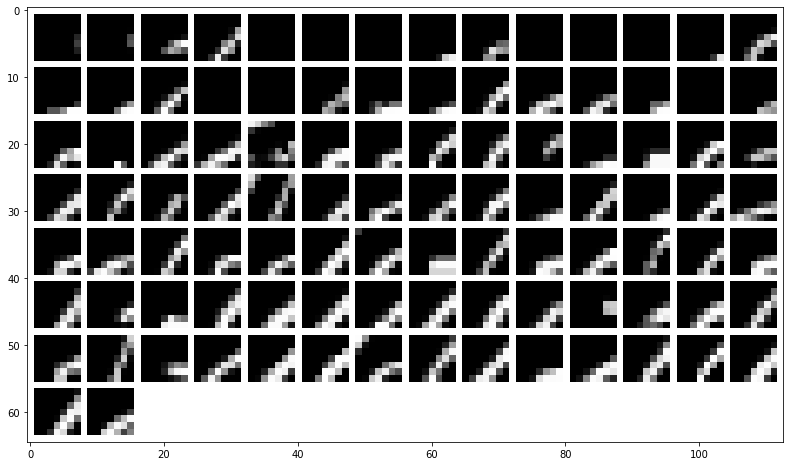

grid regions of 100 regions more=True or worst=False active for filter number: 16 :


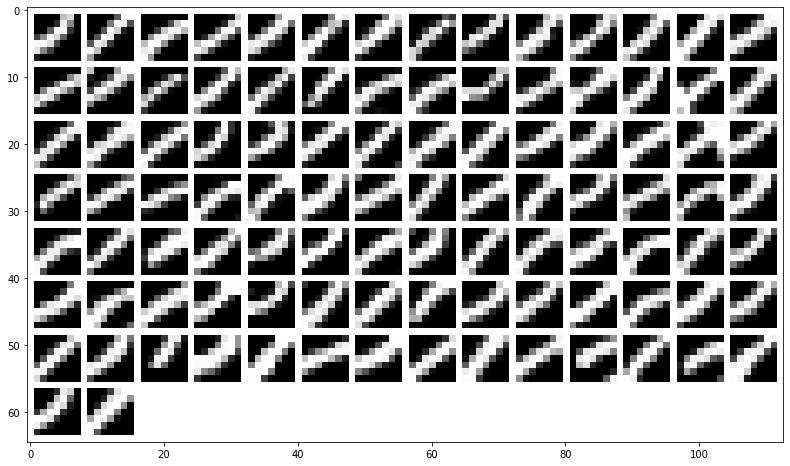

normalized regions:


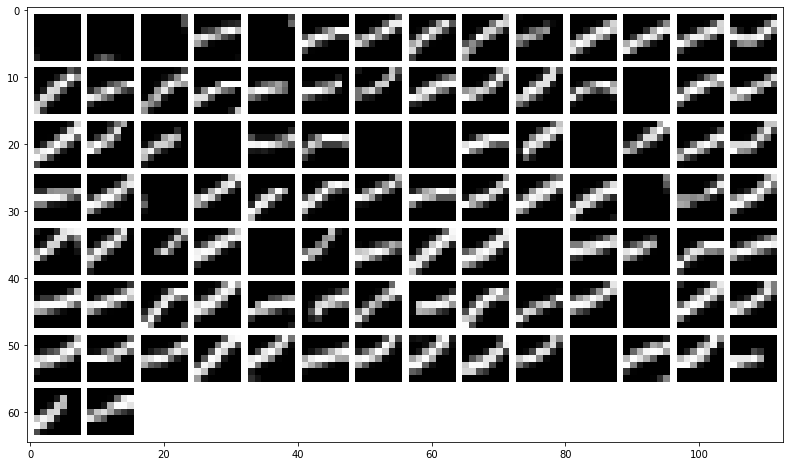

grid regions of 100 regions more=True or worst=False active for filter number: 17 :


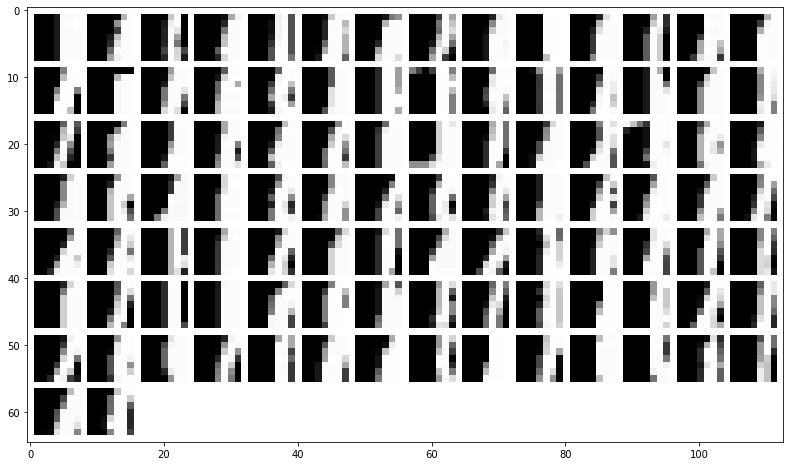

normalized regions:


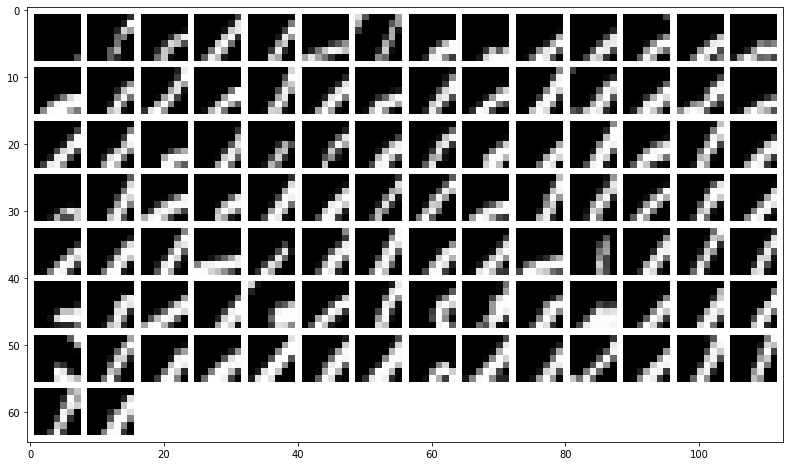

grid regions of 100 regions more=True or worst=False active for filter number: 18 :


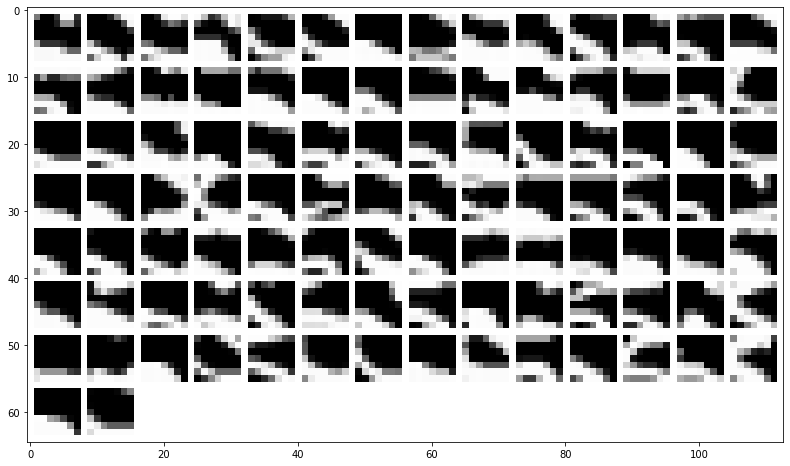

normalized regions:


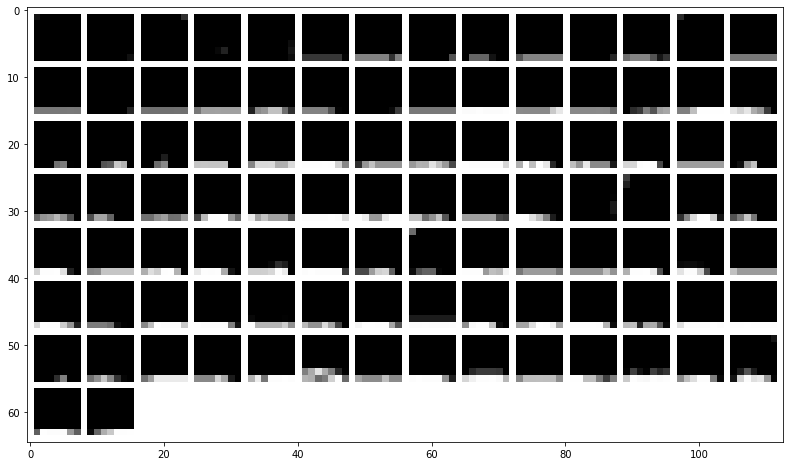

grid regions of 100 regions more=True or worst=False active for filter number: 19 :


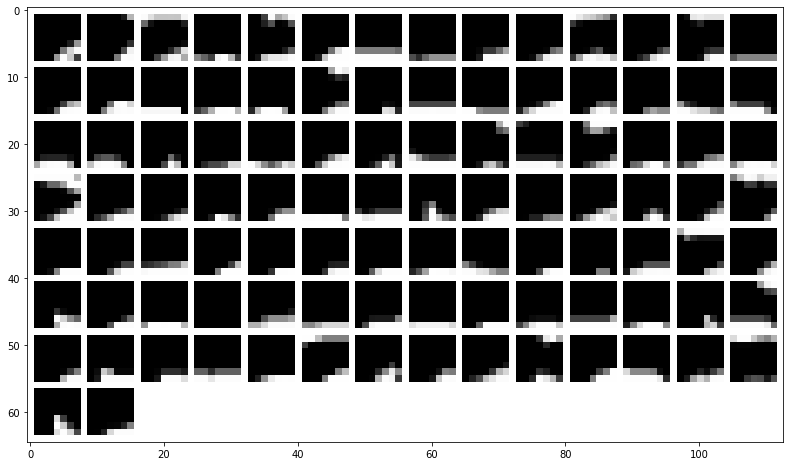

normalized regions:


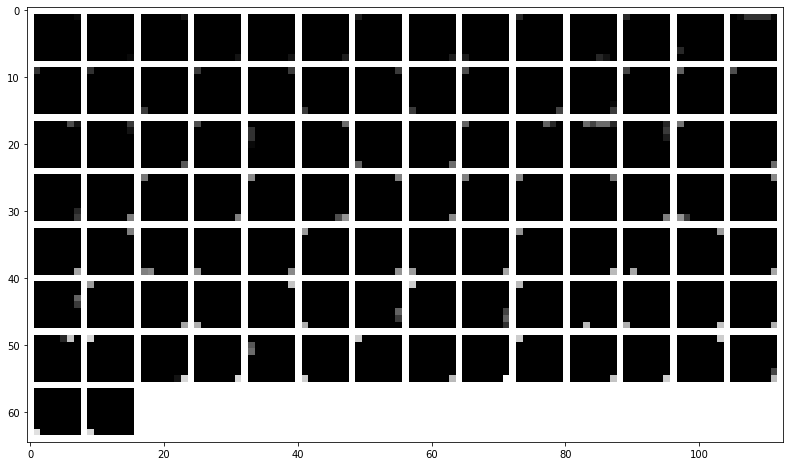

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 1
nrow=14

# regions and activation of interest
regions = region_layer2_binary_without_bias
activations = activation_layer2_binary_without_bias
activations_normalized = activation_layer2_binary_normalized_without_bias

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2, nrow=nrow)

# Draft

## Test region's score:

In [0]:
from numpy import linalg as LA

In [0]:
def get_activation(name, activation):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

def test_score_region(model, filter_choice, index=None):

  if index is None:
    # dataiter = iter(train_loader)
    # images, _ = dataiter.next()
    index = np.random.randint(0,1000)
    image = images[index]
  else:
    image = images[index]

  print('image test number: {} with shape: {}'.format(index, image.shape))
  plt.imshow(image[0], cmap='gray')
  plt.show()

  activation = {}

  for name, m in model.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation))

  out = model(image.unsqueeze(0)) 

  activation_layer1 = activation['layer1'][0]
  activation_layer2 = activation['layer2'][0]

  print('prediction:{}'.format(out.data.numpy().argmax()))       

  filter = filter_choice
  act_max_layer1 = activation_layer1[filter].max()
  print('value activation max for filte {} :{}'.format(filter, act_max_layer1))

  ind_x = int((np.where(activation_layer1[filter] == act_max_layer1)[0])[0]) 
  ind_y = int((np.where(activation_layer1[filter] == act_max_layer1)[1])[0])

  print('index of max value: x: {}, y: {}'.format(ind_x, ind_y))

  name = 'layer1'
  stride = 2
  padding=1
  filter_size=3
  len_img_h=28
  len_img_w=28
  im = image[0]

  region, begin_col, end_col, begin_raw, end_raw = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  print('region extracted: {}'.format(region))
  plt.imshow(region, cmap='gray')
  plt.show()

  random_im = np.uint8(np.random.uniform(0, 255, (28, 28)))/255
  print('random image generated:')
  plt.imshow(random_im, cmap='gray')
  plt.show()

  random_im[begin_col:end_col, begin_raw:end_raw] = region
  plt.imshow(random_im, cmap='gray')
  print('random image generated with region that maximize filter activation:')
  plt.show()

  activation_random_im = {}

  for name, m in model_no_binary.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation_random_im))

  random_image = (torch.tensor(random_im.reshape((1,1,28,28))))
  out = model_no_binary(random_image.float())
  activation_layer1_random = activation_random_im['layer1'][0]

  act_max_random = activation_layer1_random[filter].max()

  ind_x_random = int((np.where(activation_layer1_random[filter] == act_max_random)[0])[0]) 
  ind_y_random = int((np.where(activation_layer1_random[filter] == act_max_random)[1])[0])

  activation_value_index_random = activation_layer1_random[filter][ind_x][ind_y]
  activation_value_index = activation_layer1[filter][ind_x][ind_y]

  print('activation max for image: {} with index: x:{}, y:{}'.format(act_max_layer1, ind_x, ind_y))
  print('activation max for random image with region: {} with index: x:{}, y:{}'.format(act_max_random, ind_x_random, ind_y_random))  

  print('activation value for ind_x: {} and ind_y: {} = {}'.format(ind_x, ind_y, activation_value_index))
  print('random activation value for ind_x: {} and ind_y: {} = {}'.format(ind_x_random, ind_y_random, activation_value_index_random))
  
  region_new_random, begin_col, end_col, begin_raw, end_raw = get_region_layer1(random_im, ind_x_random, ind_y_random, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  plt.imshow(region_new_random, cmap='gray')
  print('region_new_random')
  plt.show()

  return region

In [0]:
model = model_no_binary
filter_choice = 9
index=1


region = test_score_region(model, filter_choice, index=image)

## Test: same results with both function:

In [0]:
# load model pre trained no binary
binary = False
model, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/with_bias'
if torch.cuda.is_available():
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [0]:
def test_truc(filter_choice, model, images):
  # index = np.random.randint(0,1000)
  index=1140
  image = images[index][0]
  # image[:][:] = 0
  # x=5
  # y=10
  # image[x,y] = 1

  plt.imshow(image, cmap='gray')
  plt.show()
  print('new image shape: {}'.format(image.shape))


  activation = {}

  for name, m in model.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation))

  out = model(image.unsqueeze(0).unsqueeze(0)) 

  activation_layer1 = activation['layer1'][0]
  activation_layer2 = activation['layer2'][0]

  print('prediction:{}'.format(out.data.numpy().argmax()))       

  filter = filter_choice
  act_max_layer1 = activation_layer1[filter].max()
  print('value activation max for filte {} :{}'.format(filter, act_max_layer1))

  ind_x = int((np.where(activation_layer1[filter] == act_max_layer1)[0])[0]) 
  ind_y = int((np.where(activation_layer1[filter] == act_max_layer1)[1])[0])

  print('index of max value: x: {}, y: {}'.format(ind_x, ind_y))

  name = 'layer1'
  stride = 2
  padding=1
  filter_size=3
  len_img_h=28
  len_img_w=28
  im = image

  region, begin_col, end_col, begin_raw, end_raw = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  print('region extracted: {}'.format(region))
  plt.imshow(region, cmap='gray')
  plt.show()


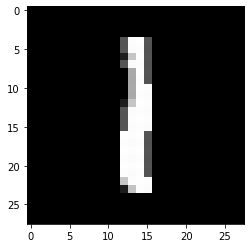

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 0 :0.6358199119567871
index of max value: x: 11, y: 6
region extracted: tensor([[0.0000, 0.9922, 0.9843],
        [0.0000, 0.7765, 0.9922],
        [0.0000, 0.1098, 0.7686]])


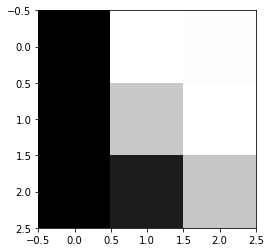

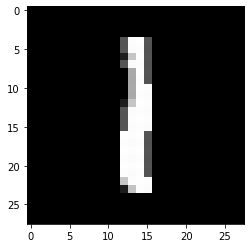

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 1 :0.8330056667327881
index of max value: x: 2, y: 7
region extracted: tensor([[0.0000, 0.0000, 0.0000],
        [0.9922, 1.0000, 0.3294],
        [0.9843, 0.9922, 0.3255]])


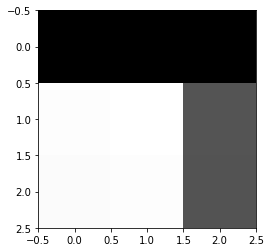

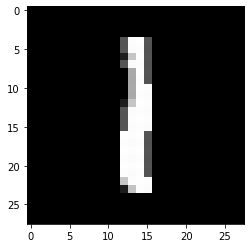

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 2 :0.480362206697464
index of max value: x: 2, y: 6
region extracted: tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.3333, 0.9922],
        [0.0000, 0.3333, 0.9843]])


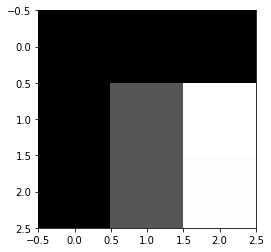

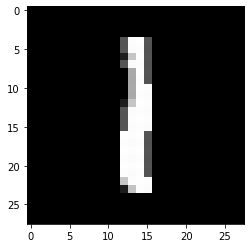

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 3 :-0.13423755764961243
index of max value: x: 12, y: 7
region extracted: tensor([[0.7686, 0.9922, 0.9843],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


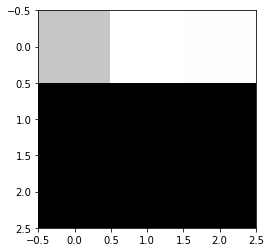

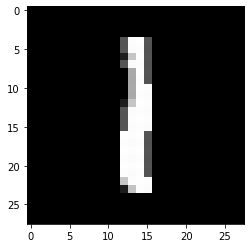

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 4 :0.20620320737361908
index of max value: x: 12, y: 8
region extracted: tensor([[0.9843, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


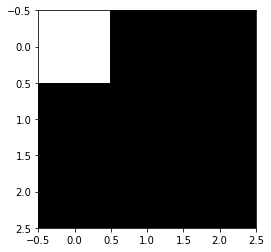

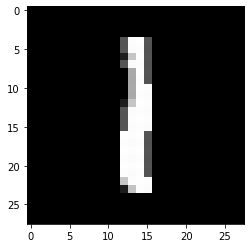

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 5 :1.0953599214553833
index of max value: x: 9, y: 7
region extracted: tensor([[0.9843, 0.9922, 0.3255],
        [0.9922, 0.9961, 0.3294],
        [0.9843, 0.9922, 0.3255]])


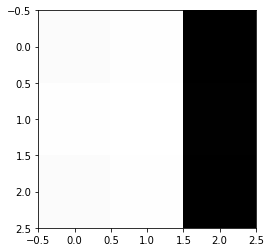

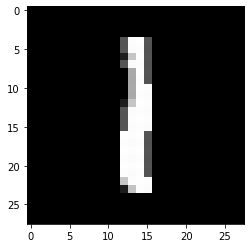

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 6 :0.5047484040260315
index of max value: x: 6, y: 8
region extracted: tensor([[0.9843, 0.0000, 0.0000],
        [0.9922, 0.0000, 0.0000],
        [0.9843, 0.0000, 0.0000]])


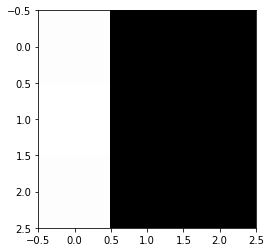

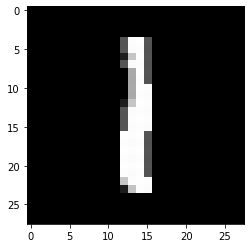

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 7 :0.1401311159133911
index of max value: x: 0, y: 0
<class 'torch.Tensor'>
region extracted: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


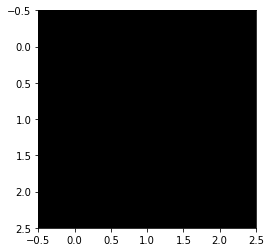

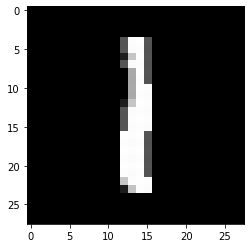

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 8 :0.829675018787384
index of max value: x: 6, y: 7
region extracted: tensor([[0.6588, 0.9922, 0.9843],
        [0.7725, 0.9961, 0.9922],
        [0.9843, 0.9922, 0.9843]])


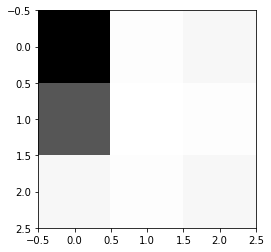

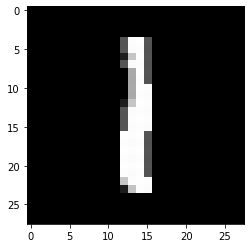

new image shape: torch.Size([28, 28])
prediction:1
value activation max for filte 9 :0.16563361883163452
index of max value: x: 8, y: 6
region extracted: tensor([[0.0000, 0.3333, 0.9843],
        [0.0000, 0.9961, 0.9922],
        [0.0000, 0.9922, 0.9843]])


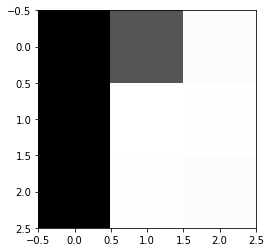

In [0]:
for i in range(10):
  test_truc(i, model, images)

In [0]:
activation_layer1_no_binary[1]

array([ 0.65015453,  0.866575  ,  0.49040592, -0.13324693,  0.26634267,
        1.00861907,  0.57153356,  0.24836133,  0.85304779,  0.14399643])

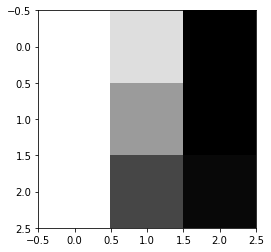

In [0]:
reg = region_layer1_no_binary[1][5]
plt.imshow(reg, cmap='gray')
plt.show()

In [0]:
region_layer1_no_binary[1][5].shape

(3, 3)

## filter value:

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m) == nn.Conv2d:
        filters = m.weight.data.clone()
        break

In [0]:
filters.shape

In [0]:
model_no_binary.layer1.bias

In [0]:
filter_0 = filters[0][0]

In [0]:
print(filter_0)

In [0]:
plt.imshow(filter_0, cmap='gray')

In [0]:
viz_filters(model_no_binary)